In [1]:
%matplotlib inline

import numpy as np
import skimage.io as io

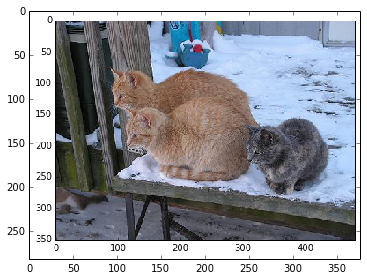

In [3]:
cat_img = io.imread('cat.jpg')
io.imshow(cat_img)

In [4]:
cat_string = cat_img.tostring()

In [5]:
reconstructed_cat_1d = np.fromstring(cat_string, dtype=np.uint8)

In [6]:
reconstructed_cat_img = reconstructed_cat_1d.reshape(cat_img.shape)

In [7]:
np.allclose(cat_img, reconstructed_cat_img)

True

In [9]:
import tensorflow as tf
w = tf.Variable('w1', [28*28, 10])
def weight_variable(shape):
  """weight_variable generates a weight variable of a given shape."""
  initial = tf.truncated_normal(shape, stddev=0.1)
  # initial = tf.ones(shape, dtype = tf.float32)
  return tf.Variable(initial)

In [12]:
import tensorflow as tf

images_batch = tf.placeholder(dtype=tf.float32, shape=[None, 28*28,])
labels_batch = tf.placeholder(dtype=tf.int32, shape=[None, ])

# simple model
w = weight_variable([28*28, 10])
y_pred = tf.matmul(images_batch, w)
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = y_pred, labels = labels_batch)
loss_mean = tf.reduce_mean(loss)
train_op = tf.train.AdamOptimizer().minimize(loss)

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

# from skdata.mnist.view import OfficialVectorClassification
from skdata.mnist.views import OfficialVectorClassification
import numpy as np

In [13]:
# load data entirely into memory
data = OfficialVectorClassification()
trIdx = data.sel_idxs[:]
features = data.all_vectors[trIdx]
labels = data.all_labels[trIdx]

No handlers could be found for logger "skdata.mnist.dataset"


In [14]:
def data_iterator():
    """ A simple data iterator """
    batch_idx = 0
    while True:
        # shuffle labels and features
        idxs = np.arange(0, len(features))
        np.random.shuffle(idxs)
        shuf_features = features[idxs]
        shuf_labels = labels[idxs]
        batch_size = 128
        for batch_idx in range(0, len(features), batch_size):
            images_batch = shuf_features[batch_idx:batch_idx+batch_size] / 255.
            images_batch = images_batch.astype("float32")
            labels_batch = shuf_labels[batch_idx:batch_idx+batch_size]
            yield images_batch, labels_batch


iter_ = data_iterator()
while True:
    # get a batch of data
    images_batch_val, labels_batch_val = iter_.next()

    _, loss_val = sess.run([train_op, loss_mean], feed_dict={
                    images_batch:images_batch_val,
                    labels_batch:labels_batch_val
                    })
    print loss_val

2.48239
2.29599
2.38222
2.28889
2.26545
2.15605
2.17432
2.11491
2.228
2.10642
1.91345
2.09083
2.01801
2.05695
1.98052
1.83558
1.81666
1.90469
1.8528
1.79274
1.8341
1.66591
1.69471
1.69312
1.62349
1.59373
1.60839
1.509
1.47754
1.5182
1.66002
1.56738
1.62283
1.46883
1.50831
1.43415
1.42723
1.31308
1.3073
1.43467
1.35946
1.27901
1.21981
1.24688
1.32537
1.31124
1.21841
1.22895
1.15217
1.13439
1.24626
1.15581
1.23207
1.06128
1.05122
1.07072
1.15225
0.964069
1.16801
1.10641
1.16495
0.950383
1.03668
0.993013
1.06563
1.0212
1.07425
1.09861
1.04666
0.86094
0.957003
0.880354
0.99052
0.964935
0.917575
0.983916
0.927037
0.962519
0.922617
0.97887
0.962306
0.820589
1.02353
0.888648
1.02134
0.901107
1.05262
0.901146
0.964326
0.904235
0.953743
0.894538
0.827422
0.760315
0.939354
0.827926
0.842896
0.785451
0.818045
0.76376
0.864584
0.790382
0.810124
0.881078
0.775383
0.773523
0.760098
0.693763
0.774519
0.692474
0.819578
0.869447
0.743157
0.736001
0.710431
0.789726
0.898347
0.716385
0.780791
0.829595
0.

0.35782
0.408156
0.354919
0.205192
0.357078
0.465125
0.263463
0.310665
0.306856
0.415187
0.418684
0.294211
0.309936
0.358444
0.265209
0.374019
0.219907
0.322291
0.293779
0.259404
0.520163
0.331974
0.315935
0.319338
0.366861
0.330051
0.332862
0.400859
0.30712
0.416677
0.303558
0.296378
0.298139
0.434734
0.379414
0.306833
0.310191
0.281628
0.332897
0.362843
0.282333
0.354978
0.189703
0.433655
0.290638
0.322069
0.248415
0.458806
0.321905
0.284051
0.32416
0.329235
0.311881
0.327167
0.27431
0.25125
0.309948
0.38022
0.369057
0.213333
0.291223
0.222489
0.331096
0.320461
0.429944
0.318117
0.369301
0.395099
0.353022
0.305277
0.272224
0.348414
0.320846
0.262385
0.328942
0.422845
0.236335
0.415895
0.394571
0.425646
0.369886
0.329971
0.394263
0.362579
0.28452
0.269865
0.252294
0.276822
0.318292
0.289256
0.368537
0.193431
0.270182
0.335554
0.382771
0.42202
0.319189
0.28412
0.443828
0.365186
0.394071
0.385761
0.468426
0.351343
0.38677
0.275327
0.30199
0.333699
0.343646
0.425463
0.264897
0.306494
0.2

0.402755
0.343599
0.211144
0.155848
0.185748
0.238775
0.249616
0.245393
0.44404
0.346991
0.26841
0.247516
0.295719
0.247541
0.280639
0.415677
0.26426
0.326107
0.244906
0.340984
0.267166
0.286232
0.341277
0.335686
0.275928
0.191105
0.382085
0.362903
0.286188
0.197498
0.299236
0.412291
0.224372
0.277116
0.251015
0.344136
0.346107
0.350962
0.211259
0.454804
0.319151
0.216785
0.355566
0.300841
0.221468
0.371473
0.215799
0.294564
0.390371
0.297378
0.27107
0.2019
0.219052
0.453489
0.292556
0.242927
0.339334
0.222379
0.184919
0.377196
0.322231
0.191771
0.188908
0.253596
0.182301
0.228064
0.211067
0.289023
0.443186
0.408766
0.344927
0.296169
0.23368
0.212729
0.339404
0.304859
0.243143
0.514533
0.267653
0.261726
0.216629
0.288572
0.344132
0.246348
0.170188
0.270053
0.224218
0.362046
0.228261
0.387716
0.287951
0.202563
0.287487
0.19567
0.19389
0.408678
0.275578
0.226253
0.417281
0.228298
0.273369
0.214617
0.242662
0.389796
0.395187
0.285378
0.287725
0.390278
0.274525
0.214762
0.290033
0.228523
0

0.25853
0.200479
0.182963
0.26591
0.335731
0.335985
0.305969
0.166737
0.24467
0.30466
0.505291
0.19788
0.380482
0.174565
0.250869
0.210764
0.271838
0.323809
0.27883
0.349099
0.226249
0.281421
0.402036
0.339602
0.156098
0.325621
0.259716
0.311604
0.339301
0.17612
0.300841
0.245562
0.19021
0.219335
0.250903
0.289423
0.358096
0.260854
0.327604
0.183499
0.275445
0.220683
0.365737
0.137861
0.266926
0.385035
0.197919
0.258371
0.206532
0.194359
0.327972
0.19646
0.215367
0.248293
0.359782
0.247562
0.275474
0.28731
0.192664
0.265683
0.237055
0.355195
0.321814
0.224393
0.240801
0.261523
0.440054
0.26811
0.30504
0.205027
0.237978
0.341712
0.542572
0.302086
0.227318
0.348615
0.312206
0.349673
0.161702
0.270622
0.39634
0.199935
0.217104
0.225621
0.164209
0.316946
0.283515
0.297544
0.243203
0.261053
0.135479
0.202312
0.28792
0.329997
0.281794
0.288337
0.293276
0.47072
0.307566
0.380897
0.191273
0.243759
0.322735
0.17131
0.230208
0.185707
0.331515
0.265202
0.298186
0.226564
0.413295
0.166059
0.454065

0.206816
0.320112
0.338438
0.184004
0.244069
0.230456
0.272167
0.188707
0.308703
0.491375
0.184943
0.234984
0.252158
0.256893
0.181937
0.201674
0.246214
0.203516
0.253603
0.278977
0.202927
0.205603
0.270048
0.429757
0.283169
0.279562
0.154774
0.202535
0.277688
0.177634
0.342102
0.253003
0.221281
0.315767
0.373278
0.30234
0.153186
0.246955
0.228942
0.267092
0.189695
0.404017
0.401449
0.593755
0.267249
0.342281
0.239165
0.257606
0.189452
0.2769
0.231765
0.243252
0.355179
0.204709
0.231727
0.229228
0.194948
0.348049
0.332987
0.30472
0.263435
0.278637
0.211697
0.362162
0.344057
0.325421
0.296459
0.27586
0.285373
0.438684
0.224684
0.345087
0.202316
0.342588
0.305029
0.259773
0.186184
0.303354
0.251971
0.251509
0.393024
0.319948
0.255532
0.342778
0.221323
0.211563
0.456073
0.202108
0.316342
0.345056
0.231131
0.329302
0.355973
0.376057
0.226388
0.211456
0.239951
0.19787
0.319484
0.269584
0.350726
0.148598
0.249161
0.292011
0.268221
0.271125
0.237485
0.226496
0.329461
0.256603
0.268985
0.19719

0.292063
0.166932
0.283674
0.194479
0.204333
0.242155
0.234838
0.2881
0.151309
0.336909
0.256612
0.267439
0.351748
0.322604
0.354382
0.235537
0.293115
0.308059
0.368575
0.281674
0.26301
0.16458
0.27855
0.289986
0.21458
0.334812
0.441207
0.230073
0.321803
0.260089
0.269625
0.324436
0.231187
0.256446
0.280074
0.409436
0.155337
0.208189
0.365954
0.225171
0.400656
0.27669
0.314919
0.251614
0.218932
0.290043
0.236042
0.30707
0.323026
0.320204
0.308527
0.224574
0.379804
0.159634
0.331036
0.224754
0.164514
0.122184
0.21031
0.180567
0.278918
0.277922
0.256394
0.201334
0.267349
0.326775
0.224263
0.207765
0.31935
0.245958
0.152363
0.332317
0.335134
0.245399
0.282015
0.194924
0.273111
0.284368
0.201198
0.318954
0.343524
0.159539
0.256112
0.185655
0.315159
0.20796
0.223829
0.13195
0.111285
0.22727
0.270693
0.328673
0.168411
0.270691
0.328223
0.26577
0.328853
0.214349
0.303656
0.300473
0.337803
0.410355
0.253569
0.471951
0.243933
0.204222
0.224162
0.312565
0.152324
0.397698
0.187669
0.253128
0.1247

0.138677
0.258234
0.119609
0.240929
0.270735
0.226444
0.190905
0.208882
0.317809
0.31997
0.312701
0.206115
0.262215
0.296418
0.233195
0.309988
0.332972
0.159106
0.205738
0.202014
0.313536
0.208961
0.256429
0.262926
0.204185
0.226615
0.234641
0.249061
0.325288
0.254833
0.211189
0.186984
0.263894
0.17729
0.19607
0.306953
0.244162
0.230102
0.188368
0.232017
0.199462
0.273724
0.152394
0.344831
0.235006
0.423161
0.207425
0.242459
0.292079
0.271099
0.224597
0.188658
0.0815462
0.173758
0.392929
0.445856
0.177626
0.238163
0.343925
0.254718
0.279007
0.260462
0.324162
0.297111
0.160073
0.286632
0.213985
0.48351
0.411272
0.126028
0.289954
0.249997
0.307114
0.29122
0.36167
0.271626
0.223975
0.278414
0.27027
0.244972
0.168996
0.136902
0.238734
0.397058
0.264171
0.276695
0.224583
0.180191
0.267082
0.311639
0.217618
0.193988
0.166114
0.216201
0.293067
0.200842
0.300184
0.289506
0.385861
0.372822
0.350965
0.257793
0.191166
0.327883
0.165667
0.417807
0.268014
0.244505
0.380058
0.212955
0.287912
0.4608


0.365912
0.328742
0.185485
0.329706
0.265376
0.29981
0.178004
0.264564
0.19142
0.239163
0.325559
0.257002
0.275164
0.339087
0.255542
0.294821
0.310739
0.288676
0.161574
0.546892
0.246662
0.302156
0.268349
0.240339
0.197509
0.254303
0.258091
0.27945
0.286492
0.163176
0.22786
0.223118
0.204795
0.157496
0.179043
0.257953
0.263914
0.284694
0.147308
0.1382
0.182432
0.467065
0.359901
0.225039
0.274386
0.50573
0.237376
0.148785
0.221603
0.280599
0.207462
0.413471
0.323669
0.185197
0.399247
0.39926
0.429077
0.255863
0.248945
0.209733
0.40199
0.399311
0.273348
0.224022
0.214972
0.229253
0.267539
0.267111
0.252272
0.217413
0.296315
0.253904
0.176356
0.250567
0.334959
0.29126
0.161554
0.362779
0.193047
0.415919
0.234542
0.356248
0.392964
0.251927
0.393736
0.348655
0.211214
0.224424
0.250552
0.270796
0.189188
0.352526
0.145426
0.267478
0.137203
0.303823
0.249989
0.184406
0.202043
0.318021
0.136441
0.253782
0.468523
0.251383
0.253381
0.204865
0.279538
0.246158
0.281909
0.413291
0.145234
0.302652
0.

0.520289
0.230422
0.162537
0.411925
0.348653
0.286578
0.273551
0.163914
0.280788
0.219014
0.351268
0.362086
0.314376
0.130073
0.277827
0.289324
0.311649
0.249238
0.344707
0.226216
0.360198
0.353557
0.323577
0.24349
0.275946
0.255938
0.146736
0.148561
0.238816
0.214486
0.35716
0.377395
0.335636
0.321466
0.224909
0.220535
0.343631
0.286763
0.296147
0.217431
0.134623
0.151539
0.127174
0.159729
0.352342
0.169038
0.378041
0.383236
0.231801
0.169976
0.340369
0.37836
0.313872
0.248022
0.19334
0.384957
0.18708
0.202038
0.246263
0.330496
0.203921
0.3795
0.353921
0.250078
0.182817
0.266727
0.239327
0.336006
0.39993
0.244224
0.260713
0.176573
0.210745
0.295594
0.240515
0.324103
0.156819
0.145614
0.406243
0.446127
0.313944
0.300018
0.209034
0.298549
0.235921
0.204498
0.159452
0.163225
0.514465
0.194713
0.190018
0.214509
0.207501
0.414349
0.212793
0.229184
0.206732
0.215568
0.219538
0.193598
0.205888
0.295085
0.206969
0.122801
0.241441
0.229681
0.16253
0.145022
0.436875
0.205852
0.289734
0.177011
0

0.213988
0.202432
0.188783
0.247789
0.276797
0.364057
0.306069
0.155761
0.126612
0.370259
0.166541
0.194536
0.250513
0.334533
0.263752
0.217218
0.266854
0.346217
0.311484
0.395618
0.181071
0.231173
0.38634
0.257004
0.193192
0.200019
0.169824
0.19836
0.246257
0.347428
0.128485
0.215244
0.192917
0.351293
0.176035
0.366985
0.296052
0.268835
0.169464
0.162767
0.395615
0.27843
0.324771
0.191006
0.250248
0.207046
0.3717
0.280161
0.281686
0.1628
0.283677
0.288049
0.257946
0.190796
0.335698
0.2299
0.235419
0.396546
0.194189
0.221181
0.305783
0.225811
0.197593
0.197206
0.227052
0.182403
0.251155
0.287151
0.213057
0.180351
0.209271
0.399578
0.213756
0.390546
0.235698
0.265501
0.260505
0.243323
0.238922
0.121467
0.270177
0.257238
0.189605
0.268662
0.196815
0.22025
0.240502
0.259075
0.263232
0.349846
0.218636
0.281349
0.204528
0.209925
0.221528
0.257795
0.202268
0.27342
0.287582
0.268923
0.276613
0.260683
0.175442
0.242635
0.306311
0.255314
0.200526
0.312593
0.465787
0.183232
0.242504
0.201532
0.3

0.364761
0.226769
0.143308
0.177992
0.394003
0.293985
0.162975
0.384056
0.357581
0.213146
0.23248
0.202669
0.189676
0.26169
0.351514
0.350046
0.217909
0.267982
0.238085
0.185417
0.39336
0.233107
0.188283
0.185168
0.348545
0.392661
0.253233
0.197985
0.227136
0.254942
0.11936
0.231675
0.260356
0.226386
0.378939
0.10621
0.277826
0.302124
0.22808
0.25306
0.2094
0.365547
0.179662
0.204403
0.221366
0.170232
0.135133
0.184162
0.410619
0.276362
0.278085
0.213794
0.181248
0.195888
0.195636
0.260881
0.151024
0.375499
0.283899
0.321767
0.15962
0.190959
0.316256
0.212632
0.270009
0.197053
0.256867
0.29063
0.253831
0.286156
0.124372
0.333761
0.526129
0.25931
0.25083
0.385707
0.260373
0.325581
0.345315
0.293864
0.244362
0.234012
0.124918
0.259609
0.341624
0.378206
0.189108
0.23985
0.255575
0.261759
0.369805
0.287703
0.400352
0.331983
0.190986
0.185008
0.312813
0.199938
0.227492
0.131547
0.330354
0.260711
0.23754
0.274984
0.31924
0.385563
0.20739
0.251623
0.173388
0.331223
0.245611
0.280432
0.20938
0

0.196636
0.265324
0.168819
0.168594
0.315545
0.283462
0.265488
0.270987
0.321232
0.144284
0.234808
0.3061
0.309769
0.192828
0.278948
0.329755
0.214447
0.221428
0.16333
0.326467
0.289199
0.306978
0.26058
0.102442
0.179104
0.184568
0.32854
0.224133
0.202266
0.255099
0.257657
0.363878
0.202891
0.243757
0.145365
0.239614
0.4031
0.228826
0.252788
0.226743
0.354698
0.208637
0.274548
0.33784
0.244061
0.258358
0.195659
0.211545
0.147501
0.336298
0.126905
0.254388
0.2391
0.201771
0.218943
0.230351
0.413895
0.163213
0.204347
0.228433
0.289058
0.244146
0.221539
0.260458
0.138363
0.150687
0.13285
0.165803
0.243271
0.310512
0.260243
0.192635
0.197608
0.148677
0.233283
0.163209
0.260476
0.158415
0.156282
0.235251
0.260944
0.241841
0.118857
0.396008
0.261991
0.291771
0.232997
0.203615
0.356328
0.292867
0.346523
0.457867
0.233986
0.2736
0.192737
0.163077
0.159713
0.266837
0.32568
0.250749
0.214568
0.227769
0.256251
0.190772
0.191607
0.266819
0.315159
0.130422
0.208996
0.306033
0.106969
0.245971
0.1971

0.192843
0.321926
0.202493
0.406584
0.317066
0.435069
0.231077
0.24112
0.28796
0.256419
0.351876
0.306484
0.153973
0.268152
0.203318
0.185532
0.190334
0.237129
0.186017
0.139114
0.262355
0.198703
0.249506
0.393466
0.263095
0.219479
0.199817
0.124724
0.219793
0.270197
0.133285
0.281594
0.200443
0.467924
0.274692
0.478399
0.317924
0.267745
0.258616
0.205888
0.297874
0.219066
0.327928
0.343828
0.224335
0.179039
0.159654
0.229243
0.277656
0.16988
0.236673
0.24688
0.308278
0.333216
0.200966
0.352902
0.34114
0.262475
0.226182
0.307796
0.212545
0.23996
0.181298
0.204986
0.383847
0.315071
0.276125
0.254515
0.294402
0.220287
0.410732
0.311039
0.312949
0.30807
0.174753
0.256762
0.322156
0.241951
0.207116
0.283531
0.173612
0.207903
0.204706
0.331851
0.308761
0.286812
0.475581
0.422093
0.273991
0.219981
0.207927
0.260511
0.253745
0.348059
0.290864
0.369711
0.390369
0.157287
0.322592
0.19272
0.386268
0.186202
0.119853
0.121138
0.283843
0.191533
0.260407
0.178895
0.343405
0.142805
0.276696
0.141299


0.206617
0.208834
0.204599
0.208594
0.325437
0.294635
0.188117
0.232598
0.17611
0.364603
0.16108
0.196226
0.357816
0.325905
0.204024
0.184903
0.166397
0.205102
0.377835
0.244807
0.245916
0.165655
0.342243
0.291053
0.22713
0.238973
0.348209
0.320392
0.193742
0.249899
0.383062
0.275709
0.183071
0.318455
0.312025
0.302805
0.211957
0.259577
0.227796
0.319992
0.21415
0.163269
0.410749
0.180987
0.27765
0.207222
0.183394
0.315841
0.203997
0.381074
0.277592
0.251564
0.192831
0.325706
0.251693
0.230978
0.152884
0.23265
0.207975
0.276615
0.229125
0.177834
0.230806
0.185643
0.291437
0.324425
0.137397
0.219592
0.282659
0.30487
0.192964
0.303999
0.27814
0.424886
0.381886
0.309801
0.247568
0.189044
0.324255
0.205233
0.288107
0.338521
0.305751
0.194489
0.182513
0.294697
0.260917
0.291258
0.329848
0.312429
0.28812
0.27277
0.310182
0.26342
0.203985
0.265302
0.372267
0.160997
0.242664
0.161625
0.270133
0.262051
0.214233
0.205322
0.245383
0.176767
0.277033
0.195347
0.184525
0.271668
0.125299
0.260979
0.2

0.250579
0.295778
0.465958
0.135591
0.34651
0.329729
0.277104
0.257507
0.31994
0.229206
0.385926
0.271234
0.189718
0.364038
0.228721
0.232885
0.168191
0.272301
0.214043
0.261151
0.310903
0.227562
0.32468
0.172096
0.235817
0.280539
0.283268
0.252358
0.273722
0.13568
0.272625
0.266205
0.226538
0.17445
0.223187
0.219539
0.0826352
0.234654
0.267821
0.253988
0.307542
0.298462
0.279076
0.195893
0.181214
0.305439
0.219346
0.149462
0.284413
0.228593
0.165425
0.168453
0.152861
0.206549
0.273821
0.185849
0.171023
0.239828
0.220848
0.262147
0.280633
0.445691
0.22257
0.243317
0.28753
0.250716
0.187719
0.21516
0.27137
0.213945
0.186282
0.30878
0.168554
0.277498
0.338421
0.238105
0.273421
0.211631
0.210374
0.206238
0.261727
0.308852
0.396945
0.305455
0.409803
0.433753
0.164785
0.316317
0.257148
0.228182
0.294141
0.284406
0.43102
0.328514
0.339012
0.169034
0.261359
0.108937
0.289098
0.19787
0.168856
0.342538
0.279561
0.230597
0.229042
0.263646
0.32211
0.246928
0.250417
0.230995
0.216983
0.271724
0.23

0.152472
0.239792
0.166092
0.165228
0.386459
0.248316
0.205257
0.218029
0.18432
0.255719
0.365287
0.118672
0.232484
0.190108
0.164156
0.236818
0.262637
0.155294
0.343299
0.251366
0.353228
0.287981
0.252842
0.299164
0.147593
0.256134
0.159282
0.328396
0.244436
0.275166
0.195167
0.130348
0.287136
0.242642
0.214883
0.292969
0.116168
0.137948
0.25749
0.284624
0.25896
0.181085
0.440984
0.231992
0.226912
0.33192
0.179673
0.259523
0.308472
0.212773
0.344208
0.283712
0.201733
0.263698
0.19812
0.247137
0.379064
0.180592
0.285045
0.242334
0.273387
0.263695
0.170239
0.495256
0.30603
0.148937
0.319164
0.267566
0.259392
0.205492
0.158838
0.185019
0.163724
0.211777
0.219633
0.156236
0.195992
0.288206
0.19324
0.172927
0.161402
0.252429
0.275089
0.231953
0.187818
0.177009
0.261941
0.451282
0.134269
0.223399
0.365467
0.205915
0.390941
0.199225
0.247179
0.303676
0.211552
0.281499
0.375289
0.271286
0.224125
0.219878
0.163337
0.159904
0.326866
0.271847
0.366965
0.34926
0.453866
0.419702
0.190028
0.436753


0.433369
0.263224
0.230898
0.217479
0.353324
0.286031
0.191268
0.228222
0.193103
0.204425
0.107468
0.28336
0.197579
0.37228
0.151001
0.314141
0.243821
0.331631
0.429821
0.196001
0.256854
0.234267
0.317798
0.23413
0.200895
0.215847
0.281856
0.370161
0.36308
0.336471
0.176549
0.224198
0.142153
0.303582
0.172883
0.252181
0.397864
0.172328
0.242724
0.271745
0.336512
0.144931
0.247464
0.255061
0.302488
0.197288
0.307369
0.214441
0.263623
0.19232
0.168536
0.215847
0.208009
0.498365
0.303947
0.146995
0.236784
0.293437
0.150522
0.171987
0.140337
0.383428
0.173926
0.115569
0.221847
0.193113
0.257904
0.317568
0.21833
0.224522
0.225618
0.246196
0.367986
0.288137
0.174113
0.229373
0.252874
0.320633
0.180004
0.187445
0.211107
0.285812
0.224305
0.203622
0.375303
0.38371
0.189052
0.147526
0.144962
0.306819
0.213657
0.282223
0.199168
0.24805
0.311188
0.172333
0.252419
0.289209
0.181822
0.14254
0.274938
0.220613
0.503841
0.281228
0.199758
0.195143
0.163059
0.24362
0.382264
0.289906
0.37008
0.552123
0.1

0.270717
0.157895
0.26606
0.214961
0.205182
0.25365
0.204413
0.280702
0.259212
0.193625
0.116248
0.304338
0.185806
0.174444
0.171957
0.264251
0.108492
0.176905
0.227701
0.219397
0.112131
0.202466
0.142862
0.179074
0.274694
0.170269
0.388645
0.254872
0.234337
0.201647
0.260727
0.178761
0.347868
0.237299
0.24841
0.2384
0.349899
0.223071
0.295363
0.224958
0.17939
0.242734
0.12693
0.227634
0.293771
0.146223
0.264403
0.158486
0.202025
0.132428
0.158372
0.434869
0.322917
0.146716
0.26642
0.242815
0.212418
0.368245
0.179754
0.195803
0.25909
0.148818
0.283678
0.238796
0.14836
0.36273
0.133007
0.229624
0.28333
0.302532
0.142019
0.246829
0.357726
0.189144
0.20603
0.414964
0.33829
0.195069
0.309138
0.290394
0.151028
0.201686
0.296883
0.302361
0.209115
0.170008
0.193848
0.135865
0.21213
0.346353
0.168988
0.137996
0.179956
0.165825
0.221672
0.389913
0.265982
0.249632
0.379092
0.281098
0.180777
0.193605
0.202314
0.212261
0.229107
0.249701
0.228947
0.251602
0.434833
0.197591
0.246002
0.268161
0.24522

0.240683
0.273962
0.242453
0.43658
0.273867
0.19403
0.223019
0.182293
0.130573
0.138254
0.253919
0.174726
0.228981
0.366282
0.386181
0.184479
0.147028
0.415698
0.10998
0.190208
0.180353
0.290185
0.149896
0.449591
0.35955
0.327711
0.189914
0.171009
0.223362
0.195792
0.227867
0.298995
0.398447
0.35776
0.342763
0.23217
0.303032
0.174109
0.239513
0.196233
0.431454
0.285011
0.212762
0.332611
0.224835
0.368756
0.2009
0.21416
0.215703
0.14135
0.284804
0.328713
0.143973
0.171428
0.213098
0.157642
0.193449
0.280049
0.213044
0.176609
0.17095
0.309912
0.261293
0.384608
0.149429
0.162094
0.0997963
0.169486
0.264843
0.23084
0.327495
0.210112
0.288982
0.182275
0.215205
0.326771
0.282014
0.233138
0.367913
0.195708
0.195997
0.159858
0.200178
0.264144
0.182951
0.181936
0.158894
0.180026
0.189722
0.203886
0.29389
0.193828
0.24969
0.297852
0.209028
0.292505
0.215958
0.282812
0.230334
0.252683
0.247354
0.361038
0.168934
0.27196
0.266712
0.241183
0.181596
0.339821
0.205803
0.201945
0.272196
0.361182
0.1575

0.201342
0.283447
0.170826
0.171977
0.200809
0.289053
0.244769
0.11181
0.188921
0.31402
0.239922
0.186508
0.519687
0.21072
0.15699
0.288723
0.156835
0.147433
0.17263
0.228019
0.151059
0.25183
0.20051
0.193862
0.0830293
0.243077
0.198737
0.207104
0.128585
0.295718
0.227454
0.316963
0.248104
0.213896
0.288623
0.305319
0.328963
0.278916
0.213756
0.407783
0.16596
0.150319
0.302748
0.110157
0.288908
0.248747
0.235685
0.289964
0.180462
0.237287
0.255593
0.315999
0.266624
0.375719
0.162911
0.40126
0.291258
0.316889
0.327962
0.118717
0.176195
0.177883
0.218318
0.359919
0.177385
0.22826
0.169824
0.206985
0.217636
0.196449
0.339455
0.159894
0.291223
0.188453
0.319473
0.369191
0.321461
0.179701
0.283728
0.246987
0.244163
0.287537
0.172501
0.180147
0.223414
0.25006
0.203753
0.292961
0.103306
0.205888
0.16297
0.212943
0.104925
0.271118
0.208063
0.371022
0.194455
0.204325
0.291902
0.310019
0.225844
0.253321
0.195544
0.251262
0.128625
0.168807
0.330374
0.233937
0.153249
0.304578
0.198039
0.156426
0.2

0.187337
0.224568
0.150782
0.192319
0.40998
0.205141
0.170165
0.373356
0.257698
0.233205
0.304912
0.115121
0.170389
0.238767
0.315028
0.154702
0.19219
0.303957
0.210087
0.186613
0.209691
0.386551
0.169251
0.182161
0.279956
0.2454
0.377823
0.252663
0.343129
0.0951177
0.196765
0.271309
0.154195
0.154351
0.209308
0.260223
0.308437
0.189431
0.207321
0.12534
0.194419
0.245806
0.239714
0.173844
0.268863
0.204373
0.203724
0.192715
0.207106
0.234436
0.227048
0.194317
0.287096
0.206164
0.237108
0.164585
0.252423
0.286825
0.253832
0.268639
0.247583
0.147827
0.406112
0.288382
0.258138
0.204997
0.195434
0.156417
0.138131
0.131895
0.431234
0.396546
0.293601
0.175875
0.369481
0.408226
0.172537
0.332065
0.210714
0.221547
0.167503
0.487864
0.221252
0.288637
0.204124
0.203752
0.162354
0.241227
0.238568
0.213156
0.223998
0.26333
0.281023
0.20203
0.186821
0.178652
0.163012
0.341484
0.268507
0.386903
0.194547
0.29561
0.147037
0.326232
0.20999
0.309829
0.279968
0.408284
0.205275
0.359268
0.155593
0.243406


0.13201
0.203616
0.146863
0.270194
0.27961
0.20261
0.284125
0.302536
0.193309
0.285459
0.255362
0.282415
0.190898
0.20579
0.394018
0.196946
0.359721
0.170555
0.135154
0.359916
0.174912
0.263669
0.344162
0.223154
0.216376
0.281539
0.307413
0.285308
0.155589
0.376703
0.147802
0.162498
0.314603
0.239399
0.208022
0.284212
0.262213
0.144205
0.266785
0.141798
0.307915
0.229552
0.351359
0.242465
0.209922
0.217065
0.23375
0.325233
0.152058
0.231492
0.297706
0.188834
0.255007
0.19263
0.146103
0.287281
0.209702
0.151729
0.26961
0.313956
0.249381
0.32719
0.195357
0.319946
0.249011
0.22937
0.199163
0.239021
0.391678
0.255731
0.13987
0.270555
0.120876
0.308121
0.225685
0.243309
0.165023
0.164019
0.183741
0.218664
0.532717
0.173665
0.271633
0.241907
0.35227
0.251631
0.352935
0.177873
0.199993
0.307962
0.294845
0.227142
0.240974
0.159032
0.171662
0.256767
0.318535
0.215558
0.378289
0.109419
0.361194
0.178695
0.151672
0.244827
0.238322
0.19651
0.340819
0.154614
0.188425
0.13548
0.194101
0.403441
0.228

0.250283
0.176439
0.194338
0.284205
0.215698
0.411819
0.354375
0.384372
0.236763
0.375803
0.318891
0.451779
0.306116
0.212921
0.227167
0.221306
0.253127
0.288459
0.316721
0.157453
0.220621
0.175225
0.206472
0.215036
0.314103
0.250242
0.203116
0.244678
0.316645
0.380187
0.179405
0.148948
0.308638
0.341543
0.291739
0.353267
0.347352
0.271215
0.350586
0.140857
0.234702
0.163782
0.228567
0.176587
0.210108
0.18515
0.208208
0.367066
0.155031
0.233416
0.181865
0.253967
0.172515
0.22466
0.221684
0.403362
0.298805
0.205458
0.206929
0.160696
0.209185
0.19517
0.127563
0.22256
0.23269
0.255154
0.244059
0.259875
0.176345
0.288199
0.308725
0.171279
0.287792
0.308826
0.226813
0.219023
0.222166
0.210006
0.181627
0.124094
0.123939
0.201575
0.177139
0.258617
0.213685
0.266689
0.27998
0.189613
0.238871
0.259443
0.249994
0.441626
0.382845
0.210758
0.241792
0.231235
0.231398
0.263455
0.229369
0.172934
0.120959
0.249535
0.367196
0.213499
0.209249
0.348155
0.183711
0.124637
0.272178
0.366507
0.168309
0.33113

0.160253
0.212161
0.329081
0.262828
0.444762
0.229121
0.250119
0.240739
0.291474
0.206805
0.167379
0.230354
0.221776
0.141998
0.286475
0.311987
0.284783
0.147938
0.183195
0.141927
0.28029
0.261185
0.196836
0.142831
0.415819
0.145243
0.17082
0.213101
0.126722
0.144656
0.186354
0.243021
0.260285
0.236864
0.270649
0.174496
0.188265
0.238113
0.245093
0.240382
0.232526
0.287327
0.126372
0.130727
0.295773
0.187059
0.608214
0.175804
0.171315
0.354684
0.178463
0.448791
0.313778
0.233216
0.240863
0.322447
0.235047
0.27701
0.327616
0.0847935
0.304938
0.676404
0.114379
0.341191
0.3292
0.291434
0.425739
0.254938
0.210673
0.236234
0.186854
0.245428
0.189192
0.23647
0.26479
0.152836
0.251496
0.144592
0.309888
0.229974
0.20121
0.135996
0.126517
0.335419
0.17033
0.262952
0.243586
0.270519
0.404416
0.2572
0.512903
0.213809
0.269433
0.209974
0.347788
0.228753
0.151459
0.229523
0.371351
0.289493
0.237402
0.150599
0.280987
0.220239
0.207382
0.156939
0.225857
0.270723
0.156811
0.318988
0.172317
0.18907
0.3

0.153019
0.168335
0.217356
0.344418
0.353604
0.292627
0.234684
0.167633
0.30055
0.193309
0.229513
0.289635
0.274132
0.113028
0.172282
0.152989
0.294624
0.31015
0.185472
0.230803
0.14406
0.226894
0.232292
0.400117
0.200557
0.227517
0.365183
0.365217
0.196412
0.212916
0.211179
0.295142
0.369765
0.13651
0.296558
0.25662
0.199654
0.234924
0.41832
0.245866
0.228546
0.196174
0.322509
0.377079
0.145142
0.259134
0.173263
0.263094
0.283326
0.212804
0.168904
0.309154
0.153016
0.240168
0.247005
0.127862
0.166693
0.244328
0.39587
0.300569
0.23877
0.193248
0.281546
0.151127
0.213065
0.468655
0.213148
0.232037
0.255599
0.189874
0.205323
0.235729
0.19291
0.301109
0.358575
0.212174
0.398447
0.221744
0.299036
0.299637
0.26579
0.162904
0.247807
0.307997
0.406414
0.351784
0.2694
0.233552
0.203662
0.236123
0.156977
0.269152
0.284926
0.39259
0.20634
0.181489
0.35256
0.194904
0.215267
0.192211
0.188438
0.37062
0.160825
0.247891
0.198401
0.245443
0.258204
0.377234
0.153349
0.175006
0.207763
0.24086
0.50694
0

0.252396
0.157767
0.167397
0.199545
0.311018
0.227488
0.254282
0.125699
0.412211
0.29559
0.202266
0.259841
0.218191
0.183964
0.274467
0.185037
0.214928
0.334845
0.346147
0.243103
0.237095
0.178756
0.154506
0.212293
0.286156
0.243119
0.250471
0.260781
0.170881
0.351373
0.290312
0.204139
0.166679
0.235585
0.347878
0.287504
0.263207
0.207847
0.402281
0.119931
0.190788
0.15137
0.178982
0.33373
0.426879
0.245886
0.316306
0.202155
0.270644
0.228852
0.258179
0.200707
0.227207
0.183236
0.301513
0.173958
0.182061
0.32452
0.290577
0.219133
0.262716
0.152261
0.27971
0.175307
0.241735
0.220759
0.0985466
0.225931
0.23397
0.251975
0.492776
0.251407
0.188366
0.323112
0.378872
0.318821
0.396109
0.276136
0.154859
0.171701
0.409409
0.272133
0.246528
0.185757
0.357088
0.17459
0.134615
0.27901
0.16746
0.152722
0.237612
0.114946
0.245165
0.272731
0.206819
0.193066
0.322364
0.441006
0.29778
0.302678
0.129575
0.234758
0.210283
0.251881
0.293746
0.199649
0.184184
0.266629
0.252927
0.161556
0.209635
0.374083
0

0.279616
0.174263
0.293362
0.33817
0.240079
0.149368
0.277274
0.143112
0.210019
0.214606
0.273718
0.324344
0.136929
0.25837
0.321138
0.278008
0.0891936
0.143254
0.248512
0.225988
0.234739
0.265987
0.303986
0.234855
0.249775
0.319946
0.339983
0.2165
0.212182
0.309306
0.240001
0.187502
0.390431
0.318641
0.118343
0.124024
0.277219
0.189235
0.316501
0.15985
0.198436
0.294589
0.405333
0.232751
0.213066
0.158119
0.266589
0.142129
0.164584
0.220216
0.434452
0.25256
0.139064
0.245813
0.238346
0.180841
0.211383
0.212956
0.186441
0.157712
0.230035
0.176063
0.168762
0.165064
0.362764
0.124213
0.282226
0.12686
0.172996
0.185674
0.192078
0.203533
0.249136
0.245878
0.610221
0.200292
0.168498
0.244472
0.200261
0.204352
0.175796
0.247308
0.158655
0.404599
0.281596
0.26148
0.279304
0.276149
0.401284
0.227661
0.303797
0.106643
0.213302
0.169509
0.181219
0.21023
0.388733
0.173874
0.219379
0.328405
0.232114
0.177134
0.206281
0.276189
0.127999
0.351649
0.234272
0.126731
0.270762
0.151968
0.170058
0.401775


0.117677
0.230226
0.210234
0.181051
0.25715
0.320708
0.115758
0.336347
0.244845
0.166519
0.132616
0.361791
0.206757
0.252345
0.132906
0.189725
0.149975
0.118649
0.111077
0.24857
0.12985
0.396196
0.175507
0.293161
0.14293
0.322542
0.156625
0.419246
0.29351
0.231822
0.248928
0.249148
0.22492
0.174946
0.206024
0.179519
0.277759
0.216509
0.195843
0.299122
0.216203
0.245863
0.289752
0.184147
0.319604
0.2213
0.195962
0.27892
0.266114
0.241208
0.314496
0.220208
0.356893
0.187397
0.194346
0.148353
0.151039
0.298683
0.213405
0.169421
0.261449
0.153473
0.268395
0.323966
0.225743
0.189499
0.233893
0.238853
0.129865
0.29125
0.457211
0.110487
0.15176
0.256983
0.451686
0.171459
0.181871
0.236523
0.163005
0.3402
0.110095
0.256785
0.158602
0.203416
0.203752
0.168061
0.347552
0.197865
0.202577
0.370489
0.244403
0.229335
0.287555
0.360547
0.303304
0.0952182
0.317499
0.156223
0.243694
0.219152
0.224876
0.294894
0.264562
0.256386
0.380748
0.207186
0.290489
0.237366
0.222884
0.263495
0.22878
0.161979
0.195

0.359942
0.246112
0.238103
0.234792
0.370245
0.191431
0.215009
0.15849
0.251693
0.222349
0.172888
0.218664
0.239107
0.229247
0.166073
0.168406
0.196026
0.18485
0.32245
0.198853
0.267828
0.146564
0.12659
0.113792
0.191428
0.193449
0.147464
0.184107
0.216753
0.195497
0.14293
0.284921
0.183229
0.268095
0.251728
0.163621
0.339128
0.0850573
0.163479
0.302055
0.266269
0.29917
0.289458
0.386669
0.266985
0.193454
0.251466
0.165619
0.252222
0.350035
0.413478
0.167981
0.263815
0.169328
0.183102
0.239691
0.287618
0.192666
0.179309
0.253028
0.289263
0.167321
0.277737
0.136436
0.156026
0.471489
0.192441
0.260726
0.236318
0.305418
0.192279
0.307129
0.188735
0.220674
0.204164
0.0746304
0.198757
0.281729
0.291102
0.163543
0.265535
0.223558
0.301381
0.162162
0.155845
0.289185
0.198184
0.336732
0.163681
0.177369
0.269423
0.274232
0.24097
0.107553
0.174188
0.217801
0.144655
0.406573
0.181748
0.271234
0.220742
0.13178
0.230556
0.209779
0.171665
0.220065
0.124148
0.17652
0.282504
0.182289
0.183552
0.167762

0.3093
0.180688
0.236537
0.389536
0.289259
0.273928
0.326171
0.142052
0.153376
0.41263
0.0766709
0.167448
0.214786
0.314961
0.213154
0.239651
0.276589
0.253921
0.37685
0.296945
0.247927
0.279144
0.212341
0.288768
0.224726
0.247599
0.35272
0.233898
0.280849
0.375607
0.16252
0.187117
0.174298
0.137294
0.434494
0.220762
0.173763
0.274909
0.230591
0.197684
0.347809
0.204899
0.247383
0.124687
0.259039
0.264424
0.0965941
0.203402
0.17762
0.285795
0.220082
0.33103
0.222692
0.178309
0.215943
0.243312
0.346521
0.200502
0.238436
0.155434
0.399785
0.241206
0.165668
0.272976
0.198003
0.267655
0.275097
0.22602
0.332764
0.15045
0.23692
0.175247
0.133019
0.212394
0.211753
0.130193
0.300408
0.243675
0.224
0.202247
0.293796
0.206175
0.256743
0.233023
0.276597
0.129463
0.154863
0.376093
0.261369
0.155012
0.207284
0.462375
0.348053
0.183486
0.195362
0.159275
0.193552
0.166502
0.202597
0.228881
0.179583
0.259665
0.380915
0.25452
0.181031
0.227643
0.231222
0.284243
0.231582
0.143106
0.15336
0.256161
0.2034

0.198792
0.250598
0.340693
0.2177
0.24779
0.10289
0.221864
0.282549
0.222039
0.224777
0.166633
0.175853
0.237064
0.197935
0.147348
0.234515
0.302667
0.325176
0.188511
0.13398
0.246517
0.14676
0.208824
0.296544
0.156403
0.275199
0.390025
0.320339
0.184073
0.162855
0.186193
0.231019
0.484652
0.359285
0.243294
0.34312
0.280814
0.297547
0.159779
0.285927
0.235492
0.220328
0.105162
0.257658
0.299231
0.342818
0.179737
0.285419
0.204775
0.230431
0.185201
0.193076
0.301682
0.209809
0.209438
0.170442
0.234889
0.284708
0.368579
0.152204
0.185173
0.29632
0.337598
0.288558
0.156033
0.27466
0.125962
0.136754
0.427983
0.241964
0.286902
0.139176
0.174324
0.356788
0.215492
0.226847
0.289755
0.180744
0.216322
0.525258
0.259444
0.18636
0.123339
0.330038
0.220355
0.413254
0.307028
0.267621
0.251321
0.246483
0.277907
0.269645
0.112145
0.199458
0.180271
0.202911
0.0894276
0.266177
0.167907
0.144667
0.25557
0.18908
0.275331
0.197364
0.253649
0.182483
0.291823
0.270594
0.32646
0.294287
0.193474
0.239385
0.13

0.270749
0.19863
0.0798336
0.1434
0.179436
0.302296
0.179897
0.240054
0.489909
0.1884
0.239168
0.210942
0.286925
0.188104
0.2184
0.214531
0.352599
0.188484
0.284662
0.29465
0.282287
0.291616
0.323403
0.226405
0.242766
0.267653
0.17612
0.350537
0.285364
0.10749
0.295576
0.214048
0.331392
0.205186
0.280676
0.268516
0.136313
0.263178
0.0933736
0.244206
0.196607
0.219303
0.29351
0.127216
0.236861
0.245468
0.224671
0.190917
0.365997
0.202023
0.267983
0.359847
0.12224
0.128785
0.359844
0.236169
0.254453
0.20376
0.21029
0.254238
0.152303
0.19753
0.298722
0.201318
0.204008
0.236176
0.222619
0.105817
0.14617
0.116688
0.259746
0.22397
0.277695
0.415537
0.19728
0.250925
0.181846
0.242629
0.210906
0.108019
0.223926
0.132975
0.1639
0.164508
0.260398
0.217676
0.255803
0.277532
0.304554
0.280484
0.208034
0.196987
0.200792
0.339708
0.281509
0.0988484
0.134524
0.140924
0.214331
0.38159
0.395388
0.234038
0.0629419
0.162851
0.336404
0.238484
0.281211
0.190029
0.532619
0.292795
0.182289
0.34887
0.206252
0

0.263627
0.352486
0.352074
0.511383
0.286428
0.194705
0.198693
0.139168
0.192833
0.233308
0.341693
0.214226
0.299189
0.151325
0.237524
0.592242
0.135961
0.285701
0.278136
0.339024
0.235891
0.355737
0.167798
0.288165
0.279615
0.137756
0.260443
0.190804
0.327631
0.174875
0.193162
0.220135
0.183254
0.176324
0.264228
0.0875619
0.240349
0.295351
0.13686
0.205114
0.164233
0.19497
0.110071
0.150979
0.187833
0.235949
0.364115
0.21989
0.157687
0.24588
0.319096
0.118636
0.230318
0.186956
0.241382
0.374669
0.185276
0.188259
0.218514
0.294434
0.234939
0.139202
0.215518
0.241334
0.391951
0.313846
0.31331
0.216735
0.221251
0.22115
0.276457
0.259807
0.305289
0.192478
0.212548
0.178219
0.0928249
0.221148
0.345389
0.168141
0.233985
0.0898018
0.175827
0.108099
0.203192
0.22093
0.377011
0.249691
0.322377
0.210552
0.187236
0.132587
0.236177
0.211939
0.23116
0.195369
0.342253
0.225171
0.376489
0.110905
0.224469
0.384052
0.201874
0.18986
0.154389
0.126251
0.291304
0.367977
0.266546
0.186168
0.211805
0.25174

0.212569
0.109594
0.484668
0.0839371
0.201922
0.266588
0.228666
0.210055
0.165142
0.160694
0.170387
0.176424
0.303339
0.125381
0.218503
0.328518
0.202992
0.193692
0.137295
0.135229
0.280189
0.197384
0.284925
0.186713
0.26678
0.150132
0.407636
0.263465
0.317935
0.190081
0.132791
0.174497
0.201053
0.298111
0.201318
0.176213
0.155169
0.248084
0.219278
0.20301
0.20727
0.188031
0.336364
0.133939
0.323725
0.185957
0.220023
0.248681
0.150601
0.118105
0.122288
0.241144
0.259478
0.246906
0.282369
0.276793
0.234872
0.323633
0.247721
0.241595
0.322273
0.226256
0.260421
0.247129
0.376427
0.187505
0.273714
0.265019
0.171741
0.162258
0.148859
0.166434
0.201429
0.291327
0.301115
0.120748
0.377874
0.161787
0.142942
0.271258
0.156397
0.183205
0.352072
0.304666
0.152377
0.294055
0.134561
0.287551
0.369628
0.184543
0.240406
0.311798
0.0918389
0.230103
0.199631
0.401739
0.283576
0.146278
0.253055
0.295338
0.212624
0.285075
0.239251
0.155814
0.231975
0.184128
0.176392
0.186795
0.185453
0.159856
0.133333
0.

0.201051
0.132615
0.201443
0.202843
0.194217
0.217325
0.340225
0.223337
0.198356
0.149331
0.131031
0.33265
0.154908
0.266074
0.101653
0.177962
0.268393
0.37918
0.155405
0.162278
0.435059
0.234128
0.207288
0.23645
0.275535
0.285949
0.229037
0.21815
0.310307
0.369719
0.369166
0.302575
0.153457
0.313779
0.322093
0.238515
0.17593
0.227842
0.249396
0.199428
0.164752
0.254985
0.2233
0.209314
0.200662
0.184076
0.181197
0.299002
0.152323
0.20329
0.22401
0.179676
0.215967
0.145718
0.232597
0.299232
0.187324
0.261963
0.195775
0.236076
0.359571
0.148007
0.339132
0.222961
0.221384
0.203223
0.13677
0.245522
0.21688
0.173797
0.185882
0.278636
0.148883
0.17073
0.259517
0.211273
0.357214
0.225093
0.144165
0.2751
0.254647
0.283992
0.239289
0.289914
0.196047
0.213908
0.288268
0.301598
0.370839
0.202933
0.167438
0.167386
0.344202
0.214161
0.221071
0.165552
0.19448
0.195845
0.292838
0.279592
0.141833
0.176243
0.316242
0.26441
0.304776
0.207944
0.432637
0.378108
0.167942
0.208402
0.349248
0.404957
0.238849

0.149546
0.208063
0.255924
0.22639
0.246322
0.169234
0.292133
0.362024
0.286866
0.19311
0.25259
0.211756
0.269357
0.217146
0.258496
0.27082
0.285755
0.10385
0.248769
0.283003
0.237364
0.176816
0.271232
0.245487
0.342742
0.24406
0.122987
0.219953
0.21275
0.565379
0.0892087
0.154143
0.210168
0.394925
0.200543
0.179507
0.161889
0.160622
0.150421
0.148773
0.339143
0.243609
0.267173
0.30307
0.212153
0.259064
0.164952
0.153677
0.167583
0.200756
0.253271
0.204362
0.164599
0.174295
0.301831
0.332974
0.300836
0.212618
0.268876
0.419404
0.320268
0.183806
0.157417
0.173947
0.197272
0.186011
0.128291
0.207338
0.196795
0.146288
0.193164
0.144582
0.216611
0.206609
0.257378
0.230088
0.376029
0.175107
0.23478
0.402158
0.299577
0.265348
0.362016
0.379533
0.20571
0.404108
0.238405
0.250714
0.257531
0.455814
0.182676
0.0891158
0.251144
0.19403
0.179647
0.181263
0.291208
0.379088
0.123657
0.173196
0.251876
0.181344
0.190952
0.231081
0.28845
0.332579
0.434808
0.188915
0.333526
0.11965
0.265009
0.335616
0.2

0.264579
0.368499
0.231947
0.164956
0.130557
0.200759
0.295664
0.174537
0.223765
0.26847
0.232646
0.200117
0.1549
0.215819
0.221374
0.374305
0.14117
0.337318
0.152517
0.149647
0.129081
0.207435
0.295602
0.210818
0.138699
0.107069
0.127204
0.214547
0.257423
0.308484
0.228451
0.266518
0.300295
0.509596
0.215136
0.230827
0.396426
0.38501
0.174573
0.292049
0.273935
0.206084
0.311973
0.287498
0.182759
0.253093
0.215125
0.330526
0.133411
0.256011
0.172975
0.245434
0.142218
0.164004
0.163112
0.119945
0.216756
0.268406
0.216888
0.195392
0.441799
0.288579
0.251808
0.275574
0.29939
0.419764
0.304014
0.218167
0.144346
0.329107
0.162957
0.312664
0.249808
0.142605
0.164561
0.342702
0.170966
0.378751
0.156684
0.16495
0.301591
0.304716
0.208424
0.404337
0.15672
0.186279
0.207268
0.183366
0.180427
0.235542
0.289591
0.216694
0.210868
0.136393
0.331354
0.366733
0.159629
0.192229
0.241916
0.366211
0.239478
0.260637
0.194082
0.163089
0.200418
0.204403
0.27527
0.230403
0.155745
0.163612
0.163129
0.287788
0

0.181184
0.230313
0.234509
0.376385
0.228416
0.228276
0.220058
0.0805933
0.215216
0.15556
0.144833
0.2663
0.177113
0.24616
0.217758
0.158426
0.222113
0.222219
0.268695
0.202731
0.105936
0.338895
0.291919
0.157256
0.236175
0.351938
0.175574
0.256574
0.239861
0.159469
0.269819
0.238431
0.194301
0.143992
0.24931
0.27692
0.203221
0.257263
0.269602
0.368354
0.289443
0.413481
0.192213
0.379878
0.214862
0.199173
0.14655
0.113929
0.38354
0.161239
0.271354
0.156733
0.15162
0.141798
0.194536
0.177531
0.356865
0.234889
0.164918
0.233764
0.292051
0.214702
0.177016
0.20852
0.258404
0.286714
0.273971
0.16859
0.187841
0.188997
0.302828
0.296425
0.140085
0.1541
0.31449
0.148506
0.0919742
0.239379
0.221089
0.144109
0.358783
0.204478
0.262006
0.235786
0.187408
0.1275
0.202023
0.115816
0.283675
0.152502
0.251984
0.289101
0.189014
0.240666
0.330775
0.308879
0.196113
0.265839
0.197441
0.305444
0.139614
0.177846
0.257497
0.242865
0.150919
0.286366
0.206699
0.155969
0.163913
0.222692
0.383635
0.259991
0.3009

0.284626
0.277395
0.221833
0.372575
0.154741
0.200987
0.19108
0.222955
0.151222
0.196494
0.307984
0.193581
0.256919
0.15616
0.126013
0.176676
0.241051
0.249329
0.257277
0.339568
0.250999
0.225932
0.225175
0.27414
0.148179
0.287006
0.130066
0.167496
0.16643
0.176703
0.267274
0.151672
0.308648
0.134622
0.249539
0.175655
0.306214
0.168622
0.254804
0.312784
0.167688
0.194396
0.250917
0.176628
0.334291
0.186489
0.402372
0.264217
0.310261
0.218013
0.329287
0.186839
0.280543
0.150843
0.28126
0.301111
0.194936
0.199301
0.19703
0.231247
0.19115
0.295602
0.300863
0.23944
0.256355
0.201623
0.205562
0.108237
0.293776
0.26681
0.29422
0.254009
0.184666
0.160846
0.225486
0.345395
0.240196
0.164819
0.23168
0.119319
0.166853
0.126435
0.150329
0.129907
0.0978969
0.42
0.253925
0.186417
0.336887
0.160605
0.207739
0.174311
0.295524
0.241049
0.418639
0.218902
0.145478
0.284471
0.254015
0.234324
0.380356
0.244179
0.228017
0.160153
0.259896
0.232608
0.170812
0.158198
0.313804
0.373463
0.178473
0.349743
0.2343

0.204542
0.133831
0.170187
0.401069
0.399381
0.125826
0.2355
0.327003
0.21577
0.410185
0.290314
0.328432
0.206405
0.237091
0.166092
0.294789
0.300792
0.264191
0.44832
0.197642
0.211009
0.187193
0.262022
0.164489
0.19461
0.153294
0.279548
0.218581
0.304169
0.193125
0.227214
0.263868
0.327036
0.32095
0.266977
0.211571
0.154218
0.323871
0.322041
0.255464
0.287372
0.208195
0.25904
0.239458
0.201839
0.316969
0.378381
0.331224
0.392594
0.35076
0.146847
0.270569
0.226735
0.197875
0.230056
0.154498
0.148167
0.0946687
0.15803
0.136473
0.221679
0.271593
0.18853
0.180156
0.179946
0.138159
0.318882
0.260474
0.211245
0.380916
0.303264
0.325173
0.252353
0.204134
0.394343
0.3204
0.162851
0.235611
0.144373
0.168118
0.198449
0.262308
0.346183
0.251283
0.32444
0.200704
0.184932
0.263572
0.207019
0.237328
0.338522
0.250751
0.38383
0.16947
0.219643
0.226657
0.347405
0.15626
0.259329
0.426529
0.175889
0.248513
0.329821
0.266433
0.191438
0.280235
0.253209
0.432957
0.397477
0.238148
0.154768
0.204868
0.28137

0.274435
0.272717
0.229163
0.12668
0.251141
0.369822
0.228917
0.319953
0.326501
0.2783
0.352578
0.215007
0.152616
0.177824
0.270154
0.150581
0.185424
0.205962
0.204096
0.124647
0.219825
0.206308
0.229136
0.432554
0.22926
0.451867
0.363051
0.254682
0.337704
0.315249
0.224391
0.276114
0.237614
0.177106
0.313971
0.357355
0.213133
0.167092
0.241138
0.244633
0.289129
0.228029
0.279555
0.210695
0.281316
0.308412
0.258171
0.414812
0.301296
0.228739
0.2931
0.187639
0.1059
0.294364
0.309446
0.196944
0.330201
0.197049
0.144916
0.206667
0.183711
0.320818
0.216622
0.208418
0.135166
0.228157
0.127677
0.238587
0.303551
0.3003
0.202493
0.205777
0.105857
0.190283
0.21843
0.182436
0.232882
0.311123
0.185021
0.239347
0.176406
0.26748
0.140815
0.217608
0.281696
0.313725
0.234058
0.224178
0.201943
0.205079
0.22802
0.163132
0.276716
0.342125
0.156742
0.192349
0.386209
0.156814
0.227397
0.34311
0.164867
0.169954
0.271094
0.221704
0.327737
0.110152
0.194322
0.191919
0.154896
0.0898263
0.218984
0.210904
0.229

0.195846
0.244441
0.499066
0.21721
0.351589
0.25346
0.230846
0.241369
0.404159
0.212605
0.367011
0.377255
0.185782
0.356335
0.245169
0.164518
0.349378
0.351579
0.194464
0.238447
0.254009
0.0956666
0.34261
0.204355
0.290931
0.166346
0.232715
0.22447
0.304322
0.161582
0.159564
0.216646
0.311188
0.182344
0.1784
0.335253
0.279204
0.260297
0.18467
0.227486
0.365098
0.353025
0.268651
0.183054
0.348759
0.226124
0.231059
0.239071
0.370881
0.197639
0.30977
0.218603
0.0861547
0.153698
0.165615
0.16252
0.327756
0.0977589
0.262382
0.13052
0.22157
0.213323
0.197893
0.193543
0.197185
0.233764
0.13866
0.158372
0.252369
0.22051
0.160243
0.362872
0.105151
0.148182
0.139808
0.239305
0.256392
0.361414
0.273515
0.137643
0.357013
0.127722
0.250111
0.190515
0.192916
0.177666
0.182951
0.254279
0.26872
0.169827
0.211779
0.309569
0.319675
0.161954
0.24346
0.204488
0.280617
0.250238
0.209097
0.301686
0.30989
0.237265
0.230543
0.346992
0.231684
0.39685
0.178696
0.237033
0.0832261
0.265254
0.305497
0.304987
0.153

0.125125
0.217815
0.245837
0.218987
0.21028
0.102547
0.322284
0.267732
0.164219
0.336333
0.177489
0.214841
0.168532
0.121003
0.216273
0.318098
0.112277
0.151808
0.143509
0.303983
0.273913
0.25763
0.28366
0.301013
0.256932
0.201476
0.166699
0.248138
0.152242
0.146546
0.197925
0.159772
0.163534
0.319165
0.302594
0.132629
0.192748
0.26945
0.132293
0.120973
0.159493
0.192573
0.317315
0.410259
0.153919
0.160235
0.225365
0.336177
0.218112
0.310542
0.276889
0.291181
0.139505
0.244878
0.229946
0.309039
0.271621
0.17164
0.177218
0.309501
0.219888
0.276966
0.245991
0.129505
0.153602
0.204706
0.250771
0.258621
0.257152
0.17125
0.178107
0.293093
0.171299
0.423956
0.282656
0.182284
0.202574
0.118425
0.187934
0.214519
0.33262
0.158048
0.277666
0.180099
0.281982
0.169407
0.207034
0.185069
0.213147
0.160294
0.133325
0.328526
0.227452
0.111466
0.153312
0.105166
0.298971
0.229944
0.228682
0.176635
0.135207
0.120282
0.194802
0.236648
0.200556
0.294163
0.163929
0.242205
0.309923
0.336329
0.115226
0.218909

0.20185
0.232989
0.208805
0.160009
0.256793
0.330512
0.264672
0.406623
0.171395
0.168022
0.242068
0.391552
0.197765
0.201547
0.275788
0.20393
0.167357
0.29914
0.187457
0.211945
0.192569
0.183361
0.204044
0.166629
0.205645
0.325143
0.246682
0.135015
0.245937
0.237593
0.265132
0.229737
0.287258
0.187323
0.266454
0.11062
0.155531
0.226644
0.208108
0.326531
0.313483
0.218946
0.276203
0.155883
0.19924
0.249632
0.239539
0.209495
0.269998
0.418952
0.345064
0.286731
0.115978
0.144386
0.142154
0.423565
0.135692
0.242717
0.239292
0.241282
0.288639
0.230499
0.214175
0.176258
0.418164
0.1903
0.181994
0.164623
0.130561
0.304149
0.234897
0.233216
0.366178
0.257484
0.279153
0.141083
0.324277
0.170118
0.176235
0.311266
0.220384
0.227279
0.347667
0.20696
0.231281
0.145177
0.205491
0.228848
0.172412
0.332847
0.163291
0.129163
0.139886
0.185653
0.158663
0.221502
0.229472
0.151088
0.122294
0.373073
0.259139
0.186957
0.401307
0.191478
0.158519
0.236997
0.28308
0.189887
0.412021
0.417848
0.190686
0.217379
0

0.345925
0.335266
0.155236
0.31632
0.24964
0.297235
0.169264
0.388658
0.239864
0.177288
0.173064
0.182189
0.254195
0.0963288
0.222553
0.216372
0.144208
0.262696
0.12602
0.213506
0.216234
0.211876
0.329754
0.266543
0.216973
0.220118
0.29572
0.20455
0.138336
0.109552
0.177095
0.353851
0.127323
0.21028
0.129824
0.253297
0.28588
0.126641
0.41149
0.342357
0.301178
0.192697
0.172936
0.29
0.184237
0.253555
0.257022
0.15568
0.243377
0.177426
0.186485
0.143352
0.241258
0.219481
0.137574
0.192349
0.159259
0.291062
0.141296
0.245987
0.227849
0.236696
0.311369
0.213828
0.257303
0.24268
0.295872
0.313786
0.308158
0.120871
0.204873
0.239921
0.299666
0.151422
0.162274
0.184816
0.235908
0.10459
0.484299
0.173561
0.196043
0.240595
0.286518
0.227107
0.180122
0.106478
0.219212
0.119947
0.249591
0.278927
0.187049
0.196446
0.169119
0.230125
0.174138
0.275754
0.19179
0.336791
0.161316
0.141615
0.277246
0.160893
0.170947
0.353101
0.178385
0.184525
0.275541
0.242587
0.183607
0.19559
0.351155
0.442519
0.205758

0.165434
0.269636
0.271242
0.249623
0.288715
0.132197
0.295768
0.299692
0.171902
0.272826
0.263693
0.144839
0.216857
0.227633
0.228808
0.2904
0.156211
0.176024
0.199108
0.450779
0.235072
0.207756
0.176538
0.168559
0.0970445
0.144559
0.269927
0.363357
0.216663
0.187659
0.501624
0.158031
0.18601
0.174831
0.0888641
0.342366
0.259513
0.165151
0.346042
0.467969
0.278056
0.108221
0.309174
0.150878
0.20083
0.203671
0.164628
0.1633
0.333854
0.261074
0.262751
0.244435
0.469577
0.232357
0.240406
0.190078
0.22967
0.177097
0.27628
0.137746
0.161291
0.213503
0.198248
0.14085
0.182781
0.268522
0.214537
0.305617
0.170833
0.254308
0.291619
0.314054
0.133608
0.208731
0.142109
0.270837
0.315728
0.219224
0.198537
0.288821
0.231831
0.180729
0.258242
0.205389
0.288816
0.136937
0.149011
0.191225
0.230574
0.332959
0.215688
0.222627
0.162739
0.223735
0.319274
0.368623
0.269566
0.186767
0.190481
0.280218
0.177813
0.180633
0.284217
0.19516
0.167422
0.189657
0.319016
0.201061
0.194424
0.229171
0.279737
0.219235


0.261812
0.271355
0.218505
0.34191
0.127142
0.193366
0.224603
0.270864
0.145779
0.154582
0.468478
0.141362
0.209573
0.181257
0.295103
0.213202
0.328896
0.201429
0.196683
0.284084
0.358115
0.10305
0.348634
0.376575
0.290829
0.401831
0.16539
0.162236
0.348945
0.262985
0.287073
0.229924
0.207626
0.352501
0.124779
0.204323
0.338523
0.193914
0.151996
0.2055
0.181681
0.318573
0.255104
0.226079
0.214206
0.303635
0.230627
0.353874
0.396092
0.138591
0.202405
0.137042
0.202729
0.178796
0.268549
0.251894
0.247682
0.148721
0.292029
0.225299
0.156568
0.154495
0.209444
0.27265
0.200391
0.444404
0.256639
0.151973
0.389669
0.150759
0.232857
0.308067
0.171301
0.248444
0.164091
0.322295
0.111712
0.152723
0.246991
0.128999
0.182385
0.144054
0.314469
0.309838
0.168313
0.189117
0.265111
0.384302
0.16589
0.181384
0.262927
0.170511
0.265472
0.185752
0.452638
0.247754
0.131973
0.301976
0.171142
0.228936
0.149689
0.198032
0.14557
0.20014
0.302311
0.11739
0.189173
0.412814
0.245694
0.134019
0.22145
0.14596
0.18

0.106139
0.130654
0.238479
0.269567
0.2066
0.288592
0.175992
0.261262
0.191913
0.182341
0.24099
0.223607
0.240423
0.311315
0.157018
0.245812
0.323542
0.177276
0.275172
0.221192
0.124494
0.127767
0.291679
0.14055
0.249352
0.232197
0.131822
0.186007
0.147535
0.200813
0.328792
0.328102
0.323207
0.178582
0.19615
0.181585
0.137408
0.373233
0.304218
0.157514
0.296212
0.216665
0.512797
0.345653
0.253042
0.231131
0.10451
0.304621
0.294467
0.131188
0.161412
0.307382
0.131369
0.261022
0.195975
0.247627
0.144884
0.259619
0.11219
0.287686
0.126189
0.282312
0.247523
0.212046
0.136687
0.29091
0.295171
0.239651
0.386906
0.122852
0.186356
0.352472
0.33121
0.125965
0.282397
0.245129
0.286603
0.154813
0.188748
0.200973
0.135753
0.270084
0.211787
0.234208
0.210654
0.23605
0.223588
0.125411
0.134124
0.10003
0.308869
0.239503
0.337149
0.242301
0.157799
0.242556
0.167384
0.171715
0.14195
0.290048
0.203471
0.168697
0.23452
0.34365
0.285985
0.218158
0.131286
0.227261
0.160942
0.132295
0.161654
0.292981
0.4044

0.142337
0.215805
0.189559
0.21122
0.169305
0.445303
0.262063
0.304132
0.16726
0.206784
0.131996
0.199295
0.28427
0.223453
0.198729
0.212622
0.154337
0.188637
0.176167
0.271205
0.309719
0.317044
0.200366
0.384012
0.167847
0.120067
0.231111
0.179818
0.137077
0.23231
0.220748
0.124261
0.248353
0.28635
0.252693
0.179693
0.180677
0.145766
0.260014
0.233576
0.169813
0.400775
0.219323
0.294077
0.171184
0.231861
0.178241
0.175172
0.3483
0.160053
0.198752
0.207019
0.0947134
0.311998
0.344698
0.179768
0.29896
0.233619
0.18759
0.241254
0.174911
0.255445
0.252059
0.146888
0.251751
0.246188
0.332929
0.277306
0.263302
0.152706
0.24039
0.331697
0.285353
0.212735
0.253039
0.28193
0.20607
0.280008
0.148833
0.272664
0.216174
0.184428
0.173844
0.138089
0.258397
0.223628
0.202148
0.369971
0.188828
0.146728
0.136907
0.283906
0.17652
0.185469
0.180425
0.290441
0.194858
0.16956
0.109152
0.154857
0.228616
0.169353
0.140263
0.19963
0.276406
0.19458
0.296505
0.13546
0.254898
0.192336
0.191157
0.137774
0.322526

0.164966
0.166073
0.173857
0.255911
0.212626
0.253261
0.261746
0.19123
0.284078
0.355434
0.197351
0.152863
0.252897
0.309385
0.236831
0.170707
0.186103
0.20705
0.34015
0.27274
0.305202
0.148013
0.240261
0.122345
0.17179
0.149838
0.180654
0.0946785
0.401019
0.252036
0.311083
0.288444
0.225235
0.30346
0.136267
0.127392
0.265417
0.131123
0.291189
0.231653
0.292661
0.220677
0.350843
0.261539
0.326991
0.31865
0.261019
0.123097
0.173386
0.225907
0.331028
0.179814
0.297123
0.302473
0.19697
0.192128
0.25872
0.284378
0.215106
0.123316
0.29335
0.139876
0.134748
0.230707
0.265537
0.240048
0.14322
0.262119
0.20006
0.43811
0.359148
0.266647
0.22474
0.229318
0.265991
0.232038
0.147546
0.107751
0.206957
0.1422
0.18947
0.119262
0.183468
0.176383
0.10149
0.17262
0.361873
0.273985
0.30295
0.13043
0.300046
0.238018
0.238598
0.27954
0.161177
0.315581
0.282517
0.214652
0.253383
0.233227
0.256583
0.190362
0.114459
0.252536
0.321931
0.230135
0.310061
0.216166
0.157996
0.140955
0.27512
0.206613
0.181878
0.200

0.153707
0.215679
0.303161
0.201801
0.274846
0.340697
0.275042
0.205504
0.192623
0.140014
0.248281
0.175248
0.398502
0.139718
0.193032
0.196218
0.155551
0.328824
0.26272
0.261196
0.248976
0.283904
0.157481
0.1438
0.181096
0.236289
0.283131
0.253916
0.171911
0.156756
0.286848
0.256238
0.189357
0.229945
0.213314
0.156345
0.367661
0.393259
0.142709
0.234636
0.18923
0.086849
0.289127
0.264565
0.261095
0.263991
0.252688
0.139436
0.195137
0.125986
0.154231
0.281211
0.213508
0.200888
0.168969
0.190467
0.254537
0.160897
0.241075
0.166597
0.128515
0.285582
0.160994
0.17562
0.414151
0.193044
0.214174
0.312117
0.321364
0.133679
0.343335
0.342934
0.282633
0.1918
0.303524
0.143449
0.158295
0.238093
0.133193
0.131176
0.278302
0.14892
0.296905
0.107946
0.238714
0.177633
0.203148
0.172246
0.303821
0.202485
0.247093
0.197499
0.181758
0.218907
0.319302
0.148065
0.345848
0.175385
0.324635
0.190426
0.244774
0.197464
0.218698
0.221319
0.280884
0.149113
0.261135
0.122633
0.241989
0.167835
0.242978
0.340304


0.374729
0.123119
0.193103
0.116818
0.0805108
0.142037
0.375107
0.188543
0.205761
0.290434
0.209333
0.179097
0.26534
0.324244
0.158235
0.234467
0.276795
0.16336
0.138601
0.277731
0.260891
0.335698
0.180034
0.12043
0.15802
0.247775
0.107641
0.246996
0.121051
0.225469
0.221669
0.142504
0.146236
0.231478
0.231813
0.256396
0.164821
0.506134
0.247253
0.304688
0.193457
0.208962
0.183703
0.218403
0.349434
0.169698
0.229106
0.334823
0.137663
0.181494
0.187196
0.190607
0.265207
0.239165
0.19427
0.207574
0.133223
0.185743
0.398087
0.278331
0.269726
0.18705
0.122106
0.159013
0.443911
0.315726
0.21228
0.19517
0.171563
0.302428
0.197656
0.190772
0.217342
0.36918
0.148088
0.301057
0.172567
0.252956
0.184264
0.236884
0.449833
0.130476
0.146362
0.319952
0.339654
0.153293
0.205259
0.109271
0.21323
0.278715
0.338785
0.0714845
0.165617
0.196829
0.119037
0.349778
0.254509
0.275336
0.191723
0.288778
0.278591
0.278085
0.292138
0.244105
0.144675
0.177026
0.277724
0.300861
0.16087
0.155783
0.245639
0.144924
0

0.340403
0.242815
0.201416
0.356967
0.105465
0.164481
0.121229
0.145538
0.268969
0.195603
0.176222
0.263352
0.304945
0.156579
0.251382
0.228228
0.312025
0.366635
0.231238
0.181706
0.218745
0.243828
0.267348
0.20204
0.237084
0.107168
0.179733
0.255644
0.242401
0.218523
0.292715
0.186163
0.285422
0.227688
0.171777
0.178925
0.165248
0.214931
0.170534
0.290527
0.372988
0.228241
0.186764
0.159967
0.145073
0.261557
0.298234
0.346634
0.191342
0.123469
0.208538
0.160105
0.193801
0.164968
0.235679
0.151293
0.175584
0.244254
0.453308
0.223209
0.17072
0.259746
0.124216
0.240245
0.25569
0.37189
0.158515
0.246969
0.365364
0.18893
0.151806
0.286727
0.274006
0.293437
0.194975
0.380873
0.357287
0.210814
0.235063
0.257372
0.294177
0.479081
0.231879
0.294451
0.249041
0.339655
0.164126
0.254613
0.315476
0.116839
0.19112
0.315696
0.235891
0.354976
0.251477
0.171163
0.239955
0.215758
0.345843
0.201909
0.2276
0.355465
0.192843
0.214123
0.198567
0.167467
0.138245
0.223858
0.294493
0.166551
0.210927
0.206882


0.211009
0.205142
0.222338
0.232714
0.145219
0.157654
0.303246
0.158454
0.194009
0.231891
0.279909
0.263495
0.169375
0.270458
0.30143
0.17248
0.354949
0.315902
0.149233
0.16753
0.228025
0.362596
0.163201
0.340253
0.1749
0.320884
0.251336
0.162221
0.241728
0.121179
0.240986
0.251302
0.181856
0.122687
0.369413
0.235959
0.284096
0.192162
0.200385
0.241913
0.221905
0.241948
0.10345
0.284354
0.238956
0.241174
0.397905
0.201018
0.163871
0.175381
0.162034
0.16904
0.344532
0.24975
0.225548
0.440082
0.42555
0.189509
0.214055
0.187559
0.270542
0.117519
0.238047
0.197962
0.169256
0.409872
0.338336
0.207243
0.218611
0.258598
0.330531
0.248702
0.215906
0.0937661
0.324231
0.306856
0.213921
0.192806
0.148606
0.126548
0.22459
0.255813
0.26972
0.125578
0.12787
0.229554
0.476504
0.322081
0.15359
0.325695
0.289462
0.258231
0.255807
0.164613
0.099201
0.218393
0.224755
0.258477
0.177425
0.214681
0.253827
0.15077
0.219177
0.18965
0.124834
0.1705
0.19014
0.173098
0.313337
0.287088
0.204769
0.271228
0.157962


0.170552
0.260305
0.135425
0.183771
0.124802
0.321459
0.329085
0.272059
0.430518
0.243702
0.179739
0.159029
0.304242
0.209018
0.244701
0.33086
0.241847
0.214191
0.251067
0.179546
0.187412
0.218238
0.170153
0.325358
0.168869
0.390911
0.321403
0.16657
0.291256
0.272538
0.248962
0.24051
0.142908
0.27606
0.204991
0.18368
0.233057
0.136719
0.164688
0.28043
0.191964
0.164664
0.193751
0.204416
0.252967
0.160061
0.262053
0.234151
0.217832
0.238482
0.360083
0.325494
0.240407
0.397762
0.216135
0.146674
0.247932
0.3137
0.119839
0.332688
0.21476
0.178845
0.195833
0.233767
0.213189
0.354637
0.146212
0.205285
0.194339
0.257274
0.282559
0.163822
0.191529
0.178341
0.132706
0.191401
0.3753
0.270781
0.166005
0.289089
0.205702
0.271223
0.328877
0.101549
0.114337
0.13739
0.295057
0.160688
0.147338
0.166838
0.248754
0.127274
0.264148
0.234386
0.272948
0.226277
0.151638
0.106018
0.230447
0.303175
0.223024
0.198217
0.277793
0.130955
0.140755
0.300408
0.170702
0.385386
0.236656
0.291433
0.298026
0.222345
0.26

0.29898
0.380758
0.0960794
0.172468
0.191934
0.11948
0.164948
0.199291
0.172946
0.329299
0.203445
0.248156
0.229568
0.196317
0.219002
0.106819
0.34186
0.168419
0.260702
0.14895
0.132416
0.142259
0.304092
0.281103
0.112164
0.124783
0.267506
0.216425
0.137141
0.145562
0.348115
0.232401
0.0875005
0.403863
0.298049
0.336879
0.13594
0.279458
0.14225
0.123359
0.260957
0.243524
0.115133
0.336608
0.202936
0.201489
0.173838
0.215947
0.196798
0.198472
0.142993
0.198764
0.354877
0.160308
0.163486
0.260477
0.243035
0.206388
0.272873
0.238007
0.249001
0.212403
0.313961
0.224193
0.209791
0.109982
0.23814
0.245594
0.340909
0.187613
0.345169
0.248605
0.298997
0.207275
0.214827
0.209973
0.24005
0.218325
0.246152
0.183705
0.238378
0.261143
0.199196
0.188929
0.184711
0.227247
0.299541
0.200551
0.237232
0.363452
0.119375
0.272438
0.105013
0.216465
0.168891
0.17109
0.203136
0.354569
0.285421
0.185296
0.403405
0.239376
0.202092
0.221947
0.222549
0.1749
0.16717
0.173965
0.361422
0.211642
0.162927
0.264394
0.

0.221777
0.260898
0.242523
0.308652
0.292255
0.282334
0.258753
0.403586
0.241707
0.232683
0.160606
0.253793
0.272751
0.195753
0.203899
0.239405
0.246941
0.315088
0.247171
0.185617
0.0862697
0.249215
0.131308
0.215748
0.259332
0.225266
0.161894
0.144739
0.163966
0.223185
0.374569
0.297476
0.148841
0.213904
0.324867
0.297062
0.144568
0.198731
0.220099
0.171815
0.249148
0.308526
0.310456
0.224463
0.267199
0.277009
0.239467
0.252336
0.287688
0.242071
0.168142
0.237894
0.170668
0.320291
0.114256
0.192245
0.223036
0.240896
0.098133
0.166967
0.138177
0.201916
0.25461
0.259956
0.276108
0.207776
0.345374
0.15676
0.239049
0.256674
0.220244
0.236076
0.229494
0.3055
0.209998
0.205403
0.230026
0.441866
0.377294
0.159452
0.154365
0.126759
0.297709
0.356825
0.289549
0.158857
0.127277
0.241138
0.204115
0.113801
0.144374
0.108737
0.208784
0.293503
0.184864
0.186589
0.300109
0.30989
0.318252
0.320172
0.225861
0.10649
0.351992
0.202205
0.157674
0.408467
0.250405
0.259417
0.137628
0.205616
0.201611
0.1209

0.221501
0.169045
0.126109
0.136902
0.343025
0.339278
0.237121
0.188323
0.396725
0.16497
0.217944
0.189366
0.268555
0.155861
0.159143
0.225247
0.213012
0.156944
0.15279
0.233609
0.157943
0.326078
0.387142
0.212013
0.284687
0.22435
0.310591
0.15086
0.254982
0.207821
0.277192
0.22557
0.240561
0.37221
0.204759
0.166093
0.150296
0.154864
0.170698
0.215424
0.31923
0.261887
0.270345
0.341611
0.186302
0.286273
0.199108
0.265973
0.154593
0.129126
0.184519
0.218205
0.350232
0.28858
0.157348
0.183054
0.299198
0.227873
0.128059
0.308302
0.405709
0.125851
0.214376
0.355456
0.253725
0.352378
0.246222
0.166127
0.126478
0.0755184
0.232867
0.217631
0.140595
0.202174
0.239919
0.168748
0.0705244
0.301638
0.298235
0.235643
0.279214
0.333487
0.166019
0.158714
0.200196
0.242138
0.204615
0.207254
0.278046
0.15264
0.314242
0.149878
0.160486
0.120902
0.300534
0.309402
0.138592
0.304932
0.339707
0.176619
0.133643
0.254533
0.1428
0.266069
0.363971
0.210972
0.282348
0.204903
0.228634
0.151599
0.244557
0.17037
0.

0.169765
0.301698
0.137688
0.227702
0.251114
0.21364
0.139529
0.264496
0.194049
0.232788
0.262666
0.145087
0.23613
0.357158
0.288419
0.223778
0.336711
0.250382
0.179545
0.248042
0.229006
0.202449
0.272843
0.139746
0.177174
0.202647
0.277305
0.195875
0.145356
0.190582
0.252334
0.319057
0.313702
0.209808
0.179829
0.207015
0.242291
0.191941
0.326657
0.212539
0.179839
0.256621
0.208969
0.252881
0.453978
0.207152
0.182782
0.131392
0.172148
0.146733
0.227679
0.347473
0.20983
0.171099
0.224126
0.235474
0.16645
0.292369
0.239173
0.147448
0.311628
0.217243
0.149934
0.373975
0.204471
0.287819
0.365791
0.178961
0.131817
0.129583
0.182922
0.151544
0.161663
0.260927
0.171807
0.465056
0.239263
0.337573
0.144477
0.177137
0.19378
0.304284
0.146055
0.269461
0.183012
0.203593
0.195939
0.302043
0.239755
0.278903
0.320689
0.174302
0.240547
0.221228
0.393676
0.153117
0.242389
0.212366
0.304418
0.1831
0.193664
0.241752
0.229685
0.218611
0.265635
0.147765
0.21161
0.217661
0.248177
0.307173
0.246183
0.333867


0.148896
0.215999
0.264302
0.169122
0.348023
0.242724
0.15592
0.120322
0.156502
0.371577
0.203445
0.191219
0.304608
0.312246
0.233353
0.175112
0.172832
0.213215
0.298774
0.212054
0.204774
0.216118
0.314986
0.197235
0.271412
0.29294
0.18968
0.174037
0.241321
0.232105
0.403245
0.393943
0.261935
0.283635
0.268658
0.14119
0.253495
0.232472
0.345198
0.169299
0.206546
0.235312
0.291038
0.168402
0.265358
0.101456
0.172681
0.0888872
0.281508
0.220412
0.174983
0.315534
0.474891
0.122981
0.301099
0.169024
0.181693
0.167256
0.147961
0.126659
0.190832
0.210546
0.205375
0.169385
0.266815
0.197035
0.163274
0.274988
0.169726
0.165937
0.188745
0.224839
0.124344
0.197192
0.261108
0.167444
0.169999
0.30179
0.182987
0.28745
0.157997
0.177971
0.131439
0.294353
0.253949
0.16184
0.303019
0.311146
0.212174
0.219087
0.177666
0.280754
0.184261
0.17653
0.267317
0.338251
0.194818
0.281777
0.161094
0.124239
0.122284
0.165718
0.255137
0.179792
0.241636
0.284641
0.125061
0.224707
0.318932
0.284391
0.247278
0.186608

0.196166
0.101694
0.286713
0.264694
0.267415
0.159919
0.278079
0.312538
0.203863
0.31547
0.135833
0.133184
0.239252
0.272816
0.400695
0.212339
0.204567
0.231024
0.253058
0.15588
0.296011
0.111666
0.16951
0.235384
0.334512
0.351485
0.156319
0.285399
0.236361
0.209803
0.264508
0.245437
0.232736
0.390939
0.347746
0.186308
0.180534
0.237095
0.243812
0.348858
0.170374
0.211276
0.268218
0.148056
0.206112
0.264523
0.131169
0.216482
0.113186
0.213098
0.173426
0.286083
0.26144
0.17345
0.148155
0.151519
0.191506
0.238508
0.310525
0.234315
0.301711
0.305545
0.259996
0.273128
0.161827
0.235569
0.193686
0.170155
0.260898
0.318384
0.215098
0.210184
0.138245
0.250356
0.15428
0.221383
0.302976
0.311365
0.198522
0.194617
0.19265
0.180208
0.14046
0.240456
0.292717
0.20727
0.242562
0.147524
0.400683
0.340601
0.264239
0.353251
0.311565
0.154191
0.272399
0.275413
0.143249
0.217118
0.210127
0.215442
0.23962
0.26255
0.262868
0.268747
0.20651
0.336368
0.127358
0.147328
0.211611
0.165918
0.19787
0.410589
0.298

0.162269
0.157326
0.210771
0.259429
0.17543
0.24998
0.115126
0.153321
0.171724
0.218689
0.163275
0.203651
0.208054
0.241338
0.294077
0.316121
0.172031
0.281609
0.22782
0.324399
0.0961047
0.295564
0.223448
0.212202
0.221497
0.271073
0.199674
0.236217
0.130163
0.205886
0.22457
0.270364
0.210698
0.174873
0.198202
0.141051
0.285349
0.359022
0.198355
0.1245
0.34007
0.137222
0.226743
0.158594
0.213179
0.43831
0.268573
0.320102
0.18923
0.257863
0.366927
0.187117
0.192955
0.176662
0.325214
0.262768
0.163058
0.254009
0.136351
0.179909
0.285457
0.291094
0.181494
0.314274
0.341532
0.23533
0.168577
0.251367
0.199491
0.1323
0.282972
0.0958517
0.224517
0.273012
0.206924
0.217371
0.182166
0.262117
0.132015
0.137256
0.241929
0.096724
0.213873
0.128845
0.181966
0.2345
0.232505
0.188393
0.228108
0.380985
0.268209
0.18988
0.239505
0.225234
0.242246
0.221417
0.19041
0.173617
0.335789
0.275707
0.318126
0.193329
0.112453
0.184809
0.17642
0.346072
0.162529
0.251003
0.229616
0.27322
0.164445
0.16991
0.230461


0.168566
0.22871
0.340578
0.182749
0.209311
0.278238
0.3501
0.213119
0.349977
0.219494
0.322289
0.229796
0.318782
0.310879
0.220534
0.184708
0.224385
0.276034
0.123843
0.224241
0.15255
0.620705
0.197999
0.147961
0.129618
0.188634
0.191363
0.311029
0.22341
0.330455
0.208313
0.149331
0.270612
0.19784
0.183347
0.349798
0.126219
0.215197
0.137542
0.161287
0.178827
0.241064
0.17696
0.229925
0.345237
0.365445
0.220593
0.224492
0.240811
0.168791
0.167616
0.205064
0.342307
0.191444
0.326827
0.142086
0.0897078
0.185103
0.139874
0.312196
0.167703
0.226683
0.307603
0.247419
0.24193
0.263612
0.248698
0.18122
0.149256
0.264235
0.300362
0.165373
0.445726
0.267922
0.26539
0.273274
0.265298
0.217591
0.150386
0.244417
0.194598
0.161725
0.205283
0.275613
0.331232
0.248248
0.189828
0.14931
0.205665
0.0951466
0.186375
0.408272
0.105543
0.283382
0.299052
0.162624
0.191603
0.132043
0.201106
0.289757
0.212927
0.167746
0.315304
0.203867
0.350494
0.261955
0.180718
0.162363
0.417411
0.251554
0.17068
0.254912
0.

0.174389
0.396399
0.13803
0.235174
0.212979
0.226932
0.114854
0.12773
0.29205
0.324728
0.249222
0.231301
0.477938
0.231391
0.316406
0.166818
0.156228
0.285251
0.244279
0.329748
0.201917
0.169175
0.354904
0.34891
0.316727
0.320788
0.125074
0.37181
0.297863
0.373704
0.290161
0.21028
0.125725
0.125439
0.29886
0.157639
0.279871
0.253567
0.208757
0.273662
0.311522
0.167572
0.289184
0.18628
0.253532
0.282466
0.248401
0.316533
0.168641
0.233515
0.248855
0.296257
0.156855
0.244078
0.236447
0.259333
0.219471
0.188143
0.226163
0.10012
0.2761
0.231846
0.182098
0.145935
0.210436
0.329941
0.183277
0.198982
0.42427
0.262814
0.166762
0.221659
0.28558
0.209608
0.194216
0.316433
0.240049
0.339055
0.410635
0.21718
0.253552
0.207505
0.173741
0.237527
0.202438
0.457003
0.264936
0.253503
0.206773
0.456527
0.267152
0.161673
0.188997
0.291352
0.230469
0.170199
0.246288
0.196032
0.1924
0.27598
0.169978
0.137863
0.232466
0.149179
0.26929
0.147613
0.140475
0.277189
0.251185
0.439558
0.204237
0.305156
0.251491
0

0.344971
0.0976054
0.237699
0.141392
0.239773
0.162501
0.214563
0.237298
0.201207
0.295077
0.111017
0.0777846
0.169727
0.231151
0.207928
0.220325
0.260643
0.195197
0.200948
0.300829
0.257935
0.112648
0.373392
0.194648
0.174858
0.21644
0.250506
0.216807
0.216074
0.233957
0.356897
0.123632
0.286043
0.166235
0.196594
0.193244
0.281452
0.190298
0.167486
0.295059
0.199738
0.257735
0.244685
0.21502
0.13395
0.240333
0.192605
0.179386
0.256032
0.534616
0.135884
0.208684
0.265339
0.324625
0.257607
0.276613
0.333113
0.223742
0.196711
0.11429
0.106504
0.169651
0.1332
0.162824
0.272204
0.221585
0.252836
0.22803
0.235907
0.131471
0.360874
0.292441
0.141681
0.216002
0.286904
0.167665
0.126988
0.149855
0.291739
0.228889
0.139006
0.342606
0.177145
0.243915
0.164946
0.148993
0.103997
0.179398
0.194862
0.148477
0.167327
0.220468
0.32182
0.390251
0.150493
0.252149
0.178975
0.138107
0.269866
0.277627
0.121416
0.21642
0.140382
0.167355
0.162223
0.193819
0.15483
0.152631
0.339241
0.189145
0.498768
0.228163


0.262158
0.128963
0.15304
0.216535
0.474073
0.121031
0.16763
0.28807
0.19263
0.208908
0.282553
0.186715
0.208866
0.250795
0.297873
0.0995538
0.128164
0.188713
0.218091
0.253359
0.214344
0.282688
0.134923
0.256502
0.0986537
0.325611
0.251011
0.206452
0.316726
0.394188
0.469766
0.24444
0.148
0.284647
0.206685
0.170135
0.225299
0.462802
0.219137
0.261427
0.207353
0.310797
0.182676
0.205347
0.167999
0.198928
0.21053
0.165638
0.130348
0.236832
0.108677
0.240527
0.267919
0.22231
0.202383
0.286288
0.217175
0.236421
0.248448
0.176292
0.180733
0.230884
0.185729
0.218948
0.246518
0.232493
0.252866
0.147454
0.466482
0.1403
0.429505
0.229495
0.155136
0.252751
0.114099
0.223671
0.24916
0.234649
0.171987
0.120498
0.204894
0.183412
0.145677
0.119935
0.277804
0.22542
0.390734
0.281379
0.173884
0.22616
0.302214
0.153504
0.209808
0.169093
0.249991
0.208293
0.239872
0.135096
0.238856
0.266169
0.107567
0.128821
0.412658
0.145053
0.204959
0.141564
0.35441
0.0837502
0.389624
0.221776
0.311926
0.256137
0.256

0.32411
0.272094
0.295634
0.184155
0.220955
0.205204
0.250853
0.267171
0.172961
0.198683
0.240673
0.182101
0.232033
0.195215
0.159025
0.180166
0.187087
0.169442
0.241048
0.128377
0.118834
0.200825
0.271463
0.141257
0.262462
0.240995
0.174551
0.127725
0.335107
0.149407
0.366284
0.260695
0.214869
0.281188
0.254192
0.167109
0.141846
0.293612
0.178086
0.214149
0.387765
0.122177
0.223237
0.204716
0.254601
0.171177
0.266691
0.181506
0.228074
0.240543
0.139329
0.12775
0.257456
0.158943
0.120126
0.287687
0.256983
0.285039
0.150186
0.217638
0.355791
0.294199
0.27097
0.269693
0.290614
0.245597
0.22001
0.163656
0.276397
0.145005
0.249451
0.173761
0.17472
0.130845
0.17965
0.285635
0.216742
0.292363
0.215045
0.150292
0.250397
0.156356
0.202972
0.21976
0.228082
0.162386
0.153624
0.106179
0.153299
0.212071
0.348494
0.357053
0.256109
0.247208
0.122033
0.396403
0.169865
0.219857
0.139002
0.226146
0.244394
0.230647
0.238098
0.198118
0.186402
0.228087
0.278459
0.215937
0.221233
0.128862
0.314189
0.267275

0.249495
0.205605
0.300056
0.303507
0.212112
0.221494
0.179254
0.179365
0.162944
0.119305
0.378268
0.166886
0.20115
0.240802
0.252756
0.235011
0.182353
0.262353
0.220851
0.15625
0.178464
0.156402
0.140111
0.31204
0.186294
0.102488
0.129838
0.208498
0.358662
0.141358
0.176676
0.360507
0.144091
0.105614
0.243734
0.243249
0.294741
0.231216
0.160146
0.354709
0.159317
0.182453
0.205968
0.106576
0.101816
0.212665
0.285667
0.328696
0.286507
0.197978
0.410279
0.30065
0.18706
0.282768
0.202991
0.342741
0.216062
0.193483
0.285304
0.257718
0.231459
0.251799
0.236191
0.0854881
0.314292
0.170216
0.142315
0.396392
0.129867
0.156445
0.242458
0.307731
0.387194
0.238662
0.268559
0.424495
0.252097
0.287236
0.220956
0.162873
0.154159
0.301942
0.253356
0.267804
0.181466
0.183304
0.247523
0.198842
0.270728
0.29572
0.272489
0.549197
0.200561
0.24135
0.203942
0.314619
0.181373
0.247518
0.298084
0.186685
0.228353
0.256393
0.130212
0.176762
0.129913
0.129905
0.348648
0.178931
0.162774
0.123186
0.360342
0.22194

0.267556
0.197185
0.189274
0.198698
0.197523
0.147495
0.173687
0.0930844
0.11575
0.18742
0.320439
0.310538
0.099443
0.225214
0.480994
0.250639
0.171412
0.23982
0.285427
0.20366
0.274297
0.258907
0.141552
0.19438
0.220272
0.232028
0.17604
0.146869
0.209706
0.203056
0.247577
0.300198
0.322047
0.446866
0.343963
0.300111
0.370714
0.265467
0.205429
0.196445
0.375149
0.238849
0.28126
0.211096
0.302593
0.214934
0.219186
0.266402
0.345986
0.173858
0.103978
0.165136
0.229115
0.160565
0.152725
0.208891
0.230809
0.177742
0.298888
0.157173
0.184113
0.187774
0.172107
0.256315
0.332246
0.266156
0.323806
0.112899
0.231151
0.34251
0.140258
0.353489
0.16637
0.271257
0.121859
0.312299
0.162545
0.218828
0.147501
0.271221
0.251548
0.240179
0.216587
0.240865
0.347181
0.337448
0.191788
0.179867
0.329467
0.155587
0.287733
0.328855
0.303596
0.256586
0.263755
0.138643
0.284409
0.105459
0.177591
0.152795
0.133666
0.262864
0.177351
0.141783
0.222609
0.333143
0.150894
0.309906
0.176243
0.193185
0.239287
0.312013


0.251186
0.140297
0.202364
0.226953
0.198792
0.27452
0.16836
0.236718
0.174562
0.158603
0.242094
0.446858
0.161988
0.126314
0.168118
0.22021
0.160434
0.155392
0.0723623
0.300663
0.333528
0.20272
0.145729
0.203255
0.269396
0.156632
0.187456
0.19003
0.206765
0.233258
0.132362
0.130505
0.139637
0.152764
0.16358
0.319651
0.216886
0.260331
0.188436
0.275689
0.231661
0.242779
0.15894
0.237307
0.200912
0.168576
0.141116
0.226602
0.171694
0.118891
0.17191
0.187034
0.196169
0.237733
0.129801
0.163776
0.234196
0.11427
0.229567
0.215009
0.159507
0.177932
0.150872
0.175001
0.432213
0.133345
0.157623
0.237995
0.191287
0.23625
0.176729
0.27988
0.196221
0.142725
0.245756
0.200072
0.158734
0.293292
0.207576
0.261719
0.0993563
0.121269
0.247175
0.258898
0.154573
0.262101
0.18649
0.211068
0.17651
0.123434
0.284947
0.222829
0.267859
0.200832
0.242376
0.286566
0.142568
0.300013
0.269096
0.164909
0.214993
0.217248
0.323248
0.322563
0.296436
0.248015
0.13194
0.0646884
0.331274
0.141367
0.301927
0.226098
0.3

0.308406
0.265602
0.304942
0.195167
0.154044
0.230325
0.218767
0.281053
0.21063
0.218302
0.102816
0.318308
0.256332
0.255031
0.0771888
0.0933897
0.259093
0.401262
0.346316
0.112721
0.316793
0.148484
0.156661
0.162305
0.279934
0.301704
0.191189
0.203964
0.13166
0.464207
0.166435
0.168611
0.250411
0.253968
0.285461
0.239893
0.267746
0.130603
0.180192
0.197472
0.290922
0.234764
0.37379
0.194451
0.276636
0.409638
0.153244
0.1685
0.407538
0.212994
0.185856
0.181175
0.205632
0.185357
0.277575
0.305187
0.231881
0.600322
0.160945
0.264361
0.180282
0.172426
0.269457
0.279729
0.199431
0.275046
0.256211
0.210664
0.276754
0.129228
0.137259
0.172636
0.334912
0.24928
0.214675
0.329534
0.177415
0.149452
0.221349
0.19881
0.245909
0.29764
0.213795
0.226003
0.124306
0.281539
0.184842
0.123681
0.15529
0.166102
0.314325
0.179448
0.159511
0.168811
0.161086
0.160397
0.143485
0.203268
0.236588
0.330281
0.322315
0.15949
0.215842
0.182851
0.139392
0.269227
0.241217
0.186335
0.267349
0.249709
0.179898
0.295389


0.273783
0.382917
0.197918
0.208523
0.221698
0.202483
0.191453
0.122302
0.293447
0.249612
0.184455
0.269859
0.252451
0.189904
0.225742
0.242013
0.150184
0.163049
0.199602
0.235575
0.125837
0.57051
0.197983
0.198082
0.099028
0.255583
0.444817
0.248881
0.20347
0.289395
0.122972
0.139583
0.134011
0.352993
0.182665
0.219963
0.255222
0.290224
0.178518
0.322603
0.280432
0.348751
0.206924
0.219772
0.173227
0.226595
0.15053
0.25342
0.140558
0.120631
0.290959
0.193896
0.238151
0.163009
0.276372
0.31671
0.24263
0.257869
0.0980255
0.180633
0.173962
0.199803
0.357841
0.33106
0.173949
0.295707
0.219546
0.186633
0.173877
0.177682
0.12266
0.180068
0.257788
0.1961
0.108821
0.216106
0.215551
0.342069
0.204729
0.257486
0.208996
0.223109
0.173257
0.172186
0.235253
0.209347
0.218503
0.190154
0.25241
0.217601
0.247191
0.212772
0.299746
0.142937
0.294386
0.235032
0.209847
0.405712
0.198696
0.36254
0.2423
0.38207
0.333641
0.221793
0.278515
0.291423
0.217923
0.12217
0.202659
0.201524
0.288773
0.168967
0.33983

0.164068
0.430306
0.279728
0.441243
0.0754905
0.18947
0.322141
0.151344
0.525552
0.370787
0.284197
0.267929
0.230409
0.134334
0.26016
0.169145
0.165865
0.164461
0.175129
0.378567
0.193403
0.232835
0.228143
0.180144
0.140723
0.310677
0.159289
0.212288
0.282936
0.22693
0.217197
0.237485
0.217574
0.205189
0.248399
0.263589
0.259069
0.152142
0.319782
0.205505
0.210375
0.246726
0.229899
0.111934
0.170066
0.228964
0.348933
0.13755
0.102861
0.231618
0.213747
0.380523
0.194006
0.229536
0.194898
0.181403
0.217791
0.365299
0.370145
0.219851
0.478153
0.225429
0.175284
0.123769
0.305866
0.325917
0.24125
0.20854
0.269069
0.304699
0.294787
0.241466
0.300409
0.259009
0.152974
0.146336
0.161404
0.142049
0.146285
0.202286
0.276194
0.183832
0.225845
0.279736
0.179493
0.25787
0.372675
0.134242
0.215441
0.25883
0.229592
0.179811
0.144971
0.272884
0.221306
0.255741
0.245016
0.266721
0.329561
0.159773
0.163284
0.185389
0.213654
0.108963
0.221085
0.221453
0.209996
0.262114
0.300057
0.231085
0.295136
0.205891

0.334199
0.226331
0.247269
0.137995
0.209397
0.429048
0.3148
0.191002
0.122956
0.23182
0.212588
0.200835
0.150062
0.226262
0.223788
0.203587
0.217088
0.301275
0.178585
0.183518
0.2135
0.268725
0.156656
0.305189
0.161552
0.308938
0.385962
0.188536
0.136422
0.284815
0.343573
0.207884
0.17123
0.265281
0.370061
0.219438
0.242048
0.21632
0.214862
0.109849
0.251849
0.250602
0.21112
0.14766
0.232677
0.166821
0.156799
0.220613
0.253547
0.213361
0.20171
0.0966197
0.127933
0.223842
0.236148
0.163883
0.212492
0.386331
0.137597
0.22416
0.16899
0.1541
0.147913
0.243902
0.226385
0.217655
0.256477
0.151018
0.304416
0.211708
0.197711
0.202223
0.253691
0.168577
0.212188
0.13527
0.206059
0.267745
0.221821
0.267069
0.116655
0.176941
0.0902177
0.297626
0.332308
0.159414
0.144772
0.110405
0.270557
0.246096
0.213434
0.316408
0.352809
0.181311
0.404528
0.341123
0.252423
0.229169
0.221253
0.104685
0.14261
0.264729
0.322708
0.182624
0.21428
0.185691
0.197751
0.153339
0.33685
0.309262
0.140423
0.297222
0.224012

0.282482
0.111854
0.255875
0.242214
0.248748
0.15397
0.134647
0.251963
0.336092
0.0870042
0.254989
0.228991
0.163234
0.233352
0.272152
0.195321
0.215718
0.231477
0.257986
0.238794
0.210146
0.245209
0.208178
0.114634
0.22767
0.214646
0.280824
0.173184
0.278457
0.126864
0.585148
0.250499
0.164429
0.250834
0.109252
0.389465
0.187257
0.285722
0.138034
0.235314
0.421936
0.126421
0.229898
0.16476
0.114694
0.270831
0.128125
0.168095
0.150613
0.115616
0.323654
0.181789
0.0859271
0.398465
0.286827
0.185047
0.208211
0.137604
0.216712
0.220409
0.166996
0.234971
0.204419
0.112617
0.174848
0.191016
0.127836
0.258804
0.206529
0.427173
0.146934
0.271738
0.301988
0.243302
0.461197
0.184283
0.203838
0.149475
0.191884
0.119548
0.240866
0.176158
0.172854
0.175574
0.144909
0.406692
0.282052
0.314317
0.244557
0.244671
0.170835
0.248181
0.187853
0.18681
0.173337
0.228352
0.215263
0.3101
0.318528
0.349747
0.149097
0.116853
0.119836
0.315777
0.257579
0.298663
0.34702
0.159914
0.329065
0.119591
0.241167
0.2508

0.352618
0.199776
0.470238
0.235278
0.134386
0.295231
0.349469
0.357825
0.152783
0.303906
0.281804
0.293399
0.150828
0.213341
0.244334
0.216808
0.332525
0.301906
0.187735
0.113872
0.237794
0.180525
0.211767
0.265791
0.140392
0.247612
0.397417
0.241827
0.234327
0.221757
0.132213
0.175012
0.174161
0.260084
0.328375
0.330385
0.164072
0.13811
0.230264
0.208964
0.383074
0.22236
0.169449
0.322266
0.251335
0.465118
0.158058
0.133533
0.210429
0.267501
0.150673
0.18385
0.188545
0.220236
0.258575
0.157879
0.226956
0.270382
0.226245
0.289846
0.165371
0.171984
0.310068
0.181223
0.296182
0.363939
0.210982
0.163864
0.264214
0.382155
0.283535
0.164647
0.209951
0.165249
0.384002
0.14602
0.169704
0.166004
0.178864
0.264884
0.187431
0.216818
0.303501
0.191753
0.126258
0.130219
0.205695
0.202499
0.179152
0.0746531
0.277271
0.212756
0.238686
0.31175
0.214853
0.357814
0.184982
0.214103
0.184148
0.133132
0.346323
0.300033
0.253262
0.245264
0.269348
0.131476
0.165769
0.247325
0.236097
0.285892
0.218496
0.276

0.171648
0.244797
0.11434
0.161196
0.240875
0.16192
0.24184
0.218785
0.310979
0.402799
0.271342
0.228117
0.130042
0.264941
0.352084
0.279899
0.319804
0.304691
0.158447
0.352612
0.111053
0.127796
0.193705
0.232428
0.133181
0.22263
0.167506
0.321937
0.310499
0.31108
0.248258
0.168999
0.261455
0.110675
0.160031
0.362072
0.183313
0.18115
0.163314
0.176494
0.415395
0.195302
0.389109
0.221466
0.158278
0.224949
0.240441
0.181344
0.153887
0.312635
0.126064
0.216449
0.216138
0.149316
0.190845
0.211697
0.255004
0.259938
0.237449
0.273668
0.384644
0.215522
0.212424
0.245994
0.19844
0.14594
0.136592
0.328918
0.139857
0.213759
0.104581
0.203935
0.259175
0.194191
0.157185
0.140491
0.231573
0.163504
0.207624
0.232642
0.215136
0.318274
0.258279
0.11953
0.255318
0.118333
0.198135
0.0961739
0.232562
0.291869
0.298282
0.226098
0.201625
0.1934
0.122432
0.149592
0.366088
0.0939097
0.186632
0.17035
0.105106
0.378924
0.285534
0.249789
0.260917
0.180587
0.151399
0.233419
0.172859
0.313197
0.162604
0.249207
0.

0.158466
0.240695
0.21873
0.146075
0.361173
0.177109
0.190562
0.238569
0.160101
0.220111
0.267613
0.188637
0.324693
0.234809
0.172952
0.185427
0.306752
0.166604
0.23385
0.241664
0.276105
0.329693
0.107439
0.221367
0.252799
0.179002
0.209823
0.134622
0.345773
0.238164
0.280457
0.204236
0.142058
0.169669
0.267283
0.114117
0.172682
0.231086
0.305097
0.257928
0.290399
0.451046
0.227437
0.30967
0.202908
0.256897
0.220056
0.230952
0.245526
0.26992
0.297822
0.203167
0.150523
0.239683
0.170729
0.0957628
0.19596
0.169829
0.220833
0.178376
0.222004
0.125274
0.129696
0.324485
0.233618
0.191627
0.123588
0.173266
0.230573
0.512
0.264002
0.268304
0.367541
0.130042
0.266711
0.312435
0.257299
0.24508
0.23888
0.353332
0.168909
0.216593
0.136306
0.175417
0.220639
0.279293
0.222654
0.308824
0.231967
0.480392
0.156976
0.191512
0.279485
0.293169
0.243583
0.216425
0.412133
0.236287
0.22872
0.390525
0.220284
0.21405
0.158968
0.347549
0.15971
0.369614
0.130184
0.212452
0.349066
0.309487
0.200493
0.444793
0.24

0.36381
0.30331
0.149501
0.117193
0.239664
0.372627
0.144033
0.31996
0.176026
0.207903
0.367113
0.192757
0.131475
0.349951
0.204504
0.148026
0.212331
0.144273
0.277864
0.162438
0.268945
0.162075
0.301667
0.160247
0.150238
0.086038
0.196421
0.166744
0.16174
0.393176
0.366648
0.190264
0.174122
0.269898
0.197496
0.381766
0.26977
0.221162
0.103843
0.333676
0.20286
0.166859
0.234666
0.137084
0.162686
0.150881
0.199067
0.102156
0.12457
0.225831
0.283291
0.232966
0.20166
0.141717
0.230982
0.198424
0.287709
0.248057
0.320599
0.230155
0.187212
0.155559
0.135992
0.165263
0.210435
0.260423
0.286423
0.180084
0.124494
0.170987
0.333695
0.230381
0.221918
0.181459
0.148353
0.157012
0.152211
0.309956
0.219088
0.184104
0.3145
0.219626
0.273093
0.194081
0.147091
0.272364
0.15543
0.336217
0.3042
0.467754
0.257006
0.134851
0.32802
0.166706
0.198503
0.24629
0.118246
0.192062
0.121909
0.113654
0.289812
0.162981
0.158102
0.180267
0.254991
0.234627
0.291466
0.462171
0.250992
0.171675
0.18642
0.482672
0.137397

0.169576
0.153043
0.175074
0.322811
0.191741
0.314724
0.170174
0.258232
0.196874
0.110431
0.228836
0.24853
0.220777
0.204515
0.229794
0.211179
0.131623
0.308411
0.2878
0.274474
0.173039
0.164381
0.163765
0.273382
0.154668
0.0985453
0.106739
0.207456
0.299623
0.240976
0.207021
0.128487
0.0871777
0.143862
0.116495
0.154104
0.165755
0.297233
0.30268
0.243451
0.289126
0.146235
0.244552
0.155468
0.304446
0.379391
0.205897
0.209567
0.190992
0.339787
0.104724
0.16418
0.125844
0.200824
0.170569
0.273247
0.276461
0.313057
0.0998033
0.137958
0.357439
0.240451
0.121918
0.22198
0.276163
0.100138
0.134804
0.294931
0.211581
0.246788
0.255578
0.313897
0.192751
0.380507
0.334807
0.278167
0.104407
0.1482
0.236196
0.264807
0.207889
0.198648
0.230169
0.130217
0.186348
0.256938
0.405909
0.307284
0.112112
0.261987
0.35259
0.293563
0.205998
0.234479
0.190292
0.151627
0.440697
0.410731
0.315112
0.268648
0.291478
0.13773
0.135276
0.224448
0.207299
0.191551
0.213087
0.463367
0.184088
0.201686
0.496789
0.459372

0.242039
0.109092
0.137566
0.2322
0.153381
0.244898
0.202066
0.235847
0.35838
0.162407
0.0798925
0.15812
0.247701
0.237672
0.153667
0.317759
0.08966
0.100238
0.352822
0.164787
0.181092
0.191146
0.267445
0.241226
0.129765
0.187286
0.110335
0.132163
0.245519
0.24537
0.185493
0.289266
0.139714
0.144861
0.325683
0.162575
0.332583
0.277053
0.289111
0.249683
0.138144
0.156715
0.149272
0.178607
0.17094
0.180924
0.130344
0.397361
0.259423
0.187849
0.270022
0.377468
0.238209
0.189016
0.150507
0.19623
0.227481
0.122418
0.284235
0.158306
0.239421
0.278719
0.173561
0.181837
0.18425
0.297005
0.195274
0.271571
0.189107
0.160769
0.372155
0.176899
0.268158
0.267684
0.249866
0.357204
0.304062
0.180037
0.248059
0.286437
0.245407
0.140236
0.131766
0.289452
0.320942
0.200569
0.346855
0.169459
0.227147
0.186382
0.17506
0.309029
0.31293
0.184482
0.192741
0.102765
0.19828
0.268201
0.259391
0.266896
0.278012
0.202119
0.12822
0.208708
0.143574
0.321775
0.187242
0.203898
0.130147
0.200023
0.313115
0.223827
0.10

0.165885
0.239567
0.178939
0.156113
0.294769
0.238336
0.171444
0.2168
0.180816
0.317683
0.344487
0.274229
0.416044
0.169754
0.210627
0.194678
0.145621
0.188372
0.313523
0.175949
0.199057
0.219911
0.164334
0.225198
0.192878
0.25065
0.257879
0.148841
0.221008
0.235886
0.157141
0.331782
0.138448
0.195806
0.268411
0.24456
0.214359
0.227089
0.256266
0.126203
0.358399
0.136461
0.229145
0.50551
0.175285
0.408906
0.137406
0.189565
0.130305
0.154207
0.458502
0.15321
0.108824
0.2751
0.224706
0.121066
0.196791
0.154695
0.162106
0.196142
0.254835
0.189476
0.231129
0.207258
0.165062
0.163543
0.239169
0.116296
0.267478
0.423871
0.206303
0.224341
0.148136
0.159166
0.139254
0.160077
0.248125
0.216425
0.155862
0.184449
0.377047
0.149067
0.238635
0.285324
0.273722
0.164532
0.219189
0.108291
0.149974
0.178073
0.309225
0.204271
0.233808
0.141269
0.234763
0.381002
0.232665
0.276017
0.205448
0.2209
0.188022
0.306038
0.172782
0.313082
0.21999
0.260648
0.334859
0.356285
0.127744
0.144082
0.137125
0.210974
0.2

0.251456
0.186109
0.219575
0.282236
0.269247
0.215468
0.145182
0.262388
0.178527
0.359929
0.189325
0.215368
0.203352
0.291871
0.266023
0.191894
0.195222
0.226988
0.230254
0.141555
0.20808
0.308871
0.235904
0.259199
0.162092
0.321987
0.309023
0.21796
0.173713
0.169605
0.213827
0.306519
0.214602
0.194441
0.232409
0.173195
0.2097
0.137584
0.149152
0.205872
0.301785
0.146288
0.282613
0.155421
0.288169
0.0932949
0.332674
0.210573
0.24312
0.227591
0.165802
0.480046
0.140224
0.155032
0.21525
0.142504
0.105893
0.261435
0.362667
0.140646
0.347444
0.174124
0.262517
0.305992
0.129512
0.333551
0.310136
0.34756
0.276212
0.169898
0.351729
0.212579
0.137164
0.282819
0.191096
0.167907
0.254746
0.173493
0.248221
0.169419
0.168169
0.190739
0.266686
0.405102
0.389011
0.227207
0.205437
0.137562
0.164254
0.237519
0.345881
0.174714
0.196924
0.222337
0.152069
0.203878
0.076612
0.267856
0.305738
0.220418
0.166573
0.232984
0.206305
0.176514
0.258035
0.191675
0.189683
0.171929
0.162898
0.154536
0.114512
0.24151

0.136585
0.396205
0.210215
0.346093
0.235898
0.275989
0.195436
0.273601
0.146166
0.0894568
0.115526
0.243397
0.0897338
0.358537
0.355205
0.142867
0.30187
0.255107
0.128404
0.388344
0.279899
0.263534
0.261903
0.144926
0.228119
0.152204
0.139788
0.143065
0.208452
0.213114
0.2604
0.220083
0.243269
0.18709
0.281322
0.197401
0.229087
0.223514
0.185227
0.262321
0.148006
0.248723
0.198278
0.230796
0.192943
0.419762
0.168661
0.182813
0.207806
0.319496
0.485805
0.155275
0.203858
0.250107
0.190757
0.195373
0.15457
0.153539
0.288773
0.238185
0.292876
0.153677
0.225812
0.251418
0.143834
0.180453
0.307223
0.236766
0.33666
0.236256
0.147267
0.289504
0.220854
0.212266
0.259999
0.22989
0.183208
0.373872
0.163074
0.252235
0.378828
0.229025
0.166181
0.253047
0.181138
0.246556
0.167553
0.140424
0.234588
0.218928
0.319756
0.202923
0.152771
0.227342
0.156423
0.139135
0.115234
0.200878
0.11411
0.143266
0.165668
0.244522
0.117788
0.223536
0.217423
0.354247
0.228727
0.167802
0.195596
0.214184
0.206707
0.21407

0.411648
0.171494
0.152604
0.108048
0.195717
0.153068
0.408005
0.165719
0.208349
0.249143
0.198657
0.254333
0.275747
0.177462
0.263924
0.323378
0.283645
0.293068
0.146012
0.206285
0.122495
0.367226
0.316672
0.290039
0.14981
0.181448
0.135533
0.276516
0.145788
0.185224
0.152397
0.277989
0.144715
0.248214
0.271678
0.146204
0.232309
0.22571
0.28196
0.146883
0.340291
0.259122
0.307917
0.268761
0.183724
0.23111
0.134024
0.369879
0.204415
0.17842
0.240877
0.243209
0.241593
0.330499
0.363691
0.353623
0.138021
0.162241
0.212176
0.189569
0.266033
0.236133
0.27078
0.133041
0.228435
0.18492
0.201975
0.211454
0.440936
0.325549
0.271813
0.106338
0.167541
0.142498
0.198494
0.336305
0.0894156
0.190621
0.145321
0.3601
0.230914
0.191176
0.20834
0.200259
0.214828
0.220053
0.252027
0.34822
0.156693
0.201249
0.183325
0.188182
0.161269
0.120267
0.128529
0.31513
0.130637
0.258249
0.321124
0.279077
0.192301
0.28171
0.23129
0.189543
0.212355
0.170367
0.151405
0.17892
0.149937
0.160925
0.315608
0.145872
0.1112

0.172431
0.237381
0.2433
0.183938
0.115487
0.216728
0.302019
0.200174
0.221303
0.105844
0.148995
0.138976
0.240041
0.188525
0.213033
0.390849
0.272552
0.237813
0.159983
0.200824
0.372122
0.222458
0.207969
0.282333
0.433175
0.162832
0.267321
0.170226
0.267257
0.140301
0.321299
0.173749
0.170875
0.251022
0.161136
0.217292
0.218484
0.243977
0.185091
0.177768
0.265756
0.170927
0.238598
0.162524
0.2892
0.250363
0.335764
0.228593
0.125934
0.13619
0.211114
0.18789
0.307718
0.14347
0.285911
0.204124
0.223774
0.212248
0.161588
0.144645
0.164937
0.252983
0.213829
0.212008
0.12375
0.294738
0.101832
0.21646
0.149936
0.201175
0.214927
0.233811
0.194295
0.211327
0.175472
0.26183
0.146888
0.133181
0.24915
0.17126
0.349799
0.170872
0.313738
0.242317
0.2302
0.16178
0.292077
0.156468
0.172419
0.150652
0.172136
0.238989
0.218804
0.336347
0.17563
0.218163
0.198467
0.252334
0.295671
0.186923
0.181037
0.235837
0.16892
0.189243
0.205328
0.128451
0.229742
0.130482
0.191387
0.0828562
0.139776
0.237692
0.153282

0.17362
0.277602
0.203041
0.268423
0.176364
0.265922
0.142114
0.242679
0.150048
0.198394
0.355401
0.290918
0.228756
0.250279
0.13434
0.234256
0.216092
0.171176
0.128073
0.167212
0.264243
0.247745
0.189266
0.363765
0.289655
0.222148
0.286674
0.456771
0.247115
0.162264
0.25988
0.158652
0.213576
0.223654
0.314386
0.164011
0.291691
0.305764
0.192712
0.256059
0.192957
0.150229
0.261641
0.381236
0.167592
0.363411
0.163696
0.164951
0.110547
0.270225
0.236046
0.223259
0.371647
0.0912932
0.240157
0.290343
0.300357
0.130945
0.11825
0.276822
0.27875
0.353904
0.475328
0.271881
0.362538
0.191245
0.296264
0.174261
0.281571
0.235066
0.175873
0.120981
0.280032
0.210071
0.156635
0.133214
0.300748
0.139604
0.408805
0.227206
0.281203
0.212474
0.193094
0.111456
0.219791
0.215465
0.341124
0.205195
0.30024
0.20025
0.183689
0.139996
0.271855
0.202718
0.209787
0.218072
0.269474
0.306951
0.241993
0.301481
0.281651
0.210192
0.097225
0.188998
0.167021
0.291235
0.289852
0.156949
0.196467
0.332279
0.199433
0.36992

0.240362
0.301848
0.301808
0.324574
0.303073
0.518555
0.274816
0.162273
0.158048
0.194914
0.207934
0.166421
0.12081
0.232481
0.209054
0.314441
0.2981
0.142606
0.341571
0.176751
0.213845
0.258742
0.220045
0.32654
0.201907
0.204285
0.149183
0.238743
0.195608
0.229173
0.299315
0.163854
0.142549
0.350636
0.341896
0.132177
0.172825
0.203602
0.219609
0.146668
0.123036
0.225428
0.201777
0.126068
0.300607
0.156356
0.228797
0.143427
0.166589
0.138164
0.0663133
0.347083
0.22598
0.319966
0.291307
0.269826
0.171927
0.166938
0.250504
0.148219
0.414519
0.289746
0.218016
0.21539
0.188637
0.38537
0.225021
0.322294
0.218908
0.163665
0.234828
0.404387
0.215808
0.253597
0.301263
0.227061
0.265729
0.148061
0.216221
0.290555
0.184913
0.396066
0.224964
0.269495
0.210429
0.219344
0.180787
0.168883
0.296644
0.329797
0.154561
0.275798
0.261824
0.211532
0.132718
0.188181
0.315405
0.247099
0.445692
0.138574
0.209735
0.264942
0.112967
0.270212
0.221517
0.244786
0.17296
0.304049
0.1953
0.209932
0.253296
0.177427
0

0.205093
0.290457
0.152733
0.189643
0.389938
0.107421
0.187266
0.326559
0.221523
0.266
0.239774
0.195246
0.232521
0.177581
0.243542
0.304024
0.205013
0.389104
0.28786
0.222773
0.208596
0.140874
0.169453
0.177623
0.114584
0.166506
0.138462
0.116148
0.274961
0.0958025
0.119643
0.156243
0.127414
0.125821
0.387256
0.156488
0.273191
0.276839
0.122011
0.271641
0.258362
0.216378
0.319121
0.187004
0.175677
0.161188
0.183592
0.227717
0.200153
0.178217
0.273683
0.0943889
0.194823
0.143712
0.325771
0.291195
0.169417
0.152264
0.164095
0.200638
0.200763
0.220083
0.190982
0.28382
0.197245
0.175286
0.389662
0.26568
0.135795
0.356866
0.0793386
0.129784
0.179437
0.234016
0.255257
0.219193
0.183528
0.202512
0.230605
0.256421
0.173413
0.157603
0.183218
0.142514
0.300946
0.200923
0.20259
0.276501
0.204007
0.327431
0.140542
0.0874646
0.20529
0.185419
0.18879
0.28511
0.19818
0.233564
0.253114
0.185178
0.276055
0.258757
0.15148
0.227607
0.402947
0.159957
0.196054
0.327314
0.213773
0.260609
0.228833
0.196457


0.196702
0.330893
0.283572
0.213679
0.18215
0.152874
0.0858585
0.319046
0.156195
0.116113
0.245357
0.122487
0.1433
0.207604
0.174577
0.297034
0.189888
0.242916
0.406045
0.112549
0.118486
0.160747
0.231409
0.220127
0.174039
0.167037
0.139378
0.285243
0.1503
0.198191
0.41096
0.136011
0.310675
0.196898
0.232478
0.174041
0.139286
0.194532
0.142116
0.277774
0.2649
0.296866
0.380775
0.444657
0.311706
0.161528
0.156376
0.219127
0.156239
0.349787
0.136446
0.263345
0.196809
0.428726
0.123846
0.20777
0.298125
0.183975
0.437502
0.113987
0.313528
0.16239
0.186375
0.254758
0.122387
0.229345
0.434806
0.296413
0.184578
0.124213
0.149848
0.460839
0.247819
0.242969
0.211709
0.233628
0.236297
0.270681
0.172807
0.133196
0.144083
0.194934
0.321782
0.19969
0.161133
0.238151
0.318002
0.340901
0.168284
0.142517
0.284458
0.281319
0.156857
0.303799
0.420036
0.223599
0.160194
0.263645
0.30893
0.33546
0.239999
0.200897
0.186818
0.17344
0.28139
0.236176
0.145176
0.273944
0.263168
0.166657
0.30414
0.21139
0.300432

0.226309
0.180249
0.121697
0.221978
0.267627
0.11477
0.250845
0.317287
0.227451
0.133634
0.320084
0.233909
0.314499
0.243336
0.112365
0.231756
0.332489
0.280446
0.280235
0.194784
0.33066
0.187539
0.261116
0.235463
0.139486
0.149836
0.186272
0.207187
0.252355
0.302294
0.251924
0.315534
0.254622
0.152663
0.357174
0.193042
0.128046
0.270546
0.227326
0.20407
0.255038
0.212612
0.258174
0.262695
0.436007
0.280682
0.209556
0.11319
0.160813
0.112978
0.234227
0.201957
0.147969
0.252673
0.135511
0.260541
0.349227
0.324278
0.179334
0.235909
0.164188
0.19344
0.283422
0.170231
0.156493
0.147743
0.305406
0.205473
0.368098
0.18924
0.312735
0.207087
0.181394
0.352812
0.203568
0.154179
0.110784
0.182176
0.114625
0.227914
0.243706
0.204554
0.207494
0.109733
0.274126
0.200525
0.264309
0.158411
0.0990312
0.157231
0.301255
0.327318
0.165109
0.162154
0.167326
0.281285
0.29673
0.431931
0.146874
0.136129
0.27534
0.15957
0.176583
0.317787
0.287603
0.179592
0.222915
0.181844
0.28976
0.229064
0.27192
0.388877
0.

0.138092
0.231657
0.173378
0.181307
0.212647
0.136207
0.281502
0.129401
0.374666
0.222613
0.239108
0.331307
0.193231
0.150651
0.172141
0.292395
0.186407
0.282154
0.147145
0.168364
0.125439
0.231592
0.240287
0.30767
0.168264
0.163398
0.242036
0.178942
0.218928
0.274072
0.244513
0.197854
0.194178
0.145611
0.302852
0.194143
0.370977
0.221166
0.204201
0.214881
0.265182
0.180659
0.176064
0.505028
0.202437
0.226838
0.264633
0.179472
0.212999
0.314819
0.224043
0.237268
0.224799
0.135341
0.225641
0.3182
0.188533
0.185476
0.214376
0.201256
0.303137
0.17248
0.259147
0.290398
0.203398
0.16605
0.173002
0.189982
0.368771
0.297998
0.278556
0.122293
0.26089
0.181294
0.327528
0.138878
0.195862
0.108545
0.333398
0.180687
0.179373
0.215991
0.305537
0.206208
0.198276
0.145712
0.19625
0.333776
0.152612
0.207243
0.149214
0.192059
0.23567
0.289813
0.160018
0.242998
0.19501
0.123595
0.206322
0.101812
0.145806
0.296496
0.305665
0.327765
0.331329
0.31605
0.263131
0.238818
0.181052
0.165703
0.255724
0.240015
0.

0.312008
0.202662
0.240755
0.187903
0.282528
0.200881
0.20763
0.170746
0.231178
0.188258
0.268491
0.219505
0.223992
0.174003
0.210541
0.279688
0.30246
0.239546
0.273418
0.14764
0.229688
0.3192
0.13073
0.254553
0.280503
0.170142
0.136589
0.229559
0.212983
0.198429
0.2457
0.321577
0.208222
0.217936
0.175205
0.183227
0.202973
0.178877
0.10348
0.235355
0.239268
0.218863
0.182986
0.243745
0.208872
0.217924
0.217573
0.394813
0.116802
0.358674
0.139213
0.16084
0.285947
0.205096
0.18011
0.0682331
0.208919
0.0775125
0.130365
0.122635
0.230192
0.124021
0.184415
0.468247
0.40012
0.297157
0.227734
0.11548
0.18462
0.416533
0.204777
0.306955
0.156899
0.229782
0.245891
0.235324
0.249287
0.178441
0.228103
0.300465
0.21626
0.240989
0.15218
0.294645
0.261961
0.520147
0.431211
0.171802
0.159485
0.177873
0.277639
0.348336
0.276599
0.222835
0.249838
0.183288
0.277702
0.193925
0.324465
0.258342
0.187932
0.155839
0.339159
0.154985
0.267409
0.188635
0.257229
0.193776
0.19385
0.138055
0.195921
0.38181
0.129324

0.234972
0.267666
0.225408
0.357133
0.0976089
0.282071
0.289466
0.365525
0.175675
0.311049
0.155261
0.157529
0.249425
0.165167
0.269409
0.345587
0.230904
0.170812
0.201092
0.112665
0.103957
0.146471
0.222906
0.236259
0.324378
0.252513
0.191717
0.129094
0.169859
0.140956
0.253647
0.24231
0.150549
0.263656
0.264153
0.225246
0.355257
0.0962106
0.143036
0.150062
0.232793
0.160097
0.238676
0.128677
0.0770323
0.196764
0.16598
0.322894
0.286377
0.390308
0.339943
0.252998
0.423736
0.261541
0.214009
0.251733
0.191427
0.202797
0.218196
0.178073
0.0944484
0.264194
0.150723
0.214597
0.270964
0.278417
0.0934893
0.29096
0.239658
0.239514
0.235903
0.131032
0.12352
0.161024
0.290165
0.244986
0.202455
0.332645
0.302717
0.275197
0.266071
0.186649
0.215306
0.19463
0.209754
0.121975
0.177937
0.255718
0.263176
0.186394
0.20086
0.27565
0.396505
0.191453
0.412977
0.197908
0.1791
0.186376
0.250648
0.0999519
0.156195
0.145128
0.210854
0.266748
0.310523
0.136845
0.311543
0.224222
0.384997
0.252387
0.185907
0.10

0.127891
0.140463
0.170518
0.303232
0.221974
0.194678
0.303915
0.270859
0.244654
0.222221
0.240313
0.249855
0.40208
0.177459
0.359687
0.269341
0.187369
0.217705
0.22496
0.141907
0.346333
0.205008
0.388207
0.111389
0.180473
0.158763
0.208912
0.23675
0.21002
0.162071
0.184432
0.130971
0.194185
0.240779
0.1863
0.242428
0.195795
0.142849
0.104709
0.304096
0.349388
0.220625
0.367915
0.219473
0.287481
0.220243
0.295756
0.23605
0.320546
0.352151
0.116066
0.4459
0.203005
0.257828
0.314086
0.146391
0.235147
0.194891
0.189408
0.416828
0.233881
0.123987
0.165058
0.182896
0.278033
0.35822
0.150659
0.1833
0.280915
0.143472
0.321514
0.172263
0.361966
0.17015
0.24149
0.329603
0.210411
0.283226
0.288126
0.180796
0.202961
0.152923
0.362079
0.233742
0.114446
0.156437
0.233544
0.156242
0.175251
0.285312
0.247934
0.272936
0.157516
0.233265
0.255645
0.214862
0.0845956
0.266256
0.147592
0.0959015
0.184893
0.147558
0.267076
0.26758
0.121441
0.171435
0.194089
0.226273
0.160287
0.246836
0.378981
0.289196
0.247

0.207648
0.194102
0.127763
0.217591
0.177671
0.165863
0.423926
0.252447
0.111057
0.179363
0.313787
0.280059
0.310546
0.141492
0.203102
0.206339
0.180089
0.348808
0.28437
0.176789
0.168731
0.352358
0.181121
0.225868
0.169528
0.390864
0.146212
0.245493
0.180007
0.240983
0.189917
0.213664
0.193816
0.204152
0.315711
0.10888
0.30449
0.154367
0.324444
0.203818
0.168969
0.24226
0.309695
0.169463
0.130566
0.134973
0.148053
0.410525
0.172984
0.10502
0.188205
0.218697
0.201417
0.290704
0.206178
0.261292
0.160066
0.115518
0.517798
0.103549
0.315395
0.284016
0.243084
0.237985
0.214161
0.165573
0.367554
0.248073
0.157513
0.211715
0.251651
0.355102
0.103213
0.164823
0.216993
0.239408
0.340585
0.120644
0.267689
0.156463
0.207485
0.236609
0.179997
0.256747
0.213903
0.0791783
0.106018
0.24081
0.230664
0.229587
0.156547
0.182463
0.119837
0.150687
0.27611
0.1785
0.358547
0.150516
0.351412
0.150507
0.256109
0.305769
0.264082
0.243616
0.157066
0.138988
0.20335
0.146045
0.243617
0.282623
0.266722
0.164341
0

0.24703
0.223241
0.42229
0.129487
0.164484
0.150444
0.212616
0.19624
0.0942946
0.25004
0.124528
0.17545
0.187871
0.157988
0.199909
0.193176
0.240421
0.217753
0.166132
0.176664
0.249291
0.22002
0.251091
0.17671
0.196636
0.146937
0.337838
0.24469
0.161009
0.254868
0.189391
0.262708
0.261813
0.41701
0.278968
0.290786
0.171004
0.114577
0.253917
0.261278
0.340994
0.164501
0.239458
0.109305
0.178302
0.2817
0.346615
0.077895
0.23658
0.141093
0.150553
0.226862
0.172271
0.442331
0.150257
0.213034
0.192147
0.168955
0.302154
0.227987
0.189145
0.22827
0.208474
0.186292
0.19963
0.217812
0.342785
0.25572
0.124827
0.19007
0.226044
0.441829
0.231824
0.282428
0.207469
0.24086
0.341459
0.224365
0.22934
0.221044
0.204687
0.133677
0.256536
0.0642806
0.24681
0.170259
0.241877
0.277292
0.338205
0.165554
0.250127
0.329673
0.287852
0.152104
0.122213
0.149872
0.109137
0.301272
0.221654
0.289475
0.200825
0.141365
0.165375
0.383329
0.234024
0.311306
0.180238
0.172392
0.305068
0.157577
0.178144
0.199823
0.176443


0.138822
0.221961
0.120607
0.239827
0.182486
0.26782
0.241264
0.282107
0.282018
0.248217
0.19371
0.1363
0.158826
0.141353
0.261587
0.355569
0.334842
0.122507
0.288176
0.211131
0.254358
0.104875
0.143342
0.144465
0.151349
0.14864
0.19779
0.188655
0.172357
0.269479
0.18536
0.279402
0.153876
0.263105
0.318427
0.238424
0.24733
0.170389
0.269523
0.235985
0.20509
0.264331
0.18737
0.12298
0.197044
0.250041
0.180158
0.135451
0.116331
0.288988
0.144174
0.173827
0.323198
0.238289
0.317656
0.230438
0.165592
0.269364
0.269229
0.194623
0.276627
0.304459
0.213259
0.234465
0.320413
0.22769
0.189405
0.183489
0.185263
0.426989
0.387963
0.119006
0.163528
0.224897
0.218907
0.283916
0.167153
0.246602
0.250381
0.191636
0.208778
0.171159
0.283222
0.195335
0.201221
0.213574
0.235641
0.164266
0.139187
0.252458
0.273831
0.207607
0.0830819
0.191566
0.256051
0.355508
0.318792
0.13848
0.156411
0.294402
0.243916
0.167895
0.244777
0.15536
0.274695
0.182666
0.203159
0.345077
0.440187
0.232738
0.323046
0.0749146
0.19

0.11636
0.214027
0.156529
0.25374
0.153523
0.147058
0.190988
0.169661
0.148037
0.290468
0.266161
0.215574
0.206801
0.245949
0.126793
0.212616
0.182814
0.272345
0.230996
0.179359
0.177408
0.268333
0.231846
0.31616
0.185865
0.205844
0.145383
0.176631
0.282654
0.223223
0.184051
0.36547
0.195085
0.173284
0.216385
0.270741
0.188044
0.201185
0.209934
0.31856
0.196238
0.198726
0.230083
0.255616
0.173618
0.278967
0.171192
0.286654
0.128729
0.210007
0.161144
0.185603
0.235117
0.210756
0.31045
0.290761
0.235956
0.241519
0.273646
0.198891
0.314039
0.337993
0.187814
0.134515
0.236961
0.183517
0.261107
0.223106
0.176996
0.20336
0.144526
0.199435
0.17069
0.158514
0.301952
0.251375
0.273816
0.218309
0.239899
0.366589
0.130666
0.283864
0.204936
0.160017
0.182731
0.22644
0.166518
0.229619
0.281044
0.209043
0.328384
0.244283
0.13525
0.210932
0.209631
0.226341
0.571069
0.140135
0.190118
0.223928
0.133258
0.335464
0.292148
0.214721
0.245797
0.112648
0.212956
0.205706
0.248802
0.190994
0.177911
0.255952
0.

0.220469
0.189926
0.233455
0.208715
0.281773
0.311996
0.324745
0.205252
0.158073
0.180964
0.138516
0.157912
0.148869
0.16791
0.282393
0.182516
0.265408
0.229268
0.173877
0.135408
0.134996
0.220124
0.197413
0.219917
0.149137
0.21771
0.215577
0.203835
0.155498
0.109865
0.402121
0.196175
0.52879
0.224747
0.2615
0.108546
0.262711
0.259733
0.176565
0.253133
0.158896
0.14141
0.14336
0.256585
0.288893
0.150044
0.106814
0.336532
0.20177
0.450175
0.190095
0.162789
0.220261
0.20821
0.242752
0.283578
0.201109
0.199868
0.195551
0.0987226
0.254045
0.154243
0.309594
0.222341
0.144344
0.244755
0.138391
0.202046
0.282257
0.193554
0.171999
0.177791
0.200521
0.23626
0.100117
0.293294
0.188188
0.144115
0.15075
0.222408
0.339025
0.229166
0.200116
0.161466
0.193722
0.163965
0.236962
0.145726
0.292916
0.258661
0.296477
0.237588
0.17006
0.104585
0.165936
0.149455
0.151561
0.104953
0.223877
0.367169
0.165817
0.245
0.303199
0.16785
0.168659
0.223893
0.159284
0.190124
0.328842
0.260968
0.17589
0.244296
0.175655

0.262938
0.130496
0.177463
0.27573
0.182206
0.169813
0.214056
0.193873
0.139174
0.48124
0.237462
0.14397
0.2429
0.156744
0.28632
0.175132
0.246408
0.190766
0.168146
0.204244
0.138812
0.26049
0.3755
0.223547
0.170359
0.367338
0.222456
0.176221
0.239994
0.154298
0.286794
0.194523
0.434792
0.20636
0.152649
0.0693247
0.259076
0.232397
0.194398
0.264503
0.261621
0.147607
0.262009
0.215141
0.177823
0.16621
0.422418
0.286113
0.332287
0.264337
0.238622
0.160305
0.213158
0.170371
0.26534
0.219131
0.217166
0.155772
0.24089
0.225748
0.299855
0.157736
0.274406
0.145429
0.13145
0.198859
0.185039
0.19552
0.251933
0.128646
0.270582
0.173089
0.163599
0.0946495
0.212713
0.172681
0.2047
0.127783
0.221718
0.158857
0.471303
0.150234
0.328015
0.306699
0.190409
0.312653
0.209182
0.302823
0.109927
0.453874
0.207914
0.153808
0.274365
0.288295
0.158685
0.136555
0.221082
0.181209
0.137389
0.3778
0.129617
0.100814
0.202705
0.343079
0.283966
0.197574
0.266423
0.244041
0.337063
0.207345
0.260009
0.216124
0.195198


0.260491
0.171228
0.302601
0.214299
0.225624
0.182491
0.203713
0.10212
0.185368
0.266763
0.207698
0.132793
0.257947
0.115337
0.30684
0.196883
0.205963
0.182831
0.192786
0.135726
0.340199
0.18699
0.309326
0.290501
0.340878
0.258822
0.228799
0.16754
0.136741
0.256714
0.166072
0.199569
0.299151
0.164271
0.223706
0.248182
0.136134
0.290352
0.135432
0.306477
0.192087
0.294004
0.139239
0.154786
0.207647
0.172516
0.281278
0.236711
0.123191
0.378472
0.195194
0.277824
0.246037
0.207958
0.230265
0.157162
0.295372
0.224667
0.129581
0.141756
0.17734
0.287426
0.422465
0.209786
0.128447
0.161202
0.124104
0.198481
0.182877
0.258358
0.312064
0.127606
0.300253
0.242069
0.237836
0.398272
0.108413
0.173842
0.147909
0.203678
0.185965
0.409532
0.220169
0.146619
0.107122
0.15702
0.187333
0.184792
0.253036
0.263949
0.23578
0.189057
0.224911
0.102459
0.167573
0.214778
0.487056
0.262835
0.194211
0.46604
0.341378
0.216025
0.121609
0.153867
0.291445
0.190883
0.230369
0.115448
0.187615
0.268567
0.325229
0.189413


0.164467
0.211216
0.294538
0.202149
0.198164
0.179811
0.213004
0.212788
0.17494
0.33659
0.390747
0.0789227
0.358823
0.286042
0.261127
0.245722
0.137448
0.26996
0.218731
0.156035
0.484403
0.170647
0.2381
0.213454
0.143889
0.151862
0.161516
0.211963
0.0990062
0.308618
0.151544
0.211072
0.194256
0.27368
0.109157
0.213375
0.186815
0.297732
0.21806
0.246522
0.180352
0.19223
0.158151
0.214046
0.205951
0.185384
0.352208
0.162288
0.260692
0.173667
0.18235
0.410402
0.443395
0.21599
0.254006
0.16884
0.199487
0.158984
0.135734
0.11307
0.261768
0.0786617
0.225939
0.338323
0.250804
0.196472
0.187533
0.105441
0.343378
0.203789
0.253742
0.26636
0.131382
0.167449
0.395257
0.0975056
0.24811
0.215036
0.205246
0.247793
0.38712
0.248509
0.341976
0.224904
0.275452
0.197607
0.155126
0.244253
0.17076
0.0769961
0.362656
0.166489
0.0935539
0.252518
0.145546
0.198319
0.18266
0.264522
0.196808
0.151655
0.217576
0.159141
0.187837
0.156023
0.24159
0.230594
0.24231
0.161943
0.275084
0.191431
0.158448
0.206675
0.448

0.176112
0.179654
0.315697
0.156984
0.234875
0.142824
0.171564
0.185914
0.16696
0.306704
0.267895
0.326093
0.269746
0.18621
0.3687
0.16491
0.27272
0.17152
0.125352
0.191479
0.306975
0.156699
0.379509
0.242219
0.181876
0.280059
0.226013
0.187934
0.176128
0.208395
0.227202
0.19882
0.195407
0.208068
0.17696
0.191163
0.0988448
0.384615
0.193323
0.297931
0.252708
0.179718
0.14237
0.143354
0.182832
0.29292
0.358878
0.0927097
0.147897
0.143034
0.238781
0.126661
0.21334
0.16109
0.263165
0.314139
0.172001
0.216982
0.242054
0.16774
0.266906
0.309762
0.161647
0.312585
0.218779
0.373944
0.186347
0.231569
0.236527
0.245491
0.205764
0.167812
0.244747
0.141594
0.283784
0.209315
0.110194
0.143314
0.204632
0.232739
0.153569
0.338028
0.26976
0.223442
0.259835
0.210355
0.131568
0.316258
0.190784
0.117431
0.228118
0.362555
0.154997
0.225072
0.240054
0.224801
0.275133
0.146181
0.133103
0.156507
0.131486
0.129361
0.0924303
0.18495
0.0939848
0.406999
0.245942
0.210779
0.14479
0.133587
0.288351
0.40831
0.1335

0.278174
0.204205
0.213974
0.120431
0.188407
0.193805
0.259199
0.246223
0.271893
0.144287
0.187434
0.203154
0.144201
0.111576
0.197931
0.148809
0.125834
0.220431
0.314463
0.20493
0.359821
0.240142
0.282714
0.24687
0.150215
0.253543
0.350603
0.123254
0.130398
0.207591
0.121802
0.15068
0.25877
0.191408
0.368739
0.184481
0.461233
0.22179
0.244168
0.147614
0.199377
0.456645
0.255564
0.218881
0.166154
0.314317
0.14315
0.193264
0.270829
0.236617
0.330053
0.184703
0.334459
0.223661
0.175118
0.158489
0.143522
0.194564
0.223329
0.232287
0.282057
0.145417
0.185497
0.179773
0.215945
0.123956
0.223563
0.130732
0.244333
0.248979
0.176789
0.213427
0.203704
0.158479
0.377748
0.175769
0.129013
0.252626
0.178318
0.350506
0.200234
0.163164
0.130176
0.215798
0.246356
0.31333
0.30052
0.239469
0.388057
0.134145
0.226548
0.305
0.344587
0.179722
0.116758
0.189609
0.146717
0.175717
0.287214
0.249351
0.263786
0.266702
0.290823
0.271605
0.198254
0.138495
0.237677
0.264747
0.287608
0.219903
0.240072
0.175544
0.1

0.190928
0.140842
0.20642
0.314986
0.140538
0.209193
0.223399
0.204785
0.133686
0.209397
0.166739
0.163456
0.118803
0.0992382
0.219745
0.230942
0.105081
0.340676
0.203335
0.290632
0.26388
0.209957
0.182988
0.110257
0.263451
0.199448
0.207436
0.356781
0.148329
0.132806
0.176515
0.264045
0.126182
0.0997884
0.124868
0.167469
0.242495
0.190302
0.193557
0.145263
0.238441
0.2337
0.198724
0.204528
0.159441
0.221953
0.275581
0.179179
0.196873
0.348987
0.191846
0.306479
0.178639
0.261401
0.260771
0.157483
0.153207
0.142512
0.164208
0.210651
0.216065
0.317344
0.285266
0.291639
0.190164
0.190477
0.216497
0.156619
0.186448
0.16072
0.188771
0.184915
0.244473
0.15155
0.222639
0.171992
0.201953
0.138455
0.290562
0.306896
0.225098
0.134991
0.17358
0.366892
0.285328
0.252903
0.288025
0.161501
0.293681
0.178798
0.276351
0.167089
0.244
0.199991
0.176775
0.260428
0.168795
0.229184
0.404818
0.102078
0.178888
0.183078
0.239626
0.50386
0.386372
0.20516
0.19959
0.263082
0.279602
0.215278
0.118805
0.262181
0.3

0.194357
0.19279
0.24134
0.244484
0.120663
0.192996
0.215042
0.17072
0.255171
0.203527
0.38632
0.259793
0.245529
0.198624
0.216346
0.108415
0.241685
0.210942
0.33946
0.2501
0.131085
0.306445
0.289315
0.203202
0.175056
0.202523
0.211175
0.176009
0.257063
0.166581
0.262026
0.190412
0.31016
0.170334
0.20255
0.166349
0.41974
0.392786
0.174821
0.196243
0.248264
0.146354
0.15739
0.192655
0.189522
0.177573
0.253087
0.130894
0.25509
0.170462
0.285952
0.120215
0.167011
0.162605
0.155686
0.17214
0.154629
0.296198
0.296055
0.103312
0.170812
0.277695
0.2376
0.375758
0.228377
0.16455
0.203439
0.186018
0.180012
0.370245
0.302934
0.27202
0.193348
0.296056
0.214072
0.194951
0.253236
0.137
0.137916
0.232141
0.139899
0.253915
0.355293
0.131364
0.144653
0.324067
0.203968
0.167051
0.232457
0.141779
0.185403
0.124408
0.169369
0.167762
0.197331
0.122915
0.175766
0.157984
0.275606
0.125816
0.202687
0.312162
0.192424
0.240969
0.293568
0.0920262
0.124288
0.22139
0.19317
0.256989
0.168952
0.177872
0.283518
0.24

0.294201
0.189474
0.194426
0.214675
0.223244
0.260301
0.237058
0.0995007
0.319579
0.137878
0.230683
0.184324
0.188511
0.222068
0.174539
0.171832
0.478608
0.349198
0.269403
0.321337
0.127337
0.128631
0.184991
0.387797
0.258314
0.176907
0.266715
0.189738
0.260226
0.200736
0.273988
0.252013
0.158867
0.214612
0.262522
0.246477
0.221507
0.149945
0.154886
0.252595
0.120254
0.198564
0.166474
0.213323
0.126935
0.218769
0.296095
0.252525
0.262657
0.17758
0.283756
0.170646
0.351824
0.249496
0.227452
0.204995
0.195538
0.190467
0.207913
0.134935
0.222974
0.385662
0.268531
0.350385
0.394625
0.177351
0.172571
0.168202
0.213835
0.118257
0.220597
0.28244
0.216549
0.179796
0.147094
0.197733
0.203206
0.189305
0.305242
0.137114
0.174265
0.167541
0.297959
0.171622
0.346777
0.165965
0.229971
0.171704
0.252091
0.151817
0.142576
0.272526
0.198025
0.338151
0.179199
0.178124
0.0936822
0.18625
0.160842
0.248417
0.209755
0.18832
0.291123
0.188168
0.235158
0.127028
0.302212
0.286422
0.232805
0.207944
0.134395
0.1

0.231616
0.195432
0.211617
0.16496
0.299967
0.185251
0.184696
0.19347
0.149493
0.143823
0.261313
0.168066
0.177559
0.331279
0.135948
0.143853
0.173605
0.204874
0.23323
0.157222
0.19817
0.316942
0.234385
0.250967
0.173872
0.172664
0.308964
0.156942
0.23162
0.170302
0.127599
0.1592
0.162395
0.15367
0.114986
0.225642
0.248426
0.145689
0.198095
0.290047
0.321456
0.249609
0.272614
0.20333
0.239781
0.232154
0.150432
0.220107
0.172506
0.260314
0.246419
0.267929
0.251083
0.213113
0.247933
0.380975
0.164175
0.299658
0.244524
0.104667
0.225138
0.120413
0.184292
0.198163
0.165596
0.256337
0.292911
0.243326
0.340594
0.169944
0.365479
0.357827
0.29277
0.158046
0.240041
0.284761
0.216807
0.323143
0.140656
0.20098
0.16581
0.306847
0.134825
0.137029
0.19139
0.227092
0.182176
0.355097
0.180776
0.161603
0.384195
0.349469
0.142745
0.134271
0.176606
0.110964
0.179083
0.111522
0.223157
0.205904
0.207848
0.303245
0.314272
0.168906
0.368528
0.209411
0.144183
0.300613
0.13422
0.375959
0.141927
0.301877
0.3125

0.23767
0.280089
0.242258
0.274393
0.117135
0.282995
0.201228
0.23694
0.237922
0.237838
0.249945
0.226975
0.379799
0.228406
0.202865
0.129551
0.261902
0.186153
0.201859
0.310573
0.270724
0.257924
0.177168
0.294033
0.144137
0.344028
0.241258
0.153299
0.22229
0.424586
0.292158
0.132982
0.313368
0.249062
0.173595
0.202789
0.208184
0.132996
0.379444
0.2133
0.250173
0.120304
0.146492
0.13241
0.318304
0.317894
0.23983
0.340675
0.181904
0.13742
0.196047
0.301759
0.160499
0.104959
0.157694
0.187214
0.263543
0.214107
0.247525
0.287447
0.113043
0.277043
0.306291
0.148299
0.133526
0.203167
0.272041
0.287788
0.354156
0.287087
0.200348
0.253065
0.223457
0.149924
0.224879
0.461659
0.310202
0.138272
0.31907
0.118185
0.290653
0.11087
0.174943
0.266731
0.133801
0.300535
0.27485
0.246102
0.221611
0.381035
0.169934
0.153061
0.260153
0.293611
0.124026
0.145093
0.396333
0.261099
0.231881
0.230426
0.141372
0.253801
0.156484
0.380075
0.276229
0.313384
0.228243
0.186932
0.21525
0.198723
0.334606
0.224259
0.31

0.136407
0.124944
0.198085
0.175471
0.238027
0.102034
0.231745
0.271816
0.163524
0.159768
0.226724
0.222824
0.178662
0.230539
0.180181
0.134882
0.28808
0.315112
0.193087
0.114521
0.254329
0.232624
0.189617
0.151329
0.24827
0.232548
0.104716
0.237138
0.344743
0.269709
0.193367
0.301985
0.168771
0.207212
0.320919
0.192547
0.149864
0.456728
0.179186
0.260339
0.222006
0.166881
0.315079
0.232121
0.113286
0.105183
0.237514
0.218588
0.157553
0.0976009
0.14512
0.253334
0.111186
0.236674
0.294893
0.184105
0.215928
0.334256
0.201433
0.305651
0.356625
0.23688
0.279706
0.340026
0.140041
0.205748
0.408224
0.253523
0.211049
0.263743
0.176749
0.417713
0.201222
0.13793
0.124074
0.179538
0.151624
0.214681
0.222474
0.118426
0.149345
0.255282
0.234847
0.270797
0.178328
0.324087
0.296168
0.285697
0.156422
0.340845
0.367457
0.267421
0.216996
0.216515
0.256755
0.228492
0.138781
0.155907
0.145269
0.333021
0.197188
0.198649
0.206735
0.206114
0.329974
0.206596
0.159825
0.231559
0.267958
0.209246
0.178619
0.099

0.281135
0.244444
0.161632
0.331431
0.244292
0.350408
0.175713
0.184946
0.231338
0.292172
0.271467
0.220431
0.149684
0.252933
0.24942
0.12095
0.275507
0.2126
0.321728
0.347703
0.126222
0.284352
0.370514
0.216516
0.18033
0.212668
0.184
0.194177
0.26515
0.212862
0.207116
0.167514
0.219789
0.164763
0.15588
0.121245
0.298523
0.175697
0.185669
0.200463
0.170117
0.204092
0.0807675
0.189853
0.286528
0.0920523
0.173242
0.259385
0.143208
0.205886
0.182356
0.283442
0.344521
0.133252
0.152459
0.396545
0.251135
0.263831
0.338488
0.197664
0.279376
0.281415
0.208772
0.294517
0.077682
0.182344
0.212757
0.231447
0.33974
0.156443
0.302121
0.205326
0.18846
0.227358
0.222265
0.315045
0.208023
0.282062
0.123248
0.157472
0.164475
0.277107
0.139588
0.474808
0.166838
0.260525
0.19883
0.158736
0.32094
0.142709
0.237573
0.144992
0.192376
0.263588
0.119287
0.280209
0.204592
0.211104
0.240355
0.283799
0.241982
0.122662
0.187116
0.204604
0.15833
0.188814
0.263032
0.176689
0.182869
0.287548
0.303709
0.0993732
0.18

0.203149
0.24637
0.194629
0.217668
0.270261
0.133055
0.206513
0.156713
0.192987
0.174336
0.242606
0.145979
0.381585
0.195535
0.617224
0.225352
0.232427
0.287258
0.164564
0.303348
0.374942
0.186768
0.243208
0.187383
0.388711
0.277443
0.195017
0.204344
0.247423
0.281279
0.221853
0.200547
0.206815
0.0950436
0.168659
0.166323
0.231883
0.167304
0.15173
0.230675
0.214251
0.166337
0.222797
0.497287
0.358523
0.211061
0.26254
0.265842
0.179881
0.27748
0.173675
0.228452
0.242939
0.0770271
0.29117
0.156112
0.189803
0.186587
0.18518
0.218226
0.131936
0.198129
0.1558
0.166657
0.16117
0.221638
0.202026
0.228983
0.250606
0.268242
0.197909
0.239136
0.227283
0.245065
0.173844
0.0829172
0.143959
0.277232
0.240566
0.195777
0.230363
0.14253
0.0867002
0.205427
0.198415
0.150623
0.334138
0.128929
0.146222
0.276512
0.219601
0.211302
0.180151
0.157376
0.113773
0.184616
0.155832
0.268558
0.193849
0.260291
0.190157
0.179051
0.288204
0.193837
0.159331
0.246974
0.25198
0.213243
0.242971
0.19031
0.434884
0.215449


0.163669
0.274831
0.223859
0.181281
0.322271
0.24576
0.243142
0.243163
0.314521
0.182834
0.0862586
0.225263
0.23798
0.418111
0.305947
0.177454
0.182962
0.148367
0.203055
0.266917
0.212262
0.179697
0.38043
0.37874
0.167364
0.205723
0.145107
0.366755
0.15004
0.137967
0.275247
0.208569
0.183274
0.360293
0.14484
0.205321
0.185917
0.208574
0.153548
0.207193
0.255976
0.095312
0.165339
0.163071
0.142645
0.209834
0.167478
0.218545
0.287383
0.185255
0.204632
0.207087
0.228657
0.42427
0.440752
0.242823
0.159785
0.358034
0.159555
0.215532
0.280478
0.13294
0.115857
0.188101
0.233531
0.254895
0.136513
0.230721
0.163787
0.151179
0.285651
0.145184
0.335327
0.289076
0.23573
0.194058
0.23456
0.256637
0.153212
0.266715
0.137187
0.136655
0.239709
0.21192
0.204902
0.325329
0.220807
0.262917
0.195435
0.266898
0.216427
0.232089
0.163746
0.197199
0.134665
0.243968
0.390547
0.432482
0.188967
0.251896
0.245679
0.339896
0.190696
0.171097
0.282243
0.177432
0.169169
0.271041
0.223536
0.219573
0.0905703
0.148243
0

0.245327
0.130289
0.14993
0.244227
0.284581
0.385004
0.225094
0.364479
0.189462
0.152849
0.200603
0.0939619
0.227187
0.197063
0.491527
0.211817
0.267314
0.251091
0.225391
0.274166
0.106146
0.246987
0.319299
0.177873
0.354501
0.196906
0.311285
0.24291
0.320912
0.153037
0.224656
0.148893
0.33182
0.324471
0.245613
0.157773
0.277453
0.209134
0.215064
0.300811
0.404566
0.33864
0.173604
0.273232
0.28173
0.251645
0.313444
0.149541
0.20084
0.1422
0.315221
0.138353
0.15135
0.278455
0.177814
0.286056
0.0866693
0.156235
0.143483
0.129193
0.159576
0.0739764
0.138331
0.299044
0.175507
0.162103
0.167645
0.167692
0.237373
0.222427
0.304018
0.234099
0.220542
0.183508
0.170914
0.118468
0.309226
0.218284
0.286683
0.230207
0.176287
0.254324
0.201118
0.240814
0.264063
0.320764
0.16552
0.178167
0.197103
0.27861
0.227228
0.218868
0.153819
0.184206
0.226113
0.212572
0.214293
0.12671
0.255169
0.142338
0.243463
0.174086
0.23946
0.0910127
0.380097
0.241233
0.138255
0.26347
0.171422
0.156048
0.163815
0.115817
0.

0.336305
0.123332
0.108534
0.171716
0.255448
0.142128
0.183585
0.184734
0.376291
0.143101
0.205096
0.25265
0.188774
0.410879
0.29187
0.211911
0.234785
0.235
0.173859
0.412957
0.133981
0.309084
0.22507
0.358388
0.211528
0.276889
0.194924
0.242928
0.221126
0.172245
0.174269
0.232661
0.170017
0.26477
0.178822
0.220631
0.145882
0.193164
0.150343
0.310654
0.278803
0.3828
0.264971
0.170415
0.0982624
0.184469
0.2473
0.298489
0.201134
0.227537
0.153969
0.270299
0.223447
0.164423
0.172765
0.3188
0.0899001
0.171358
0.296589
0.130722
0.171117
0.376785
0.322131
0.204448
0.172769
0.32392
0.232436
0.180174
0.194791
0.261885
0.195819
0.235497
0.135281
0.345294
0.145176
0.15427
0.65904
0.333267
0.410742
0.185427
0.176208
0.351076
0.187814
0.26543
0.200141
0.167016
0.10279
0.122231
0.247675
0.331947
0.216084
0.240833
0.209189
0.288716
0.191659
0.235355
0.214044
0.168095
0.324908
0.139496
0.268846
0.428647
0.252058
0.463302
0.342802
0.205602
0.285906
0.29009
0.406858
0.227614
0.195381
0.285426
0.204125


0.243887
0.242351
0.207767
0.181712
0.118387
0.310015
0.212256
0.262926
0.254967
0.412607
0.281138
0.197096
0.196959
0.182384
0.205536
0.251657
0.136566
0.197654
0.187027
0.308704
0.311621
0.198502
0.174525
0.210155
0.24088
0.276105
0.292953
0.189353
0.157122
0.313269
0.173673
0.214007
0.141994
0.223051
0.261856
0.264146
0.22283
0.194802
0.17831
0.248753
0.243446
0.178652
0.183476
0.314211
0.190251
0.264556
0.141369
0.179872
0.215549
0.135411
0.178173
0.226697
0.155022
0.255664
0.270427
0.237519
0.209091
0.135467
0.263157
0.182426
0.325913
0.324729
0.269883
0.228423
0.142334
0.183336
0.154993
0.211807
0.19465
0.458498
0.188389
0.235304
0.33622
0.1485
0.135047
0.336742
0.194576
0.319896
0.170671
0.173311
0.187385
0.0652697
0.314716
0.219405
0.206551
0.344666
0.103858
0.135755
0.177243
0.263727
0.285974
0.161658
0.212151
0.211974
0.21852
0.304921
0.226754
0.161383
0.297266
0.11992
0.261851
0.261114
0.251593
0.20904
0.198844
0.362946
0.418193
0.139952
0.170385
0.0980857
0.32514
0.378531
0

0.186239
0.240131
0.264311
0.143761
0.219036
0.134557
0.183669
0.190949
0.0900334
0.233196
0.160232
0.190412
0.225248
0.149316
0.302594
0.130383
0.25848
0.13661
0.125264
0.221591
0.221785
0.302216
0.0931285
0.2514
0.256755
0.193092
0.330965
0.153588
0.204851
0.13929
0.348717
0.28514
0.294937
0.234445
0.325552
0.254805
0.349754
0.314706
0.267144
0.205717
0.14513
0.226978
0.260426
0.259061
0.229585
0.293725
0.137632
0.193597
0.157732
0.253177
0.0908339
0.109569
0.257538
0.217392
0.0919247
0.198755
0.309265
0.185892
0.132539
0.233812
0.14598
0.374668
0.355256
0.169516
0.133316
0.174887
0.264517
0.294212
0.279355
0.161817
0.205086
0.194643
0.242055
0.170511
0.165612
0.148972
0.327596
0.193359
0.140527
0.204086
0.31844
0.315357
0.219744
0.360491
0.212216
0.206333
0.343102
0.393535
0.287057
0.11181
0.199158
0.189418
0.268892
0.198029
0.215788
0.160634
0.200583
0.295553
0.24355
0.306957
0.200021
0.189393
0.204071
0.237921
0.161422
0.15777
0.316701
0.172604
0.241022
0.254588
0.285745
0.272428


0.316234
0.254403
0.271313
0.214392
0.237921
0.247937
0.240043
0.246289
0.203072
0.116745
0.161096
0.152833
0.214576
0.362863
0.151526
0.245477
0.242877
0.408312
0.203239
0.227774
0.244172
0.149999
0.272226
0.288222
0.309771
0.252965
0.124277
0.209134
0.163985
0.15672
0.196271
0.330408
0.195228
0.169646
0.18785
0.261583
0.192135
0.223076
0.223672
0.0655365
0.126085
0.435279
0.155006
0.156788
0.221314
0.104241
0.216428
0.150771
0.12203
0.221377
0.0947826
0.188338
0.112118
0.195851
0.110227
0.281703
0.180782
0.14002
0.1321
0.218796
0.083331
0.16331
0.219982
0.23729
0.225603
0.278785
0.222168
0.226919
0.221865
0.304597
0.305006
0.227628
0.157685
0.262935
0.176015
0.174129
0.219928
0.196143
0.160458
0.13861
0.197834
0.245422
0.12907
0.149485
0.244759
0.187355
0.173315
0.226404
0.229669
0.131156
0.277066
0.376012
0.152732
0.219045
0.193346
0.469053
0.192265
0.112862
0.168793
0.434685
0.191963
0.165963
0.380561
0.294621
0.205081
0.348737
0.186729
0.318151
0.327808
0.179291
0.160046
0.254179


0.176053
0.309451
0.380706
0.20848
0.19186
0.219363
0.17886
0.356707
0.133803
0.194088
0.140591
0.252162
0.209548
0.26575
0.152922
0.225322
0.270399
0.112156
0.341764
0.243354
0.198114
0.167426
0.241128
0.210108
0.213052
0.227507
0.170573
0.193775
0.123716
0.261084
0.184713
0.130727
0.219899
0.263978
0.142387
0.265031
0.135675
0.259525
0.235637
0.196833
0.159409
0.241546
0.230367
0.17719
0.198478
0.232969
0.209243
0.253707
0.4338
0.194228
0.38294
0.560599
0.189574
0.237611
0.260092
0.175493
0.157081
0.0851451
0.235167
0.157662
0.246893
0.1907
0.210914
0.220959
0.193352
0.234211
0.178655
0.146989
0.204317
0.232144
0.240195
0.23303
0.137542
0.182185
0.320444
0.233541
0.243017
0.245835
0.308406
0.127875
0.168401
0.249443
0.124075
0.138061
0.317408
0.177979
0.178039
0.265608
0.221003
0.229908
0.367592
0.251268
0.190185
0.138744
0.215712
0.237458
0.283931
0.17437
0.195825
0.124832
0.235194
0.105129
0.145209
0.281197
0.168025
0.179703
0.163633
0.186922
0.217361
0.184127
0.228359
0.134638
0.3

0.313801
0.281104
0.176899
0.272116
0.160276
0.208261
0.258177
0.351898
0.242344
0.224337
0.153981
0.173678
0.161577
0.324425
0.25295
0.237373
0.188215
0.165275
0.0837863
0.245708
0.147073
0.139011
0.206376
0.450223
0.265509
0.193093
0.135991
0.160499
0.275327
0.135078
0.152057
0.144386
0.257821
0.300461
0.168831
0.195322
0.292984
0.171317
0.160934
0.207233
0.318094
0.24932
0.194933
0.141061
0.312205
0.232245
0.227737
0.237719
0.215997
0.161393
0.208073
0.11704
0.195053
0.111007
0.177417
0.153083
0.193441
0.123767
0.242319
0.132081
0.239716
0.159951
0.180355
0.220902
0.311901
0.352036
0.18275
0.13239
0.230348
0.174477
0.292789
0.221756
0.174368
0.144005
0.297922
0.161003
0.137442
0.207987
0.409653
0.216887
0.261425
0.35606
0.256429
0.327616
0.258566
0.276645
0.209011
0.146696
0.226966
0.17771
0.13612
0.256106
0.156498
0.174871
0.233948
0.280339
0.232355
0.299664
0.166718
0.167742
0.143926
0.2468
0.225869
0.270503
0.339444
0.269503
0.251249
0.344653
0.162615
0.252864
0.0933874
0.209546


0.125231
0.12965
0.146194
0.126585
0.167855
0.307619
0.152691
0.24472
0.150206
0.183448
0.181535
0.16342
0.290625
0.181996
0.227098
0.255124
0.148233
0.237613
0.191625
0.292292
0.233973
0.305808
0.143366
0.146135
0.165727
0.218387
0.39466
0.205695
0.385976
0.233318
0.211076
0.100827
0.288663
0.242635
0.165098
0.344128
0.200427
0.288325
0.211795
0.238677
0.454476
0.155401
0.153272
0.231746
0.180875
0.214431
0.168786
0.239956
0.0801295
0.20975
0.258237
0.322092
0.294012
0.365717
0.0998179
0.264762
0.25368
0.27303
0.323459
0.207089
0.240329
0.20732
0.207204
0.211544
0.152055
0.285148
0.227371
0.242039
0.270028
0.332315
0.208984
0.393993
0.121571
0.224128
0.362417
0.310358
0.309405
0.161512
0.119159
0.179887
0.265194
0.154256
0.260389
0.163461
0.340783
0.152206
0.252561
0.112808
0.331688
0.194704
0.131613
0.168564
0.212517
0.321155
0.182932
0.100748
0.207815
0.217173
0.224285
0.397239
0.252652
0.185683
0.203476
0.311608
0.193744
0.233811
0.386995
0.353795
0.20719
0.132534
0.114805
0.246078

0.251006
0.320325
0.141027
0.187897
0.181688
0.204873
0.250633
0.148421
0.264438
0.191498
0.193696
0.0945352
0.241507
0.232399
0.177854
0.16461
0.258836
0.2106
0.138318
0.276247
0.230671
0.27757
0.291588
0.188206
0.319015
0.216701
0.234491
0.314118
0.29212
0.230571
0.209062
0.177746
0.318676
0.174821
0.236597
0.203672
0.256289
0.113017
0.191696
0.199605
0.145697
0.122265
0.270008
0.189214
0.150152
0.388345
0.208208
0.216958
0.217775
0.177646
0.245402
0.342458
0.349242
0.0900141
0.33488
0.0668831
0.187832
0.189295
0.122453
0.108694
0.213591
0.181601
0.363952
0.10437
0.129727
0.28233
0.133587
0.208332
0.228101
0.193474
0.1841
0.462003
0.22842
0.293716
0.0828141
0.271436
0.259138
0.331861
0.394141
0.177445
0.141095
0.136003
0.17543
0.223382
0.28626
0.291719
0.245985
0.53632
0.338921
0.202627
0.138024
0.179736
0.145368
0.109302
0.240192
0.189999
0.272526
0.26934
0.182394
0.321277
0.260765
0.272167
0.129125
0.195197
0.33966
0.177626
0.175027
0.196621
0.154629
0.121077
0.405579
0.131252
0.27

0.266877
0.189246
0.159058
0.252496
0.2613
0.161101
0.315324
0.130786
0.293279
0.280229
0.247477
0.139176
0.249741
0.255055
0.204946
0.179263
0.200076
0.161507
0.16598
0.421502
0.135741
0.216222
0.0953422
0.333604
0.289159
0.162756
0.237335
0.287609
0.14464
0.156437
0.271045
0.273417
0.247391
0.407383
0.237211
0.218805
0.284124
0.122364
0.223721
0.217465
0.28046
0.131586
0.135927
0.313199
0.185181
0.118583
0.256897
0.235379
0.277612
0.189497
0.252013
0.120747
0.284632
0.201522
0.183975
0.122294
0.106462
0.143426
0.400082
0.339497
0.229267
0.291074
0.0571203
0.248909
0.215958
0.153601
0.129189
0.289999
0.316577
0.261714
0.282776
0.185932
0.119648
0.214208
0.275267
0.350644
0.332922
0.141021
0.268292
0.328678
0.235223
0.302807
0.168847
0.231234
0.170135
0.185449
0.251595
0.311787
0.139076
0.181477
0.266329
0.26734
0.338603
0.188333
0.134584
0.246288
0.158256
0.425311
0.242743
0.115597
0.368984
0.310009
0.21809
0.328423
0.30657
0.145483
0.276854
0.182392
0.110291
0.243752
0.223587
0.15908

0.339385
0.264455
0.218213
0.195168
0.307664
0.194523
0.180906
0.171386
0.302311
0.14489
0.194836
0.180716
0.221948
0.233145
0.35402
0.388108
0.303705
0.193819
0.276982
0.181211
0.296355
0.129149
0.164369
0.252892
0.212452
0.125721
0.223433
0.296667
0.154398
0.32626
0.373804
0.204486
0.179985
0.181988
0.137976
0.150353
0.231048
0.19972
0.273738
0.129729
0.156602
0.256452
0.156416
0.183858
0.128395
0.218344
0.326748
0.175672
0.269716
0.227246
0.137287
0.334675
0.225409
0.15106
0.196641
0.187535
0.179144
0.168322
0.177571
0.167833
0.298171
0.133041
0.185558
0.257991
0.148347
0.204813
0.172343
0.20638
0.213581
0.194665
0.279373
0.16006
0.264522
0.13128
0.437325
0.189775
0.253119
0.130052
0.160379
0.227907
0.22492
0.184194
0.201488
0.148964
0.120057
0.264701
0.226699
0.17682
0.109317
0.125819
0.291573
0.229389
0.184511
0.196977
0.195156
0.40593
0.194354
0.378591
0.301773
0.264449
0.257845
0.315217
0.201541
0.184557
0.14622
0.200729
0.273454
0.221982
0.166801
0.14667
0.156866
0.207767
0.170

0.204496
0.173225
0.317265
0.311798
0.229659
0.166311
0.262958
0.301165
0.223293
0.291048
0.317593
0.224264
0.32609
0.0853792
0.224918
0.232802
0.395628
0.308723
0.171537
0.173855
0.160706
0.161186
0.620585
0.247573
0.159814
0.109254
0.130066
0.228246
0.20405
0.23036
0.332656
0.153939
0.254822
0.0940803
0.238455
0.392034
0.165895
0.154911
0.220522
0.14495
0.221072
0.144986
0.208763
0.230556
0.229321
0.169515
0.207171
0.14153
0.166642
0.209433
0.132296
0.320069
0.310297
0.138576
0.417303
0.215699
0.222261
0.136329
0.19132
0.209977
0.151247
0.28331
0.223765
0.157712
0.254268
0.162582
0.196694
0.392738
0.144173
0.165338
0.292682
0.180493
0.169533
0.186105
0.211151
0.141007
0.227881
0.270815
0.297186
0.389703
0.220872
0.134619
0.173819
0.157778
0.319789
0.13695
0.257162
0.114478
0.18156
0.248243
0.217145
0.22525
0.172219
0.225902
0.25246
0.178804
0.230525
0.218456
0.180526
0.210052
0.354968
0.221407
0.258756
0.149541
0.297164
0.185326
0.201937
0.171078
0.158749
0.105259
0.224929
0.197882
0

0.218772
0.100629
0.103767
0.23297
0.12441
0.157529
0.132462
0.162016
0.167123
0.176204
0.164132
0.149238
0.0760164
0.21571
0.201005
0.0997279
0.29287
0.28015
0.165471
0.206549
0.193112
0.156715
0.104269
0.0954148
0.177695
0.168927
0.114646
0.204863
0.289536
0.325865
0.276978
0.178742
0.129824
0.16014
0.275648
0.149158
0.232948
0.14621
0.191181
0.171944
0.247799
0.298477
0.169198
0.218825
0.186155
0.184743
0.267824
0.378148
0.183722
0.163871
0.118966
0.186873
0.147976
0.288621
0.197517
0.280103
0.287072
0.318092
0.18226
0.233293
0.15567
0.215284
0.201303
0.229503
0.201922
0.124584
0.228686
0.172699
0.259675
0.25907
0.151905
0.185919
0.225843
0.202831
0.167528
0.304339
0.219561
0.169985
0.349589
0.223043
0.168666
0.3288
0.185247
0.197594
0.233116
0.268554
0.371732
0.271497
0.210139
0.181709
0.121038
0.32548
0.267978
0.197716
0.150087
0.122216
0.249324
0.241294
0.319673
0.133438
0.216686
0.469686
0.235359
0.247626
0.491159
0.342764
0.301861
0.247401
0.248334
0.408785
0.219691
0.205646
0.

0.15572
0.274658
0.247559
0.165888
0.214896
0.229728
0.229443
0.198971
0.151662
0.138474
0.252455
0.227137
0.146024
0.164368
0.210498
0.064773
0.145638
0.177854
0.326155
0.119439
0.34772
0.30632
0.166862
0.168627
0.230418
0.244435
0.253166
0.175713
0.105698
0.365395
0.132015
0.29012
0.311402
0.322867
0.167274
0.212175
0.297581
0.209776
0.105321
0.153024
0.209117
0.106025
0.173851
0.133428
0.242997
0.176004
0.138788
0.472764
0.391915
0.148587
0.205855
0.141478
0.126474
0.161467
0.213712
0.325843
0.303805
0.291597
0.106817
0.300275
0.170114
0.160888
0.256167
0.16231
0.0844409
0.169097
0.329807
0.241801
0.122922
0.188755
0.470947
0.202691
0.176886
0.378532
0.153426
0.221148
0.319688
0.19283
0.196164
0.17319
0.309211
0.153179
0.145315
0.128331
0.118227
0.337194
0.269341
0.148933
0.179729
0.230429
0.176815
0.289898
0.21446
0.268177
0.207283
0.251822
0.179471
0.346464
0.260325
0.270459
0.249797
0.211142
0.279511
0.2508
0.140786
0.252188
0.236448
0.218395
0.368907
0.14084
0.280209
0.188895
0.

0.174246
0.231265
0.247246
0.198211
0.190187
0.212171
0.191525
0.0925526
0.163909
0.289478
0.30993
0.217669
0.157636
0.134676
0.310521
0.247537
0.279465
0.337507
0.266886
0.235628
0.165861
0.217752
0.227122
0.266295
0.208346
0.255906
0.277329
0.350686
0.204468
0.194848
0.118721
0.20082
0.15053
0.290233
0.143455
0.11256
0.407489
0.31941
0.206396
0.373699
0.103713
0.173237
0.181503
0.331115
0.293442
0.165596
0.220648
0.307564
0.182307
0.29817
0.161427
0.413455
0.208901
0.280208
0.242774
0.215534
0.157495
0.229729
0.194929
0.269071
0.297368
0.181773
0.218522
0.189087
0.210132
0.261089
0.157289
0.133496
0.229826
0.278656
0.19851
0.241149
0.172897
0.250366
0.170254
0.185929
0.196541
0.249477
0.325827
0.226541
0.264517
0.145934
0.185503
0.191133
0.284827
0.109219
0.260609
0.349974
0.160095
0.247154
0.201611
0.267922
0.108704
0.181379
0.216243
0.0990891
0.302247
0.191835
0.164271
0.221023
0.286406
0.308734
0.246648
0.100764
0.236726
0.135538
0.173067
0.311397
0.165748
0.25497
0.164246
0.44542

0.1373
0.262813
0.263319
0.212423
0.220571
0.127889
0.14529
0.174701
0.141307
0.240927
0.175274
0.247297
0.170647
0.342113
0.166439
0.248764
0.107395
0.198038
0.361589
0.211911
0.210782
0.301893
0.186536
0.156727
0.32874
0.212022
0.17613
0.185307
0.241065
0.22309
0.139696
0.210775
0.175991
0.158675
0.355137
0.213309
0.165396
0.128459
0.246414
0.255255
0.137205
0.151103
0.145628
0.381598
0.160092
0.239443
0.171907
0.248208
0.0891259
0.210131
0.251158
0.130179
0.251117
0.345948
0.238264
0.193858
0.172144
0.116787
0.123314
0.268207
0.175467
0.170439
0.230797
0.154498
0.161255
0.157369
0.154786
0.230583
0.0813897
0.159997
0.274277
0.111934
0.321162
0.210374
0.198713
0.285725
0.178111
0.399464
0.214674
0.218692
0.184771
0.169992
0.200659
0.219594
0.114662
0.202213
0.23606
0.0850081
0.206178
0.446732
0.333229
0.160953
0.265781
0.323416
0.146822
0.403715
0.257934
0.160107
0.166773
0.286024
0.359881
0.32255
0.236874
0.177322
0.202512
0.092585
0.173625
0.103963
0.22385
0.13871
0.283527
0.132551

0.148017
0.39356
0.125209
0.289316
0.296644
0.20988
0.21443
0.229172
0.212909
0.213233
0.233901
0.204993
0.149781
0.135189
0.230265
0.28352
0.175294
0.220572
0.214645
0.241768
0.130697
0.105249
0.208131
0.220202
0.279603
0.433849
0.331043
0.210035
0.192357
0.199846
0.338945
0.212754
0.22488
0.300017
0.1567
0.246965
0.202414
0.213682
0.180525
0.481252
0.25851
0.314975
0.211099
0.156434
0.319452
0.268139
0.284875
0.192286
0.281523
0.276561
0.214427
0.182039
0.221883
0.3862
0.267075
0.266812
0.158293
0.177532
0.180232
0.212532
0.150725
0.358952
0.141312
0.125676
0.282647
0.194953
0.328361
0.216223
0.206839
0.181042
0.135289
0.194641
0.291946
0.186719
0.226494
0.149768
0.311687
0.20599
0.180362
0.24016
0.171038
0.263318
0.216109
0.11357
0.186969
0.183066
0.194118
0.251963
0.173156
0.290357
0.445309
0.209426
0.249461
0.211342
0.0936585
0.445947
0.194591
0.204916
0.106984
0.250732
0.114448
0.235416
0.309574
0.193809
0.248436
0.227263
0.145039
0.192162
0.198038
0.161145
0.226975
0.19281
0.208

0.121888
0.140217
0.254394
0.0796298
0.272505
0.164314
0.181083
0.1348
0.150967
0.286861
0.255182
0.140371
0.212888
0.203919
0.249137
0.247722
0.341233
0.168815
0.360811
0.127141
0.25046
0.188793
0.185239
0.250425
0.234057
0.317023
0.287355
0.3663
0.281014
0.16735
0.159755
0.125407
0.39181
0.166015
0.167192
0.266658
0.165245
0.310687
0.285926
0.186404
0.233736
0.319622
0.200811
0.177063
0.119718
0.101303
0.193738
0.169968
0.176798
0.241875
0.185535
0.153905
0.199844
0.166057
0.23764
0.272933
0.182829
0.214376
0.2991
0.157639
0.256249
0.323675
0.171236
0.105041
0.0986841
0.209667
0.216408
0.221478
0.200302
0.187745
0.324332
0.206901
0.277713
0.219684
0.109121
0.216676
0.427085
0.22361
0.230673
0.112887
0.155796
0.254114
0.189966
0.199017
0.315225
0.207703
0.315229
0.157804
0.354913
0.18643
0.250987
0.192679
0.136635
0.149745
0.211148
0.258742
0.141196
0.109662
0.106982
0.206244
0.184742
0.393658
0.3876
0.297965
0.22723
0.114936
0.242465
0.293489
0.245156
0.173786
0.263816
0.238983
0.129

0.170514
0.24209
0.307009
0.238792
0.204771
0.232649
0.166466
0.147714
0.139521
0.196789
0.291397
0.278629
0.199435
0.241526
0.132589
0.105567
0.306592
0.27375
0.214908
0.159756
0.136992
0.317356
0.186062
0.241044
0.252739
0.290384
0.144519
0.163207
0.207565
0.123914
0.155902
0.167219
0.510023
0.308713
0.237652
0.309319
0.169349
0.209387
0.274531
0.352594
0.250466
0.241591
0.191703
0.199741
0.226443
0.259672
0.170635
0.179044
0.216725
0.164006
0.234408
0.20414
0.237756
0.222329
0.281272
0.228082
0.290519
0.145715
0.327888
0.233971
0.137029
0.29787
0.210152
0.246077
0.0997732
0.246273
0.287396
0.137071
0.271167
0.462089
0.328453
0.279645
0.216881
0.182142
0.141951
0.26093
0.211385
0.123871
0.406854
0.24264
0.181881
0.266568
0.215202
0.279986
0.294739
0.281675
0.271424
0.36525
0.405949
0.228425
0.228971
0.188316
0.184561
0.266377
0.391791
0.0943395
0.0895929
0.205867
0.154624
0.164903
0.183827
0.22002
0.361027
0.221574
0.31647
0.121983
0.166937
0.203333
0.268079
0.213554
0.23602
0.102796

0.229746
0.240745
0.133054
0.200461
0.183578
0.200607
0.207039
0.323564
0.142353
0.198849
0.231853
0.391302
0.21551
0.368868
0.204752
0.1311
0.163376
0.349992
0.245054
0.139768
0.273255
0.175525
0.119718
0.274519
0.178608
0.175103
0.137228
0.162077
0.296955
0.206009
0.154264
0.235089
0.102017
0.12687
0.19039
0.274949
0.17106
0.18636
0.238817
0.154134
0.0994679
0.165422
0.285548
0.158925
0.160227
0.122844
0.221274
0.174792
0.13195
0.113784
0.31521
0.0923993
0.30867
0.192967
0.183115
0.187489
0.248962
0.223644
0.184202
0.236049
0.15796
0.28828
0.202601
0.253136
0.145201
0.225785
0.184539
0.246996
0.156003
0.124242
0.27649
0.243062
0.15759
0.124903
0.297547
0.12193
0.159444
0.297755
0.259369
0.272305
0.311767
0.246316
0.331257
0.266495
0.142596
0.320595
0.105589
0.160155
0.147584
0.286994
0.282205
0.1337
0.206332
0.223717
0.149559
0.180341
0.236031
0.309997
0.174254
0.166723
0.198402
0.0943355
0.179269
0.199677
0.204035
0.19707
0.300585
0.146836
0.223232
0.264733
0.169946
0.124394
0.23495

0.27718
0.262108
0.174831
0.103812
0.160328
0.144885
0.153475
0.115728
0.321627
0.254801
0.194717
0.178655
0.309879
0.285702
0.283475
0.312427
0.245418
0.262326
0.139575
0.239092
0.107709
0.373194
0.246595
0.320766
0.175637
0.382066
0.435749
0.240642
0.272014
0.289667
0.24439
0.182643
0.157754
0.182814
0.346946
0.170213
0.160961
0.171308
0.287525
0.199525
0.276902
0.214558
0.135645
0.117372
0.292317
0.176498
0.20104
0.33217
0.150262
0.273293
0.201088
0.144329
0.233064
0.220944
0.180618
0.185639
0.20265
0.192664
0.189252
0.196485
0.138604
0.196442
0.169646
0.164359
0.102178
0.162527
0.197661
0.16131
0.304152
0.176228
0.13175
0.265877
0.17519
0.229102
0.210285
0.200334
0.220516
0.159434
0.221365
0.146854
0.167845
0.364246
0.219488
0.177412
0.156164
0.316035
0.247034
0.158218
0.151777
0.157629
0.214075
0.118251
0.149607
0.342182
0.241861
0.100141
0.209374
0.185077
0.331335
0.128208
0.205126
0.198694
0.126336
0.24908
0.161699
0.256242
0.180199
0.312753
0.184068
0.369598
0.191563
0.223434
0

0.140727
0.19654
0.230306
0.151806
0.407445
0.254286
0.343092
0.165579
0.152422
0.185815
0.239989
0.276087
0.180973
0.133684
0.215551
0.337128
0.243815
0.178805
0.132694
0.212005
0.331324
0.206787
0.224878
0.112186
0.212101
0.229966
0.270621
0.36953
0.23299
0.306425
0.124523
0.152112
0.201971
0.293115
0.227235
0.505765
0.233964
0.147705
0.201955
0.289175
0.325499
0.188835
0.158034
0.202383
0.255435
0.137767
0.275802
0.27519
0.149713
0.218269
0.287196
0.220605
0.189829
0.303492
0.282457
0.247042
0.203402
0.112435
0.175786
0.23958
0.347145
0.290929
0.185768
0.308167
0.11944
0.190703
0.255017
0.193386
0.268307
0.150241
0.202932
0.488389
0.26401
0.23349
0.356336
0.279138
0.126674
0.167877
0.121234
0.149576
0.216272
0.418561
0.240279
0.182482
0.182248
0.236038
0.155426
0.271893
0.182253
0.325834
0.199384
0.17109
0.310996
0.192945
0.233383
0.152738
0.191822
0.533569
0.323256
0.149644
0.197611
0.165631
0.170733
0.174573
0.208602
0.270819
0.209982
0.429885
0.180972
0.168587
0.247164
0.188552
0

0.219266
0.194091
0.181003
0.148813
0.346826
0.431247
0.176164
0.261077
0.142369
0.214208
0.143993
0.162267
0.302731
0.274979
0.255635
0.213666
0.273796
0.305895
0.268441
0.221239
0.177043
0.208688
0.151623
0.144403
0.0890657
0.199738
0.292372
0.171908
0.267635
0.170093
0.303501
0.270956
0.312857
0.277511
0.407268
0.180273
0.200085
0.0921118
0.171683
0.0810902
0.218942
0.260953
0.18995
0.236514
0.0963329
0.23823
0.138209
0.248366
0.250537
0.100708
0.134204
0.175332
0.143683
0.171172
0.22952
0.198492
0.175189
0.207874
0.2787
0.225686
0.138422
0.252195
0.164764
0.177224
0.14876
0.128515
0.180303
0.227769
0.109557
0.194216
0.162858
0.258625
0.164322
0.33744
0.17196
0.330921
0.250397
0.350477
0.150614
0.208671
0.170643
0.180147
0.189843
0.163267
0.143451
0.25104
0.290799
0.283583
0.255241
0.224755
0.288471
0.201452
0.201951
0.23863
0.127316
0.13092
0.134498
0.114326
0.199382
0.121125
0.217939
0.24564
0.200403
0.29873
0.144933
0.255079
0.0761757
0.265567
0.114827
0.311998
0.116458
0.313664


0.323367
0.214971
0.148057
0.178827
0.160706
0.227452
0.281427
0.402994
0.169439
0.216556
0.129984
0.27705
0.138245
0.176916
0.116242
0.167582
0.144171
0.0744661
0.180426
0.191026
0.212634
0.135642
0.161651
0.117631
0.200398
0.24224
0.19139
0.330796
0.150929
0.254136
0.23148
0.157589
0.245036
0.293454
0.152841
0.208898
0.189557
0.157869
0.182858
0.196728
0.0867983
0.209472
0.130016
0.242836
0.188993
0.263869
0.15215
0.182451
0.283892
0.0628819
0.264732
0.258869
0.189076
0.184483
0.273657
0.154124
0.306244
0.343707
0.238064
0.215574
0.359432
0.138013
0.297267
0.131347
0.259647
0.261748
0.297156
0.164526
0.276405
0.138474
0.236256
0.351894
0.269112
0.283504
0.194482
0.279782
0.181541
0.172166
0.287865
0.173708
0.14191
0.157471
0.131919
0.233817
0.211008
0.360345
0.238554
0.255197
0.202143
0.151252
0.187969
0.22217
0.334918
0.200328
0.469339
0.137533
0.191581
0.399385
0.187296
0.212009
0.216828
0.109886
0.210784
0.280093
0.279509
0.168353
0.145155
0.186885
0.199954
0.0925873
0.362821
0.09

0.240133
0.174116
0.107574
0.250149
0.271795
0.196761
0.135082
0.303312
0.186533
0.249258
0.122966
0.306835
0.143515
0.186544
0.199576
0.234114
0.307217
0.24359
0.168383
0.113563
0.224155
0.187961
0.376467
0.162689
0.273979
0.181308
0.143038
0.31106
0.251163
0.178194
0.147513
0.228138
0.171849
0.145236
0.26356
0.250081
0.308233
0.151874
0.155869
0.159603
0.166289
0.264251
0.133977
0.36403
0.253528
0.216085
0.35738
0.26319
0.250351
0.188198
0.209511
0.115292
0.228791
0.294142
0.134133
0.21896
0.122985
0.345002
0.279731
0.150342
0.21437
0.147539
0.461883
0.149761
0.117334
0.210331
0.291648
0.34306
0.244327
0.158731
0.268133
0.11065
0.188755
0.198927
0.345522
0.209766
0.197836
0.15224
0.125628
0.179757
0.188801
0.217818
0.169851
0.220813
0.146536
0.251186
0.174429
0.157332
0.273435
0.147139
0.312267
0.245417
0.159248
0.257468
0.153781
0.295243
0.17954
0.174106
0.108215
0.131142
0.16342
0.134262
0.169899
0.289108
0.20528
0.240357
0.229004
0.11456
0.22983
0.264248
0.114953
0.272308
0.183895

0.296181
0.319997
0.225535
0.445877
0.140347
0.269834
0.428979
0.362574
0.189769
0.226399
0.180031
0.234704
0.310259
0.388912
0.158526
0.24339
0.185319
0.169626
0.169697
0.209683
0.155064
0.24413
0.216633
0.122695
0.128271
0.143977
0.279878
0.235685
0.268984
0.300529
0.162063
0.398509
0.198441
0.108145
0.293199
0.292853
0.424461
0.19765
0.252931
0.194029
0.187443
0.172327
0.102349
0.145568
0.202296
0.445691
0.144315
0.252371
0.218675
0.460405
0.194539
0.247101
0.416338
0.158402
0.294487
0.133742
0.181753
0.290318
0.18171
0.172034
0.183003
0.224549
0.269088
0.173622
0.348943
0.163052
0.158758
0.331746
0.221327
0.182206
0.22514
0.139489
0.266412
0.304735
0.330175
0.29903
0.0997995
0.239683
0.293991
0.273266
0.212201
0.186356
0.154026
0.173395
0.230001
0.232508
0.267957
0.247567
0.122355
0.100838
0.178246
0.203974
0.245399
0.129542
0.297294
0.136456
0.324865
0.144864
0.177672
0.163474
0.147096
0.33229
0.157203
0.227628
0.12029
0.187287
0.291294
0.132988
0.245758
0.157392
0.169594
0.292529

0.257163
0.241829
0.144457
0.192534
0.37497
0.238692
0.206188
0.184456
0.266341
0.318654
0.191372
0.265189
0.376872
0.250978
0.414427
0.215406
0.175376
0.144198
0.289537
0.174863
0.316432
0.217299
0.135884
0.170805
0.253969
0.297348
0.241829
0.340035
0.239933
0.221912
0.164244
0.245739
0.234496
0.200959
0.28538
0.165116
0.38421
0.192757
0.16256
0.181585
0.220008
0.136195
0.276235
0.198782
0.28548
0.155538
0.237811
0.25641
0.22984
0.233043
0.204495
0.12113
0.126603
0.429357
0.221247
0.25868
0.212713
0.326234
0.302556
0.194705
0.215466
0.135978
0.203461
0.316841
0.18709
0.192956
0.217638
0.151172
0.2377
0.150077
0.175882
0.0996595
0.122506
0.175129
0.238782
0.275135
0.297446
0.171944
0.13088
0.2276
0.145244
0.172828
0.352973
0.0981119
0.228879
0.177634
0.173824
0.24826
0.181891
0.237868
0.451263
0.127101
0.269774
0.29251
0.142178
0.174189
0.191089
0.176392
0.185065
0.217676
0.364438
0.224542
0.23232
0.260398
0.170312
0.194714
0.239147
0.248247
0.35117
0.447143
0.220772
0.154942
0.183548


0.291952
0.139334
0.236538
0.293201
0.0982744
0.177277
0.336229
0.429288
0.335724
0.19007
0.288551
0.148982
0.276621
0.133491
0.23023
0.198123
0.199273
0.206465
0.246554
0.130884
0.243933
0.101389
0.297341
0.171562
0.323598
0.243032
0.115242
0.29705
0.502013
0.187342
0.216427
0.251725
0.426815
0.288847
0.162843
0.170071
0.173165
0.163452
0.129755
0.121856
0.115069
0.108259
0.258352
0.128173
0.343511
0.175346
0.216943
0.15172
0.316631
0.425632
0.183009
0.263947
0.167887
0.145936
0.234399
0.273536
0.281973
0.258338
0.147056
0.144522
0.249742
0.221419
0.162294
0.17062
0.128367
0.400752
0.380415
0.293893
0.197714
0.334625
0.213683
0.141785
0.173437
0.224882
0.134032
0.212888
0.289006
0.295548
0.138349
0.208291
0.208698
0.220038
0.21124
0.224958
0.242319
0.220965
0.240298
0.394243
0.350329
0.148589
0.150327
0.146607
0.281074
0.141078
0.19488
0.195748
0.167114
0.0642906
0.327083
0.263395
0.214543
0.245219
0.151209
0.339679
0.212058
0.261267
0.159889
0.298447
0.141026
0.236261
0.108712
0.1028

0.398593
0.183463
0.243273
0.160326
0.282661
0.311768
0.214037
0.197383
0.238484
0.0660303
0.280112
0.259349
0.183873
0.392492
0.253515
0.22219
0.170132
0.293794
0.0977357
0.110302
0.120957
0.212253
0.331186
0.158459
0.238505
0.218436
0.267219
0.123233
0.290277
0.217156
0.36807
0.303251
0.195853
0.283963
0.17667
0.215769
0.180345
0.226888
0.443808
0.252404
0.262176
0.26379
0.0726122
0.253768
0.299952
0.249664
0.154052
0.268422
0.179293
0.371066
0.267807
0.187756
0.224666
0.160897
0.330837
0.350086
0.21385
0.256668
0.101945
0.383461
0.160531
0.423081
0.21279
0.171602
0.249636
0.128664
0.162421
0.312355
0.210299
0.149275
0.1305
0.22561
0.313527
0.179016
0.247908
0.158052
0.307771
0.285832
0.223752
0.159413
0.300502
0.172644
0.145978
0.129723
0.182891
0.247211
0.104525
0.334362
0.130114
0.18374
0.344296
0.318522
0.29274
0.204883
0.144123
0.218744
0.280319
0.202314
0.422888
0.287928
0.146388
0.222685
0.160677
0.152551
0.221112
0.202116
0.245392
0.247459
0.179688
0.20088
0.222804
0.22501
0.

0.3284
0.212954
0.16355
0.10098
0.353404
0.240034
0.23688
0.251743
0.164641
0.229037
0.147095
0.223288
0.199943
0.184177
0.151874
0.154015
0.250156
0.252313
0.190895
0.139232
0.165573
0.138116
0.19576
0.268241
0.181817
0.111521
0.201666
0.178188
0.184845
0.207159
0.18115
0.224725
0.30272
0.137831
0.218746
0.191915
0.186562
0.325858
0.178044
0.132903
0.266193
0.230009
0.119121
0.200594
0.265651
0.479948
0.127166
0.206662
0.297327
0.27405
0.159356
0.154379
0.265387
0.275562
0.227444
0.27011
0.212749
0.242862
0.318167
0.209351
0.0930557
0.134514
0.382691
0.258602
0.328719
0.102424
0.228438
0.184512
0.37199
0.232616
0.232089
0.190222
0.130223
0.216361
0.324488
0.230655
0.244077
0.19772
0.167686
0.133258
0.1907
0.330246
0.134591
0.161067
0.173669
0.359596
0.334247
0.188088
0.0967848
0.216138
0.161245
0.180612
0.219257
0.405418
0.133613
0.156589
0.121019
0.366321
0.364971
0.166481
0.249409
0.153481
0.368722
0.0915279
0.248121
0.169385
0.20139
0.243958
0.297972
0.353689
0.248108
0.369788
0.24

0.338187
0.216601
0.256925
0.127866
0.147425
0.158789
0.354931
0.309438
0.176426
0.20769
0.39861
0.159153
0.186928
0.256003
0.122563
0.14768
0.175609
0.204743
0.219203
0.204585
0.21852
0.313367
0.230738
0.259123
0.310407
0.249422
0.27283
0.2636
0.366723
0.142784
0.206692
0.110041
0.247116
0.195621
0.236683
0.128183
0.240569
0.412605
0.376082
0.18095
0.122221
0.161519
0.319772
0.110491
0.197692
0.29996
0.23103
0.395678
0.200599
0.110973
0.140018
0.117525
0.255212
0.138446
0.145204
0.35728
0.144161
0.129897
0.158216
0.346041
0.154875
0.443384
0.0917879
0.369462
0.141867
0.184695
0.181154
0.118077
0.204603
0.135063
0.142555
0.219397
0.242025
0.368368
0.176971
0.166555
0.17624
0.151121
0.182593
0.370269
0.242126
0.139215
0.212966
0.271369
0.240267
0.259745
0.205685
0.328448
0.211487
0.290686
0.141183
0.224533
0.218565
0.128523
0.148844
0.136
0.319108
0.232359
0.186527
0.143341
0.205991
0.156086
0.193653
0.278874
0.106133
0.159875
0.309521
0.20255
0.253984
0.230459
0.298837
0.207874
0.10515

0.20729
0.144193
0.314034
0.163275
0.271602
0.170038
0.352273
0.236846
0.288587
0.302622
0.312861
0.341576
0.310917
0.115275
0.259354
0.213095
0.19342
0.214359
0.218033
0.101557
0.137426
0.220247
0.127722
0.231542
0.255309
0.270494
0.292517
0.185801
0.23804
0.26225
0.208464
0.174583
0.191967
0.0967691
0.110634
0.26842
0.180695
0.218178
0.200637
0.210595
0.185244
0.25046
0.247676
0.274067
0.179854
0.152726
0.19569
0.157823
0.19567
0.108523
0.19522
0.350271
0.159372
0.198121
0.167008
0.20843
0.154242
0.267278
0.176918
0.300329
0.27002
0.11465
0.388763
0.22129
0.187464
0.173664
0.169518
0.148703
0.216271
0.334952
0.176193
0.170134
0.269505
0.215973
0.285105
0.185217
0.174084
0.208051
0.255266
0.355181
0.184981
0.25136
0.121154
0.259171
0.216518
0.145172
0.16895
0.308259
0.160496
0.177447
0.193294
0.126789
0.435349
0.34633
0.184135
0.292495
0.235615
0.193067
0.296423
0.195293
0.301869
0.0969378
0.224491
0.361667
0.282483
0.222898
0.291037
0.227088
0.175421
0.288217
0.163481
0.248732
0.2756

0.194293
0.196264
0.252102
0.325482
0.39609
0.141637
0.311859
0.15
0.228222
0.136391
0.260834
0.25388
0.290012
0.14011
0.261162
0.150626
0.279454
0.20891
0.223843
0.132711
0.170111
0.258388
0.102702
0.22292
0.307213
0.159542
0.257228
0.168946
0.1672
0.175985
0.12674
0.103926
0.142226
0.216479
0.152711
0.306722
0.167927
0.227891
0.120854
0.184423
0.271371
0.103748
0.18101
0.248235
0.244875
0.217078
0.375039
0.112295
0.409235
0.180671
0.0698691
0.171701
0.281696
0.112493
0.341893
0.150839
0.185319
0.250993
0.237953
0.213943
0.17576
0.226764
0.246227
0.0959847
0.188607
0.152339
0.185633
0.29335
0.164695
0.312454
0.204032
0.154687
0.140304
0.137931
0.191819
0.261254
0.155808
0.152287
0.225543
0.202452
0.240353
0.285803
0.12895
0.236519
0.272099
0.279323
0.267329
0.268855
0.177976
0.313949
0.176978
0.304215
0.330537
0.278952
0.287371
0.148564
0.147449
0.193958
0.171607
0.248165
0.226529
0.29214
0.155184
0.317869
0.18928
0.0990775
0.210365
0.150519
0.147412
0.135627
0.247512
0.157782
0.28980

0.168808
0.173577
0.244723
0.134367
0.226919
0.152757
0.145768
0.175657
0.111269
0.140515
0.209219
0.21112
0.310955
0.104685
0.215213
0.155543
0.211693
0.18842
0.225982
0.180679
0.186332
0.12982
0.275066
0.194212
0.277106
0.233936
0.233268
0.130184
0.303099
0.222903
0.232399
0.155722
0.140783
0.280908
0.243623
0.277329
0.278045
0.234504
0.197092
0.116884
0.135753
0.159355
0.173867
0.124922
0.229699
0.19599
0.159687
0.202187
0.18219
0.163114
0.262545
0.235727
0.156958
0.106456
0.310596
0.225128
0.212665
0.137291
0.267667
0.112342
0.209551
0.313867
0.303107
0.216509
0.214026
0.160743
0.253922
0.207336
0.269756
0.18813
0.181718
0.262228
0.269324
0.210577
0.298324
0.159343
0.24692
0.190046
0.122237
0.183924
0.323766
0.152619
0.125986
0.233027
0.25007
0.331107
0.184994
0.190774
0.201404
0.208818
0.292001
0.233605
0.263806
0.212457
0.216495
0.316426
0.0841425
0.10762
0.332593
0.11294
0.337142
0.173671
0.215483
0.166357
0.114425
0.0685981
0.254334
0.105458
0.265623
0.264964
0.247134
0.204033


0.167962
0.187001
0.234363
0.3505
0.250786
0.272857
0.203919
0.107866
0.371842
0.146806
0.32027
0.0860324
0.16785
0.203063
0.186729
0.196872
0.169313
0.298718
0.104437
0.228433
0.263145
0.415715
0.13819
0.38883
0.137383
0.256923
0.201152
0.401103
0.196491
0.222847
0.140342
0.323173
0.219047
0.311157
0.267573
0.19589
0.297711
0.220762
0.177612
0.207688
0.296349
0.179882
0.0806822
0.259734
0.120464
0.255729
0.173622
0.16308
0.231883
0.218321
0.24883
0.200931
0.161072
0.074869
0.202982
0.204484
0.299693
0.132022
0.125246
0.232909
0.145715
0.111905
0.197826
0.197283
0.402916
0.215098
0.166805
0.202866
0.16234
0.223962
0.194522
0.270962
0.161389
0.131069
0.328453
0.254335
0.176834
0.285808
0.191864
0.325804
0.132054
0.196887
0.321399
0.161091
0.253429
0.253274
0.304875
0.226631
0.12724
0.105405
0.244601
0.287669
0.166292
0.116846
0.176263
0.0804387
0.176439
0.200526
0.119039
0.301202
0.180196
0.421554
0.127743
0.147526
0.166288
0.328149
0.261483
0.185966
0.421464
0.167715
0.215321
0.158715


0.298233
0.167541
0.273683
0.152509
0.28675
0.313063
0.220123
0.201894
0.201881
0.292011
0.34812
0.203488
0.153837
0.154393
0.356529
0.349091
0.160821
0.161162
0.114144
0.208709
0.161288
0.371369
0.333425
0.243561
0.124309
0.178334
0.206722
0.127145
0.179528
0.124321
0.258583
0.270887
0.175613
0.132606
0.288292
0.17579
0.201042
0.221332
0.349454
0.194448
0.203336
0.122674
0.191979
0.179424
0.149661
0.316857
0.204559
0.239123
0.253339
0.132624
0.25956
0.313229
0.100657
0.238272
0.133493
0.264877
0.131817
0.229298
0.312979
0.235945
0.156788
0.218075
0.146815
0.275423
0.283715
0.239909
0.195322
0.163097
0.217
0.16651
0.179002
0.221375
0.212299
0.115483
0.178692
0.174656
0.10309
0.222411
0.266952
0.0977052
0.143106
0.159082
0.414986
0.337162
0.181185
0.240259
0.263214
0.272605
0.166157
0.217528
0.166758
0.206838
0.0958997
0.328885
0.341995
0.156269
0.252402
0.327334
0.194811
0.275889
0.215202
0.103137
0.155355
0.21261
0.197681
0.271473
0.272779
0.237707
0.174308
0.254342
0.274059
0.148877


0.221178
0.19969
0.0661001
0.323949
0.240348
0.240562
0.199668
0.333066
0.106027
0.217771
0.349723
0.256423
0.233069
0.254579
0.218874
0.164727
0.271863
0.180963
0.469091
0.285513
0.288198
0.172261
0.143334
0.201918
0.183264
0.188572
0.26591
0.115176
0.230643
0.269917
0.280092
0.184838
0.128383
0.257417
0.162879
0.276291
0.177066
0.225405
0.180665
0.317488
0.217086
0.19784
0.237297
0.20429
0.371499
0.166695
0.184487
0.17714
0.1868
0.167036
0.0955366
0.196581
0.153155
0.306579
0.257238
0.180408
0.298494
0.277731
0.13082
0.282766
0.165682
0.183478
0.185724
0.306643
0.215606
0.179969
0.158701
0.318171
0.15979
0.199144
0.0852268
0.331952
0.254928
0.153774
0.241215
0.344202
0.176229
0.212258
0.366552
0.199463
0.157527
0.245192
0.223434
0.226567
0.199566
0.162708
0.218865
0.228289
0.183205
0.246187
0.214128
0.139501
0.152806
0.282542
0.149183
0.279668
0.202098
0.391756
0.163961
0.0909342
0.125256
0.238622
0.330515
0.251777
0.231344
0.106055
0.173876
0.225257
0.175382
0.216362
0.214999
0.3264

0.11739
0.195996
0.201364
0.180291
0.176327
0.282228
0.246853
0.254003
0.134914
0.168446
0.191937
0.282155
0.173862
0.171559
0.108308
0.161632
0.127603
0.288692
0.133002
0.21393
0.160557
0.23975
0.209286
0.139543
0.149338
0.121379
0.412377
0.171803
0.240846
0.23895
0.238575
0.262118
0.314749
0.256723
0.236448
0.350671
0.228775
0.391092
0.113054
0.211949
0.220125
0.144303
0.115002
0.121338
0.231603
0.279069
0.203656
0.160316
0.180229
0.192117
0.297922
0.148222
0.233367
0.236088
0.24375
0.194042
0.222813
0.2125
0.10321
0.284268
0.261317
0.227463
0.255993
0.16158
0.125086
0.181487
0.249723
0.257983
0.228355
0.230223
0.182067
0.183128
0.104286
0.268287
0.34446
0.0795638
0.227426
0.089624
0.3931
0.213393
0.316482
0.223069
0.155315
0.204409
0.175026
0.150222
0.21207
0.305923
0.234005
0.355562
0.154914
0.261118
0.336468
0.0705338
0.16996
0.228949
0.219033
0.20962
0.143464
0.16895
0.283364
0.282083
0.161471
0.417156
0.201006
0.326519
0.21897
0.225153
0.196947
0.181842
0.233041
0.262356
0.15898

0.185833
0.318655
0.314654
0.125775
0.369119
0.179858
0.186199
0.129271
0.266916
0.344147
0.271413
0.232579
0.160877
0.147165
0.317824
0.287021
0.16516
0.191463
0.16711
0.358003
0.160562
0.234182
0.224901
0.11514
0.337023
0.317726
0.327725
0.306635
0.182397
0.118684
0.244235
0.184978
0.260074
0.2181
0.267647
0.108767
0.240607
0.0814164
0.144447
0.270229
0.208491
0.234073
0.236096
0.138116
0.234598
0.190089
0.17737
0.170407
0.245536
0.243477
0.131886
0.179157
0.140192
0.126078
0.192752
0.336748
0.1652
0.211871
0.230337
0.222232
0.253874
0.327556
0.447276
0.177783
0.192355
0.149963
0.327534
0.0931541
0.0996328
0.330272
0.222828
0.242369
0.237941
0.224138
0.104325
0.164301
0.215699
0.199738
0.136829
0.253125
0.264179
0.214833
0.175666
0.199158
0.300445
0.079716
0.148081
0.367062
0.11913
0.360463
0.32341
0.210726
0.156218
0.150508
0.350683
0.322194
0.330422
0.166636
0.539732
0.189007
0.0964641
0.316943
0.154009
0.125938
0.157441
0.193386
0.230535
0.203056
0.230294
0.373902
0.150995
0.31674

0.128147
0.328054
0.167728
0.188929
0.248711
0.0882234
0.319824
0.162721
0.238013
0.214506
0.187847
0.136521
0.22197
0.146696
0.238829
0.138262
0.171164
0.119247
0.400404
0.119707
0.199259
0.12586
0.314364
0.201433
0.26745
0.340093
0.235061
0.225832
0.26937
0.136899
0.201508
0.18406
0.204724
0.207304
0.124863
0.25268
0.249735
0.404841
0.152144
0.276216
0.246837
0.264899
0.218261
0.313839
0.297835
0.283025
0.109003
0.13485
0.158448
0.208465
0.275674
0.146533
0.389331
0.247104
0.135397
0.27891
0.328343
0.172369
0.356839
0.124263
0.282335
0.227101
0.161831
0.125226
0.271781
0.168728
0.185237
0.235106
0.157644
0.153603
0.192978
0.278503
0.241855
0.261902
0.184008
0.18716
0.140362
0.226934
0.37126
0.134503
0.370769
0.189182
0.306197
0.199602
0.23557
0.130266
0.135487
0.415766
0.166285
0.210736
0.158788
0.312907
0.201777
0.166144
0.275754
0.194155
0.323738
0.231866
0.201371
0.2078
0.182007
0.145784
0.237239
0.179224
0.113753
0.222924
0.266641
0.450418
0.174776
0.151318
0.253922
0.295511
0.21

0.361135
0.158731
0.160396
0.190093
0.120398
0.158939
0.180252
0.368475
0.195443
0.267905
0.162756
0.274172
0.217133
0.153901
0.273531
0.18189
0.17342
0.309378
0.130705
0.166196
0.270135
0.21703
0.151204
0.105053
0.0754776
0.174554
0.15013
0.151697
0.251336
0.235091
0.153101
0.205342
0.274917
0.177392
0.134222
0.202975
0.372964
0.202589
0.246456
0.460296
0.166765
0.198077
0.333813
0.269989
0.219925
0.351087
0.157872
0.149822
0.394424
0.25124
0.246959
0.125627
0.117125
0.215917
0.184186
0.169435
0.172283
0.203414
0.160294
0.225773
0.36352
0.218986
0.136401
0.135737
0.261622
0.3327
0.24457
0.19912
0.273117
0.196843
0.238824
0.237111
0.196612
0.220197
0.208872
0.321318
0.315754
0.240302
0.421591
0.146419
0.190269
0.277092
0.128939
0.149634
0.26155
0.331134
0.138836
0.307556
0.149269
0.189054
0.218775
0.163385
0.319748
0.208485
0.22643
0.164198
0.276065
0.168998
0.20701
0.312251
0.258104
0.31368
0.207037
0.263849
0.243788
0.130735
0.181753
0.274236
0.148735
0.197754
0.358706
0.176542
0.095

0.233142
0.248686
0.201579
0.184889
0.127251
0.170594
0.217742
0.272944
0.411948
0.266007
0.286885
0.275222
0.114909
0.120118
0.26335
0.277015
0.121237
0.262848
0.171087
0.280901
0.128556
0.281118
0.205825
0.337368
0.327443
0.161221
0.21183
0.189868
0.393939
0.149374
0.190153
0.188964
0.194808
0.22723
0.216592
0.152299
0.355845
0.105046
0.119273
0.166104
0.270876
0.128382
0.156434
0.254532
0.338033
0.281975
0.0977721
0.30673
0.261381
0.167771
0.195396
0.290841
0.228863
0.154797
0.219327
0.216565
0.139261
0.340037
0.265224
0.0921091
0.267876
0.182118
0.213009
0.184817
0.17596
0.165996
0.17969
0.189311
0.173141
0.300081
0.148024
0.205118
0.151136
0.332407
0.271203
0.194053
0.119702
0.148416
0.122096
0.162118
0.243865
0.243225
0.531461
0.192883
0.234685
0.254782
0.162906
0.313218
0.239448
0.186552
0.164048
0.386772
0.256073
0.271195
0.299962
0.188569
0.286898
0.211664
0.239805
0.224662
0.425035
0.184171
0.152605
0.27024
0.266357
0.193323
0.226615
0.376203
0.26035
0.295266
0.251091
0.14128

0.284223
0.152595
0.271762
0.161269
0.299432
0.272585
0.133649
0.412428
0.211379
0.118715
0.253392
0.272363
0.111575
0.109984
0.179692
0.188358
0.383352
0.281074
0.223966
0.244857
0.20479
0.147847
0.163415
0.120369
0.259195
0.173869
0.227888
0.164188
0.175999
0.242274
0.184536
0.232238
0.0918587
0.12341
0.279575
0.0810166
0.211
0.214112
0.226964
0.330784
0.204964
0.172464
0.104917
0.242272
0.256228
0.214025
0.161077
0.170327
0.170117
0.309786
0.163118
0.301455
0.249878
0.238441
0.349057
0.236071
0.209478
0.243751
0.215602
0.327837
0.280074
0.206296
0.267894
0.213389
0.199534
0.224233
0.119197
0.223521
0.192682
0.196027
0.236665
0.190607
0.162815
0.22847
0.168466
0.248559
0.275699
0.150324
0.296853
0.227622
0.191834
0.286866
0.142242
0.207028
0.235522
0.264156
0.306824
0.0984118
0.263332
0.222925
0.204152
0.196611
0.351684
0.13862
0.22221
0.200922
0.178039
0.328333
0.205748
0.259363
0.42105
0.178093
0.26569
0.194815
0.189022
0.2365
0.141218
0.176566
0.188826
0.124736
0.396878
0.198889
0

0.224784
0.164239
0.1661
0.20847
0.152741
0.271131
0.2381
0.172377
0.157958
0.231665
0.331368
0.144798
0.353825
0.290773
0.194599
0.379206
0.311609
0.379426
0.160983
0.362129
0.226687
0.448216
0.15046
0.240833
0.208853
0.157319
0.275236
0.0916888
0.163598
0.14823
0.230283
0.144591
0.27081
0.211984
0.148261
0.158236
0.355595
0.240615
0.183147
0.112559
0.17203
0.192944
0.1436
0.246373
0.163229
0.242157
0.232607
0.160087
0.169752
0.131927
0.279338
0.258069
0.125119
0.181297
0.35091
0.253137
0.356193
0.196282
0.148448
0.190643
0.219602
0.166713
0.124555
0.216982
0.208256
0.340488
0.111284
0.272511
0.141224
0.205884
0.217562
0.209533
0.0940472
0.24053
0.148673
0.172806
0.217174
0.167669
0.196265
0.142013
0.286987
0.243489
0.240703
0.156726
0.17233
0.154779
0.306283
0.175348
0.159167
0.124153
0.243002
0.129385
0.117549
0.155567
0.283527
0.296149
0.175471
0.355239
0.146212
0.249502
0.11132
0.104558
0.231125
0.223523
0.141034
0.244885
0.207539
0.19315
0.232442
0.177674
0.135587
0.224491
0.1684

0.215247
0.172284
0.32924
0.21803
0.105844
0.205398
0.124872
0.184439
0.187854
0.213233
0.154709
0.24516
0.276855
0.191819
0.329175
0.145601
0.321289
0.210676
0.264974
0.205365
0.113999
0.308204
0.188407
0.206708
0.252742
0.164116
0.185087
0.283161
0.183491
0.111339
0.292341
0.159564
0.1706
0.124559
0.138776
0.241632
0.348094
0.313487
0.222945
0.18101
0.393229
0.291386
0.274471
0.126768
0.175568
0.294842
0.281734
0.28275
0.132813
0.110946
0.235175
0.149914
0.127093
0.183281
0.393378
0.374942
0.133306
0.150676
0.17379
0.364657
0.145737
0.146063
0.407137
0.199859
0.190329
0.145732
0.147329
0.165863
0.155274
0.115847
0.255291
0.14998
0.20055
0.324983
0.223575
0.253318
0.226246
0.266995
0.186942
0.260959
0.234982
0.167258
0.247777
0.256286
0.282577
0.144644
0.0898097
0.180374
0.208309
0.252392
0.237768
0.221437
0.161787
0.264358
0.210172
0.225859
0.149496
0.285739
0.180848
0.227437
0.308683
0.104712
0.16597
0.153722
0.205389
0.112235
0.229796
0.240107
0.179146
0.2201
0.17519
0.195464
0.289

0.172993
0.213226
0.288126
0.128827
0.181334
0.195962
0.205827
0.291501
0.18394
0.272849
0.254099
0.12135
0.185022
0.240117
0.0848202
0.205522
0.231584
0.129698
0.141325
0.138332
0.320337
0.396474
0.231996
0.130941
0.270283
0.216755
0.239885
0.104714
0.114516
0.164139
0.198045
0.308812
0.354305
0.205664
0.182601
0.212296
0.297476
0.124633
0.213201
0.337143
0.261265
0.196466
0.238377
0.126122
0.193934
0.375789
0.123923
0.242109
0.17886
0.206315
0.289593
0.268613
0.125353
0.303336
0.247785
0.268067
0.329393
0.0879407
0.458698
0.165798
0.359832
0.288508
0.18584
0.241987
0.269663
0.392054
0.174586
0.163448
0.139935
0.154451
0.201768
0.237286
0.300237
0.133751
0.219002
0.112522
0.42264
0.248613
0.163419
0.15068
0.170208
0.313227
0.215386
0.179422
0.213418
0.15852
0.230686
0.121937
0.220831
0.111358
0.15756
0.309002
0.20755
0.194398
0.217144
0.246912
0.240739
0.15385
0.249763
0.209091
0.140102
0.128895
0.280064
0.138448
0.233752
0.270536
0.14512
0.105176
0.292424
0.360443
0.162734
0.208838
0

0.183859
0.132665
0.280598
0.254322
0.243158
0.180793
0.223346
0.219405
0.271061
0.277576
0.271099
0.334061
0.285948
0.23251
0.14491
0.335362
0.160153
0.259386
0.245269
0.220604
0.243131
0.209537
0.348296
0.366274
0.118007
0.089812
0.212141
0.203427
0.2476
0.156599
0.28753
0.201642
0.25282
0.36451
0.243731
0.271946
0.196055
0.380831
0.313861
0.130184
0.140912
0.243074
0.32769
0.157449
0.21087
0.258299
0.260474
0.121211
0.110539
0.150698
0.255746
0.170447
0.105777
0.290422
0.258035
0.244175
0.206547
0.195013
0.104707
0.216962
0.307903
0.200792
0.247377
0.164985
0.207877
0.373205
0.132041
0.19666
0.290362
0.205736
0.157784
0.228032
0.248121
0.24422
0.118892
0.220639
0.154874
0.170058
0.346325
0.291244
0.14492
0.316662
0.198955
0.175751
0.254751
0.383733
0.255938
0.234908
0.218832
0.361387
0.0883961
0.201025
0.234333
0.213167
0.15128
0.186032
0.135491
0.163812
0.135461
0.268392
0.493372
0.260672
0.124178
0.199428
0.143684
0.233754
0.289883
0.216444
0.146881
0.47716
0.293727
0.263192
0.177

0.261338
0.25184
0.241213
0.163022
0.272739
0.158312
0.208171
0.191653
0.217129
0.17527
0.198798
0.234674
0.272861
0.181854
0.237963
0.211347
0.469079
0.176306
0.360771
0.150357
0.146876
0.298429
0.0743781
0.158392
0.228015
0.217872
0.263814
0.210133
0.280735
0.258407
0.288006
0.112885
0.214192
0.316124
0.110977
0.167105
0.120851
0.186317
0.203115
0.199223
0.343215
0.211252
0.20688
0.160986
0.303025
0.193003
0.307387
0.266955
0.132829
0.232404
0.136128
0.212843
0.258181
0.126891
0.241052
0.265081
0.1316
0.167126
0.15249
0.150906
0.157311
0.14531
0.216541
0.145602
0.28115
0.176098
0.0846834
0.354126
0.0979484
0.15345
0.151687
0.205455
0.244363
0.234422
0.101806
0.176281
0.19828
0.287024
0.198161
0.202846
0.361025
0.213699
0.181674
0.244213
0.12952
0.0975385
0.206519
0.272317
0.280324
0.27922
0.313148
0.266011
0.167117
0.162062
0.149325
0.161784
0.218507
0.163882
0.209495
0.293975
0.139804
0.264377
0.116448
0.251092
0.161265
0.174187
0.260245
0.156271
0.196839
0.190048
0.239896
0.167934


0.130555
0.37433
0.273353
0.131687
0.222439
0.252031
0.176861
0.147057
0.159628
0.25817
0.311575
0.148304
0.228862
0.160265
0.253474
0.200216
0.261461
0.111584
0.354612
0.143612
0.155218
0.145807
0.1738
0.187156
0.192244
0.31667
0.292974
0.210283
0.171293
0.138606
0.257913
0.273275
0.0897948
0.180789
0.125784
0.14314
0.213092
0.214253
0.254687
0.150566
0.187145
0.186668
0.155937
0.236763
0.183079
0.160564
0.319438
0.364244
0.280687
0.240378
0.15849
0.192462
0.148707
0.200211
0.217941
0.300097
0.255779
0.206889
0.27017
0.184911
0.36252
0.146339
0.251349
0.371867
0.237745
0.195013
0.266155
0.174633
0.215517
0.136012
0.15727
0.162112
0.201927
0.235882
0.305113
0.222591
0.191739
0.277622
0.276299
0.217284
0.185018
0.322104
0.238624
0.314063
0.155965
0.161877
0.277856
0.236646
0.224944
0.157983
0.263885
0.177847
0.409215
0.211401
0.290847
0.265336
0.347893
0.114556
0.11899
0.10432
0.187474
0.178848
0.391499
0.340054
0.193716
0.115289
0.312965
0.247909
0.215543
0.180256
0.109541
0.327291
0.1

0.180743
0.129569
0.13152
0.148254
0.107931
0.523953
0.246881
0.19606
0.120816
0.216362
0.145306
0.297465
0.304183
0.152805
0.261764
0.282915
0.114208
0.132929
0.204592
0.235003
0.134272
0.219581
0.174658
0.11052
0.207599
0.155773
0.173411
0.183157
0.291545
0.125373
0.132661
0.225531
0.17956
0.205144
0.272354
0.255073
0.216503
0.111529
0.178993
0.243152
0.222412
0.1575
0.274261
0.174044
0.213366
0.249411
0.16875
0.163889
0.163053
0.204906
0.386635
0.340676
0.190306
0.304974
0.121401
0.254704
0.315176
0.199687
0.138648
0.257902
0.139982
0.145814
0.248098
0.0946327
0.33688
0.160823
0.313103
0.220276
0.130932
0.14552
0.339314
0.154206
0.12929
0.175848
0.209535
0.129419
0.26931
0.18134
0.239504
0.274766
0.207419
0.23567
0.222839
0.374529
0.334776
0.154646
0.184783
0.315571
0.220488
0.396077
0.13718
0.266426
0.192716
0.134322
0.206436
0.264484
0.0805765
0.136365
0.367652
0.393608
0.202268
0.238868
0.384396
0.267234
0.103426
0.136025
0.11585
0.440305
0.0930973
0.119151
0.186269
0.245272
0.47

0.211879
0.226548
0.146424
0.298923
0.238194
0.162369
0.288987
0.227093
0.301733
0.221478
0.269493
0.296354
0.35593
0.186093
0.153664
0.227852
0.168453
0.251591
0.416972
0.13544
0.360726
0.383453
0.353187
0.25884
0.308378
0.137632
0.293528
0.132997
0.172077
0.142387
0.165189
0.149117
0.263107
0.119452
0.261687
0.217752
0.147689
0.142592
0.304947
0.201455
0.276755
0.27122
0.290478
0.201427
0.128232
0.251571
0.2958
0.165488
0.303682
0.317879
0.247279
0.146737
0.180046
0.239029
0.164521
0.369199
0.185269
0.213602
0.139454
0.195435
0.226861
0.170154
0.292997
0.165073
0.152184
0.22922
0.156665
0.329795
0.257914
0.318036
0.155025
0.270584
0.167403
0.148771
0.23951
0.217027
0.215992
0.0666005
0.220141
0.247705
0.122449
0.142541
0.244934
0.170346
0.446689
0.259071
0.112584
0.216292
0.181877
0.230556
0.173653
0.233994
0.176188
0.15972
0.110858
0.144327
0.25512
0.144811
0.213688
0.32348
0.212264
0.205223
0.153588
0.259139
0.237514
0.299051
0.160518
0.256022
0.127229
0.150587
0.21332
0.195871
0.1

0.201505
0.234915
0.303364
0.188975
0.200871
0.262756
0.155235
0.236638
0.134077
0.241191
0.222354
0.27506
0.126484
0.247184
0.215893
0.267234
0.283032
0.13467
0.166609
0.173292
0.218347
0.151668
0.341395
0.248361
0.227221
0.256038
0.153654
0.161422
0.439836
0.181535
0.249418
0.225445
0.179549
0.219002
0.130771
0.0814415
0.242505
0.196739
0.195843
0.199351
0.308276
0.148441
0.390082
0.2671
0.173277
0.145159
0.228304
0.17417
0.198057
0.176815
0.192596
0.282041
0.271348
0.171324
0.227934
0.156471
0.0954505
0.213437
0.180128
0.174358
0.174623
0.228431
0.30241
0.237814
0.234923
0.348773
0.177294
0.313279
0.242252
0.258937
0.176744
0.1755
0.2122
0.211102
0.190698
0.289901
0.26769
0.264453
0.363397
0.259081
0.097607
0.209881
0.150542
0.444601
0.317256
0.122667
0.158517
0.185045
0.136415
0.250421
0.381259
0.164995
0.171396
0.304566
0.121004
0.330449
0.160167
0.10652
0.238394
0.283256
0.211392
0.202668
0.257391
0.149242
0.208687
0.19775
0.131071
0.18478
0.289749
0.2784
0.264227
0.350295
0.1963

0.518202
0.276436
0.29864
0.227885
0.198095
0.23731
0.196277
0.214591
0.0889267
0.147441
0.339463
0.326318
0.251846
0.365458
0.250797
0.188045
0.211422
0.28316
0.204814
0.232903
0.214429
0.103672
0.305525
0.496159
0.212643
0.198223
0.117701
0.175861
0.198345
0.262936
0.262703
0.259183
0.241083
0.154426
0.220893
0.277859
0.331988
0.17672
0.237281
0.266649
0.147674
0.255437
0.244715
0.19845
0.273255
0.279027
0.153305
0.403623
0.254253
0.12628
0.18194
0.244408
0.196405
0.240701
0.235983
0.141998
0.130185
0.130914
0.232621
0.149977
0.126162
0.207628
0.161851
0.10305
0.204389
0.263932
0.187507
0.186896
0.44937
0.184477
0.165429
0.179662
0.322745
0.180533
0.207436
0.145545
0.167383
0.143466
0.224997
0.0657753
0.182881
0.192465
0.320445
0.208186
0.208863
0.111144
0.162379
0.166942
0.256207
0.247292
0.137658
0.191197
0.388697
0.159937
0.234303
0.232581
0.143905
0.202294
0.182513
0.17253
0.226457
0.377821
0.132016
0.26154
0.271876
0.161141
0.220666
0.111048
0.148922
0.242148
0.229616
0.395166
0

0.119551
0.107301
0.345159
0.266739
0.244383
0.274262
0.249042
0.145457
0.24331
0.259637
0.13077
0.173898
0.191421
0.319728
0.278195
0.391828
0.222237
0.190077
0.280035
0.147977
0.244916
0.186269
0.241746
0.285098
0.204026
0.141933
0.180057
0.256858
0.234944
0.172369
0.177694
0.169011
0.26897
0.193768
0.103405
0.160845
0.150307
0.144341
0.173104
0.258336
0.136375
0.197205
0.188217
0.141272
0.129152
0.321064
0.184138
0.13098
0.18299
0.151023
0.288154
0.146949
0.156387
0.296678
0.203658
0.198531
0.113614
0.199382
0.170806
0.138122
0.166093
0.123959
0.240551
0.130112
0.269118
0.193955
0.173502
0.497219
0.219159
0.189233
0.215705
0.232475
0.190977
0.260842
0.132484
0.279588
0.25102
0.18677
0.395067
0.111138
0.222952
0.148017
0.320756
0.342021
0.281788
0.149373
0.180405
0.113111
0.178529
0.197056
0.201547
0.184778
0.237429
0.258934
0.154037
0.267372
0.28141
0.237221
0.119111
0.247563
0.14599
0.291041
0.355715
0.137365
0.25717
0.262213
0.203051
0.0874045
0.135185
0.280304
0.2739
0.266883
0.1

0.240762
0.179138
0.211795
0.176095
0.283111
0.260199
0.172583
0.212878
0.173259
0.24053
0.321772
0.346578
0.179421
0.246963
0.19091
0.260062
0.38054
0.145564
0.174359
0.169197
0.433387
0.282671
0.205017
0.204495
0.136812
0.340703
0.451622
0.141055
0.273497
0.298446
0.190985
0.257676
0.246189
0.211994
0.154478
0.340765
0.316527
0.2896
0.129064
0.328405
0.286603
0.25111
0.359668
0.345933
0.295265
0.232742
0.154851
0.183849
0.2301
0.425403
0.204724
0.198652
0.139137
0.216523
0.0799043
0.133782
0.0945403
0.286423
0.249905
0.436176
0.175943
0.275596
0.123307
0.272932
0.233064
0.351184
0.198687
0.220563
0.0842572
0.171055
0.166665
0.0889483
0.13864
0.294955
0.14292
0.0835117
0.192921
0.161346
0.136195
0.262972
0.210459
0.141032
0.236894
0.20492
0.120853
0.340097
0.345715
0.152658
0.252547
0.299049
0.239347
0.125641
0.26283
0.117245
0.16119
0.195599
0.132277
0.241647
0.276868
0.250436
0.188586
0.228433
0.242536
0.341418
0.216402
0.128032
0.249876
0.179931
0.229383
0.300219
0.282166
0.102114


0.231272
0.232609
0.173318
0.217037
0.203891
0.443009
0.33378
0.191641
0.295547
0.179793
0.179053
0.292456
0.315322
0.108307
0.340773
0.206206
0.273195
0.0945902
0.0946687
0.110448
0.177963
0.34118
0.111181
0.286229
0.282175
0.220765
0.287267
0.102273
0.092267
0.167204
0.174294
0.247733
0.273588
0.181658
0.520708
0.230139
0.183121
0.250295
0.302247
0.220841
0.172037
0.21098
0.321796
0.195651
0.141689
0.222129
0.241188
0.205207
0.292125
0.148085
0.186455
0.225634
0.156937
0.246783
0.349626
0.143712
0.183425
0.182692
0.168789
0.208922
0.327299
0.221703
0.243759
0.243368
0.206082
0.249173
0.190853
0.271896
0.258493
0.139849
0.176537
0.232191
0.16467
0.397396
0.157693
0.361127
0.258641
0.143034
0.261372
0.208304
0.216994
0.199567
0.145417
0.350203
0.149853
0.18166
0.127515
0.274889
0.20844
0.319705
0.146319
0.192788
0.0811703
0.179707
0.297546
0.232951
0.231598
0.241313
0.149277
0.23701
0.171684
0.155434
0.271718
0.206981
0.351293
0.221487
0.202084
0.455132
0.212294
0.147531
0.251657
0.146

0.26603
0.198365
0.136719
0.174175
0.11015
0.293583
0.255755
0.203025
0.206416
0.183648
0.125594
0.192676
0.384926
0.159197
0.20104
0.298348
0.15958
0.340095
0.154165
0.244788
0.136815
0.0932257
0.226114
0.153579
0.262777
0.280407
0.251065
0.250194
0.144547
0.176478
0.168689
0.208391
0.225197
0.211967
0.203171
0.312094
0.152546
0.446689
0.267404
0.233137
0.395921
0.115567
0.208796
0.13687
0.140359
0.264329
0.164293
0.146696
0.143092
0.313203
0.261385
0.314711
0.178906
0.163868
0.241498
0.333292
0.245646
0.32054
0.236964
0.231677
0.317417
0.189809
0.176445
0.230214
0.163174
0.174513
0.172342
0.233577
0.23201
0.265058
0.293731
0.523042
0.175626
0.169153
0.299833
0.371513
0.136429
0.367301
0.250791
0.132471
0.208691
0.260293
0.193722
0.401507
0.192343
0.185418
0.237282
0.153589
0.209367
0.0950764
0.179077
0.209571
0.268907
0.305068
0.212674
0.199361
0.143522
0.120429
0.445667
0.104937
0.180832
0.229515
0.251954
0.267919
0.298053
0.177488
0.240835
0.255604
0.29275
0.227719
0.226725
0.18537

0.134022
0.216111
0.317032
0.362632
0.305703
0.350485
0.139267
0.146921
0.158251
0.260753
0.244404
0.324702
0.454069
0.375251
0.190259
0.338092
0.249975
0.323963
0.304078
0.146828
0.208838
0.293562
0.157135
0.207062
0.0960755
0.200752
0.137436
0.193931
0.203841
0.131361
0.205601
0.275649
0.0882332
0.255114
0.236083
0.292036
0.117199
0.117229
0.257796
0.19718
0.184599
0.238649
0.329075
0.200451
0.100952
0.147571
0.123461
0.261619
0.220801
0.261983
0.251358
0.225608
0.378867
0.25329
0.22493
0.287038
0.214853
0.0989759
0.105722
0.212597
0.298926
0.194965
0.192191
0.203514
0.22111
0.131439
0.205377
0.186491
0.14322
0.221286
0.250372
0.199532
0.133266
0.210938
0.133539
0.153756
0.453311
0.118954
0.209474
0.275295
0.163458
0.266254
0.195799
0.248076
0.191921
0.139331
0.158862
0.219968
0.384075
0.208598
0.143005
0.139629
0.287002
0.370927
0.129094
0.0746522
0.227875
0.363905
0.156216
0.142376
0.304646
0.194828
0.281543
0.144221
0.18558
0.214811
0.193664
0.238408
0.165396
0.19135
0.15766
0.252

0.348098
0.287541
0.174329
0.367295
0.187123
0.18891
0.14675
0.202478
0.217009
0.178203
0.225972
0.128072
0.158335
0.213052
0.307932
0.178035
0.160571
0.177944
0.0828907
0.127268
0.217623
0.365712
0.182791
0.216393
0.196707
0.272545
0.209767
0.17197
0.151068
0.20488
0.172461
0.38235
0.161276
0.168848
0.203888
0.110685
0.207214
0.152141
0.588249
0.258481
0.262985
0.371569
0.206296
0.22807
0.198924
0.285135
0.285037
0.286305
0.273789
0.148869
0.216434
0.164814
0.166674
0.161448
0.219351
0.294435
0.124567
0.132793
0.280623
0.13018
0.175626
0.186052
0.269413
0.250325
0.138018
0.217098
0.286486
0.129617
0.268734
0.174821
0.181995
0.193576
0.364377
0.125025
0.356752
0.151802
0.374445
0.34162
0.204995
0.278157
0.201823
0.22985
0.308625
0.139801
0.113424
0.520353
0.234762
0.166951
0.176659
0.174663
0.255069
0.2227
0.284096
0.158471
0.2342
0.214814
0.179761
0.17061
0.236838
0.168071
0.14243
0.158329
0.353538
0.0863816
0.181411
0.143386
0.154454
0.214934
0.164909
0.256283
0.190662
0.130226
0.226

0.15754
0.190645
0.206182
0.431348
0.208791
0.131674
0.109246
0.18807
0.156937
0.139888
0.175532
0.148458
0.261076
0.142739
0.208885
0.124162
0.152478
0.253724
0.207662
0.181755
0.32127
0.276115
0.162552
0.244829
0.23471
0.421132
0.400873
0.184496
0.243048
0.120988
0.214539
0.197162
0.105803
0.387294
0.133669
0.119339
0.229266
0.179386
0.24739
0.230184
0.170383
0.40987
0.275261
0.188933
0.202814
0.202766
0.225021
0.240772
0.284797
0.251633
0.32209
0.14423
0.15353
0.13125
0.18934
0.379227
0.228292
0.304682
0.373593
0.150329
0.173613
0.32457
0.261892
0.137243
0.30676
0.176133
0.182069
0.18223
0.116991
0.1337
0.187922
0.324372
0.210792
0.0854936
0.199927
0.327207
0.240128
0.191406
0.296965
0.309389
0.257131
0.195084
0.151236
0.211878
0.156307
0.161347
0.290259
0.138155
0.154603
0.183547
0.170785
0.346775
0.194802
0.166467
0.2592
0.373395
0.17426
0.136125
0.224113
0.282454
0.211085
0.224783
0.130799
0.123639
0.355484
0.176731
0.21839
0.185845
0.41323
0.157158
0.191727
0.0965797
0.194295
0.

0.322203
0.174962
0.478982
0.284057
0.097092
0.258787
0.204652
0.138798
0.171434
0.249694
0.311518
0.151365
0.276109
0.154168
0.212901
0.129085
0.179622
0.214749
0.154835
0.447875
0.136824
0.242403
0.142495
0.427535
0.135078
0.250978
0.157698
0.172634
0.245007
0.280076
0.122224
0.204824
0.282071
0.250042
0.159198
0.16489
0.106725
0.204051
0.135833
0.159663
0.212491
0.254544
0.205025
0.160309
0.165577
0.198906
0.220724
0.168513
0.161994
0.308737
0.238643
0.320386
0.251572
0.204845
0.186751
0.265654
0.240296
0.176966
0.308029
0.119812
0.245279
0.235348
0.20562
0.290945
0.200486
0.137082
0.13221
0.189735
0.186844
0.226228
0.182885
0.142546
0.141589
0.13181
0.283903
0.202571
0.152139
0.130445
0.311384
0.1286
0.175256
0.193748
0.27096
0.169231
0.144019
0.137341
0.216773
0.104712
0.0956828
0.14839
0.165478
0.194638
0.287554
0.250493
0.220384
0.364519
0.344633
0.281326
0.210572
0.223587
0.207324
0.226766
0.18153
0.123457
0.179257
0.138193
0.236712
0.211942
0.20436
0.386332
0.175229
0.223807
0

0.159593
0.224732
0.32277
0.200532
0.120027
0.316191
0.211406
0.233386
0.350743
0.0980018
0.19768
0.191877
0.118833
0.212817
0.1666
0.269475
0.248051
0.270803
0.0959594
0.207564
0.230061
0.168419
0.186726
0.29367
0.230131
0.243579
0.200969
0.235936
0.246936
0.153403
0.200452
0.25882
0.282516
0.368422
0.139958
0.354183
0.14683
0.261165
0.194446
0.237515
0.269886
0.14803
0.155703
0.293519
0.207264
0.236001
0.277747
0.130021
0.0878035
0.211959
0.128557
0.0859406
0.187944
0.129295
0.11992
0.282624
0.0872001
0.268208
0.231176
0.251972
0.241723
0.284745
0.440462
0.171771
0.350651
0.221447
0.377631
0.108573
0.133642
0.106387
0.377604
0.291292
0.307558
0.187268
0.327011
0.215378
0.109484
0.189362
0.265589
0.335712
0.22284
0.255757
0.153922
0.128548
0.200701
0.136312
0.225105
0.307834
0.230229
0.17635
0.293215
0.30005
0.250047
0.2833
0.247024
0.099649
0.153715
0.116273
0.133477
0.294505
0.159754
0.253253
0.472543
0.205995
0.184234
0.20544
0.226998
0.234226
0.243679
0.338033
0.204298
0.249616
0.

0.16367
0.106727
0.188946
0.160868
0.17103
0.139175
0.100901
0.26326
0.232672
0.193846
0.117264
0.266092
0.233366
0.179925
0.160243
0.153292
0.157043
0.385219
0.226173
0.352427
0.373257
0.202721
0.15117
0.283629
0.222637
0.113485
0.309129
0.300954
0.211318
0.156144
0.376898
0.323096
0.25102
0.173437
0.277657
0.17778
0.263275
0.244543
0.3361
0.11078
0.144173
0.145613
0.14054
0.166418
0.197691
0.405697
0.242612
0.129392
0.189811
0.161463
0.244902
0.208418
0.365722
0.230287
0.173205
0.157345
0.237859
0.193615
0.231673
0.128525
0.144654
0.232697
0.190029
0.132829
0.196261
0.181249
0.217803
0.32592
0.140901
0.177353
0.367758
0.211461
0.160732
0.121921
0.181832
0.175885
0.148068
0.2346
0.172149
0.208959
0.139802
0.19253
0.199979
0.127091
0.45537
0.300126
0.274095
0.343095
0.230642
0.428764
0.116861
0.371072
0.316088
0.23344
0.200701
0.243847
0.102506
0.248903
0.216604
0.493265
0.0840136
0.279908
0.393293
0.312383
0.241313
0.240302
0.214037
0.157283
0.217645
0.210914
0.281642
0.180479
0.31953

0.236398
0.240865
0.187262
0.117807
0.211371
0.235814
0.262606
0.13249
0.137497
0.248703
0.122145
0.200824
0.300442
0.171025
0.0971131
0.21161
0.245761
0.265006
0.221817
0.183572
0.367469
0.199196
0.298927
0.212018
0.279371
0.100757
0.105447
0.187275
0.297484
0.227454
0.186909
0.132118
0.226114
0.392905
0.21599
0.258571
0.174823
0.221053
0.137144
0.0643251
0.106772
0.127868
0.223476
0.306076
0.14235
0.127228
0.292999
0.217692
0.184693
0.352822
0.263554
0.157249
0.253092
0.209427
0.19636
0.150921
0.263235
0.170919
0.173683
0.153381
0.275363
0.140629
0.33306
0.153099
0.146679
0.223302
0.225318
0.183677
0.212396
0.272736
0.203471
0.323614
0.0495717
0.195945
0.131669
0.239866
0.25737
0.321288
0.160668
0.124963
0.264671
0.299958
0.192426
0.104342
0.143239
0.188758
0.266397
0.285265
0.140194
0.283569
0.175222
0.144759
0.268105
0.166845
0.227603
0.200185
0.113981
0.132885
0.153131
0.165999
0.182484
0.303286
0.257785
0.216053
0.141772
0.14359
0.151946
0.245479
0.140219
0.331305
0.199794
0.1436

0.165435
0.203341
0.189508
0.217506
0.235759
0.170469
0.291145
0.14725
0.233648
0.356741
0.316249
0.199643
0.345678
0.218438
0.210495
0.20866
0.217141
0.153488
0.12447
0.261647
0.174389
0.13417
0.255904
0.197627
0.222448
0.246896
0.22259
0.201668
0.255418
0.117075
0.169618
0.220718
0.255092
0.136178
0.142909
0.253482
0.227172
0.219768
0.193818
0.212906
0.109129
0.155984
0.310009
0.155156
0.158753
0.318527
0.17907
0.245988
0.322543
0.244851
0.194468
0.262372
0.247524
0.334778
0.115641
0.20108
0.280711
0.207083
0.215884
0.386329
0.124679
0.296453
0.195293
0.228583
0.325321
0.109386
0.172002
0.206517
0.120291
0.30867
0.184414
0.143154
0.162575
0.241498
0.447131
0.192856
0.127757
0.212698
0.229469
0.366428
0.358411
0.167435
0.160372
0.239414
0.244489
0.169097
0.322004
0.274499
0.239879
0.107933
0.215114
0.216802
0.112849
0.223277
0.366752
0.326384
0.2051
0.164681
0.29196
0.0958654
0.174383
0.0998349
0.264891
0.26262
0.198277
0.325733
0.176818
0.150695
0.32349
0.199749
0.208051
0.264283
0.1

0.24718
0.237117
0.290471
0.153225
0.261821
0.284662
0.172476
0.250689
0.181573
0.203497
0.168742
0.264633
0.27984
0.249754
0.258594
0.295815
0.284381
0.195221
0.167032
0.15558
0.171054
0.226545
0.21539
0.220288
0.171206
0.144767
0.279595
0.342516
0.242093
0.13904
0.331632
0.263295
0.257698
0.228698
0.121144
0.163307
0.100424
0.216267
0.273744
0.224038
0.163949
0.239746
0.176499
0.255973
0.187486
0.160799
0.26714
0.155507
0.18615
0.110319
0.219115
0.128842
0.229626
0.429531
0.220459
0.182785
0.270195
0.134537
0.262322
0.295685
0.169401
0.213646
0.125441
0.150378
0.121954
0.200192
0.116843
0.258056
0.163065
0.324631
0.217928
0.0695121
0.220013
0.11464
0.296454
0.28705
0.162514
0.295927
0.171703
0.153969
0.217818
0.275376
0.349863
0.29909
0.352109
0.123763
0.213231
0.218268
0.324376
0.170001
0.149655
0.164224
0.2144
0.425383
0.140448
0.262353
0.204371
0.200037
0.188908
0.145462
0.27205
0.300656
0.189468
0.199479
0.200337
0.179868
0.286635
0.102844
0.221587
0.294951
0.315849
0.160954
0.20

0.195767
0.188216
0.149896
0.168908
0.217608
0.348539
0.279513
0.253
0.167453
0.278415
0.191535
0.133023
0.223992
0.189092
0.126385
0.16351
0.198249
0.252068
0.164078
0.264926
0.099712
0.192102
0.287249
0.359066
0.189884
0.122577
0.122582
0.152428
0.131443
0.206373
0.171928
0.302327
0.22719
0.238606
0.242211
0.298374
0.236153
0.367025
0.143332
0.238909
0.281104
0.27016
0.105626
0.0826121
0.295732
0.230853
0.274077
0.152528
0.22518
0.201377
0.208788
0.177234
0.35456
0.125688
0.128314
0.246398
0.179293
0.235988
0.172381
0.305464
0.219348
0.142477
0.205762
0.232787
0.147044
0.35821
0.224406
0.141676
0.237003
0.181943
0.303836
0.250946
0.136912
0.197239
0.274228
0.13988
0.366722
0.330893
0.101017
0.202722
0.205578
0.235346
0.101007
0.418107
0.123534
0.149159
0.197778
0.106107
0.147397
0.237869
0.141944
0.257442
0.188439
0.270885
0.117717
0.229896
0.170473
0.256639
0.194587
0.248071
0.304314
0.208638
0.247028
0.131044
0.24629
0.198058
0.105317
0.148672
0.169439
0.196729
0.218123
0.0923761
0

0.285714
0.130102
0.227212
0.342607
0.284053
0.317023
0.139279
0.315599
0.37015
0.257738
0.169865
0.242427
0.16412
0.115596
0.20273
0.16962
0.127397
0.229584
0.384195
0.141485
0.176192
0.2754
0.117842
0.180348
0.202905
0.224421
0.225952
0.122595
0.330224
0.251475
0.271287
0.119096
0.173399
0.277538
0.207932
0.177459
0.377956
0.294229
0.237955
0.372286
0.198155
0.217898
0.120885
0.292732
0.251388
0.228152
0.243487
0.290049
0.206119
0.204148
0.185185
0.29848
0.232104
0.147207
0.211099
0.246544
0.171189
0.263235
0.212731
0.248225
0.360062
0.302695
0.228917
0.161052
0.154114
0.267793
0.209248
0.130813
0.17656
0.143803
0.248042
0.313827
0.25157
0.24152
0.355432
0.258149
0.184456
0.236675
0.142346
0.233635
0.256149
0.344467
0.190288
0.205865
0.200967
0.205892
0.245454
0.0680661
0.256867
0.256402
0.193233
0.24547
0.108526
0.23742
0.175386
0.300454
0.0979529
0.129518
0.243804
0.143524
0.0671283
0.376528
0.178343
0.0645271
0.247389
0.257175
0.100753
0.216641
0.25312
0.228343
0.261334
0.338097
0

0.1383
0.208264
0.215649
0.264736
0.318829
0.265678
0.33575
0.217241
0.241323
0.181708
0.217839
0.175184
0.187736
0.248469
0.35065
0.185202
0.205326
0.272547
0.231622
0.219043
0.285299
0.234352
0.144596
0.202807
0.219228
0.344384
0.223809
0.235399
0.268645
0.219698
0.166482
0.134501
0.21537
0.288713
0.222578
0.321463
0.16839
0.178168
0.252396
0.177095
0.254555
0.208859
0.238733
0.149019
0.186068
0.121012
0.101654
0.391865
0.255309
0.0944519
0.149874
0.261782
0.181915
0.203325
0.174035
0.136078
0.313323
0.222353
0.177768
0.334807
0.13512
0.225255
0.104013
0.230249
0.24407
0.12196
0.238517
0.12844
0.133337
0.241024
0.168838
0.180886
0.257581
0.163198
0.24193
0.307213
0.197523
0.227091
0.30368
0.157518
0.337067
0.172613
0.18209
0.18829
0.211483
0.169397
0.234043
0.130422
0.211555
0.169632
0.203789
0.22985
0.267196
0.100845
0.156649
0.203552
0.370352
0.137274
0.226266
0.298458
0.243876
0.32767
0.213734
0.225221
0.249802
0.145131
0.19279
0.115025
0.206037
0.215438
0.231404
0.257364
0.195923

0.252549
0.238242
0.222918
0.141281
0.129658
0.196414
0.264733
0.126239
0.192499
0.251495
0.257576
0.103989
0.240443
0.237876
0.193175
0.157213
0.230535
0.190065
0.151199
0.143796
0.218025
0.298325
0.175618
0.118795
0.185446
0.175033
0.128327
0.158055
0.172734
0.432896
0.269365
0.184008
0.110214
0.0977518
0.0949046
0.18428
0.319026
0.350785
0.129583
0.149323
0.150189
0.189062
0.16531
0.330868
0.248039
0.205054
0.181551
0.269347
0.279355
0.149054
0.229678
0.286181
0.231439
0.183131
0.36592
0.113661
0.0999092
0.279894
0.245043
0.299845
0.304114
0.189075
0.332363
0.252201
0.316895
0.278473
0.216331
0.117421
0.246763
0.212059
0.156295
0.153602
0.174253
0.228781
0.309128
0.178811
0.223454
0.2307
0.155348
0.325343
0.21271
0.225909
0.164386
0.160883
0.203379
0.45408
0.277905
0.278063
0.205018
0.143322
0.282866
0.166826
0.264101
0.287179
0.194289
0.180547
0.254096
0.24883
0.240945
0.145084
0.155475
0.291615
0.126346
0.28962
0.141649
0.17084
0.278524
0.332653
0.241038
0.285004
0.374288
0.142692

0.242046
0.302238
0.268502
0.244819
0.249749
0.104939
0.334023
0.213084
0.187851
0.0878861
0.161472
0.286929
0.380006
0.221511
0.165995
0.171834
0.368099
0.133874
0.226215
0.250999
0.123567
0.258652
0.249075
0.228005
0.236984
0.111021
0.220793
0.278847
0.291771
0.19016
0.370158
0.173256
0.349761
0.265421
0.291579
0.119603
0.286148
0.299669
0.241356
0.153523
0.148257
0.383866
0.214461
0.182626
0.230765
0.263726
0.194388
0.274882
0.190091
0.207077
0.230477
0.22959
0.299805
0.227674
0.183145
0.275937
0.239199
0.141461
0.156916
0.172902
0.236647
0.148805
0.184839
0.150373
0.267794
0.187727
0.272457
0.227284
0.357613
0.506596
0.308612
0.272934
0.17722
0.14591
0.206377
0.317997
0.188281
0.225934
0.166737
0.174915
0.232083
0.172241
0.206146
0.226196
0.156306
0.171761
0.215646
0.186069
0.215294
0.243325
0.161179
0.185484
0.13628
0.180927
0.186862
0.253185
0.190885
0.291793
0.302457
0.155615
0.203683
0.145132
0.143551
0.154568
0.406164
0.223473
0.127424
0.179193
0.102
0.208043
0.213046
0.189125

0.0972044
0.134557
0.23408
0.265337
0.127288
0.206155
0.3404
0.112434
0.150747
0.214553
0.297296
0.189352
0.186716
0.143707
0.251675
0.124952
0.277448
0.118066
0.14377
0.223529
0.375837
0.139884
0.235859
0.357114
0.270837
0.335658
0.266016
0.111403
0.187139
0.162449
0.198914
0.138675
0.286573
0.13873
0.13333
0.190589
0.126332
0.239168
0.21992
0.113244
0.130977
0.140541
0.12318
0.212068
0.31534
0.181219
0.194107
0.239235
0.12977
0.19863
0.231711
0.282048
0.185065
0.137788
0.367784
0.231669
0.124942
0.183082
0.261705
0.244187
0.219222
0.169088
0.214606
0.185448
0.158655
0.124873
0.461118
0.223629
0.197388
0.318601
0.318377
0.235313
0.165514
0.153756
0.190045
0.285385
0.276037
0.32099
0.15253
0.138502
0.182467
0.153409
0.372608
0.0999663
0.127553
0.282968
0.28182
0.206464
0.203476
0.120573
0.173262
0.307164
0.183738
0.262856
0.0996216
0.291567
0.143395
0.146431
0.304124
0.20132
0.281238
0.273899
0.120144
0.151362
0.17118
0.154567
0.220115
0.320156
0.133899
0.2598
0.187631
0.174222
0.14308

0.399031
0.12595
0.215508
0.199438
0.126051
0.306335
0.138964
0.185022
0.106994
0.154662
0.129117
0.38077
0.179998
0.177843
0.28539
0.142856
0.220521
0.310965
0.194811
0.244214
0.244979
0.195152
0.209295
0.182372
0.321139
0.307566
0.111377
0.147705
0.139944
0.207046
0.217074
0.285142
0.251767
0.195496
0.267464
0.413845
0.289176
0.111254
0.188967
0.182447
0.309109
0.203701
0.191862
0.208515
0.251787
0.363655
0.283773
0.140167
0.212881
0.212682
0.170135
0.192922
0.197371
0.226108
0.278644
0.153846
0.156165
0.120984
0.393239
0.45389
0.114779
0.206952
0.269281
0.108591
0.218743
0.213478
0.338389
0.288965
0.189241
0.180651
0.117921
0.191212
0.248602
0.239903
0.224883
0.15632
0.109608
0.249965
0.228901
0.306038
0.261528
0.223979
0.131432
0.384228
0.437133
0.230894
0.157118
0.251873
0.152554
0.142992
0.176955
0.174256
0.283497
0.105509
0.16056
0.1959
0.219875
0.279498
0.152385
0.116227
0.169737
0.183187
0.20277
0.223666
0.135104
0.233604
0.225055
0.367647
0.292261
0.149263
0.228547
0.357815
0

0.27702
0.166945
0.281391
0.23262
0.170142
0.129548
0.198101
0.251766
0.250279
0.143614
0.266819
0.267263
0.257321
0.217058
0.143216
0.0947033
0.27801
0.327597
0.111832
0.207556
0.248477
0.187022
0.212839
0.193687
0.252562
0.394271
0.195736
0.225622
0.169116
0.145768
0.138422
0.252127
0.240732
0.546022
0.149383
0.145924
0.273802
0.382618
0.151604
0.239325
0.223873
0.412302
0.189051
0.129648
0.131585
0.249986
0.141346
0.158531
0.188652
0.316291
0.260987
0.361815
0.372595
0.325547
0.233486
0.121707
0.269281
0.101658
0.26708
0.1463
0.287951
0.264862
0.187236
0.119293
0.124703
0.424351
0.228499
0.210357
0.150275
0.173984
0.14327
0.0677488
0.292447
0.179127
0.281418
0.24118
0.111759
0.491239
0.382725
0.24115
0.175454
0.189722
0.259376
0.195799
0.262665
0.22787
0.272289
0.250946
0.175938
0.169877
0.243982
0.206006
0.161252
0.218622
0.35817
0.182995
0.133254
0.182309
0.208056
0.18824
0.331996
0.156543
0.313015
0.189097
0.149233
0.200096
0.237362
0.301009
0.207563
0.147624
0.140186
0.182764
0.

0.281301
0.271322
0.1232
0.331755
0.292024
0.215392
0.36542
0.161044
0.325494
0.35247
0.203652
0.216141
0.272701
0.457061
0.233852
0.177721
0.306801
0.135339
0.158788
0.218823
0.201531
0.104705
0.18945
0.212531
0.221719
0.220957
0.16986
0.128862
0.233761
0.133274
0.199891
0.424879
0.159669
0.141905
0.275354
0.224359
0.211337
0.212225
0.321055
0.452482
0.23168
0.189437
0.169097
0.231435
0.478048
0.133629
0.139687
0.266359
0.111703
0.27702
0.120144
0.316568
0.190416
0.159182
0.253385
0.228348
0.140069
0.216384
0.159358
0.141935
0.240574
0.158518
0.127305
0.206639
0.119395
0.182457
0.266168
0.12816
0.230836
0.184216
0.270762
0.407391
0.195429
0.268148
0.179791
0.147814
0.214942
0.096805
0.225589
0.175679
0.260031
0.24562
0.120948
0.191352
0.183578
0.2619
0.150261
0.225577
0.280646
0.185151
0.124983
0.226287
0.168717
0.13497
0.219338
0.291012
0.185396
0.193517
0.280443
0.19304
0.0628029
0.18493
0.140621
0.219793
0.163796
0.226995
0.198723
0.138061
0.270046
0.173024
0.186048
0.207643
0.2682

0.235738
0.232024
0.16191
0.151177
0.180555
0.0995138
0.307203
0.139603
0.16674
0.163525
0.174997
0.21135
0.228236
0.17083
0.210535
0.259385
0.225813
0.219621
0.291388
0.129905
0.440029
0.185909
0.257873
0.244414
0.325973
0.169937
0.249337
0.125312
0.270744
0.170357
0.170329
0.144227
0.403128
0.172611
0.322649
0.19612
0.157923
0.152637
0.233511
0.247649
0.271479
0.188207
0.160842
0.176569
0.152097
0.149621
0.132528
0.179753
0.271707
0.138705
0.23307
0.175731
0.210714
0.111404
0.168294
0.166782
0.285735
0.101399
0.139938
0.202107
0.129026
0.122125
0.255398
0.29401
0.262828
0.222419
0.389491
0.107322
0.227733
0.108182
0.264963
0.2354
0.273412
0.2314
0.211255
0.328477
0.317876
0.228886
0.304667
0.131279
0.30876
0.184228
0.257938
0.177745
0.501638
0.155006
0.332678
0.130405
0.215839
0.276023
0.234203
0.174813
0.128922
0.208562
0.11594
0.303207
0.306375
0.0940175
0.406201
0.392155
0.162857
0.187054
0.357375
0.219997
0.230659
0.196307
0.113219
0.312203
0.40185
0.251303
0.165486
0.127217
0.28

0.304908
0.21007
0.181912
0.164303
0.146697
0.253506
0.197241
0.317732
0.163627
0.2137
0.283547
0.161626
0.124255
0.313609
0.191791
0.155638
0.207356
0.263346
0.213581
0.346923
0.195618
0.162584
0.182499
0.227928
0.293791
0.199568
0.170294
0.296072
0.231217
0.20596
0.142729
0.328433
0.373765
0.150072
0.236342
0.209261
0.189275
0.148813
0.259956
0.15099
0.277571
0.17778
0.235878
0.268465
0.119229
0.223214
0.166636
0.17576
0.179393
0.123909
0.184849
0.138103
0.240904
0.134848
0.391088
0.176303
0.118027
0.164591
0.172829
0.343099
0.132254
0.227465
0.267469
0.350934
0.109008
0.17231
0.337761
0.279613
0.266985
0.148651
0.154507
0.164135
0.180799
0.371856
0.137184
0.186677
0.293992
0.145205
0.222328
0.224744
0.149091
0.168841
0.209173
0.20277
0.262264
0.27581
0.209847
0.286099
0.208569
0.191681
0.240691
0.320052
0.0913736
0.196003
0.220898
0.298507
0.344754
0.266475
0.422041
0.132896
0.233389
0.206872
0.233057
0.129333
0.282945
0.153003
0.168454
0.261911
0.249983
0.42961
0.334201
0.161566
0.

0.136105
0.247952
0.189646
0.254998
0.168926
0.337538
0.19059
0.240576
0.301982
0.143738
0.144225
0.148629
0.387451
0.186259
0.127012
0.239868
0.241617
0.288249
0.195694
0.157857
0.208771
0.272378
0.305107
0.179003
0.153273
0.322431
0.191662
0.232611
0.1166
0.340292
0.169545
0.426832
0.159439
0.226008
0.322161
0.147557
0.23051
0.228016
0.188138
0.190117
0.0940756
0.108699
0.14348
0.400254
0.145944
0.275086
0.234771
0.101682
0.179744
0.197561
0.259106
0.265312
0.217339
0.245016
0.307501
0.285382
0.43814
0.199157
0.364215
0.268462
0.271647
0.246714
0.27654
0.222085
0.131333
0.174156
0.323463
0.215113
0.306205
0.207709
0.178041
0.206144
0.22122
0.217018
0.132422
0.258454
0.363044
0.148486
0.214002
0.176958
0.212788
0.244081
0.225735
0.144351
0.241551
0.265184
0.154056
0.233103
0.206164
0.174544
0.244879
0.121551
0.190609
0.155123
0.317628
0.133889
0.192448
0.294188
0.218621
0.282039
0.214093
0.193299
0.106557
0.166302
0.162148
0.221043
0.256689
0.132377
0.0759718
0.141554
0.37018
0.186962

0.165499
0.264218
0.319798
0.170185
0.257504
0.304389
0.160067
0.141731
0.135081
0.183496
0.239804
0.250161
0.241184
0.217768
0.176812
0.144986
0.279222
0.204515
0.184015
0.217364
0.287697
0.371735
0.223503
0.196313
0.23015
0.235461
0.194752
0.387371
0.260614
0.175245
0.152361
0.179625
0.206625
0.163618
0.211253
0.167591
0.260939
0.434242
0.354502
0.174194
0.149808
0.203749
0.446636
0.215991
0.383348
0.369629
0.142484
0.175304
0.0994806
0.170407
0.134703
0.149086
0.21683
0.125439
0.39583
0.147217
0.184495
0.177216
0.321247
0.341114
0.161741
0.323499
0.179681
0.194061
0.127943
0.14997
0.134183
0.166292
0.220162
0.226947
0.195916
0.202393
0.130997
0.284738
0.17979
0.152095
0.178193
0.152417
0.181712
0.240179
0.192103
0.213551
0.27383
0.206266
0.254933
0.127793
0.16714
0.257103
0.216979
0.190283
0.314457
0.120615
0.170299
0.151214
0.169457
0.252433
0.260334
0.103515
0.230079
0.294416
0.253107
0.509754
0.232078
0.169534
0.225285
0.375653
0.319336
0.196778
0.18919
0.210582
0.234812
0.346617

0.173332
0.355283
0.244384
0.271078
0.201258
0.181704
0.138609
0.239653
0.270833
0.161327
0.282972
0.206254
0.163096
0.267178
0.210059
0.178501
0.274943
0.0972642
0.18199
0.293518
0.375366
0.201163
0.142672
0.0912153
0.168143
0.184584
0.133294
0.156665
0.197034
0.28899
0.226881
0.206048
0.198127
0.118883
0.23785
0.250559
0.210924
0.277379
0.125853
0.213315
0.325733
0.159187
0.305703
0.166857
0.208651
0.184667
0.28893
0.195624
0.300857
0.231091
0.175969
0.203727
0.0944726
0.258705
0.136291
0.21085
0.16301
0.251815
0.20216
0.169789
0.0986538
0.205032
0.238196
0.460978
0.220581
0.178205
0.131399
0.115339
0.174769
0.159706
0.10878
0.239654
0.311888
0.144713
0.171942
0.146952
0.293841
0.284799
0.236609
0.197607
0.127323
0.25345
0.179623
0.113803
0.138248
0.121645
0.155518
0.25002
0.331571
0.182137
0.41629
0.215955
0.191921
0.356697
0.281176
0.36527
0.384935
0.14935
0.228696
0.0767073
0.101939
0.218966
0.417512
0.235467
0.258833
0.161426
0.146747
0.197013
0.147146
0.230824
0.168475
0.128808


0.260178
0.15482
0.172257
0.255612
0.144307
0.148151
0.149788
0.12504
0.219899
0.345338
0.182605
0.153502
0.210969
0.0982992
0.174502
0.340316
0.137021
0.398347
0.148329
0.261447
0.141715
0.114583
0.214949
0.119871
0.282718
0.302132
0.319179
0.182076
0.195496
0.263533
0.310991
0.180797
0.279054
0.250908
0.214425
0.139906
0.258327
0.336312
0.265391
0.235501
0.245224
0.0868004
0.176003
0.189267
0.142131
0.254931
0.171405
0.18552
0.19658
0.167583
0.355404
0.173786
0.160666
0.140755
0.177354
0.257265
0.245515
0.27687
0.209842
0.120102
0.207961
0.166102
0.23153
0.167059
0.149052
0.161391
0.31674
0.193626
0.127165
0.317705
0.117127
0.158115
0.242679
0.331271
0.137709
0.177133
0.135122
0.166992
0.321082
0.343913
0.173395
0.214794
0.133042
0.225382
0.296418
0.232323
0.114176
0.22764
0.244762
0.255277
0.288718
0.244655
0.194428
0.151246
0.151064
0.170961
0.118021
0.210814
0.29871
0.13976
0.564569
0.208801
0.22909
0.276865
0.261136
0.185897
0.218428
0.212737
0.211448
0.275668
0.169219
0.180543
0

0.0757182
0.111442
0.239381
0.298827
0.152995
0.158455
0.235637
0.140714
0.323034
0.15362
0.213134
0.0907023
0.251387
0.362823
0.359397
0.112832
0.354346
0.127753
0.261747
0.167628
0.166728
0.151849
0.160793
0.225643
0.291749
0.248812
0.181105
0.216155
0.178676
0.252041
0.191858
0.239746
0.205351
0.186982
0.264173
0.204119
0.135139
0.0846076
0.253731
0.160959
0.457553
0.28771
0.33654
0.232239
0.148368
0.230945
0.261655
0.140997
0.220383
0.275972
0.214008
0.343051
0.192642
0.332279
0.206959
0.218645
0.148574
0.155467
0.156405
0.229371
0.153295
0.379205
0.234919
0.236565
0.235178
0.339764
0.198917
0.264931
0.35869
0.299351
0.200556
0.202548
0.294937
0.195342
0.175263
0.308078
0.140132
0.119109
0.124494
0.253139
0.164158
0.142071
0.135327
0.174204
0.247708
0.234996
0.202136
0.179213
0.0859724
0.143894
0.217529
0.197604
0.230031
0.217689
0.206586
0.327077
0.195207
0.164336
0.243048
0.233221
0.228126
0.164466
0.103694
0.399
0.204125
0.13821
0.236838
0.144168
0.405858
0.126601
0.124076
0.242

0.21912
0.232982
0.307791
0.215948
0.28249
0.287564
0.233141
0.223869
0.378608
0.269443
0.254948
0.167965
0.107977
0.22676
0.195383
0.188377
0.22147
0.134869
0.152723
0.236067
0.247911
0.142428
0.170399
0.179614
0.121501
0.260814
0.187723
0.199994
0.34214
0.157773
0.148512
0.252167
0.217694
0.249006
0.197837
0.107181
0.147091
0.113048
0.231235
0.181007
0.161285
0.177465
0.216211
0.304099
0.195903
0.307022
0.132466
0.168982
0.282216
0.253118
0.185366
0.35588
0.195021
0.24571
0.214665
0.16801
0.111195
0.19679
0.20882
0.278742
0.35839
0.207483
0.199803
0.306117
0.243718
0.271139
0.201933
0.1165
0.277684
0.28495
0.278167
0.481041
0.217644
0.225961
0.349192
0.230704
0.163433
0.181265
0.192112
0.191709
0.148184
0.153231
0.259573
0.268478
0.414549
0.224261
0.240854
0.174978
0.176698
0.126621
0.191891
0.305525
0.181127
0.181645
0.169562
0.129676
0.225213
0.110979
0.225388
0.207263
0.307564
0.166035
0.293973
0.271965
0.160552
0.282211
0.359544
0.168977
0.231397
0.162043
0.175171
0.153961
0.2339

0.141695
0.221139
0.201202
0.298549
0.118254
0.134047
0.399068
0.162867
0.192777
0.237949
0.190933
0.226398
0.247614
0.314254
0.271049
0.192974
0.138221
0.311913
0.14602
0.281493
0.209307
0.182082
0.170679
0.21759
0.201998
0.159668
0.179199
0.293498
0.156042
0.171665
0.188026
0.411565
0.214159
0.148481
0.196439
0.178691
0.291906
0.173849
0.260407
0.240977
0.153681
0.326523
0.259202
0.381297
0.190737
0.13584
0.137939
0.437908
0.23525
0.137292
0.221819
0.222851
0.170042
0.161151
0.171629
0.270164
0.159087
0.256237
0.19912
0.189672
0.211533
0.338743
0.253635
0.151296
0.136408
0.188651
0.18544
0.365175
0.28026
0.200531
0.262536
0.162461
0.127255
0.165623
0.275663
0.276824
0.383971
0.126118
0.206037
0.230116
0.150837
0.180475
0.15696
0.249307
0.244055
0.168513
0.199676
0.276492
0.223597
0.527697
0.202831
0.240372
0.16547
0.306549
0.227748
0.24049
0.25242
0.121728
0.256145
0.205242
0.314638
0.155127
0.208574
0.279624
0.159918
0.275952
0.121082
0.104749
0.256446
0.181411
0.189894
0.189909
0.1

0.151402
0.144738
0.29632
0.223753
0.162875
0.149593
0.36081
0.199147
0.190602
0.126706
0.256989
0.247426
0.159505
0.320044
0.21547
0.13744
0.210975
0.18874
0.21635
0.21635
0.403692
0.179566
0.160463
0.262728
0.239324
0.138411
0.185712
0.169921
0.276355
0.199751
0.465912
0.171065
0.26582
0.183983
0.39123
0.184042
0.269192
0.141364
0.115955
0.124552
0.139162
0.220279
0.227784
0.232833
0.2672
0.193448
0.194932
0.170678
0.222143
0.138309
0.164776
0.242444
0.258978
0.275933
0.290483
0.185852
0.212906
0.171484
0.124343
0.206055
0.225015
0.3163
0.276837
0.33098
0.219038
0.254566
0.115314
0.333762
0.204543
0.200551
0.173277
0.236191
0.177967
0.186384
0.203534
0.138885
0.273353
0.248354
0.263314
0.195148
0.546156
0.210124
0.178058
0.232317
0.171027
0.144572
0.198123
0.127514
0.199678
0.327297
0.188468
0.311399
0.290157
0.136434
0.26058
0.222365
0.207052
0.14642
0.406175
0.179775
0.116797
0.185318
0.222465
0.562536
0.198509
0.242196
0.2145
0.328386
0.22135
0.100448
0.126091
0.237722
0.144997
0.

0.17971
0.238398
0.317244
0.19341
0.237307
0.119832
0.179779
0.154268
0.215957
0.251999
0.227113
0.263355
0.245749
0.245587
0.24549
0.194129
0.117725
0.245414
0.22089
0.221372
0.0875139
0.291741
0.18514
0.213024
0.140775
0.278983
0.182577
0.218738
0.265332
0.269504
0.406337
0.230439
0.141973
0.351384
0.176115
0.317265
0.119424
0.270846
0.182238
0.109975
0.288924
0.271354
0.115737
0.156061
0.240563
0.206336
0.168819
0.21317
0.162018
0.205621
0.223354
0.271017
0.158753
0.171344
0.154715
0.166341
0.235665
0.270344
0.150906
0.141114
0.242096
0.241123
0.322655
0.329686
0.116735
0.211762
0.331886
0.174377
0.193454
0.127278
0.140056
0.16912
0.129632
0.195304
0.297777
0.150025
0.144222
0.209127
0.181702
0.223638
0.122957
0.119843
0.322955
0.356685
0.0936006
0.216347
0.166568
0.0917814
0.258216
0.118949
0.17541
0.21081
0.128092
0.149699
0.218585
0.283774
0.242309
0.187124
0.113645
0.141943
0.268696
0.319908
0.209566
0.170837
0.101437
0.190745
0.114677
0.298382
0.168265
0.223072
0.274445
0.09797

0.195959
0.230085
0.186199
0.424137
0.168992
0.147225
0.230308
0.160426
0.469536
0.137773
0.351513
0.179577
0.424858
0.285357
0.178553
0.159698
0.13065
0.174404
0.224496
0.339215
0.170636
0.134351
0.19341
0.248836
0.246809
0.170323
0.231875
0.210684
0.217439
0.234105
0.265376
0.134019
0.274565
0.194381
0.231005
0.206038
0.230234
0.405251
0.309931
0.241576
0.231197
0.254393
0.228644
0.240672
0.15538
0.171944
0.133378
0.129437
0.225632
0.24161
0.214379
0.114197
0.314586
0.288782
0.130569
0.153501
0.205264
0.169894
0.177263
0.132039
0.200033
0.329396
0.156495
0.203299
0.222699
0.107847
0.19392
0.190044
0.215111
0.348091
0.274084
0.325254
0.352871
0.166808
0.23686
0.285992
0.288235
0.2035
0.153272
0.257333
0.236814
0.139638
0.137759
0.129638
0.226042
0.277833
0.262188
0.229952
0.267623
0.291035
0.385539
0.277774
0.131674
0.23123
0.23855
0.212008
0.221614
0.207699
0.395443
0.225372
0.418621
0.131082
0.257339
0.243585
0.268844
0.284008
0.127981
0.177177
0.166058
0.170449
0.214803
0.321992
0.

0.171065
0.20026
0.186377
0.227719
0.218986
0.150311
0.205557
0.157236
0.205237
0.442501
0.113137
0.28903
0.205395
0.176828
0.2501
0.2659
0.304645
0.148881
0.300942
0.3433
0.0804042
0.185677
0.207306
0.184248
0.30073
0.1836
0.271806
0.220889
0.204659
0.150134
0.183689
0.279751
0.115544
0.234561
0.198148
0.125035
0.119473
0.245304
0.106577
0.193395
0.142362
0.148418
0.130634
0.177585
0.136167
0.294498
0.171814
0.173454
0.134675
0.219
0.169287
0.320046
0.244095
0.141474
0.144586
0.0960817
0.158373
0.112868
0.393876
0.15084
0.287154
0.284934
0.214161
0.180817
0.175642
0.164146
0.207456
0.332061
0.154233
0.30596
0.264821
0.27937
0.225611
0.258404
0.168902
0.205155
0.252766
0.229928
0.194045
0.133786
0.226121
0.258572
0.205741
0.2739
0.134136
0.241955
0.204053
0.291933
0.126392
0.232417
0.133171
0.158223
0.214119
0.12182
0.298662
0.230238
0.139352
0.147225
0.390444
0.14563
0.188403
0.23722
0.155712
0.348221
0.219197
0.285927
0.149684
0.283878
0.121024
0.207301
0.185209
0.235316
0.15212
0.19

0.229916
0.177999
0.242734
0.224076
0.113287
0.489054
0.197282
0.244431
0.346563
0.347877
0.143543
0.194004
0.412059
0.223701
0.369703
0.149715
0.335946
0.243155
0.144811
0.240875
0.153226
0.170295
0.211694
0.191307
0.239598
0.161291
0.286111
0.34471
0.159518
0.164828
0.346023
0.190825
0.232386
0.236121
0.181119
0.252169
0.336027
0.255484
0.197769
0.160179
0.175578
0.201233
0.220711
0.112944
0.156905
0.241193
0.202535
0.209263
0.156004
0.16135
0.193993
0.225417
0.206907
0.236876
0.115734
0.227618
0.211038
0.190727
0.13063
0.0864879
0.255064
0.235215
0.29181
0.220053
0.194176
0.152249
0.160725
0.228269
0.190975
0.214093
0.206367
0.259942
0.22623
0.268482
0.274429
0.149316
0.111846
0.302136
0.515358
0.229048
0.201635
0.283957
0.170879
0.243193
0.172927
0.244133
0.186341
0.120226
0.211718
0.234681
0.119647
0.12371
0.219113
0.133117
0.326685
0.180143
0.456356
0.112963
0.246475
0.252876
0.121666
0.28674
0.138566
0.339861
0.325171
0.226735
0.239661
0.0928348
0.198238
0.122557
0.239983
0.0926

0.334308
0.196678
0.141783
0.209336
0.162351
0.141626
0.309949
0.176811
0.206822
0.165314
0.347374
0.21661
0.359879
0.288481
0.281299
0.197753
0.185089
0.204865
0.134734
0.192259
0.221338
0.277526
0.179043
0.285501
0.120066
0.23339
0.145769
0.165379
0.360949
0.304663
0.243471
0.236084
0.373578
0.268886
0.207867
0.253779
0.359906
0.21273
0.167561
0.178874
0.20787
0.110858
0.205451
0.279297
0.161609
0.317435
0.204057
0.151914
0.133951
0.267471
0.229021
0.147167
0.200791
0.235767
0.180879
0.267829
0.188661
0.157834
0.605718
0.132144
0.181133
0.203315
0.213451
0.159705
0.184966
0.253742
0.196182
0.0994398
0.17328
0.134937
0.152584
0.0895609
0.211113
0.249524
0.426686
0.209512
0.280378
0.197288
0.295903
0.178987
0.187641
0.198558
0.175883
0.197427
0.154465
0.115578
0.198092
0.168522
0.0993837
0.209626
0.115783
0.150449
0.255358
0.0737906
0.287329
0.321156
0.303828
0.232031
0.239888
0.17295
0.198079
0.189498
0.237225
0.382433
0.197533
0.318555
0.153539
0.0977751
0.159452
0.194538
0.339938
0.

0.20153
0.207788
0.296747
0.176719
0.196934
0.202144
0.324646
0.296853
0.280273
0.248478
0.0902263
0.294441
0.187093
0.136186
0.155449
0.310205
0.334302
0.325548
0.244141
0.126276
0.173107
0.238077
0.157026
0.255849
0.374692
0.189217
0.315312
0.161913
0.181619
0.230199
0.274153
0.177207
0.127566
0.256596
0.200121
0.156622
0.23059
0.216393
0.216881
0.320405
0.281055
0.169506
0.243957
0.193201
0.216035
0.190296
0.268005
0.205045
0.173379
0.179415
0.245507
0.181
0.197356
0.308512
0.194454
0.166661
0.268811
0.147635
0.164733
0.159748
0.182266
0.148053
0.271705
0.124238
0.18106
0.161555
0.0778608
0.12213
0.249462
0.186013
0.360832
0.265155
0.138138
0.221338
0.153789
0.171443
0.319842
0.224812
0.255095
0.209684
0.208914
0.261592
0.310461
0.155008
0.151983
0.209543
0.164273
0.203411
0.127605
0.144128
0.263121
0.245208
0.265056
0.195037
0.165139
0.21343
0.507512
0.0939501
0.129447
0.178079
0.140786
0.186378
0.216771
0.250317
0.128828
0.0994907
0.17722
0.167732
0.168469
0.25895
0.17281
0.179753

0.292874
0.259737
0.200602
0.27059
0.208271
0.103767
0.277656
0.234318
0.183046
0.185347
0.227501
0.136321
0.273735
0.150639
0.316837
0.40043
0.147635
0.237416
0.264479
0.0734534
0.266394
0.203193
0.172054
0.275731
0.202809
0.205149
0.176764
0.179934
0.214221
0.227389
0.120138
0.197377
0.129045
0.205395
0.197335
0.140197
0.171147
0.292799
0.0966098
0.232161
0.223442
0.157424
0.161028
0.132881
0.205352
0.23154
0.194796
0.209967
0.193752
0.261248
0.129828
0.215953
0.230192
0.263557
0.137998
0.167602
0.138767
0.0930405
0.279074
0.183793
0.150477
0.145788
0.155742
0.250924
0.124889
0.200064
0.224768
0.26692
0.162024
0.123675
0.21912
0.208033
0.289544
0.304016
0.316997
0.276401
0.217037
0.398133
0.24235
0.205179
0.192192
0.141257
0.379842
0.254635
0.246741
0.226568
0.151488
0.400433
0.230046
0.12518
0.138233
0.135174
0.231341
0.310432
0.217218
0.252374
0.268115
0.294638
0.260799
0.174405
0.212816
0.254923
0.150432
0.184561
0.173957
0.209373
0.134726
0.394163
0.23313
0.193065
0.134297
0.2732

0.354878
0.0575977
0.263102
0.27496
0.228408
0.1781
0.261219
0.349101
0.332522
0.312735
0.226105
0.197749
0.174165
0.181179
0.148812
0.150677
0.141704
0.157076
0.494751
0.233992
0.152716
0.16333
0.24516
0.380324
0.251741
0.273972
0.264784
0.205305
0.225768
0.128485
0.208212
0.278668
0.14193
0.236802
0.0896006
0.198266
0.397114
0.290382
0.136427
0.143858
0.161658
0.229218
0.24264
0.246226
0.183592
0.30337
0.190742
0.215667
0.175122
0.23819
0.310625
0.148756
0.113244
0.34159
0.254148
0.154625
0.510003
0.125348
0.264784
0.251147
0.311566
0.22325
0.301043
0.309274
0.176531
0.237484
0.14608
0.266155
0.227969
0.12128
0.120613
0.144416
0.187923
0.282329
0.232549
0.193979
0.125418
0.435628
0.258991
0.19595
0.122727
0.178167
0.232639
0.330099
0.127067
0.358064
0.211657
0.22957
0.235104
0.18935
0.201679
0.130534
0.143447
0.273348
0.110169
0.129566
0.120548
0.191582
0.205969
0.232111
0.212871
0.267268
0.171051
0.114499
0.228736
0.187928
0.1109
0.175083
0.210126
0.200194
0.148624
0.212005
0.119556

0.273521
0.145124
0.234479
0.253716
0.237203
0.280127
0.399571
0.183903
0.185135
0.203357
0.129913
0.257197
0.179174
0.166763
0.231341
0.268503
0.232438
0.196802
0.31107
0.242688
0.37414
0.325732
0.258834
0.260344
0.188276
0.123421
0.325538
0.23255
0.234658
0.172131
0.197966
0.192071
0.111526
0.195836
0.34368
0.208865
0.295749
0.203073
0.202354
0.189488
0.245045
0.30757
0.141434
0.171136
0.138256
0.293747
0.262161
0.117445
0.104838
0.149235
0.162051
0.321048
0.204619
0.284718
0.363305
0.198503
0.112773
0.2597
0.324496
0.141141
0.0920101
0.132805
0.199084
0.246242
0.232943
0.21464
0.315334
0.180281
0.32315
0.178902
0.262257
0.290391
0.168372
0.169319
0.151351
0.172382
0.268621
0.155659
0.180447
0.0894337
0.236605
0.166039
0.328245
0.15565
0.214072
0.354683
0.330284
0.218234
0.154927
0.30355
0.37069
0.166829
0.168449
0.24076
0.173142
0.286246
0.144762
0.124855
0.115642
0.223429
0.0889317
0.231121
0.262557
0.163997
0.228414
0.15657
0.170851
0.162884
0.262268
0.267988
0.168676
0.204381
0.2

0.153
0.221349
0.124588
0.217288
0.10223
0.127907
0.356173
0.259904
0.208811
0.177
0.170762
0.29905
0.356217
0.180257
0.278002
0.13372
0.191774
0.172241
0.236676
0.235203
0.189785
0.148177
0.305365
0.190972
0.0897707
0.299574
0.217867
0.177676
0.215977
0.173701
0.17908
0.176631
0.194287
0.23749
0.214786
0.191246
0.206268
0.233418
0.208406
0.208477
0.164623
0.181744
0.422573
0.140922
0.207975
0.268251
0.258054
0.152953
0.152394
0.130382
0.21359
0.155814
0.148856
0.11301
0.175418
0.330137
0.150329
0.166531
0.27675
0.289434
0.276879
0.1402
0.355603
0.169143
0.165053
0.273239
0.181586
0.230072
0.156691
0.240144
0.200539
0.125961
0.28152
0.211924
0.34008
0.216883
0.212118
0.347405
0.24336
0.230023
0.164627
0.164346
0.266769
0.235525
0.292843
0.178847
0.155083
0.136579
0.243364
0.128109
0.260896
0.343053
0.284229
0.160733
0.17352
0.16043
0.20739
0.149419
0.32427
0.273871
0.138472
0.178536
0.16426
0.168296
0.275674
0.177701
0.207212
0.290744
0.25231
0.0888369
0.288216
0.292684
0.156987
0.1984

0.193445
0.204973
0.176491
0.155099
0.279348
0.127977
0.239387
0.220437
0.127494
0.152114
0.209725
0.139688
0.130575
0.132329
0.203737
0.144641
0.287671
0.127409
0.182961
0.110114
0.19043
0.17657
0.137561
0.142328
0.239136
0.271293
0.180331
0.174155
0.187719
0.151395
0.235193
0.104897
0.447117
0.175314
0.169386
0.158158
0.281137
0.149918
0.211057
0.485752
0.355381
0.135606
0.141426
0.133671
0.232553
0.154373
0.253907
0.133452
0.22394
0.231782
0.0972837
0.28153
0.189075
0.321427
0.195705
0.149075
0.203089
0.388508
0.220012
0.279119
0.394676
0.356916
0.188937
0.247163
0.188541
0.232667
0.0863752
0.245358
0.151943
0.167441
0.376761
0.130918
0.369882
0.126842
0.320299
0.163906
0.199199
0.187371
0.399283
0.215064
0.151784
0.135922
0.152615
0.206787
0.178921
0.205773
0.191956
0.113521
0.324272
0.223431
0.158817
0.181535
0.246032
0.189861
0.184133
0.160026
0.219517
0.12663
0.118204
0.258018
0.239902
0.253063
0.0965809
0.389803
0.129499
0.127467
0.270589
0.210754
0.266837
0.127368
0.110024
0.4

0.294084
0.248584
0.231946
0.221249
0.274867
0.283291
0.274148
0.203434
0.11711
0.172685
0.318228
0.211572
0.11941
0.20942
0.106298
0.259738
0.149597
0.164015
0.323629
0.182707
0.37116
0.293347
0.238279
0.164896
0.210463
0.16209
0.185864
0.265721
0.229967
0.182786
0.17381
0.274614
0.217016
0.204018
0.447792
0.163443
0.216332
0.244312
0.263474
0.218486
0.190767
0.142866
0.370465
0.11236
0.285979
0.16374
0.30756
0.141793
0.214412
0.237035
0.170691
0.175863
0.208014
0.211372
0.156681
0.218205
0.238737
0.19295
0.492784
0.30855
0.118321
0.259382
0.113
0.221573
0.120882
0.15827
0.166791
0.189468
0.161835
0.235098
0.188601
0.185198
0.298225
0.255603
0.133588
0.209207
0.159594
0.287879
0.176732
0.198276
0.261979
0.158178
0.111755
0.0920247
0.234361
0.27735
0.186665
0.151187
0.259099
0.228942
0.143353
0.21641
0.36111
0.223377
0.372243
0.130197
0.13038
0.173509
0.221615
0.239599
0.207046
0.334445
0.271929
0.274211
0.140515
0.159072
0.210916
0.156268
0.19871
0.0967223
0.174033
0.212473
0.167493
0

0.1986
0.250201
0.175736
0.524707
0.140765
0.281714
0.157618
0.356549
0.224177
0.25282
0.150543
0.277395
0.215804
0.175896
0.137942
0.295189
0.183868
0.0753053
0.172192
0.236262
0.615777
0.195808
0.463945
0.220663
0.376691
0.15147
0.109107
0.329099
0.17627
0.247361
0.14657
0.0933429
0.149649
0.156787
0.306876
0.190868
0.200186
0.155124
0.162221
0.181016
0.323197
0.131297
0.258538
0.37183
0.254442
0.146438
0.172399
0.188894
0.266661
0.174491
0.226611
0.25406
0.213019
0.227242
0.106099
0.215061
0.188691
0.234864
0.168392
0.241446
0.22056
0.196285
0.25434
0.306791
0.264349
0.20262
0.3428
0.131705
0.348428
0.0889798
0.105032
0.280168
0.246558
0.210224
0.264776
0.153532
0.251544
0.255152
0.120863
0.308697
0.143891
0.253613
0.169586
0.237415
0.0864833
0.123449
0.238328
0.253201
0.316679
0.140218
0.227474
0.158531
0.151962
0.160911
0.306441
0.316231
0.305106
0.306593
0.324613
0.266981
0.160745
0.148908
0.279061
0.208367
0.163408
0.202698
0.18763
0.165855
0.146451
0.223434
0.309388
0.196319
0.

0.204387
0.147125
0.160295
0.121021
0.280589
0.269237
0.17896
0.199198
0.242029
0.211939
0.281375
0.167818
0.197457
0.103153
0.0920787
0.201914
0.15642
0.246551
0.284704
0.180975
0.235697
0.120288
0.21066
0.158973
0.157039
0.161744
0.130188
0.201072
0.168882
0.20643
0.134859
0.193785
0.0992091
0.135398
0.348426
0.285897
0.173834
0.143896
0.100064
0.228046
0.287436
0.195027
0.199144
0.231465
0.307999
0.388414
0.281369
0.0797363
0.16395
0.284022
0.222189
0.204336
0.190286
0.114661
0.211805
0.295963
0.124571
0.261549
0.296928
0.158949
0.242769
0.178806
0.173177
0.226499
0.205997
0.240266
0.11549
0.195768
0.245867
0.132764
0.23
0.160289
0.204075
0.252148
0.142577
0.296573
0.171104
0.243711
0.180215
0.213442
0.242243
0.164826
0.210166
0.197402
0.22927
0.271444
0.278138
0.167965
0.244068
0.218984
0.270057
0.377846
0.137634
0.258372
0.279294
0.232911
0.251143
0.141765
0.0975937
0.213814
0.226272
0.105506
0.119827
0.262782
0.247452
0.187213
0.316326
0.150184
0.134514
0.298941
0.283674
0.26744


0.109558
0.223463
0.14567
0.2909
0.317166
0.215779
0.125904
0.248947
0.312756
0.270501
0.211528
0.156412
0.183174
0.211462
0.492861
0.201871
0.24153
0.20359
0.127484
0.222243
0.23474
0.208305
0.255669
0.334041
0.36366
0.157091
0.264932
0.230231
0.109984
0.265998
0.208462
0.225114
0.153668
0.289486
0.153814
0.230775
0.23042
0.304683
0.194636
0.35648
0.274442
0.28126
0.0930683
0.246118
0.224354
0.385568
0.238611
0.142787
0.256989
0.100025
0.191558
0.212122
0.210199
0.237071
0.146352
0.220562
0.203423
0.152329
0.194031
0.357069
0.454609
0.160244
0.210783
0.131596
0.270511
0.192854
0.200777
0.128617
0.29463
0.137354
0.188318
0.290429
0.145641
0.226581
0.273803
0.347365
0.120797
0.220316
0.289332
0.321265
0.245591
0.311218
0.193557
0.0971863
0.149819
0.193375
0.239502
0.246604
0.239624
0.265562
0.170429
0.296574
0.149129
0.14481
0.225451
0.257917
0.211327
0.173901
0.192595
0.1361
0.363997
0.224209
0.144284
0.138886
0.258483
0.28628
0.285239
0.228772
0.276338
0.252087
0.164787
0.175744
0.262

0.276783
0.156486
0.193916
0.310066
0.284642
0.276391
0.171643
0.57785
0.0800677
0.239784
0.292016
0.238765
0.174442
0.286002
0.201269
0.12395
0.17018
0.178175
0.156268
0.168857
0.269614
0.208106
0.177785
0.164188
0.184765
0.155166
0.118664
0.201253
0.3275
0.236664
0.156459
0.150917
0.19188
0.212059
0.204117
0.195332
0.198336
0.265649
0.268136
0.193541
0.18818
0.317401
0.161525
0.273109
0.171965
0.322161
0.162574
0.167738
0.121604
0.122548
0.138682
0.348603
0.23182
0.153089
0.134051
0.165695
0.403887
0.243505
0.263148
0.249208
0.118675
0.139007
0.166589
0.281823
0.241314
0.144513
0.246037
0.288486
0.293325
0.272496
0.204178
0.227092
0.252412
0.28535
0.313165
0.182999
0.340852
0.178601
0.127361
0.212799
0.29735
0.214784
0.281542
0.239942
0.552692
0.166453
0.255467
0.18976
0.192157
0.194099
0.268286
0.107098
0.146299
0.167482
0.22426
0.202503
0.186889
0.139132
0.191301
0.118922
0.146367
0.290594
0.359643
0.186712
0.324965
0.304887
0.205911
0.332226
0.13747
0.215407
0.195692
0.139999
0.16

0.212477
0.179272
0.228767
0.153696
0.139257
0.226216
0.241903
0.103558
0.270524
0.25863
0.132441
0.238331
0.160119
0.23483
0.187836
0.139966
0.166171
0.220693
0.323441
0.0923886
0.202587
0.233973
0.12798
0.212891
0.207464
0.174545
0.265606
0.325045
0.20729
0.171887
0.274351
0.198162
0.293631
0.159481
0.188664
0.223742
0.0893114
0.237325
0.177116
0.221061
0.185933
0.236945
0.335001
0.163938
0.344696
0.230859
0.289787
0.284936
0.260271
0.282434
0.207056
0.136853
0.348046
0.273385
0.14396
0.231395
0.183017
0.246751
0.310951
0.218243
0.39173
0.248343
0.256293
0.279829
0.243321
0.210944
0.280839
0.15993
0.151682
0.185868
0.10445
0.133977
0.276379
0.201609
0.183958
0.173558
0.232766
0.145338
0.277201
0.244416
0.322223
0.270112
0.267079
0.135398
0.14262
0.250466
0.172417
0.249533
0.196811
0.243538
0.329332
0.15147
0.151272
0.228528
0.139282
0.264355
0.224743
0.250112
0.128988
0.19443
0.260739
0.312887
0.141174
0.266141
0.175285
0.359881
0.358533
0.226305
0.101587
0.219149
0.155508
0.0658949


0.171381
0.583208
0.191346
0.173407
0.205085
0.19121
0.171312
0.127384
0.203716
0.149374
0.21286
0.16821
0.166804
0.137353
0.211207
0.249776
0.219171
0.13206
0.365442
0.330239
0.138838
0.261699
0.210823
0.200767
0.279092
0.325935
0.440383
0.30739
0.325012
0.189265
0.156149
0.20937
0.18622
0.209966
0.151802
0.244088
0.209612
0.133082
0.111074
0.113534
0.359162
0.268948
0.235818
0.164935
0.113348
0.168924
0.218139
0.215468
0.276304
0.165368
0.213476
0.245541
0.196406
0.489587
0.250359
0.262138
0.229022
0.199129
0.150855
0.164229
0.242259
0.182697
0.168099
0.321181
0.316413
0.129487
0.272974
0.12169
0.205425
0.259231
0.118686
0.149497
0.130619
0.19128
0.28741
0.246134
0.230091
0.185038
0.103443
0.139467
0.374066
0.138749
0.284194
0.362429
0.214542
0.149291
0.247852
0.142909
0.172121
0.199428
0.186319
0.248959
0.128685
0.300263
0.113911
0.194784
0.202987
0.202137
0.310148
0.421331
0.160975
0.339147
0.340755
0.116662
0.206728
0.188779
0.160034
0.272849
0.158597
0.0922028
0.295641
0.124459
0

0.233659
0.17279
0.126435
0.18176
0.185968
0.185125
0.24861
0.324937
0.149169
0.183225
0.13123
0.272627
0.103495
0.21399
0.174047
0.159278
0.164517
0.357695
0.224478
0.336392
0.225004
0.184611
0.261265
0.143534
0.210036
0.155227
0.201503
0.141424
0.31039
0.361395
0.211351
0.151723
0.164762
0.211185
0.168196
0.283346
0.161818
0.243975
0.27796
0.2537
0.271346
0.325777
0.153889
0.130969
0.237755
0.188661
0.122461
0.257026
0.137636
0.231451
0.186373
0.202476
0.237935
0.227824
0.391611
0.149963
0.194822
0.196203
0.115574
0.195368
0.125258
0.182608
0.294307
0.185623
0.19465
0.13973
0.346586
0.175334
0.332557
0.248027
0.164937
0.244547
0.104545
0.164162
0.255767
0.164406
0.127167
0.118413
0.154284
0.18593
0.123242
0.166666
0.182897
0.19479
0.221632
0.160215
0.294479
0.200306
0.166028
0.268647
0.245959
0.216083
0.155087
0.336733
0.149882
0.343484
0.283072
0.196365
0.266402
0.17625
0.332617
0.210615
0.201338
0.207757
0.0858536
0.225335
0.247126
0.0800475
0.211586
0.322582
0.131137
0.264579
0.20

0.198318
0.232343
0.226253
0.26977
0.161255
0.26343
0.225068
0.336827
0.200208
0.207617
0.258991
0.208302
0.17744
0.223958
0.175419
0.173126
0.222699
0.143021
0.252107
0.159611
0.283193
0.130432
0.186812
0.318291
0.248152
0.276191
0.30886
0.128793
0.262708
0.190214
0.216236
0.193686
0.285282
0.264869
0.136295
0.216864
0.155407
0.391573
0.165676
0.319866
0.21697
0.177073
0.190898
0.230571
0.386241
0.248609
0.129257
0.358352
0.298009
0.187569
0.298312
0.151685
0.150977
0.280287
0.179511
0.239436
0.133923
0.182324
0.161662
0.182155
0.32623
0.174533
0.322934
0.175185
0.180337
0.11786
0.146548
0.133605
0.200147
0.191964
0.159058
0.201813
0.188957
0.191603
0.228013
0.404611
0.219096
0.139049
0.168419
0.226132
0.229862
0.218276
0.272409
0.236305
0.2865
0.148017
0.219673
0.304496
0.188356
0.19287
0.171221
0.302555
0.172644
0.125069
0.148721
0.166899
0.124364
0.27815
0.201272
0.14714
0.17568
0.134329
0.14938
0.121505
0.225421
0.226955
0.260051
0.147704
0.210606
0.130879
0.241549
0.242601
0.1952

0.181065
0.353891
0.31204
0.223259
0.148912
0.236102
0.202875
0.274427
0.122596
0.398614
0.208592
0.162596
0.243129
0.12683
0.295073
0.301427
0.192995
0.20703
0.326525
0.265525
0.352215
0.194035
0.248417
0.183526
0.257998
0.295791
0.204414
0.162726
0.276331
0.282979
0.152165
0.0964204
0.21672
0.186016
0.346027
0.245396
0.31266
0.0959587
0.19298
0.192174
0.132817
0.184896
0.150438
0.133024
0.23362
0.265619
0.353537
0.456281
0.188243
0.285182
0.261474
0.192289
0.248734
0.292582
0.346277
0.156264
0.106761
0.153039
0.141725
0.0959636
0.153095
0.232219
0.196896
0.106669
0.136599
0.198408
0.157405
0.214392
0.127779
0.170468
0.233005
0.171329
0.124081
0.185838
0.194209
0.23792
0.087241
0.29184
0.235078
0.159918
0.221677
0.126658
0.196325
0.327773
0.252498
0.16374
0.211127
0.182338
0.235202
0.289694
0.313276
0.180294
0.216352
0.209215
0.268634
0.173194
0.241472
0.171726
0.256649
0.212875
0.133607
0.150009
0.237531
0.166241
0.270381
0.243617
0.134897
0.164721
0.329251
0.16067
0.177945
0.242921


0.193809
0.235121
0.11836
0.11911
0.181482
0.15447
0.345136
0.182721
0.263699
0.213886
0.217352
0.218155
0.137348
0.17111
0.342013
0.0874431
0.152195
0.166949
0.254908
0.162772
0.11311
0.233428
0.204779
0.128178
0.189253
0.207705
0.388459
0.290875
0.320083
0.324244
0.340411
0.14648
0.228856
0.39589
0.385247
0.219647
0.210057
0.229438
0.151191
0.187133
0.218727
0.114506
0.351118
0.142232
0.381149
0.234813
0.185963
0.221664
0.323329
0.103963
0.15418
0.29219
0.149297
0.398581
0.228132
0.226161
0.123722
0.288296
0.333547
0.243482
0.151996
0.203064
0.300895
0.121362
0.163155
0.0871398
0.212947
0.174398
0.218833
0.278015
0.134641
0.238257
0.225199
0.217953
0.13932
0.223276
0.315701
0.269527
0.188478
0.245693
0.150991
0.197464
0.17538
0.212631
0.178627
0.103539
0.391014
0.195669
0.310352
0.199848
0.155643
0.177358
0.186239
0.212817
0.155585
0.226009
0.280467
0.170212
0.252958
0.113624
0.241129
0.169854
0.156702
0.25642
0.168658
0.163028
0.162004
0.213337
0.188135
0.11945
0.150131
0.435489
0.1

0.206778
0.150027
0.147704
0.115176
0.204117
0.411172
0.130944
0.248811
0.208517
0.272705
0.107654
0.356807
0.401508
0.221049
0.168801
0.17137
0.186919
0.213022
0.223907
0.150921
0.308163
0.23131
0.194689
0.2191
0.147739
0.123219
0.113313
0.153102
0.157103
0.260505
0.293947
0.252295
0.253904
0.339216
0.248003
0.206792
0.226127
0.149939
0.210034
0.166084
0.20566
0.171347
0.192288
0.138677
0.233322
0.196508
0.210853
0.126814
0.168488
0.230363
0.203897
0.147749
0.268347
0.293326
0.105092
0.187194
0.353995
0.240976
0.254995
0.166189
0.147538
0.268365
0.236593
0.173537
0.328461
0.184885
0.206587
0.157569
0.11037
0.314054
0.101706
0.365592
0.24255
0.210393
0.122598
0.275043
0.151269
0.227334
0.143963
0.139841
0.180481
0.123461
0.192671
0.3375
0.305086
0.233395
0.121074
0.277711
0.196544
0.340592
0.238291
0.158623
0.281656
0.235902
0.183161
0.144368
0.17951
0.148554
0.205239
0.133052
0.190163
0.222113
0.261768
0.227453
0.287673
0.26042
0.124998
0.179366
0.448257
0.160741
0.18814
0.186492
0.10

0.112219
0.202329
0.197241
0.132477
0.138623
0.1994
0.108267
0.369689
0.290242
0.261774
0.25007
0.205911
0.101918
0.297579
0.352866
0.260903
0.20979
0.340035
0.213469
0.227223
0.229073
0.209539
0.179964
0.274115
0.178339
0.274928
0.123713
0.158612
0.305756
0.118087
0.162783
0.191718
0.194307
0.257816
0.212567
0.120091
0.22593
0.401728
0.139433
0.189076
0.119348
0.335132
0.254422
0.272847
0.158944
0.366463
0.19906
0.286718
0.245986
0.254664
0.156759
0.228613
0.255241
0.251122
0.207319
0.179533
0.466086
0.11436
0.201606
0.189804
0.156204
0.198057
0.205287
0.297319
0.191791
0.0638628
0.178124
0.154657
0.25356
0.210204
0.323865
0.119213
0.146571
0.184312
0.210663
0.364213
0.195449
0.428058
0.13442
0.104741
0.167963
0.242759
0.191704
0.268492
0.167407
0.246292
0.282799
0.172099
0.205568
0.23832
0.369784
0.178597
0.139205
0.183868
0.206415
0.184772
0.176068
0.100466
0.241858
0.197951
0.135796
0.188013
0.16238
0.15334
0.280083
0.136192
0.228072
0.211067
0.186534
0.0826343
0.167653
0.215605
0.

0.14852
0.347044
0.335666
0.252381
0.141948
0.196113
0.263221
0.164999
0.33743
0.169553
0.135545
0.245024
0.217826
0.224156
0.187468
0.428804
0.187934
0.159655
0.133883
0.210859
0.136264
0.162553
0.373948
0.139604
0.142836
0.332775
0.302168
0.287479
0.320304
0.166152
0.268913
0.245047
0.207144
0.116984
0.402618
0.160786
0.213831
0.293913
0.158681
0.147612
0.176818
0.164328
0.125159
0.269179
0.533691
0.440926
0.136333
0.242935
0.180895
0.147609
0.106398
0.265532
0.218067
0.132359
0.226268
0.269846
0.170988
0.279767
0.186566
0.474442
0.237481
0.180011
0.251246
0.17233
0.232427
0.214127
0.193607
0.230774
0.196952
0.207713
0.148241
0.261262
0.228046
0.108891
0.162076
0.229788
0.172777
0.1826
0.150608
0.179272
0.189488
0.255642
0.136354
0.145429
0.223613
0.195311
0.349584
0.197083
0.192399
0.103179
0.133775
0.363485
0.188393
0.170049
0.246723
0.17345
0.155038
0.366833
0.272406
0.199105
0.350633
0.107397
0.141031
0.193925
0.284999
0.282359
0.132245
0.303431
0.178056
0.175936
0.189717
0.16447

0.169426
0.167673
0.303689
0.166458
0.19524
0.142511
0.17279
0.117996
0.179246
0.207662
0.24634
0.1612
0.19958
0.174319
0.151983
0.249551
0.0876584
0.107528
0.246894
0.400953
0.261977
0.122115
0.116212
0.151991
0.423556
0.249276
0.187874
0.167127
0.464963
0.375657
0.256475
0.209099
0.265183
0.216721
0.230762
0.174805
0.251465
0.160444
0.24386
0.309828
0.272262
0.14234
0.206773
0.167554
0.392298
0.0907612
0.202141
0.151764
0.150556
0.30168
0.15992
0.351573
0.208707
0.146191
0.292289
0.126195
0.345291
0.192398
0.143191
0.182706
0.223491
0.179635
0.155954
0.282317
0.258959
0.128651
0.138871
0.344699
0.258595
0.162318
0.291342
0.189175
0.299397
0.184334
0.139717
0.156384
0.19476
0.33248
0.444835
0.342242
0.266143
0.224425
0.506027
0.19171
0.199873
0.12334
0.122221
0.163432
0.16381
0.288441
0.277916
0.153997
0.230088
0.1802
0.218092
0.145272
0.138048
0.268418
0.200552
0.162944
0.164196
0.12175
0.268114
0.335196
0.192292
0.227201
0.0906177
0.226457
0.127672
0.263729
0.330166
0.200665
0.15956

0.169856
0.348674
0.179046
0.143335
0.099789
0.194146
0.193643
0.203549
0.111616
0.380943
0.28733
0.48889
0.161096
0.241274
0.300688
0.203109
0.207605
0.177832
0.187883
0.249414
0.273861
0.162364
0.204591
0.151196
0.141972
0.146182
0.348313
0.274129
0.297177
0.183153
0.591867
0.210463
0.226772
0.204373
0.152502
0.150894
0.181793
0.269223
0.176683
0.137542
0.110289
0.189182
0.305564
0.182439
0.24371
0.117655
0.242443
0.432362
0.0685745
0.164978
0.136784
0.276723
0.226005
0.154698
0.188356
0.178333
0.149313
0.19736
0.237634
0.174413
0.257109
0.267435
0.283849
0.165642
0.172458
0.142458
0.181395
0.141245
0.180945
0.225569
0.209465
0.170436
0.239263
0.232983
0.145318
0.164737
0.170403
0.263448
0.127321
0.249046
0.165416
0.267789
0.180294
0.160011
0.352536
0.161933
0.212793
0.187968
0.105144
0.159595
0.162784
0.124477
0.170278
0.252093
0.135852
0.406181
0.182842
0.146964
0.17531
0.35172
0.220749
0.168961
0.255879
0.13457
0.231679
0.297573
0.282733
0.35784
0.240231
0.111965
0.138989
0.172954

0.167349
0.236522
0.0955889
0.171244
0.318171
0.24713
0.481779
0.254907
0.227716
0.224242
0.254809
0.207002
0.169141
0.146459
0.21078
0.312832
0.115224
0.1711
0.206377
0.178725
0.350649
0.139031
0.145284
0.326351
0.169327
0.292526
0.257902
0.300403
0.110828
0.264492
0.174669
0.248423
0.22659
0.234406
0.12724
0.138076
0.188755
0.211322
0.193079
0.227078
0.237509
0.376147
0.264489
0.230206
0.254204
0.403005
0.224449
0.084727
0.446844
0.183354
0.1177
0.131697
0.216807
0.158504
0.304847
0.377032
0.114073
0.287897
0.231822
0.132677
0.1625
0.236313
0.456633
0.158967
0.204499
0.165168
0.173791
0.0992259
0.212335
0.14331
0.137757
0.104804
0.290119
0.216951
0.184196
0.31484
0.161458
0.156843
0.262934
0.345859
0.171959
0.190858
0.191648
0.21659
0.248177
0.286733
0.170669
0.171119
0.164976
0.202735
0.173001
0.191651
0.230281
0.127805
0.255414
0.212662
0.175381
0.213909
0.243943
0.519804
0.229517
0.34679
0.165848
0.265425
0.185496
0.197782
0.178546
0.219913
0.236943
0.15092
0.117463
0.26503
0.1150

0.153192
0.252195
0.233846
0.180594
0.28652
0.141493
0.338211
0.171554
0.229715
0.193726
0.154593
0.149308
0.124506
0.224634
0.154794
0.383123
0.135654
0.112716
0.253218
0.200746
0.121677
0.242452
0.130984
0.116406
0.164791
0.16574
0.350153
0.228355
0.471389
0.242878
0.166522
0.15311
0.412546
0.165044
0.167901
0.241041
0.256226
0.155051
0.258898
0.168927
0.137861
0.11562
0.202938
0.31463
0.26352
0.310168
0.272857
0.183639
0.128495
0.107701
0.148463
0.191721
0.201756
0.191582
0.23235
0.145842
0.196227
0.196653
0.24167
0.119729
0.200284
0.2143
0.180961
0.234835
0.347984
0.272278
0.180485
0.233125
0.145191
0.122356
0.213942
0.208227
0.137026
0.226801
0.136906
0.301271
0.166011
0.359065
0.138554
0.213732
0.305799
0.32083
0.13092
0.0968907
0.205727
0.19035
0.352984
0.226491
0.152963
0.182114
0.227238
0.145438
0.0934376
0.0960413
0.193983
0.207242
0.135226
0.253084
0.122247
0.244239
0.236947
0.218499
0.156601
0.130235
0.126413
0.126529
0.134047
0.182379
0.15472
0.184871
0.179989
0.270032
0.2

0.272367
0.231814
0.180014
0.11698
0.164245
0.223989
0.173299
0.143462
0.293651
0.277378
0.119807
0.298688
0.218036
0.334377
0.324468
0.200319
0.107748
0.165346
0.371879
0.230704
0.146668
0.236663
0.239702
0.233355
0.302556
0.218411
0.22313
0.413277
0.191448
0.295818
0.284385
0.221026
0.183088
0.199919
0.257403
0.147379
0.181517
0.286011
0.11562
0.175669
0.198151
0.252301
0.314632
0.177536
0.257926
0.225417
0.236469
0.14689
0.177415
0.200385
0.199494
0.154086
0.192564
0.316908
0.182884
0.290608
0.242296
0.171959
0.184848
0.171513
0.184072
0.132691
0.337952
0.290209
0.210188
0.199218
0.312502
0.15787
0.152523
0.232548
0.259649
0.236886
0.190577
0.163695
0.171474
0.238272
0.232666
0.147299
0.0806616
0.155617
0.16939
0.268507
0.172791
0.144857
0.158096
0.166139
0.179691
0.203532
0.297318
0.260842
0.317306
0.166978
0.305695
0.133388
0.228017
0.175267
0.246673
0.199476
0.154856
0.172243
0.101906
0.153348
0.255535
0.225626
0.211823
0.173715
0.358366
0.150188
0.322338
0.203761
0.134588
0.2474

0.201948
0.179289
0.260352
0.186039
0.218558
0.227284
0.208658
0.143554
0.2274
0.114192
0.426893
0.309425
0.203474
0.300866
0.170303
0.145722
0.204916
0.115223
0.303527
0.359355
0.139741
0.174062
0.316467
0.165006
0.356631
0.229522
0.128775
0.207266
0.192755
0.188836
0.352069
0.205465
0.101746
0.160654
0.208491
0.42693
0.223296
0.393018
0.579745
0.1494
0.253137
0.181657
0.250391
0.213852
0.107868
0.130401
0.174984
0.272106
0.280078
0.205566
0.202251
0.136935
0.127014
0.223742
0.0894719
0.322766
0.13627
0.338953
0.243855
0.379997
0.344069
0.212208
0.21017
0.14922
0.275459
0.312545
0.169471
0.19778
0.377652
0.150082
0.32658
0.163349
0.173995
0.164517
0.166584
0.28249
0.115187
0.322166
0.222514
0.140437
0.18362
0.150576
0.227904
0.172473
0.147979
0.253588
0.132849
0.182008
0.19438
0.304204
0.308089
0.235903
0.187233
0.170406
0.140327
0.299485
0.198784
0.174081
0.176305
0.248624
0.170883
0.268492
0.154344
0.207963
0.25042
0.168442
0.22671
0.267395
0.327011
0.145936
0.171741
0.218889
0.1619

0.274194
0.196572
0.19049
0.365477
0.245825
0.112596
0.24224
0.20196
0.117479
0.263778
0.360049
0.225222
0.163515
0.30907
0.213925
0.269883
0.119189
0.300499
0.230839
0.228931
0.185815
0.190896
0.204386
0.316256
0.173351
0.208416
0.126464
0.156426
0.416198
0.158432
0.218493
0.329921
0.185063
0.22718
0.223358
0.236464
0.20812
0.301334
0.221401
0.165807
0.33608
0.315499
0.0611141
0.10195
0.148964
0.15518
0.185535
0.272257
0.436989
0.265104
0.127517
0.141219
0.126608
0.132427
0.127806
0.197566
0.147008
0.151826
0.216224
0.11076
0.208284
0.104706
0.182752
0.127083
0.223996
0.234805
0.372468
0.185842
0.188262
0.285496
0.283773
0.220946
0.219263
0.231737
0.192256
0.215881
0.398457
0.146966
0.165611
0.104716
0.0884137
0.184244
0.164546
0.259461
0.229031
0.340366
0.19531
0.246367
0.220373
0.176757
0.13467
0.0925994
0.135688
0.198956
0.0869202
0.256825
0.173076
0.284838
0.140969
0.352905
0.272286
0.154346
0.271105
0.246456
0.24352
0.169817
0.31049
0.192308
0.277821
0.233548
0.120765
0.223598
0.

0.202125
0.299266
0.259666
0.277388
0.181553
0.200427
0.134859
0.307352
0.22295
0.230958
0.169548
0.170167
0.152316
0.215416
0.197072
0.205683
0.105045
0.204327
0.122768
0.183198
0.14626
0.371859
0.25675
0.162538
0.3127
0.162153
0.189496
0.276934
0.198449
0.134656
0.216127
0.140444
0.256765
0.20102
0.251852
0.154223
0.192261
0.183589
0.188432
0.194071
0.243526
0.261903
0.26293
0.134158
0.168653
0.147963
0.226727
0.288338
0.147188
0.270008
0.34483
0.239243
0.143666
0.0581167
0.375239
0.208527
0.148565
0.133223
0.17352
0.180157
0.199574
0.306155
0.245852
0.192911
0.143616
0.114145
0.143899
0.144817
0.247574
0.30519
0.0690447
0.183407
0.291972
0.243503
0.0993273
0.219561
0.219249
0.223159
0.146434
0.223211
0.403185
0.23789
0.191691
0.194354
0.340218
0.111171
0.198651
0.162665
0.291266
0.132484
0.143906
0.126466
0.185116
0.202565
0.266408
0.348748
0.166186
0.271046
0.337054
0.113062
0.233069
0.19195
0.248869
0.103622
0.166175
0.199243
0.233405
0.223228
0.164734
0.33491
0.154724
0.197398
0.

0.232154
0.129977
0.194511
0.123068
0.0896954
0.19791
0.20805
0.33874
0.178854
0.235308
0.157358
0.27194
0.240492
0.226142
0.376357
0.198018
0.254402
0.215798
0.248654
0.199406
0.176295
0.231331
0.201928
0.182371
0.255367
0.163418
0.263543
0.277846
0.354356
0.297569
0.170064
0.342305
0.211746
0.115862
0.331512
0.254467
0.271722
0.22403
0.153911
0.252356
0.1054
0.306388
0.24689
0.171466
0.327973
0.137782
0.189272
0.204751
0.12385
0.133716
0.189021
0.185367
0.173724
0.165376
0.242323
0.194555
0.220829
0.277323
0.20089
0.297935
0.156014
0.31589
0.253879
0.312405
0.201756
0.146216
0.238003
0.258428
0.296361
0.300963
0.144585
0.214613
0.177932
0.266542
0.198778
0.275384
0.237094
0.160007
0.171921
0.151753
0.257308
0.135751
0.116888
0.222888
0.21571
0.168966
0.143778
0.102032
0.249868
0.208172
0.256765
0.153512
0.312643
0.175255
0.249475
0.289701
0.232918
0.208813
0.106379
0.470699
0.191997
0.138861
0.203264
0.143894
0.348375
0.313219
0.19699
0.273057
0.163821
0.139965
0.254282
0.286994
0.10

0.241152
0.240123
0.211169
0.249413
0.375574
0.207109
0.216228
0.151718
0.297998
0.259628
0.177499
0.19688
0.183058
0.254192
0.26234
0.199896
0.168339
0.182352
0.107616
0.207014
0.252924
0.180067
0.221206
0.135111
0.306231
0.274208
0.399428
0.19541
0.120225
0.2037
0.189269
0.285479
0.13153
0.184704
0.170388
0.127702
0.143073
0.150669
0.267765
0.183935
0.164386
0.200289
0.279849
0.38755
0.199635
0.179868
0.200927
0.293168
0.29447
0.176485
0.114239
0.294621
0.133038
0.219776
0.248098
0.135193
0.263615
0.188181
0.171686
0.240987
0.355432
0.368118
0.224719
0.152413
0.207447
0.332799
0.128629
0.462693
0.233643
0.385088
0.243832
0.154916
0.206053
0.145175
0.115639
0.205823
0.280406
0.244644
0.325623
0.154325
0.133231
0.19172
0.511259
0.176471
0.128519
0.202694
0.210752
0.397902
0.234458
0.226472
0.1756
0.197
0.269144
0.413279
0.184071
0.277204
0.11562
0.120379
0.213455
0.152135
0.16144
0.291579
0.186421
0.151542
0.140586
0.158512
0.23555
0.232629
0.152842
0.209001
0.209019
0.166591
0.108416


0.065773
0.288227
0.214627
0.428907
0.264881
0.180553
0.1764
0.407465
0.157317
0.203143
0.170866
0.14083
0.0953004
0.109958
0.273726
0.351976
0.235826
0.120507
0.139555
0.112469
0.297151
0.242298
0.220132
0.211753
0.170581
0.181462
0.113907
0.208276
0.0929374
0.269969
0.250787
0.252122
0.130369
0.201985
0.227698
0.144675
0.216466
0.193256
0.206212
0.253116
0.191273
0.251677
0.238478
0.156263
0.193148
0.25446
0.266487
0.21557
0.150262
0.175416
0.302992
0.136323
0.176891
0.136516
0.251326
0.46995
0.11987
0.238116
0.235241
0.31853
0.173718
0.350645
0.332576
0.377674
0.197168
0.219835
0.232054
0.339343
0.26911
0.435977
0.314445
0.244878
0.236171
0.282718
0.418843
0.153576
0.249002
0.105325
0.24297
0.189991
0.270929
0.204761
0.103348
0.177102
0.230418
0.183054
0.261642
0.136751
0.139006
0.227268
0.148799
0.214813
0.176828
0.251594
0.224398
0.252242
0.295179
0.194165
0.146138
0.279026
0.168685
0.191617
0.171697
0.152696
0.291679
0.180311
0.138557
0.20281
0.230081
0.221648
0.191917
0.257898
0

0.155299
0.156287
0.259689
0.239481
0.220852
0.171363
0.0921718
0.166902
0.21061
0.158133
0.0745827
0.279827
0.273094
0.153885
0.177519
0.165691
0.338661
0.201299
0.151194
0.219686
0.10695
0.176213
0.114844
0.310366
0.217125
0.209201
0.259843
0.233513
0.215588
0.243768
0.250946
0.246439
0.213676
0.165298
0.21589
0.282671
0.168199
0.386158
0.255243
0.168902
0.0714127
0.185288
0.196961
0.128589
0.183426
0.157291
0.387298
0.332397
0.31602
0.280179
0.171458
0.395875
0.166179
0.154776
0.153468
0.150359
0.169471
0.160263
0.184374
0.157745
0.169576
0.119691
0.354437
0.135353
0.335208
0.245991
0.40937
0.120105
0.315935
0.158439
0.24706
0.25522
0.10425
0.182435
0.220084
0.183879
0.177079
0.363038
0.259934
0.253693
0.181783
0.265493
0.227825
0.0733611
0.194093
0.235066
0.149854
0.205032
0.181791
0.130377
0.214297
0.137783
0.188109
0.265238
0.233396
0.2218
0.221079
0.303427
0.192852
0.470837
0.227749
0.214249
0.174407
0.136964
0.1882
0.199455
0.306004
0.095474
0.262777
0.0974816
0.291425
0.318721

0.198168
0.189241
0.239289
0.331517
0.33004
0.362364
0.232209
0.258515
0.10879
0.175201
0.100241
0.2867
0.204614
0.135023
0.11325
0.342892
0.158438
0.131762
0.25036
0.294136
0.156195
0.0971464
0.270006
0.195688
0.132801
0.213037
0.240999
0.270194
0.187121
0.434916
0.394591
0.244119
0.395393
0.158732
0.286588
0.333157
0.160787
0.275555
0.306684
0.217467
0.185248
0.43213
0.156144
0.101414
0.143959
0.0676719
0.344355
0.352233
0.292393
0.142294
0.209847
0.139716
0.263719
0.198152
0.177761
0.142362
0.157497
0.174693
0.237468
0.132299
0.181542
0.179471
0.422281
0.12845
0.21574
0.109336
0.197189
0.226537
0.273095
0.308722
0.228584
0.175412
0.173438
0.217466
0.194322
0.128507
0.190602
0.199983
0.187892
0.195133
0.0972017
0.362339
0.335133
0.163109
0.205657
0.196707
0.103862
0.525251
0.22417
0.143277
0.165384
0.1632
0.193221
0.258845
0.123532
0.14523
0.274456
0.276225
0.20694
0.215612
0.225261
0.436122
0.199375
0.205312
0.0929145
0.389784
0.201691
0.203955
0.137989
0.32051
0.23494
0.1815
0.2756

0.221617
0.159257
0.37115
0.220586
0.239405
0.20941
0.209103
0.171304
0.226402
0.198241
0.231884
0.239552
0.1745
0.27889
0.146907
0.208188
0.144167
0.29447
0.250426
0.13516
0.178058
0.115663
0.183425
0.281932
0.138389
0.2776
0.10694
0.229241
0.207832
0.0902365
0.296203
0.225707
0.0943927
0.211985
0.368841
0.0936839
0.206583
0.243903
0.167718
0.403649
0.22504
0.170946
0.240658
0.207785
0.0820936
0.273387
0.418784
0.270133
0.186502
0.178128
0.283102
0.337449
0.221865
0.130114
0.172581
0.186383
0.249534
0.15675
0.117505
0.194569
0.195408
0.286959
0.163956
0.252281
0.292933
0.169251
0.245635
0.124946
0.282299
0.18959
0.305083
0.154124
0.255259
0.226528
0.129235
0.196518
0.130995
0.206035
0.312554
0.304129
0.165216
0.177812
0.193824
0.184449
0.155478
0.123727
0.232766
0.19377
0.197169
0.177496
0.191674
0.340505
0.228052
0.184502
0.150727
0.369405
0.323066
0.179232
0.16699
0.156785
0.277925
0.254207
0.16832
0.212671
0.14691
0.263334
0.244003
0.154654
0.15107
0.101615
0.310566
0.31242
0.16366

0.15821
0.223113
0.10801
0.214554
0.153078
0.314306
0.117056
0.34308
0.220261
0.256522
0.1723
0.1507
0.183082
0.288065
0.134985
0.332268
0.228198
0.193319
0.284364
0.28304
0.295628
0.288566
0.345546
0.182924
0.272232
0.311061
0.309563
0.251233
0.429326
0.133488
0.197513
0.148657
0.130826
0.167917
0.192021
0.204438
0.168303
0.105734
0.103147
0.150857
0.338344
0.205429
0.429046
0.208638
0.177229
0.118548
0.209089
0.159305
0.175139
0.227251
0.296915
0.200135
0.311494
0.184425
0.188779
0.162782
0.293453
0.291984
0.148602
0.243986
0.153018
0.301229
0.191908
0.181644
0.15257
0.10669
0.15478
0.15418
0.257926
0.288382
0.204695
0.281787
0.27106
0.221354
0.323346
0.286359
0.344004
0.198932
0.306573
0.137778
0.15325
0.223762
0.212885
0.180897
0.13867
0.237777
0.195373
0.170638
0.288679
0.188033
0.259407
0.231519
0.11442
0.181211
0.365299
0.284838
0.226596
0.168609
0.158635
0.124742
0.327602
0.202737
0.288976
0.222809
0.209131
0.380293
0.211073
0.228204
0.154695
0.263026
0.237448
0.157652
0.237333

0.260219
0.178661
0.202334
0.301108
0.198441
0.228537
0.207818
0.198257
0.180701
0.278979
0.234911
0.142605
0.238825
0.248036
0.20497
0.334969
0.183521
0.291169
0.294446
0.257548
0.271943
0.225674
0.186691
0.223972
0.181683
0.210504
0.181428
0.147186
0.277301
0.300929
0.248693
0.182912
0.209975
0.318652
0.22066
0.137084
0.187133
0.228375
0.150421
0.260805
0.317249
0.339196
0.219788
0.117079
0.151882
0.22506
0.152795
0.138901
0.133804
0.158993
0.174231
0.228494
0.16469
0.154158
0.0978651
0.173969
0.112916
0.178675
0.228346
0.251946
0.142151
0.166022
0.235184
0.184412
0.120392
0.264022
0.20842
0.34635
0.168681
0.259232
0.187345
0.249362
0.289319
0.541532
0.318264
0.178477
0.243087
0.164057
0.183952
0.216631
0.234054
0.406195
0.217126
0.129311
0.286424
0.134331
0.15114
0.30237
0.212671
0.264239
0.277434
0.17846
0.182675
0.144919
0.244672
0.257904
0.184702
0.260242
0.139648
0.299979
0.274381
0.137562
0.27778
0.310955
0.162695
0.205604
0.197663
0.23746
0.253084
0.188296
0.257703
0.12717
0.2

0.173602
0.121711
0.208908
0.23357
0.189972
0.116832
0.132258
0.255622
0.210085
0.288816
0.19573
0.287131
0.166661
0.228269
0.193756
0.311087
0.171722
0.0897535
0.209781
0.158888
0.241737
0.215357
0.241484
0.279388
0.300338
0.267875
0.232725
0.222502
0.152327
0.253055
0.206212
0.249661
0.141812
0.620482
0.173575
0.258297
0.16319
0.211529
0.188035
0.158445
0.112521
0.164846
0.199784
0.204602
0.324906
0.374347
0.184098
0.273779
0.176748
0.320134
0.152556
0.290024
0.112172
0.283099
0.198771
0.220118
0.294504
0.276917
0.224191
0.177698
0.195889
0.18961
0.213865
0.285499
0.323567
0.210273
0.286228
0.211589
0.235436
0.308011
0.293334
0.189843
0.184474
0.276406
0.14585
0.157237
0.220364
0.203182
0.0918585
0.120556
0.202713
0.200955
0.162316
0.250376
0.17475
0.41696
0.307827
0.39134
0.321323
0.191828
0.252795
0.237835
0.24345
0.443903
0.133717
0.136416
0.15657
0.244169
0.26863
0.156765
0.515557
0.417116
0.260444
0.336582
0.164779
0.142335
0.0895722
0.156349
0.137957
0.361896
0.122138
0.238021


0.271767
0.23884
0.198496
0.25064
0.235805
0.2245
0.3779
0.100997
0.376761
0.2082
0.290935
0.16126
0.323832
0.158246
0.19063
0.206843
0.122022
0.142416
0.153515
0.17822
0.195068
0.205873
0.151182
0.120622
0.147948
0.74528
0.213737
0.417747
0.141899
0.195988
0.245265
0.199853
0.184184
0.272524
0.192063
0.210665
0.332898
0.152528
0.123095
0.178322
0.226174
0.257376
0.153155
0.12353
0.216849
0.224578
0.295583
0.137532
0.131343
0.10356
0.230769
0.137088
0.209775
0.244351
0.25695
0.185289
0.187598
0.188478
0.17482
0.289573
0.112611
0.266675
0.196817
0.183828
0.173691
0.128639
0.153253
0.261544
0.239265
0.225463
0.319733
0.191157
0.144195
0.204109
0.365217
0.316009
0.161286
0.196066
0.303524
0.154727
0.135305
0.215379
0.301628
0.197412
0.222756
0.100434
0.471959
0.121602
0.287438
0.311517
0.170164
0.092045
0.108436
0.17872
0.171494
0.239567
0.307811
0.181083
0.130817
0.106436
0.519422
0.184939
0.289422
0.172576
0.0899399
0.131093
0.284735
0.179788
0.117676
0.304256
0.223524
0.159878
0.160646

0.136919
0.205409
0.227665
0.263882
0.154838
0.154781
0.160813
0.101745
0.24357
0.299514
0.163051
0.157474
0.522837
0.206321
0.198927
0.204927
0.202079
0.209116
0.264595
0.288776
0.29098
0.268498
0.147987
0.290426
0.182605
0.126909
0.189443
0.181489
0.253871
0.232299
0.190907
0.328713
0.122851
0.189676
0.197263
0.223611
0.194368
0.246643
0.194344
0.176344
0.0927432
0.242966
0.248609
0.355927
0.179933
0.210573
0.15586
0.273216
0.156456
0.428194
0.17373
0.183213
0.217314
0.206306
0.236132
0.273828
0.284859
0.204072
0.255811
0.21862
0.216149
0.112619
0.271055
0.137854
0.286759
0.136714
0.179008
0.225179
0.276368
0.152476
0.241371
0.205078
0.248668
0.0877962
0.398333
0.123959
0.330178
0.189761
0.183407
0.201278
0.157894
0.274561
0.238572
0.295339
0.150777
0.171208
0.189165
0.209158
0.142613
0.310152
0.224388
0.134046
0.159965
0.17256
0.163924
0.110006
0.361207
0.230105
0.191105
0.249776
0.337755
0.214128
0.208148
0.353244
0.249465
0.258927
0.172793
0.22115
0.201503
0.147204
0.258153
0.2022

0.220599
0.309656
0.248934
0.127743
0.302987
0.248233
0.240444
0.157002
0.145999
0.234111
0.168408
0.188113
0.17335
0.171986
0.208971
0.283802
0.194216
0.311292
0.260341
0.315377
0.203471
0.17393
0.234209
0.283406
0.164531
0.116939
0.313248
0.224832
0.23108
0.149051
0.129378
0.203142
0.15441
0.221538
0.278877
0.206564
0.184889
0.19864
0.0745615
0.164841
0.28299
0.281098
0.21239
0.120544
0.165059
0.188778
0.15062
0.231433
0.21918
0.259829
0.145537
0.177416
0.259975
0.203001
0.0966801
0.304753
0.193895
0.140708
0.227362
0.229422
0.107082
0.259556
0.149715
0.388611
0.256108
0.184288
0.233916
0.246952
0.252218
0.285919
0.226696
0.197098
0.118413
0.259372
0.255089
0.307059
0.168819
0.276766
0.110491
0.186156
0.216572
0.218865
0.126035
0.182392
0.229268
0.188437
0.364162
0.241711
0.208193
0.290804
0.149797
0.1481
0.220525
0.316099
0.199445
0.253443
0.143959
0.339899
0.196535
0.202879
0.196765
0.136466
0.160508
0.150764
0.169388
0.174984
0.161994
0.362989
0.0882205
0.138381
0.317609
0.182484


0.247543
0.212008
0.255559
0.337727
0.237079
0.207919
0.174408
0.213114
0.173696
0.173934
0.276465
0.245746
0.123011
0.189731
0.143229
0.125232
0.265748
0.248047
0.201448
0.322384
0.15681
0.223534
0.147093
0.123555
0.15495
0.137451
0.275478
0.356929
0.128315
0.391703
0.171546
0.297391
0.330632
0.152865
0.309732
0.12955
0.177369
0.383282
0.281187
0.28759
0.17368
0.162939
0.129865
0.343091
0.115017
0.137718
0.171825
0.341118
0.128386
0.203454
0.203138
0.304017
0.170512
0.152688
0.307162
0.119106
0.196464
0.186624
0.460486
0.347054
0.151224
0.128996
0.208244
0.216746
0.316123
0.221395
0.222897
0.326938
0.332025
0.16992
0.152942
0.306179
0.216867
0.430775
0.2421
0.117274
0.447646
0.276558
0.231351
0.259645
0.105106
0.313376
0.243812
0.122358
0.189162
0.238701
0.328106
0.113658
0.148832
0.221733
0.150208
0.217506
0.337116
0.220873
0.163811
0.161424
0.316581
0.295977
0.433481
0.276061
0.215777
0.219943
0.121076
0.436418
0.180205
0.251538
0.179547
0.161659
0.192788
0.197241
0.121515
0.169059


0.16736
0.222945
0.295259
0.223771
0.123106
0.224337
0.103949
0.263666
0.16875
0.176351
0.164255
0.22197
0.283218
0.111777
0.197626
0.167791
0.247593
0.198159
0.236312
0.322971
0.37586
0.27408
0.215923
0.308338
0.202872
0.275459
0.164437
0.200175
0.198281
0.172905
0.140102
0.181262
0.244818
0.119396
0.239842
0.205501
0.277363
0.11782
0.21297
0.291275
0.118544
0.173301
0.23572
0.204963
0.230422
0.393936
0.171704
0.179649
0.278181
0.226396
0.11124
0.1794
0.202332
0.203258
0.365881
0.305618
0.173664
0.228426
0.342608
0.137902
0.379751
0.190323
0.200983
0.10201
0.215663
0.204379
0.171308
0.235085
0.160389
0.485964
0.185682
0.265557
0.22596
0.180861
0.248911
0.206226
0.173782
0.182545
0.136618
0.180781
0.435419
0.2473
0.192646
0.194508
0.251134
0.21373
0.168097
0.325872
0.226681
0.221542
0.17494
0.21967
0.290234
0.1574
0.14875
0.196905
0.160948
0.141448
0.289666
0.309483
0.209351
0.19087
0.208699
0.289919
0.271674
0.243423
0.114002
0.306296
0.32056
0.173143
0.243956
0.208589
0.243614
0.1993

0.123016
0.304947
0.214859
0.160979
0.177711
0.298777
0.0762897
0.136838
0.253094
0.193698
0.198017
0.181338
0.280787
0.203089
0.205772
0.251446
0.284948
0.310449
0.156955
0.223355
0.126591
0.307043
0.203327
0.270269
0.309185
0.181556
0.23665
0.237849
0.257596
0.153469
0.375663
0.141739
0.279825
0.157204
0.171792
0.239874
0.236495
0.208342
0.117099
0.194894
0.166318
0.273549
0.306941
0.20033
0.128536
0.159795
0.277867
0.303506
0.167448
0.169133
0.141558
0.269234
0.173405
0.263129
0.273071
0.247364
0.190282
0.179852
0.245263
0.188174
0.225374
0.278863
0.226876
0.173152
0.290061
0.201621
0.170018
0.191528
0.269912
0.280035
0.375147
0.135549
0.128429
0.183832
0.190359
0.204765
0.28653
0.180947
0.248837
0.125624
0.355084
0.140995
0.148765
0.249632
0.296314
0.157615
0.113393
0.211446
0.247421
0.280622
0.366706
0.151509
0.104278
0.368394
0.168675
0.244223
0.153317
0.341993
0.121633
0.115329
0.267039
0.158797
0.208953
0.229581
0.208884
0.203139
0.167314
0.191528
0.158858
0.185852
0.172733
0.1

0.319956
0.194029
0.289263
0.147038
0.161435
0.165427
0.242808
0.349649
0.266761
0.226294
0.0822669
0.22005
0.198652
0.360592
0.169561
0.156701
0.102434
0.364869
0.199217
0.176262
0.222257
0.26559
0.400567
0.0818743
0.139487
0.328434
0.189136
0.270448
0.157597
0.173439
0.186599
0.164634
0.125303
0.211001
0.212262
0.342386
0.135375
0.251364
0.207681
0.328818
0.274901
0.0828887
0.208209
0.268038
0.1416
0.176965
0.240857
0.218763
0.228295
0.354561
0.286675
0.365458
0.207622
0.13304
0.391498
0.0906608
0.27548
0.204913
0.380128
0.225702
0.280596
0.284419
0.147827
0.13814
0.17208
0.200007
0.273488
0.178919
0.183901
0.124211
0.278833
0.132815
0.219951
0.18643
0.217761
0.146678
0.178368
0.263006
0.220199
0.166373
0.157124
0.113906
0.180369
0.20928
0.167505
0.239952
0.158807
0.309799
0.238991
0.151612
0.19235
0.278253
0.317274
0.219995
0.339734
0.303414
0.27274
0.164056
0.158862
0.309315
0.205378
0.343973
0.158659
0.283538
0.167781
0.260486
0.165809
0.293273
0.161992
0.121802
0.193163
0.193558


0.154473
0.136994
0.172901
0.197619
0.130721
0.192552
0.22184
0.255502
0.196858
0.120789
0.414543
0.247672
0.280277
0.573858
0.192009
0.187285
0.275992
0.163323
0.229294
0.120918
0.132469
0.151453
0.165081
0.136981
0.379995
0.396148
0.155774
0.143562
0.311339
0.17883
0.182069
0.145188
0.168605
0.268506
0.111194
0.218271
0.142673
0.21421
0.220595
0.333899
0.248188
0.288779
0.183613
0.185683
0.248285
0.149108
0.220976
0.321786
0.292446
0.270253
0.271906
0.148276
0.108005
0.091565
0.174286
0.237866
0.215981
0.111907
0.14511
0.300688
0.152716
0.145412
0.155687
0.23475
0.180474
0.212235
0.140794
0.139393
0.29766
0.21413
0.135814
0.272329
0.306669
0.217752
0.170218
0.243811
0.106959
0.162079
0.338103
0.117077
0.268659
0.138681
0.237344
0.186754
0.239614
0.15862
0.219074
0.31918
0.266673
0.149124
0.140746
0.161231
0.188757
0.373285
0.237065
0.186477
0.2369
0.225743
0.137363
0.121591
0.258329
0.338406
0.253528
0.14105
0.301684
0.179391
0.142807
0.226034
0.109588
0.20871
0.235112
0.251188
0.162

0.121599
0.13481
0.174961
0.18774
0.282956
0.323609
0.179959
0.261702
0.312839
0.383473
0.255113
0.273665
0.337441
0.204681
0.285747
0.226518
0.18873
0.132424
0.291085
0.156614
0.183897
0.24101
0.187173
0.196273
0.323492
0.156161
0.183178
0.324927
0.2437
0.149531
0.0975254
0.183001
0.207206
0.219332
0.307822
0.293332
0.134286
0.330151
0.444637
0.187843
0.171363
0.153226
0.285217
0.213987
0.148539
0.185582
0.240845
0.209612
0.149407
0.0989994
0.194507
0.240614
0.232032
0.183485
0.472489
0.171944
0.197016
0.308494
0.309264
0.264155
0.259019
0.223967
0.307899
0.272472
0.12643
0.144319
0.382011
0.123785
0.219887
0.222531
0.173115
0.140969
0.324103
0.216463
0.15571
0.113592
0.138733
0.185832
0.245132
0.24433
0.202932
0.193419
0.448647
0.299102
0.180956
0.261463
0.172787
0.16686
0.185831
0.134306
0.216001
0.318393
0.227914
0.183864
0.324738
0.247451
0.311587
0.152058
0.161039
0.32085
0.251743
0.234874
0.280416
0.218814
0.205281
0.237356
0.241115
0.108295
0.260186
0.21566
0.136884
0.152575
0.

0.162178
0.186032
0.135235
0.249516
0.312377
0.233319
0.151216
0.26594
0.132202
0.219482
0.139523
0.148059
0.239103
0.307962
0.224993
0.262044
0.235957
0.123045
0.162863
0.231574
0.296512
0.130151
0.277868
0.13105
0.218256
0.344124
0.233505
0.242488
0.213095
0.188765
0.110623
0.211648
0.21268
0.12361
0.192023
0.228551
0.245182
0.228136
0.0844096
0.13788
0.267714
0.124662
0.192076
0.199259
0.197929
0.0986681
0.297464
0.183988
0.236035
0.187735
0.152394
0.220666
0.2856
0.124185
0.175971
0.198993
0.310163
0.146493
0.181068
0.0855531
0.42587
0.236676
0.403444
0.237913
0.160747
0.20988
0.139287
0.285632
0.123632
0.27155
0.377328
0.250746
0.325674
0.194106
0.263207
0.28153
0.241428
0.237871
0.277365
0.242627
0.261518
0.163104
0.17396
0.211514
0.102611
0.142493
0.179225
0.175305
0.211141
0.195626
0.184409
0.170835
0.502274
0.255989
0.161309
0.2093
0.228118
0.234146
0.183097
0.174253
0.160033
0.182531
0.239291
0.386624
0.219557
0.169307
0.234157
0.11467
0.225205
0.199471
0.210568
0.153777
0.30

0.163574
0.138895
0.383815
0.133988
0.231496
0.150812
0.312069
0.114592
0.186315
0.111861
0.172947
0.162852
0.163623
0.216681
0.310679
0.22376
0.137622
0.212835
0.265005
0.202604
0.267988
0.31252
0.25376
0.132013
0.262562
0.291945
0.143192
0.358974
0.0955219
0.228093
0.153286
0.363652
0.153277
0.191279
0.271294
0.572337
0.171248
0.201053
0.162271
0.13638
0.230154
0.19695
0.27893
0.188835
0.246342
0.177749
0.236877
0.14354
0.198091
0.265912
0.366562
0.149484
0.203495
0.2201
0.223497
0.219861
0.172457
0.13293
0.206159
0.140715
0.200537
0.181047
0.204647
0.120151
0.101005
0.148319
0.31476
0.147721
0.281796
0.198571
0.208742
0.199415
0.194951
0.145179
0.183319
0.205445
0.365465
0.190514
0.173211
0.341757
0.24456
0.232793
0.278972
0.257557
0.18533
0.145053
0.228914
0.469655
0.31639
0.47969
0.227467
0.0913215
0.177884
0.229715
0.176027
0.34226
0.207861
0.148782
0.177425
0.275923
0.110465
0.236897
0.303778
0.206153
0.200003
0.247899
0.180303
0.254336
0.345442
0.188946
0.230739
0.259774
0.1675

0.279468
0.140668
0.224946
0.324244
0.313199
0.127662
0.234802
0.10596
0.190019
0.210508
0.130134
0.156281
0.194654
0.273088
0.130418
0.220335
0.213119
0.208546
0.260893
0.159969
0.349184
0.250156
0.24357
0.46061
0.116579
0.127843
0.212469
0.28506
0.344388
0.299623
0.211343
0.196731
0.153676
0.128882
0.1798
0.204166
0.253058
0.17712
0.22786
0.170969
0.243091
0.202008
0.160218
0.284866
0.118802
0.218093
0.300771
0.239757
0.326185
0.200219
0.233393
0.177087
0.197
0.352975
0.320445
0.337091
0.239287
0.19532
0.122439
0.107909
0.172731
0.160549
0.123133
0.223903
0.16372
0.148951
0.1345
0.141105
0.206731
0.17042
0.119374
0.193598
0.457084
0.347632
0.340599
0.374171
0.143702
0.209834
0.194701
0.345095
0.223155
0.17143
0.45474
0.216444
0.144228
0.197498
0.25123
0.232336
0.331739
0.234446
0.303652
0.154893
0.146006
0.146935
0.206571
0.304179
0.205037
0.116944
0.190476
0.0991312
0.0748452
0.456725
0.232379
0.260135
0.280569
0.178598
0.265968
0.147914
0.30803
0.359235
0.223274
0.24223
0.212946
0.

0.165538
0.282446
0.238297
0.143731
0.352597
0.137757
0.219908
0.167384
0.249813
0.2735
0.208166
0.106824
0.129358
0.144376
0.183172
0.179457
0.142264
0.12294
0.387403
0.350814
0.233857
0.442755
0.278236
0.17713
0.153889
0.306761
0.218731
0.241832
0.0996738
0.215659
0.174569
0.142843
0.102845
0.113338
0.245316
0.194745
0.169765
0.167435
0.389951
0.14057
0.133056
0.236036
0.166115
0.210161
0.275406
0.15713
0.169482
0.209871
0.157403
0.121156
0.165529
0.215177
0.102689
0.165023
0.117933
0.109051
0.238614
0.192459
0.264014
0.282629
0.293168
0.191808
0.30419
0.347073
0.365936
0.339909
0.197215
0.295398
0.141802
0.164703
0.184715
0.274821
0.145241
0.198739
0.234249
0.390337
0.137109
0.130166
0.122865
0.136847
0.209861
0.229792
0.124957
0.243128
0.310557
0.220801
0.206183
0.188429
0.186113
0.22352
0.228605
0.289495
0.133096
0.236309
0.236027
0.178127
0.364999
0.442161
0.192938
0.147223
0.430395
0.250312
0.345399
0.328899
0.267401
0.361741
0.183361
0.300446
0.170288
0.147771
0.227778
0.118464

0.25905
0.212994
0.247794
0.181953
0.400546
0.119219
0.148155
0.152972
0.212497
0.429509
0.292786
0.238872
0.22614
0.0896102
0.258033
0.104542
0.224862
0.180788
0.230587
0.10612
0.197011
0.141668
0.0739136
0.18437
0.228494
0.196142
0.291232
0.245893
0.192368
0.100965
0.371548
0.363073
0.146075
0.23677
0.239313
0.215809
0.293612
0.288942
0.131323
0.14631
0.191938
0.131954
0.167482
0.268714
0.283691
0.181311
0.249595
0.195428
0.195334
0.192013
0.329265
0.247279
0.170593
0.21269
0.218269
0.292396
0.27778
0.484864
0.235105
0.215196
0.154002
0.188193
0.193222
0.232203
0.137287
0.222892
0.305166
0.128526
0.245099
0.13801
0.137018
0.13549
0.124768
0.198758
0.179252
0.378696
0.308575
0.167624
0.223235
0.28648
0.21039
0.167397
0.391629
0.161669
0.172098
0.197313
0.154984
0.174825
0.221276
0.20441
0.119973
0.245735
0.260932
0.127875
0.315501
0.175012
0.17308
0.133894
0.170157
0.209887
0.158816
0.223439
0.13776
0.177832
0.394227
0.340247
0.368248
0.310867
0.254408
0.110664
0.205033
0.141864
0.224

0.146432
0.208429
0.206608
0.165658
0.165532
0.364096
0.154661
0.194463
0.322066
0.277706
0.275751
0.19824
0.244106
0.271178
0.228269
0.283665
0.14002
0.268497
0.207703
0.293297
0.0953628
0.220425
0.18092
0.316195
0.216726
0.155576
0.346983
0.2218
0.277535
0.132682
0.283025
0.581433
0.280306
0.286032
0.267489
0.22543
0.321803
0.184039
0.191842
0.243344
0.155281
0.13422
0.211121
0.0925439
0.240032
0.294293
0.16006
0.129119
0.204106
0.17401
0.233331
0.220293
0.269135
0.0685523
0.250841
0.132519
0.264557
0.0895612
0.208407
0.120872
0.267637
0.149979
0.257997
0.171423
0.221856
0.120005
0.341265
0.21028
0.189609
0.190085
0.145608
0.256958
0.134887
0.270208
0.293561
0.235182
0.222019
0.274905
0.236687
0.387652
0.146839
0.193143
0.369136
0.353053
0.225973
0.152098
0.166353
0.181618
0.253431
0.197251
0.134862
0.286674
0.191079
0.210008
0.0897551
0.190794
0.315342
0.164125
0.212752
0.333683
0.25368
0.212622
0.165547
0.215157
0.199052
0.208999
0.127507
0.224941
0.146447
0.223466
0.199098
0.22740

0.287143
0.202171
0.304563
0.155778
0.335033
0.10965
0.118834
0.155233
0.282291
0.20044
0.171507
0.12875
0.304448
0.21416
0.334958
0.294402
0.147631
0.278024
0.281608
0.147132
0.245853
0.252828
0.241204
0.167643
0.333105
0.149347
0.253296
0.225318
0.243403
0.162596
0.170131
0.309227
0.12558
0.259503
0.215069
0.296127
0.192536
0.20337
0.105356
0.125896
0.139824
0.158753
0.262523
0.203089
0.19647
0.138229
0.200243
0.115663
0.35378
0.351533
0.188703
0.19598
0.186305
0.116416
0.235281
0.195657
0.171871
0.200438
0.243169
0.196735
0.403534
0.156427
0.1752
0.337947
0.25235
0.138963
0.287742
0.101167
0.176126
0.231137
0.364873
0.27655
0.170078
0.287809
0.121131
0.270393
0.161866
0.261507
0.331251
0.241059
0.283779
0.11472
0.179602
0.297508
0.226893
0.243235
0.341878
0.100409
0.17677
0.442171
0.277836
0.288751
0.231476
0.243608
0.163079
0.13833
0.205285
0.14351
0.164376
0.120427
0.20238
0.160739
0.125407
0.170894
0.194617
0.175401
0.195253
0.318317
0.295043
0.169148
0.142299
0.341985
0.19219
0.

0.156574
0.241319
0.349435
0.151913
0.26746
0.216861
0.165046
0.262956
0.222321
0.15933
0.216894
0.171988
0.11511
0.138894
0.193274
0.334797
0.17709
0.271557
0.26779
0.260566
0.336725
0.140396
0.27936
0.382256
0.35868
0.107596
0.200593
0.172265
0.267442
0.176254
0.165105
0.368736
0.134232
0.250885
0.265054
0.195152
0.174761
0.2747
0.326544
0.117471
0.289708
0.189875
0.38232
0.138358
0.139891
0.139016
0.191213
0.242237
0.389349
0.211897
0.251453
0.247762
0.179618
0.162194
0.183078
0.223774
0.16415
0.103173
0.103263
0.279216
0.12962
0.191554
0.155558
0.314122
0.321496
0.238733
0.208479
0.166869
0.246788
0.198184
0.221572
0.11925
0.103946
0.210363
0.221389
0.112659
0.147272
0.293343
0.154631
0.227213
0.235771
0.314212
0.243188
0.121842
0.0898531
0.110031
0.331025
0.203027
0.183589
0.230818
0.283052
0.16466
0.198212
0.107764
0.19709
0.167503
0.109489
0.312488
0.321643
0.230229
0.197466
0.172448
0.270263
0.236529
0.186507
0.212295
0.137563
0.128602
0.284754
0.177979
0.139473
0.116224
0.1730

0.201912
0.299737
0.251031
0.193878
0.139271
0.244879
0.141901
0.246242
0.263467
0.115268
0.340615
0.144724
0.169035
0.331081
0.265261
0.225376
0.351803
0.339147
0.107955
0.155734
0.173825
0.206195
0.17766
0.214121
0.234271
0.222227
0.069554
0.347387
0.205024
0.20063
0.219798
0.185021
0.334409
0.171473
0.191104
0.219114
0.230753
0.13057
0.384605
0.235542
0.246963
0.104248
0.145096
0.280643
0.151404
0.297351
0.291315
0.156935
0.360631
0.304914
0.35403
0.182002
0.0915402
0.243465
0.271069
0.108378
0.146637
0.197216
0.357257
0.15642
0.361121
0.19268
0.140566
0.197952
0.235888
0.204237
0.12344
0.242666
0.267655
0.148107
0.0611598
0.158153
0.168067
0.253184
0.293687
0.192377
0.180913
0.153678
0.167114
0.23065
0.275609
0.13811
0.174698
0.125505
0.416538
0.105944
0.338127
0.156242
0.321636
0.190076
0.222487
0.1218
0.239565
0.146044
0.131817
0.18798
0.232361
0.154293
0.218172
0.142259
0.198451
0.0965994
0.220741
0.246224
0.368075
0.250244
0.329487
0.154424
0.180251
0.295406
0.221336
0.272946
0

0.163016
0.187282
0.141943
0.111183
0.263936
0.186048
0.103839
0.263104
0.15159
0.248817
0.14319
0.220935
0.212288
0.308745
0.272589
0.267079
0.183847
0.220284
0.235267
0.21862
0.238442
0.149837
0.292262
0.282528
0.112927
0.0972041
0.191126
0.114347
0.229728
0.25338
0.22536
0.221898
0.291748
0.396518
0.291984
0.18049
0.178082
0.122751
0.123573
0.233723
0.198139
0.168098
0.191347
0.10573
0.16283
0.491647
0.145232
0.139243
0.0633073
0.309921
0.159419
0.223951
0.256614
0.203079
0.197658
0.201984
0.296017
0.297911
0.167765
0.205913
0.213575
0.149699
0.231671
0.202461
0.14637
0.356606
0.204753
0.305371
0.267546
0.138769
0.199295
0.177611
0.203469
0.230351
0.101352
0.102292
0.246155
0.354946
0.292446
0.287073
0.225641
0.137345
0.213021
0.233884
0.312928
0.260046
0.271552
0.172876
0.276718
0.159178
0.201435
0.146927
0.145578
0.205075
0.254797
0.307395
0.164723
0.19596
0.217486
0.101756
0.269551
0.13937
0.335399
0.116794
0.184542
0.142899
0.265355
0.207893
0.187646
0.300558
0.248432
0.454214
0

0.203186
0.152234
0.244976
0.256878
0.073224
0.161285
0.276334
0.172067
0.165266
0.294333
0.14433
0.190101
0.292948
0.165305
0.239974
0.380142
0.252373
0.195324
0.506989
0.171302
0.129338
0.312497
0.292795
0.0824933
0.13464
0.361106
0.169754
0.391086
0.152544
0.364377
0.270961
0.165666
0.194851
0.182349
0.0813958
0.133021
0.274677
0.113683
0.228201
0.208805
0.210173
0.283005
0.172167
0.282051
0.249188
0.2595
0.256454
0.221642
0.245936
0.122385
0.488397
0.183441
0.21441
0.169998
0.208715
0.255125
0.0958281
0.28575
0.130393
0.165252
0.296163
0.232766
0.20955
0.143069
0.256254
0.135652
0.329892
0.146891
0.220805
0.155025
0.181293
0.159966
0.161477
0.105063
0.233644
0.323888
0.208613
0.299003
0.240313
0.165193
0.140361
0.138874
0.203509
0.279825
0.100975
0.134488
0.372908
0.137291
0.225566
0.368727
0.108508
0.195619
0.116464
0.199202
0.166021
0.119882
0.300602
0.137809
0.127089
0.145454
0.168022
0.254009
0.14216
0.126506
0.147024
0.170439
0.129937
0.160696
0.250745
0.132173
0.0846122
0.180

0.172612
0.156421
0.190564
0.162014
0.309857
0.367086
0.228958
0.131416
0.174097
0.172766
0.225017
0.207875
0.228416
0.227277
0.127079
0.207192
0.34795
0.374472
0.180675
0.218571
0.219129
0.260701
0.141612
0.214259
0.248545
0.200223
0.130845
0.21314
0.179697
0.163215
0.251762
0.231667
0.343962
0.190602
0.245004
0.218636
0.271099
0.204863
0.221961
0.412948
0.286754
0.158151
0.292987
0.227135
0.179072
0.197216
0.324063
0.197545
0.193541
0.260472
0.335222
0.0814696
0.193806
0.270111
0.244133
0.14571
0.23557
0.216363
0.169428
0.158203
0.184359
0.165162
0.222508
0.300364
0.198093
0.147656
0.321347
0.241309
0.225349
0.24474
0.190831
0.155523
0.21211
0.172554
0.0909085
0.122552
0.375596
0.0840143
0.266711
0.123817
0.167527
0.340133
0.16429
0.35921
0.416743
0.13091
0.195224
0.203087
0.292546
0.188287
0.260721
0.136393
0.355298
0.222286
0.199151
0.202378
0.213261
0.150838
0.143617
0.248033
0.0693075
0.259752
0.206835
0.155009
0.389057
0.22939
0.162335
0.224081
0.284564
0.180155
0.339229
0.26078

0.286713
0.224055
0.222132
0.322809
0.0847894
0.0825395
0.378882
0.186862
0.305747
0.147529
0.267656
0.181049
0.382287
0.14569
0.278392
0.190373
0.201638
0.22173
0.14004
0.271419
0.409333
0.173733
0.10267
0.157914
0.172673
0.103793
0.233186
0.198797
0.197224
0.317816
0.244087
0.171772
0.165666
0.251873
0.144937
0.155538
0.211848
0.310286
0.193675
0.106647
0.134329
0.283744
0.165191
0.185999
0.213331
0.227793
0.177972
0.126198
0.253277
0.243892
0.266367
0.260069
0.26389
0.35456
0.137339
0.319045
0.362499
0.212979
0.260518
0.206707
0.147357
0.26657
0.196979
0.208595
0.235937
0.162339
0.280606
0.28169
0.243838
0.105584
0.213129
0.171633
0.248756
0.256073
0.165361
0.327533
0.351916
0.195309
0.262125
0.126025
0.332139
0.0869353
0.099611
0.380238
0.164056
0.254875
0.186495
0.29634
0.195216
0.13771
0.150509
0.196156
0.228208
0.10395
0.145934
0.120975
0.197233
0.221055
0.185624
0.145667
0.206868
0.150463
0.158582
0.209777
0.290535
0.185091
0.183321
0.255063
0.117957
0.471109
0.459866
0.328853


0.204599
0.362181
0.233989
0.299094
0.163647
0.131353
0.221114
0.189255
0.394836
0.182688
0.351455
0.130314
0.239842
0.212345
0.169118
0.174154
0.200548
0.311035
0.211347
0.259959
0.18324
0.181035
0.15521
0.128529
0.185776
0.158062
0.232689
0.120245
0.148479
0.260094
0.13072
0.26808
0.17519
0.327188
0.153162
0.267876
0.249068
0.171576
0.303976
0.153777
0.369621
0.152392
0.209023
0.226707
0.161078
0.226359
0.170582
0.287689
0.43605
0.0857592
0.255839
0.292407
0.156973
0.257132
0.161927
0.215967
0.211982
0.118644
0.138623
0.159804
0.167261
0.601057
0.130001
0.287749
0.295843
0.320042
0.212149
0.223195
0.108378
0.0794014
0.128964
0.156854
0.173752
0.245131
0.300886
0.200861
0.208842
0.110027
0.16633
0.258848
0.24034
0.142656
0.250389
0.345594
0.118815
0.338751
0.257761
0.129798
0.126117
0.170076
0.191822
0.109193
0.313398
0.186166
0.266271
0.180678
0.252326
0.229899
0.116658
0.207747
0.223322
0.206168
0.218495
0.1801
0.210139
0.175334
0.143671
0.163395
0.15673
0.114651
0.0925961
0.315222


0.140007
0.288398
0.364485
0.457887
0.253519
0.141756
0.184997
0.245926
0.15727
0.105655
0.29953
0.15945
0.216541
0.250682
0.081957
0.364682
0.0923455
0.204104
0.26293
0.116314
0.184898
0.185003
0.215517
0.175638
0.19626
0.277713
0.157781
0.137959
0.316042
0.202222
0.154824
0.0867722
0.269676
0.221098
0.173418
0.457093
0.239867
0.231655
0.155582
0.186627
0.11173
0.247941
0.3427
0.218774
0.140023
0.0991091
0.130188
0.153355
0.25921
0.322201
0.195903
0.298264
0.135464
0.158396
0.305207
0.165292
0.179344
0.317797
0.367309
0.407705
0.141153
0.223983
0.212618
0.297549
0.172942
0.237487
0.220767
0.152733
0.274579
0.212018
0.266178
0.299377
0.133599
0.0782373
0.159156
0.325293
0.287505
0.192421
0.151915
0.162087
0.200791
0.224251
0.215732
0.229002
0.208361
0.220115
0.319848
0.215426
0.135847
0.233268
0.2623
0.254189
0.111913
0.195026
0.135052
0.228525
0.196419
0.270336
0.232114
0.204599
0.16597
0.337912
0.167231
0.17497
0.225672
0.220128
0.178902
0.139148
0.301472
0.189978
0.191014
0.30395
0.

0.206484
0.211576
0.19365
0.185545
0.158545
0.184724
0.0972225
0.253027
0.181607
0.142576
0.294701
0.200548
0.129474
0.243773
0.210461
0.235435
0.167238
0.179197
0.0835071
0.177997
0.273393
0.156605
0.312402
0.188033
0.110868
0.268523
0.369337
0.189136
0.233933
0.330479
0.160897
0.218777
0.235699
0.294922
0.191348
0.138135
0.133551
0.120623
0.449925
0.318768
0.153214
0.246468
0.158783
0.226341
0.300052
0.153782
0.181751
0.194243
0.181494
0.186944
0.337862
0.241566
0.210734
0.166974
0.272341
0.115549
0.271527
0.150367
0.211219
0.266557
0.227507
0.175811
0.203348
0.174489
0.200061
0.258221
0.210918
0.233405
0.172791
0.161887
0.155629
0.362888
0.255734
0.129698
0.153736
0.188501
0.211261
0.179075
0.390318
0.107319
0.241727
0.103866
0.138396
0.354922
0.331369
0.245573
0.393754
0.275232
0.242294
0.22204
0.26019
0.229169
0.104163
0.241424
0.21714
0.15252
0.207449
0.122998
0.507973
0.214299
0.216606
0.141888
0.193218
0.0797034
0.256735
0.298299
0.216179
0.157508
0.392952
0.128763
0.286582
0.2

0.195169
0.186855
0.255896
0.162345
0.172257
0.26043
0.306764
0.272305
0.312513
0.265238
0.122091
0.230003
0.316705
0.187911
0.159474
0.248179
0.167851
0.224752
0.209365
0.26759
0.322243
0.272576
0.0909345
0.306584
0.25358
0.22702
0.3344
0.0730121
0.168138
0.153664
0.183048
0.208184
0.143676
0.248422
0.359694
0.170276
0.138484
0.223172
0.207667
0.223764
0.137265
0.177759
0.248914
0.24975
0.33453
0.18342
0.17565
0.135307
0.314874
0.11502
0.131298
0.178346
0.23397
0.227653
0.363028
0.401453
0.205041
0.127926
0.232875
0.158629
0.232481
0.168507
0.228155
0.226187
0.283626
0.118507
0.126623
0.156881
0.212351
0.331601
0.124271
0.240872
0.37258
0.174376
0.193752
0.235251
0.228843
0.106465
0.170255
0.222155
0.20058
0.177461
0.372283
0.243398
0.127052
0.264173
0.221012
0.144134
0.243097
0.394977
0.439935
0.361489
0.294142
0.127965
0.302555
0.197979
0.0865747
0.281868
0.308937
0.152659
0.315396
0.291626
0.34714
0.15741
0.219822
0.240487
0.135171
0.128592
0.296547
0.294879
0.287037
0.140193
0.228

0.129892
0.379751
0.252196
0.183491
0.282248
0.1193
0.155163
0.175256
0.314235
0.177782
0.088594
0.192852
0.127739
0.374487
0.16636
0.281001
0.206061
0.197722
0.183887
0.104771
0.210854
0.299087
0.162978
0.175227
0.131992
0.236259
0.245374
0.217875
0.285257
0.263592
0.311135
0.198699
0.181034
0.21781
0.170033
0.234433
0.34096
0.307151
0.228613
0.140422
0.236967
0.174302
0.259522
0.208197
0.179412
0.328739
0.198184
0.356436
0.291771
0.319971
0.187361
0.124956
0.289979
0.31792
0.140079
0.221047
0.226124
0.172841
0.262484
0.389107
0.153633
0.285724
0.318182
0.163842
0.18482
0.235031
0.263527
0.141327
0.220009
0.228923
0.208145
0.164921
0.54148
0.165442
0.190551
0.151036
0.135679
0.154855
0.191268
0.193506
0.157281
0.0998778
0.299581
0.341966
0.183957
0.176919
0.301241
0.203401
0.183018
0.0884378
0.248867
0.247007
0.177673
0.206439
0.342713
0.238873
0.341116
0.172766
0.241023
0.249506
0.217027
0.262163
0.10853
0.178812
0.199372
0.247856
0.516607
0.252921
0.130152
0.203676
0.162079
0.132137

0.239643
0.301864
0.170424
0.189997
0.115247
0.302521
0.229874
0.181584
0.156016
0.247374
0.184609
0.14719
0.216227
0.266668
0.228817
0.246516
0.323332
0.180883
0.133437
0.200075
0.0828142
0.293246
0.257578
0.222841
0.136172
0.169148
0.135585
0.138774
0.223038
0.181377
0.132339
0.0980682
0.235786
0.320899
0.279134
0.162084
0.0821503
0.175147
0.22876
0.421486
0.20041
0.157729
0.228081
0.259022
0.244897
0.164312
0.201608
0.117913
0.205979
0.262845
0.169083
0.311385
0.314966
0.333085
0.259357
0.268965
0.272789
0.131474
0.284131
0.178649
0.22761
0.258198
0.263427
0.254072
0.301651
0.0943756
0.234942
0.258729
0.203032
0.18816
0.204201
0.196872
0.125384
0.137066
0.352853
0.24528
0.376829
0.226242
0.127518
0.172466
0.282108
0.24647
0.180572
0.276414
0.158077
0.200894
0.241222
0.240151
0.141087
0.270772
0.296779
0.156091
0.267608
0.103807
0.156593
0.147413
0.20787
0.320429
0.216133
0.148956
0.213173
0.137003
0.345255
0.084562
0.268013
0.306282
0.200753
0.172126
0.232678
0.187525
0.215407
0.108

0.0957565
0.218282
0.267807
0.257358
0.167099
0.166712
0.190712
0.133735
0.287629
0.172768
0.258497
0.250716
0.291612
0.297696
0.081905
0.249008
0.128475
0.191972
0.181327
0.363958
0.272721
0.306798
0.224254
0.325396
0.23492
0.208448
0.214313
0.210111
0.208365
0.392459
0.14179
0.138216
0.140024
0.275932
0.245126
0.196105
0.234758
0.322334
0.171745
0.165534
0.345285
0.282402
0.264271
0.20588
0.198916
0.147119
0.121432
0.428269
0.264822
0.141384
0.181063
0.144487
0.161602
0.287587
0.287522
0.190135
0.244221
0.105703
0.274317
0.107011
0.121636
0.103079
0.158251
0.190846
0.174063
0.210379
0.292154
0.155844
0.474009
0.165851
0.216878
0.200165
0.156883
0.203177
0.272158
0.149518
0.233375
0.194946
0.181871
0.145341
0.149734
0.151353
0.18188
0.322834
0.241827
0.269329
0.294855
0.194682
0.258184
0.271254
0.215933
0.242181
0.140263
0.13339
0.290216
0.254681
0.175307
0.236827
0.232657
0.221176
0.16796
0.201653
0.231184
0.113741
0.169813
0.118309
0.165079
0.205766
0.182884
0.115305
0.191239
0.3758

0.186073
0.115798
0.104343
0.147715
0.345326
0.174837
0.205694
0.519159
0.146617
0.342176
0.179077
0.216409
0.237774
0.151107
0.19225
0.189607
0.157139
0.12299
0.128407
0.188246
0.288675
0.17295
0.204904
0.122075
0.345452
0.312038
0.115819
0.135346
0.314151
0.152362
0.195179
0.161698
0.404792
0.261753
0.153121
0.132887
0.251558
0.138198
0.169959
0.235985
0.425971
0.18947
0.159413
0.257957
0.14186
0.208995
0.441116
0.163797
0.225828
0.178684
0.137367
0.255268
0.165077
0.332279
0.188105
0.263874
0.139741
0.261957
0.0930413
0.240637
0.0874592
0.274147
0.390486
0.144896
0.184745
0.242802
0.218748
0.209968
0.160034
0.212131
0.239666
0.139748
0.149686
0.26676
0.137842
0.145998
0.195247
0.32231
0.23346
0.183435
0.130525
0.143378
0.145563
0.189965
0.199562
0.1242
0.245758
0.199224
0.25012
0.23066
0.22959
0.215644
0.160883
0.167397
0.365611
0.0914843
0.297386
0.230139
0.181381
0.219044
0.350652
0.184753
0.217842
0.232927
0.144586
0.228448
0.189468
0.167162
0.203167
0.19774
0.128504
0.226503
0.2

0.155196
0.0994706
0.222569
0.251841
0.234188
0.216866
0.190791
0.234325
0.268419
0.126653
0.187645
0.123385
0.14618
0.205066
0.23012
0.152214
0.257466
0.222981
0.214142
0.147784
0.237763
0.199979
0.119152
0.33473
0.343327
0.270156
0.20072
0.223854
0.165903
0.205372
0.530445
0.203004
0.133557
0.229248
0.148681
0.0928225
0.132425
0.109397
0.182101
0.197211
0.23514
0.309025
0.224727
0.167236
0.158117
0.256577
0.259306
0.210288
0.201165
0.264463
0.201297
0.26864
0.297508
0.165002
0.315984
0.122789
0.162293
0.167715
0.322368
0.0852415
0.253268
0.188124
0.0755722
0.29463
0.20663
0.271272
0.221922
0.273274
0.192255
0.334056
0.13475
0.424791
0.188666
0.1698
0.180431
0.117917
0.251012
0.271235
0.120858
0.245854
0.229584
0.0883439
0.106461
0.383191
0.169765
0.218732
0.220112
0.424573
0.146812
0.245388
0.126095
0.186361
0.260831
0.22348
0.252096
0.142771
0.330572
0.206533
0.318557
0.255038
0.198714
0.207308
0.207079
0.221608
0.20371
0.208877
0.134621
0.233873
0.231113
0.233249
0.190681
0.268033


0.0982685
0.225025
0.111793
0.160652
0.177457
0.106693
0.256185
0.128225
0.317299
0.322224
0.324583
0.215801
0.348366
0.220373
0.306971
0.285343
0.432919
0.151384
0.207447
0.232834
0.161413
0.358472
0.208027
0.180977
0.111399
0.165807
0.19359
0.19846
0.368701
0.117997
0.329238
0.405317
0.251071
0.144791
0.135258
0.349951
0.283412
0.155362
0.114593
0.212755
0.204731
0.320104
0.299233
0.311033
0.262793
0.114129
0.319701
0.206576
0.13605
0.247017
0.136164
0.19158
0.237144
0.167189
0.103821
0.115448
0.192899
0.169797
0.307338
0.188309
0.38707
0.173338
0.254282
0.167353
0.204394
0.340246
0.259759
0.267257
0.311953
0.315335
0.216676
0.299453
0.124331
0.131551
0.429487
0.0723176
0.163552
0.196367
0.155083
0.353765
0.208321
0.239466
0.229599
0.261293
0.146806
0.246874
0.150379
0.456267
0.190384
0.242172
0.200767
0.226442
0.231549
0.0820499
0.183002
0.274566
0.24403
0.220107
0.306478
0.18706
0.118225
0.240251
0.273508
0.122424
0.197725
0.137449
0.162705
0.164389
0.256817
0.245435
0.133219
0.392

0.18435
0.237246
0.121812
0.154232
0.120272
0.106974
0.196036
0.0948077
0.291225
0.260139
0.197383
0.213559
0.313996
0.180731
0.129292
0.350379
0.264436
0.0990713
0.158751
0.165679
0.165671
0.0759722
0.16207
0.119735
0.212163
0.174273
0.15506
0.174477
0.169662
0.185087
0.177908
0.145381
0.176577
0.282938
0.172967
0.24054
0.362309
0.253827
0.258475
0.174507
0.199895
0.241135
0.125878
0.294985
0.330291
0.120113
0.119409
0.350493
0.284596
0.229556
0.211211
0.207308
0.206962
0.164995
0.22724
0.382465
0.173453
0.232132
0.186751
0.1044
0.209546
0.175986
0.248681
0.357774
0.233994
0.240269
0.120416
0.488602
0.243542
0.164802
0.139105
0.330524
0.256484
0.160169
0.165741
0.152397
0.138032
0.322979
0.139095
0.157238
0.390951
0.270446
0.226338
0.151317
0.265461
0.39736
0.268946
0.177387
0.0902443
0.102943
0.170456
0.317634
0.0768163
0.141881
0.286673
0.21612
0.154466
0.132446
0.11618
0.203362
0.165226
0.116032
0.249419
0.241871
0.226896
0.263029
0.156481
0.202216
0.394415
0.324261
0.231192
0.1588

0.189325
0.31772
0.272992
0.201525
0.377466
0.127174
0.1984
0.17884
0.179513
0.101277
0.400065
0.252613
0.193295
0.189601
0.183816
0.141983
0.296095
0.20038
0.195935
0.328416
0.163831
0.161769
0.305258
0.233781
0.206344
0.315406
0.130961
0.249464
0.265934
0.181797
0.20607
0.240261
0.127224
0.19838
0.213499
0.256768
0.253565
0.202853
0.200724
0.220655
0.128434
0.176089
0.219456
0.174127
0.321617
0.165473
0.182703
0.0907356
0.267648
0.255747
0.148055
0.300442
0.114712
0.374614
0.245067
0.137097
0.247253
0.184613
0.151508
0.268478
0.328762
0.174506
0.193999
0.158396
0.561275
0.136873
0.19511
0.183031
0.201702
0.133679
0.224548
0.447924
0.146102
0.158612
0.27039
0.196679
0.173839
0.149932
0.181858
0.107013
0.138007
0.229585
0.288802
0.199143
0.122812
0.228573
0.169184
0.183056
0.100567
0.256156
0.209758
0.15603
0.186481
0.292144
0.193508
0.190808
0.326426
0.288345
0.21583
0.126662
0.403133
0.164922
0.150568
0.201489
0.154962
0.238297
0.209437
0.254249
0.185809
0.177772
0.324648
0.14743
0.1

0.208689
0.224536
0.228103
0.210774
0.205096
0.190616
0.228548
0.211502
0.143816
0.335788
0.21543
0.128604
0.24192
0.260807
0.231568
0.353308
0.244332
0.292462
0.186907
0.171174
0.165211
0.360853
0.202918
0.246537
0.168879
0.121666
0.248566
0.331625
0.217606
0.136674
0.111522
0.135681
0.140708
0.189123
0.241849
0.185098
0.133549
0.204763
0.177361
0.260739
0.24524
0.334638
0.235007
0.193463
0.269531
0.0999951
0.088193
0.275762
0.356934
0.164136
0.214701
0.184462
0.132484
0.280362
0.121109
0.152317
0.392895
0.155322
0.179121
0.171128
0.316291
0.18421
0.164563
0.359183
0.321386
0.121789
0.390542
0.173357
0.170176
0.14187
0.308344
0.291049
0.21691
0.212334
0.182095
0.138662
0.149543
0.198146
0.280485
0.216657
0.222277
0.188223
0.165996
0.141039
0.31954
0.295513
0.128495
0.223269
0.204765
0.221846
0.198737
0.252536
0.345256
0.253643
0.116855
0.236937
0.22929
0.174073
0.181817
0.163522
0.370515
0.236369
0.310093
0.328747
0.246919
0.218305
0.206311
0.160476
0.125848
0.242228
0.194042
0.325092

0.230207
0.134545
0.236614
0.240382
0.210019
0.293785
0.233713
0.172146
0.1794
0.345035
0.164409
0.224911
0.192311
0.16466
0.196702
0.189169
0.229374
0.130372
0.445827
0.327743
0.181486
0.219238
0.103892
0.392662
0.170801
0.298788
0.131718
0.233201
0.13922
0.130105
0.261776
0.277898
0.347277
0.216142
0.177095
0.370134
0.197061
0.123862
0.260441
0.316081
0.205204
0.150335
0.162845
0.126909
0.286886
0.102067
0.216206
0.0965815
0.238373
0.350219
0.195845
0.196311
0.206874
0.231251
0.229265
0.252768
0.447412
0.194546
0.143245
0.377699
0.243351
0.213488
0.225775
0.173496
0.171415
0.181982
0.197097
0.194616
0.263429
0.240234
0.11527
0.275414
0.164692
0.230786
0.197778
0.222165
0.173611
0.168567
0.208613
0.143558
0.144516
0.211701
0.145336
0.203044
0.186704
0.119997
0.365866
0.166531
0.165829
0.242581
0.124575
0.23318
0.148072
0.122677
0.251619
0.334124
0.290463
0.154341
0.171019
0.104275
0.270851
0.508964
0.130551
0.218564
0.37256
0.158374
0.157773
0.163194
0.198142
0.174859
0.225994
0.10642

0.284082
0.173503
0.288078
0.195475
0.256657
0.240936
0.288922
0.178856
0.195976
0.175964
0.186247
0.236608
0.20867
0.155851
0.246124
0.286687
0.220806
0.190845
0.279431
0.234125
0.23607
0.184935
0.195409
0.186549
0.159982
0.199231
0.133897
0.205907
0.169366
0.265441
0.120144
0.211397
0.195764
0.232082
0.238461
0.178361
0.250074
0.373043
0.220291
0.160262
0.144903
0.222709
0.190177
0.293158
0.112884
0.141848
0.101123
0.265197
0.28368
0.269238
0.22982
0.205496
0.105747
0.260062
0.332341
0.248595
0.391488
0.103127
0.189237
0.138614
0.360948
0.229919
0.272294
0.11706
0.224181
0.179114
0.174569
0.187003
0.186763
0.123535
0.131708
0.194091
0.167582
0.247153
0.184874
0.186731
0.093376
0.360506
0.247118
0.237441
0.293699
0.240313
0.121029
0.149955
0.395734
0.161311
0.12772
0.208748
0.155311
0.282001
0.16365
0.199565
0.164318
0.351276
0.141915
0.120644
0.147909
0.21971
0.145559
0.168377
0.170542
0.232452
0.363741
0.279877
0.296853
0.108128
0.283801
0.103528
0.261461
0.196449
0.251131
0.228013


0.187203
0.127326
0.228427
0.192635
0.559607
0.134634
0.128914
0.109168
0.203104
0.221333
0.181642
0.0809745
0.327771
0.180886
0.233943
0.322723
0.272957
0.253176
0.108256
0.317659
0.274853
0.198948
0.134151
0.248662
0.129443
0.29391
0.261481
0.144008
0.149749
0.215929
0.166927
0.202997
0.268233
0.174071
0.242932
0.139262
0.292383
0.207696
0.136392
0.217072
0.203374
0.0734144
0.177265
0.146051
0.222574
0.154348
0.118546
0.223028
0.15185
0.322311
0.13767
0.123833
0.117962
0.150907
0.296129
0.247979
0.239014
0.176547
0.202173
0.164196
0.175276
0.29776
0.329309
0.175981
0.357532
0.116262
0.239628
0.232586
0.19826
0.190229
0.20516
0.315663
0.358365
0.211817
0.260519
0.332756
0.179079
0.146534
0.106998
0.175742
0.231188
0.217627
0.199254
0.194624
0.166927
0.170849
0.293742
0.332353
0.287258
0.155803
0.159896
0.353952
0.13845
0.291572
0.226946
0.370171
0.138265
0.32042
0.267748
0.234102
0.151548
0.108129
0.291207
0.132427
0.139672
0.143818
0.261483
0.214973
0.0590993
0.26524
0.191607
0.35506

0.14549
0.261993
0.253256
0.213107
0.21192
0.1571
0.241133
0.167744
0.0901738
0.117734
0.210644
0.130162
0.260098
0.163658
0.182123
0.261705
0.18013
0.303559
0.192206
0.120723
0.16795
0.202298
0.161854
0.237623
0.173836
0.164496
0.282725
0.225691
0.207862
0.35255
0.124452
0.158444
0.261131
0.26181
0.207373
0.287656
0.321383
0.125182
0.173043
0.369227
0.240287
0.114719
0.23031
0.321401
0.115208
0.279871
0.281804
0.180927
0.300894
0.264194
0.381401
0.117704
0.275326
0.374976
0.277342
0.133523
0.367704
0.254136
0.182673
0.139144
0.130324
0.221389
0.237915
0.238823
0.155081
0.380109
0.140971
0.109741
0.243257
0.167546
0.116284
0.153118
0.345735
0.161956
0.206671
0.0898859
0.233337
0.349262
0.318672
0.172746
0.242612
0.112631
0.257469
0.328108
0.180307
0.306163
0.137732
0.223769
0.124724
0.254614
0.147293
0.198631
0.339564
0.154677
0.23557
0.264776
0.22361
0.175347
0.144096
0.331309
0.204894
0.112447
0.214847
0.148658
0.174726
0.252592
0.110775
0.217612
0.208046
0.167676
0.148046
0.220742
0

0.245494
0.108964
0.181426
0.428819
0.161123
0.185202
0.226266
0.137943
0.1868
0.164692
0.177553
0.0894456
0.187975
0.183813
0.138322
0.179864
0.27907
0.240662
0.172673
0.165965
0.35212
0.342853
0.302515
0.311587
0.254943
0.117352
0.374289
0.198274
0.141685
0.191112
0.30497
0.23497
0.167836
0.234045
0.320442
0.216974
0.322876
0.150997
0.182079
0.240131
0.227807
0.19183
0.260226
0.146718
0.142787
0.430896
0.217089
0.206004
0.227156
0.215857
0.328488
0.221943
0.156562
0.153505
0.268932
0.120366
0.205058
0.127822
0.156063
0.154902
0.211275
0.0826727
0.313762
0.241113
0.212711
0.242684
0.21233
0.0846521
0.196814
0.375788
0.143962
0.128579
0.323843
0.416488
0.159792
0.296404
0.145385
0.374017
0.156254
0.188338
0.312961
0.132926
0.189152
0.163041
0.0797186
0.236138
0.322312
0.172685
0.210474
0.187441
0.177459
0.26084
0.172055
0.141047
0.5795
0.189355
0.2056
0.303861
0.416001
0.259164
0.391309
0.184151
0.243915
0.144657
0.217455
0.107059
0.194956
0.180013
0.118642
0.227758
0.156264
0.110413
0

0.212932
0.250081
0.221879
0.259838
0.12949
0.335211
0.216566
0.15692
0.194402
0.346175
0.144107
0.175911
0.210313
0.123183
0.169768
0.434671
0.305376
0.261869
0.135559
0.192801
0.281684
0.120168
0.253321
0.234745
0.178637
0.362065
0.170883
0.181077
0.240932
0.143752
0.15909
0.157608
0.257173
0.270352
0.238122
0.170872
0.161606
0.101942
0.180942
0.295165
0.248054
0.195779
0.152682
0.132161
0.30439
0.195964
0.217903
0.182698
0.186387
0.0734267
0.20452
0.184186
0.278633
0.171248
0.113341
0.17373
0.259853
0.205171
0.149611
0.194702
0.16572
0.176232
0.205411
0.107118
0.124526
0.268883
0.312523
0.145238
0.288824
0.184384
0.252414
0.223681
0.255264
0.110019
0.276143
0.146903
0.161125
0.175657
0.166794
0.217544
0.209989
0.122391
0.315635
0.155479
0.328953
0.126078
0.158472
0.17765
0.214038
0.117151
0.181154
0.200902
0.173163
0.2177
0.23469
0.261386
0.150878
0.24333
0.114073
0.104516
0.236761
0.169879
0.232249
0.362831
0.308061
0.203238
0.224446
0.231693
0.206662
0.129227
0.125589
0.202507
0.2

0.219489
0.177356
0.272678
0.189767
0.139132
0.175448
0.261929
0.102885
0.152867
0.315943
0.318694
0.332438
0.243905
0.184235
0.271488
0.200076
0.131979
0.178722
0.241266
0.444204
0.165745
0.155378
0.136146
0.187246
0.303514
0.115067
0.430169
0.185458
0.0962384
0.281754
0.206946
0.171149
0.189492
0.0892921
0.217358
0.222243
0.192695
0.112013
0.231706
0.264548
0.267307
0.214237
0.255269
0.211409
0.199093
0.317168
0.326445
0.289829
0.160479
0.201077
0.28801
0.238577
0.159995
0.17294
0.146286
0.16768
0.32486
0.235791
0.217863
0.169181
0.131625
0.288557
0.257452
0.156916
0.185518
0.216812
0.243987
0.211584
0.134506
0.258519
0.229579
0.1519
0.166522
0.220703
0.12679
0.191867
0.0831894
0.107179
0.152631
0.1134
0.274345
0.232997
0.197313
0.245672
0.134546
0.208738
0.156022
0.198907
0.152099
0.205342
0.213543
0.205593
0.215231
0.267101
0.2003
0.30737
0.35312
0.332476
0.120637
0.167328
0.0971772
0.236994
0.187378
0.207953
0.255008
0.20115
0.239502
0.198695
0.0880803
0.146077
0.268849
0.164085
0

0.164497
0.205151
0.318909
0.197585
0.129949
0.226181
0.202824
0.124165
0.253058
0.159755
0.32897
0.232109
0.256559
0.302726
0.231827
0.111125
0.138034
0.304929
0.357145
0.232938
0.232167
0.183708
0.217296
0.197071
0.142679
0.102752
0.335388
0.223031
0.154453
0.14318
0.281529
0.261637
0.251217
0.140909
0.12963
0.249296
0.131624
0.121149
0.188751
0.34237
0.16821
0.160045
0.190198
0.166768
0.26921
0.10168
0.207672
0.19951
0.150407
0.170357
0.246339
0.206305
0.137601
0.344357
0.316442
0.166228
0.12893
0.174735
0.330441
0.279168
0.19024
0.113131
0.191059
0.208665
0.195825
0.297803
0.113843
0.359005
0.105323
0.409547
0.162698
0.215178
0.203049
0.198541
0.247958
0.240476
0.243364
0.220045
0.110536
0.0715218
0.341511
0.327515
0.16124
0.343195
0.277638
0.136269
0.183792
0.128598
0.177481
0.201987
0.290256
0.267607
0.190133
0.301296
0.211049
0.25291
0.154434
0.361733
0.136819
0.227459
0.158362
0.275162
0.136912
0.184567
0.130933
0.209731
0.1216
0.21756
0.218471
0.198462
0.355219
0.258152
0.1504

0.102966
0.364147
0.385488
0.416363
0.240791
0.183151
0.286001
0.246134
0.175441
0.242487
0.114159
0.144136
0.23229
0.112322
0.276433
0.344697
0.238422
0.134598
0.335813
0.209036
0.289855
0.224997
0.173894
0.186563
0.30523
0.150616
0.327795
0.226588
0.21878
0.162405
0.164082
0.187439
0.240047
0.178658
0.38973
0.259783
0.233083
0.208748
0.196335
0.12663
0.237994
0.230821
0.292066
0.144242
0.152412
0.346773
0.222123
0.314777
0.297682
0.285336
0.195094
0.177674
0.367693
0.166481
0.234073
0.176646
0.206863
0.288668
0.231337
0.259411
0.367402
0.195973
0.220542
0.18232
0.19676
0.197645
0.23721
0.153664
0.260742
0.138123
0.170801
0.151173
0.105843
0.0994143
0.114052
0.184144
0.219292
0.271593
0.129337
0.198298
0.372164
0.163475
0.18937
0.20806
0.151042
0.0860125
0.196772
0.313657
0.18134
0.150319
0.163229
0.279788
0.148142
0.355456
0.2551
0.402619
0.192856
0.360838
0.211046
0.158209
0.139549
0.108108
0.16463
0.205614
0.241966
0.159102
0.370162
0.187695
0.299183
0.214604
0.262932
0.170154
0.40

0.225915
0.2057
0.141477
0.188483
0.314583
0.301453
0.225957
0.220942
0.211887
0.184601
0.21787
0.202397
0.116164
0.225649
0.107382
0.303928
0.186257
0.17333
0.198672
0.46942
0.133531
0.199078
0.273031
0.153404
0.0713391
0.225346
0.21115
0.229378
0.309166
0.20391
0.148713
0.197605
0.137719
0.145817
0.2391
0.293672
0.257857
0.220609
0.127098
0.250407
0.174801
0.15281
0.1548
0.220947
0.121741
0.104596
0.189221
0.18839
0.247692
0.0973881
0.235644
0.391143
0.221742
0.194974
0.144738
0.148675
0.150648
0.117187
0.26481
0.177227
0.177838
0.255284
0.196142
0.230427
0.278001
0.205115
0.205763
0.340981
0.277899
0.158512
0.187888
0.083281
0.222181
0.197862
0.188262
0.253576
0.304832
0.236414
0.233754
0.312525
0.277912
0.176973
0.223042
0.130422
0.218584
0.181579
0.141478
0.24292
0.353785
0.163704
0.153558
0.219959
0.251701
0.259064
0.142438
0.342862
0.183689
0.22371
0.18074
0.248801
0.309737
0.171964
0.130876
0.131302
0.14513
0.108655
0.241841
0.288395
0.301813
0.175314
0.306426
0.168866
0.20253


0.219413
0.227069
0.212827
0.135226
0.196754
0.283904
0.0916078
0.172149
0.20029
0.172395
0.185494
0.313988
0.167568
0.200356
0.248791
0.230106
0.216838
0.246218
0.161923
0.363327
0.155173
0.366262
0.170538
0.158777
0.20735
0.218728
0.157934
0.17098
0.15588
0.106603
0.10578
0.214903
0.171199
0.153651
0.319912
0.237747
0.203546
0.204223
0.291967
0.255452
0.313258
0.18551
0.138577
0.204889
0.110813
0.254823
0.115788
0.174459
0.176055
0.296153
0.341354
0.185622
0.468381
0.231502
0.155491
0.224012
0.231939
0.206054
0.182199
0.0996449
0.33324
0.0952858
0.119397
0.225228
0.218996
0.213432
0.14444
0.134993
0.187315
0.304587
0.185722
0.174493
0.201737
0.209265
0.283204
0.33598
0.230533
0.200728
0.201176
0.358672
0.133162
0.157586
0.193289
0.239891
0.261247
0.193428
0.20914
0.188806
0.0794431
0.26713
0.192925
0.270608
0.123638
0.157209
0.162928
0.207762
0.166134
0.165574
0.175427
0.170047
0.223141
0.247249
0.24121
0.194336
0.0993893
0.159765
0.196145
0.226749
0.404009
0.288747
0.178569
0.336598

0.189657
0.16208
0.145844
0.165196
0.161218
0.27548
0.416678
0.106686
0.219752
0.182398
0.149296
0.168561
0.166657
0.191148
0.384355
0.164772
0.260875
0.16549
0.312543
0.261612
0.153391
0.127102
0.347436
0.261025
0.214898
0.14378
0.318047
0.295569
0.159025
0.20065
0.201131
0.198899
0.0939218
0.254525
0.360565
0.137958
0.266527
0.16294
0.211603
0.250541
0.192742
0.23416
0.23957
0.275843
0.213406
0.152562
0.219943
0.148351
0.132123
0.191116
0.124441
0.365001
0.0462892
0.285078
0.119861
0.143664
0.0979171
0.169103
0.112708
0.116597
0.179126
0.286959
0.213307
0.185723
0.0971743
0.174361
0.252634
0.185142
0.18161
0.170136
0.313459
0.25411
0.275663
0.375158
0.283928
0.147167
0.280021
0.315772
0.30705
0.183943
0.373141
0.138746
0.242702
0.136224
0.239238
0.204073
0.37183
0.148553
0.154055
0.178691
0.180299
0.202631
0.377325
0.348623
0.251279
0.292498
0.113938
0.157727
0.17373
0.139534
0.1439
0.193336
0.320351
0.19592
0.298978
0.186241
0.210714
0.288209
0.145002
0.158187
0.20825
0.178135
0.169

0.162889
0.12557
0.329687
0.199486
0.214291
0.251008
0.147725
0.182079
0.144912
0.190189
0.202843
0.331993
0.267698
0.211717
0.125199
0.431849
0.246392
0.180392
0.167928
0.291121
0.11957
0.153392
0.350547
0.123799
0.198826
0.212322
0.264589
0.301316
0.173604
0.225889
0.376201
0.211474
0.232623
0.310677
0.292392
0.161134
0.301335
0.0995613
0.325707
0.234416
0.0925825
0.157753
0.231376
0.220019
0.157383
0.238996
0.302404
0.0918121
0.186474
0.157785
0.141517
0.200516
0.298289
0.147122
0.264569
0.197748
0.104691
0.176975
0.151273
0.180415
0.182831
0.280587
0.211953
0.148811
0.323175
0.291616
0.245604
0.242266
0.242665
0.225138
0.371417
0.334356
0.143876
0.536705
0.345204
0.3319
0.174496
0.302531
0.235236
0.13934
0.206292
0.281413
0.173747
0.205515
0.14862
0.28236
0.214516
0.158794
0.340797
0.174714
0.168551
0.208141
0.177629
0.27077
0.184292
0.241391
0.234955
0.24654
0.294378
0.158536
0.112893
0.512609
0.133759
0.241849
0.166956
0.145649
0.305386
0.243695
0.123039
0.260938
0.485249
0.16924

0.256349
0.146905
0.204584
0.332251
0.184591
0.144343
0.146578
0.294123
0.145244
0.179111
0.136478
0.110155
0.0946962
0.253873
0.237525
0.248916
0.129897
0.194895
0.1591
0.341094
0.161929
0.207524
0.121121
0.24727
0.213822
0.218489
0.21514
0.258347
0.164199
0.210849
0.154978
0.189084
0.198472
0.176313
0.324393
0.112337
0.305452
0.108693
0.168763
0.243385
0.104547
0.196769
0.219753
0.26664
0.198365
0.227908
0.119129
0.261059
0.46358
0.231264
0.164841
0.239136
0.14764
0.351288
0.169794
0.222864
0.171147
0.301105
0.228751
0.214496
0.177717
0.211363
0.2318
0.132363
0.144146
0.255394
0.25001
0.21198
0.235873
0.255155
0.233908
0.203058
0.103592
0.281552
0.200572
0.289748
0.186735
0.193018
0.339016
0.202265
0.292467
0.121163
0.205489
0.207707
0.157073
0.278077
0.241669
0.137691
0.168726
0.162082
0.312975
0.24721
0.270463
0.0944756
0.178181
0.195141
0.283315
0.113443
0.392017
0.341557
0.199025
0.133917
0.151909
0.115081
0.3526
0.190331
0.299036
0.390103
0.41051
0.306248
0.233913
0.229198
0.135

0.18994
0.322901
0.197536
0.146097
0.170799
0.206883
0.2212
0.279306
0.135866
0.282788
0.132087
0.277954
0.355719
0.269756
0.173504
0.127819
0.146499
0.260026
0.261311
0.0781604
0.230729
0.201766
0.152111
0.137035
0.113905
0.145271
0.205539
0.2268
0.329791
0.255387
0.226873
0.247078
0.284142
0.0887362
0.205978
0.232708
0.226166
0.197518
0.185217
0.21156
0.122869
0.128129
0.262251
0.152487
0.366765
0.222112
0.278026
0.106599
0.1797
0.367067
0.26541
0.140389
0.23362
0.224233
0.15368
0.227165
0.214926
0.257966
0.286635
0.302168
0.12287
0.266299
0.240612
0.2667
0.195392
0.26046
0.172457
0.162682
0.193658
0.167792
0.237595
0.286177
0.380163
0.226816
0.377856
0.139615
0.135349
0.138429
0.209169
0.336543
0.261595
0.262097
0.25639
0.301392
0.413434
0.317707
0.263343
0.138039
0.213004
0.30507
0.253528
0.220686
0.215979
0.118664
0.10968
0.123598
0.156181
0.241678
0.153664
0.197379
0.433405
0.288041
0.253246
0.154474
0.187545
0.14239
0.213343
0.296588
0.135733
0.330737
0.176762
0.170025
0.103643


0.367754
0.193286
0.11786
0.120753
0.206617
0.265974
0.146199
0.284854
0.308919
0.197018
0.093098
0.202296
0.291089
0.238084
0.194521
0.225755
0.143252
0.103378
0.173455
0.265761
0.305211
0.191591
0.208845
0.162077
0.467058
0.210191
0.289951
0.139543
0.223121
0.270295
0.320742
0.221115
0.363974
0.247653
0.221636
0.209337
0.205174
0.136963
0.308338
0.16666
0.279031
0.270954
0.189821
0.386633
0.226665
0.198541
0.291983
0.252004
0.118866
0.196283
0.130267
0.211588
0.109094
0.268501
0.170027
0.137591
0.307039
0.145265
0.385408
0.306381
0.117631
0.208467
0.125555
0.201043
0.109713
0.202952
0.297905
0.238607
0.263558
0.166853
0.236541
0.193008
0.153487
0.236091
0.221514
0.146371
0.233716
0.191716
0.278221
0.231796
0.196369
0.233752
0.167031
0.179434
0.206719
0.157838
0.121518
0.453996
0.241211
0.175248
0.185589
0.238302
0.174822
0.208493
0.16673
0.185389
0.158614
0.149013
0.16395
0.178613
0.295708
0.179986
0.389621
0.165135
0.201006
0.145246
0.172446
0.144219
0.202677
0.238496
0.281073
0.376

0.22782
0.18943
0.160122
0.248725
0.20683
0.220945
0.209029
0.112764
0.164131
0.337868
0.207528
0.238935
0.130083
0.237101
0.173699
0.463841
0.145064
0.307231
0.281067
0.22403
0.336118
0.239387
0.109969
0.268346
0.208007
0.157834
0.379865
0.284017
0.146944
0.205784
0.304416
0.120103
0.174468
0.100267
0.225551
0.290814
0.228072
0.193045
0.109727
0.217064
0.315889
0.250293
0.269061
0.29216
0.299498
0.089961
0.154273
0.266197
0.211506
0.405345
0.284694
0.189137
0.152427
0.242995
0.171897
0.239778
0.113107
0.208613
0.164602
0.256626
0.0736367
0.13082
0.147171
0.224184
0.115
0.154432
0.172952
0.212574
0.308347
0.165661
0.104352
0.299279
0.169527
0.184451
0.17302
0.299023
0.282409
0.336521
0.116565
0.266468
0.248639
0.273079
0.254164
0.150945
0.205466
0.141794
0.192578
0.191269
0.140562
0.10245
0.25824
0.10674
0.166152
0.146514
0.206723
0.182902
0.138449
0.335732
0.215097
0.188059
0.142154
0.294054
0.275803
0.22407
0.278665
0.282236
0.18332
0.15368
0.216108
0.20885
0.1651
0.0966577
0.196482


0.212505
0.209584
0.242662
0.260349
0.514001
0.147307
0.234199
0.435989
0.341585
0.118204
0.143711
0.176854
0.184228
0.178111
0.218887
0.309759
0.390641
0.316297
0.19255
0.248275
0.107002
0.220155
0.214224
0.376885
0.125933
0.184882
0.277156
0.275068
0.203693
0.137803
0.194996
0.183673
0.245577
0.201738
0.331917
0.2128
0.177085
0.216128
0.137575
0.198091
0.363454
0.216823
0.400683
0.248283
0.276866
0.138844
0.25486
0.151788
0.162165
0.206867
0.190111
0.197052
0.117818
0.248959
0.235179
0.145925
0.192885
0.233694
0.248878
0.0861206
0.184911
0.22133
0.49117
0.225339
0.142853
0.28996
0.199327
0.300252
0.216103
0.0803696
0.341085
0.226793
0.14013
0.20265
0.341312
0.166236
0.238389
0.116766
0.320491
0.171103
0.108613
0.23847
0.180443
0.162973
0.132901
0.151758
0.191207
0.474586
0.143556
0.157414
0.453781
0.113625
0.275697
0.122579
0.266027
0.3286
0.137061
0.20899
0.227248
0.159262
0.254837
0.163892
0.250626
0.160763
0.156963
0.177237
0.17927
0.254058
0.260737
0.21514
0.283885
0.156596
0.336

0.275511
0.214129
0.274532
0.159392
0.17245
0.101899
0.155892
0.132852
0.277896
0.132724
0.148911
0.377606
0.3604
0.34455
0.314603
0.119578
0.350006
0.293539
0.240881
0.145924
0.126881
0.142042
0.152903
0.36404
0.10509
0.137485
0.223008
0.174824
0.133572
0.166117
0.214345
0.129791
0.403835
0.210508
0.162603
0.0974153
0.195299
0.123651
0.236411
0.244872
0.167213
0.327219
0.200325
0.209056
0.22011
0.144148
0.321375
0.26971
0.129466
0.234146
0.477883
0.169868
0.186214
0.272217
0.228649
0.200662
0.278998
0.202866
0.161077
0.249971
0.203206
0.148242
0.185627
0.158348
0.165141
0.281342
0.196425
0.164077
0.370444
0.295523
0.239071
0.309707
0.125566
0.255602
0.140259
0.257031
0.28434
0.347522
0.130327
0.167302
0.138468
0.160159
0.204346
0.173176
0.126039
0.369153
0.309815
0.179304
0.292973
0.179965
0.380656
0.374669
0.106056
0.196316
0.144019
0.29377
0.164474
0.219974
0.107437
0.318921
0.437628
0.297541
0.190828
0.275704
0.210358
0.307036
0.243809
0.312858
0.194776
0.130632
0.31509
0.14034
0.1

0.224023
0.170344
0.326926
0.262532
0.126117
0.108296
0.214798
0.265765
0.299952
0.261231
0.179084
0.232006
0.220534
0.218981
0.156553
0.0925695
0.166865
0.147928
0.243712
0.172838
0.202087
0.17047
0.283303
0.381466
0.192315
0.115889
0.170832
0.168323
0.176007
0.215137
0.195568
0.169462
0.337514
0.281111
0.232636
0.242531
0.212869
0.271539
0.267543
0.2225
0.147072
0.182435
0.303307
0.176632
0.223376
0.311305
0.224176
0.125189
0.267745
0.108419
0.105553
0.129854
0.214609
0.242979
0.228884
0.216376
0.171539
0.194368
0.336501
0.185258
0.156067
0.193101
0.288947
0.234492
0.267357
0.115716
0.197524
0.0874402
0.290662
0.285051
0.188826
0.469185
0.118266
0.217598
0.173792
0.249898
0.17892
0.167708
0.269675
0.203036
0.178212
0.116014
0.153524
0.440252
0.208426
0.110145
0.174694
0.228059
0.472288
0.146724
0.216602
0.162167
0.141759
0.14837
0.264256
0.20136
0.23011
0.262473
0.163537
0.21466
0.2303
0.278333
0.126144
0.197869
0.205138
0.141599
0.186962
0.332464
0.232898
0.274542
0.157733
0.173325


0.219964
0.23559
0.209897
0.185722
0.193999
0.267826
0.148359
0.183566
0.138451
0.187508
0.239807
0.217279
0.221933
0.194856
0.173834
0.220194
0.135369
0.200452
0.150933
0.209377
0.198219
0.161341
0.1707
0.152682
0.244792
0.177934
0.195702
0.210515
0.122006
0.343294
0.285818
0.426312
0.215233
0.310315
0.121495
0.221623
0.169709
0.341278
0.271957
0.207646
0.158383
0.141002
0.263484
0.255172
0.208745
0.264902
0.212934
0.28567
0.250062
0.204878
0.148657
0.328706
0.149662
0.385301
0.233346
0.169018
0.119937
0.151637
0.163401
0.116573
0.342574
0.152869
0.264412
0.204774
0.239288
0.165467
0.193438
0.189282
0.234575
0.317329
0.217576
0.163884
0.1506
0.198428
0.0901621
0.164456
0.296122
0.0955495
0.153076
0.149747
0.298242
0.362748
0.0717577
0.124331
0.165895
0.152891
0.512773
0.136234
0.151239
0.257318
0.232607
0.218936
0.245186
0.17711
0.110136
0.298733
0.142946
0.267438
0.288947
0.193152
0.204002
0.176579
0.291376
0.212395
0.186899
0.139756
0.297708
0.273189
0.16888
0.13322
0.226555
0.30324

0.220113
0.121397
0.321357
0.130381
0.146088
0.244112
0.275172
0.206374
0.111218
0.241817
0.180123
0.102025
0.14118
0.188153
0.38262
0.186628
0.14106
0.331742
0.259569
0.20467
0.169877
0.243651
0.18478
0.146421
0.202731
0.38384
0.237391
0.234449
0.15631
0.134437
0.146737
0.193201
0.23881
0.199094
0.294909
0.202391
0.17146
0.152744
0.260344
0.188902
0.225748
0.131766
0.21228
0.185723
0.173451
0.410406
0.307386
0.240511
0.131231
0.326145
0.294707
0.1023
0.219429
0.198733
0.195815
0.188641
0.142113
0.197924
0.204783
0.326087
0.191001
0.200597
0.185494
0.322521
0.115035
0.257602
0.141633
0.24832
0.180163
0.249352
0.201341
0.13991
0.249421
0.189165
0.208665
0.325382
0.259611
0.366323
0.161421
0.149023
0.238954
0.246622
0.241287
0.191024
0.327587
0.116407
0.222524
0.227913
0.300789
0.282307
0.150349
0.118685
0.173189
0.164607
0.207479
0.211222
0.23956
0.258525
0.197716
0.184588
0.113679
0.174685
0.213408
0.0818725
0.247609
0.157966
0.453112
0.221802
0.370736
0.125839
0.173027
0.201155
0.1716

0.223396
0.381287
0.127848
0.16598
0.136111
0.478404
0.195014
0.22784
0.239078
0.163599
0.269053
0.174391
0.273162
0.274037
0.123999
0.182332
0.136346
0.248144
0.260541
0.348018
0.202523
0.146248
0.256364
0.168793
0.189662
0.0955901
0.133222
0.31973
0.269388
0.310378
0.214167
0.220667
0.173163
0.203344
0.146756
0.152427
0.30506
0.202096
0.163456
0.175218
0.166032
0.17617
0.192863
0.103223
0.264828
0.225519
0.154562
0.282793
0.0808155
0.276881
0.171573
0.125046
0.191273
0.303887
0.223306
0.193769
0.072597
0.161878
0.167204
0.165259
0.192519
0.13391
0.31575
0.0851894
0.185938
0.25266
0.261524
0.191761
0.196721
0.129504
0.133348
0.0991058
0.292014
0.158903
0.422645
0.410032
0.155543
0.14426
0.129227
0.191832
0.143778
0.378508
0.23776
0.465765
0.117166
0.1775
0.247628
0.322849
0.269944
0.411382
0.180134
0.165592
0.153345
0.17075
0.170224
0.221799
0.258337
0.175044
0.142878
0.113293
0.197524
0.157818
0.174444
0.37996
0.402004
0.198539
0.225882
0.124843
0.130403
0.308756
0.228505
0.264164
0.

0.346188
0.329061
0.264645
0.140023
0.250392
0.144551
0.239021
0.269149
0.197266
0.191691
0.193016
0.321553
0.280149
0.239548
0.161954
0.189599
0.216673
0.19803
0.18035
0.141237
0.15168
0.225743
0.33612
0.349518
0.14607
0.384436
0.0477697
0.135148
0.282531
0.327426
0.176328
0.226082
0.243445
0.164905
0.326515
0.315326
0.257545
0.175985
0.274141
0.321769
0.23872
0.167329
0.222194
0.248553
0.16436
0.279002
0.166644
0.24197
0.238102
0.262992
0.176196
0.321838
0.201798
0.36651
0.191644
0.105564
0.275756
0.143311
0.26478
0.179629
0.227847
0.323547
0.259622
0.227508
0.375376
0.300511
0.199247
0.196349
0.380034
0.240049
0.1475
0.32772
0.304534
0.113873
0.137419
0.149553
0.137833
0.291478
0.320714
0.201871
0.222083
0.279263
0.139834
0.188789
0.164872
0.209405
0.19161
0.0986154
0.172865
0.239176
0.141071
0.332147
0.332382
0.111629
0.234077
0.158175
0.254607
0.0834587
0.292824
0.240736
0.327553
0.275502
0.220979
0.42027
0.233338
0.192225
0.189548
0.216659
0.305013
0.174733
0.396475
0.186317
0.09

0.375898
0.111406
0.286135
0.121423
0.192077
0.191017
0.13533
0.198339
0.132731
0.128094
0.214465
0.233769
0.153558
0.241777
0.166463
0.188119
0.227886
0.123699
0.190393
0.242306
0.251498
0.255189
0.2911
0.34487
0.179541
0.257407
0.240499
0.149759
0.381296
0.287642
0.299114
0.29655
0.111353
0.175608
0.103609
0.10893
0.271628
0.160919
0.186584
0.127386
0.285649
0.264949
0.211779
0.216454
0.337662
0.16901
0.176979
0.263823
0.304302
0.194544
0.17931
0.301792
0.247431
0.172184
0.0636843
0.157863
0.271086
0.175404
0.255836
0.27408
0.19534
0.320963
0.167852
0.0793579
0.244387
0.173061
0.143101
0.270121
0.233148
0.230286
0.285066
0.133177
0.302826
0.120656
0.152431
0.279542
0.235717
0.293858
0.166747
0.197795
0.147427
0.187047
0.297277
0.203051
0.289444
0.155475
0.248557
0.182789
0.140135
0.152668
0.243206
0.236508
0.134426
0.328958
0.221238
0.147571
0.177949
0.242544
0.209926
0.257539
0.276298
0.131571
0.188066
0.221262
0.172581
0.207338
0.11397
0.291266
0.138282
0.354477
0.206952
0.0937574


0.189066
0.214273
0.20854
0.192451
0.304667
0.144422
0.224382
0.0893747
0.170499
0.446423
0.16578
0.18583
0.13744
0.160587
0.238527
0.183444
0.253008
0.194719
0.282572
0.144255
0.208568
0.214783
0.241003
0.083679
0.285962
0.236472
0.299668
0.302604
0.251359
0.350717
0.245492
0.125656
0.175307
0.128048
0.173239
0.225538
0.240995
0.143851
0.151902
0.256858
0.329976
0.168143
0.227638
0.154607
0.245284
0.279186
0.21324
0.244992
0.205283
0.169024
0.153773
0.382572
0.198821
0.17524
0.300918
0.206767
0.34047
0.132264
0.124497
0.257227
0.23265
0.203026
0.336919
0.123217
0.237507
0.208255
0.135693
0.258341
0.292177
0.17148
0.348466
0.155101
0.154234
0.175707
0.181705
0.160575
0.158029
0.197063
0.270951
0.145296
0.311568
0.182936
0.199605
0.155879
0.270261
0.421227
0.257712
0.145646
0.231244
0.129091
0.270622
0.136329
0.283169
0.357155
0.224004
0.257335
0.24785
0.169386
0.186978
0.204967
0.115838
0.112676
0.243936
0.185815
0.188732
0.0980562
0.175381
0.122666
0.174764
0.25483
0.182741
0.322463
0

0.338647
0.235538
0.268535
0.0918079
0.160141
0.174445
0.443129
0.133724
0.149918
0.255621
0.143155
0.179953
0.18773
0.246054
0.181648
0.189115
0.241755
0.247768
0.191188
0.394813
0.156742
0.233778
0.250598
0.163374
0.253659
0.180945
0.186021
0.351001
0.121963
0.34675
0.293436
0.190915
0.140148
0.253456
0.147476
0.258952
0.161055
0.194641
0.127414
0.165212
0.279893
0.284419
0.12625
0.207664
0.136871
0.209043
0.283491
0.216728
0.170919
0.289517
0.16751
0.188105
0.191045
0.275152
0.215808
0.227055
0.15301
0.118373
0.340898
0.271687
0.185529
0.116114
0.300857
0.423742
0.183832
0.204675
0.113246
0.302755
0.346526
0.256636
0.176824
0.109635
0.168116
0.161866
0.178616
0.218163
0.247401
0.17863
0.169696
0.307934
0.238233
0.154484
0.0883857
0.28266
0.180224
0.1919
0.251864
0.358043
0.216956
0.234261
0.280411
0.160257
0.151028
0.421438
0.192416
0.334185
0.162231
0.257145
0.152667
0.177408
0.133721
0.121821
0.215348
0.255074
0.396658
0.219139
0.285266
0.060735
0.139733
0.2533
0.322792
0.150691
0

0.216307
0.185556
0.159588
0.282656
0.199193
0.179915
0.328672
0.22403
0.128258
0.147825
0.175347
0.273311
0.147206
0.168573
0.14728
0.180737
0.284705
0.482557
0.0587645
0.266505
0.291002
0.156339
0.16449
0.237294
0.112847
0.1557
0.168692
0.133576
0.253003
0.196748
0.200081
0.290832
0.33513
0.238653
0.378187
0.138772
0.197255
0.311475
0.177447
0.238663
0.252775
0.13969
0.182814
0.326346
0.162819
0.12834
0.256266
0.230658
0.242439
0.178913
0.120173
0.0948257
0.235841
0.18621
0.103283
0.156462
0.194774
0.169153
0.280908
0.181285
0.246529
0.291822
0.125807
0.185701
0.105439
0.321764
0.163971
0.151184
0.271956
0.206224
0.266306
0.211806
0.350313
0.0800436
0.170666
0.223649
0.205823
0.191149
0.208348
0.19645
0.116728
0.0594671
0.152712
0.299484
0.182308
0.219211
0.160897
0.308516
0.308122
0.264988
0.248507
0.155395
0.165256
0.174436
0.313541
0.174668
0.170937
0.141512
0.141096
0.245968
0.43119
0.164116
0.187271
0.242817
0.221482
0.0880411
0.213177
0.209273
0.355375
0.201654
0.227282
0.20284

0.133494
0.206901
0.157354
0.223056
0.122672
0.203729
0.25325
0.172454
0.206029
0.259196
0.1166
0.24712
0.268215
0.292213
0.191088
0.208142
0.285145
0.164482
0.405504
0.206616
0.157649
0.165867
0.101994
0.267496
0.175528
0.232114
0.156342
0.313455
0.212269
0.237477
0.430836
0.145979
0.306611
0.184419
0.165671
0.0698684
0.358392
0.235078
0.21513
0.209223
0.207173
0.225087
0.175314
0.124489
0.31441
0.183369
0.235203
0.358481
0.143612
0.204159
0.26087
0.072544
0.115518
0.21446
0.159064
0.177071
0.12249
0.174095
0.157867
0.15424
0.241766
0.273066
0.164865
0.171008
0.297087
0.182648
0.184742
0.358252
0.202438
0.360305
0.19664
0.201334
0.297171
0.260991
0.189061
0.310975
0.199428
0.119332
0.198905
0.232078
0.241187
0.198478
0.195306
0.0944609
0.204062
0.22019
0.309137
0.287613
0.187274
0.207377
0.122789
0.292966
0.21076
0.335748
0.134781
0.284056
0.242464
0.288292
0.235664
0.173768
0.281681
0.228393
0.106619
0.288594
0.210299
0.226227
0.182559
0.119755
0.179724
0.142261
0.158974
0.303333
0.1

0.201152
0.233013
0.306739
0.219799
0.118787
0.138721
0.31954
0.122947
0.132724
0.303037
0.115322
0.255963
0.403482
0.349784
0.148017
0.213427
0.267606
0.145133
0.160253
0.178093
0.191586
0.27939
0.165501
0.124419
0.246839
0.325618
0.249909
0.241265
0.357332
0.308369
0.158745
0.300365
0.44162
0.167843
0.213315
0.275407
0.233161
0.305924
0.199997
0.268512
0.131557
0.359534
0.202491
0.186826
0.199176
0.201182
0.1591
0.111872
0.172067
0.389195
0.327243
0.122962
0.121237
0.252609
0.23984
0.203045
0.136025
0.317154
0.130577
0.183947
0.228849
0.156221
0.249692
0.0671066
0.117964
0.203173
0.392928
0.2156
0.355288
0.201506
0.127514
0.11234
0.256173
0.203708
0.243155
0.15703
0.198041
0.205188
0.240866
0.13973
0.21502
0.149417
0.263745
0.208751
0.134083
0.124452
0.445978
0.16907
0.384975
0.225655
0.202135
0.159979
0.212578
0.200353
0.358069
0.128173
0.342037
0.192828
0.187053
0.0774936
0.238994
0.239215
0.186431
0.271754
0.286058
0.188299
0.258812
0.180897
0.208641
0.176047
0.159588
0.241188
0.3

KeyboardInterrupt: 